In [31]:
%matplotlib inline
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

import os
cwd = os.getcwd()
datadir = os.path.join(os.path.sep, cwd,'data')
abidedir = os.path.join(datadir, 'abide')
pcpdatadir = os.path.join(abidedir, 'pcp')
pcpdatadir = os.path.join(pcpdatadir, 'ABIDE_pcp')
pheFileName = os.path.join(pcpdatadir, 'Phenotypic_V1_0b_preprocessed1.csv')
pcpdatadir = os.path.join(pcpdatadir, 'cpac')
pcpdatadir = os.path.join(pcpdatadir, 'nofilt_noglobal')

files = []
for dirpath, dirnames, filenames in os.walk(pcpdatadir):
    for filename in [f for f in filenames if f.endswith(".nii.gz")]:
        files.append(os.path.join(dirpath, filename))

print(len(files))
counter = 0

Atlas ROIs are located in nifti image (4D) at: C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
871


In [32]:

import linecache
def binary_search(pheno, id, rowCount):
    min = 1
    max = rowCount
    print(id)
    while True:
        if max < min:
            print("NOT found!")
            return -1
        m = (min + max) // 2
        print("jump to line "+str(m))
        line = linecache.getline(pheno,m)
        ele = line.split(",")
        if(ele[2] == "SUB_ID"):
            min = m + 1
        elif int(ele[2]) < int(id):
            min = m + 1
        elif int(ele[2]) > int(id):
            max = m - 1
        else:
            print(line)
            print("found!")
            return ele[7] # return phenotype
        

In [33]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                       memory='nilearn_cache', verbose=5, resampling_target ="labels")
counter = 0
rowCount = 0
with open(pheFileName, "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        rowCount=rowCount+1            
print(rowCount)
for fmri_filename in files:
    curFIleName = fmri_filename.split('\\')[-1]
    tmp = curFIleName.split('_')[1]
    if tmp.isdigit() and int(tmp) > 50000:
        id = tmp
    else:
        id = curFIleName.split('_')[2]
    print(id)
    label = binary_search(pheFileName, id, rowCount)
    print(label)


    from nilearn.connectome import ConnectivityMeasure
    correlation_measure = ConnectivityMeasure(kind='correlation')
    time_series = masker.fit_transform(fmri_filename)

    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    
    #storing to csv
    import csv
    import numpy as np
    fil_name = 'abideMatrix_pcp'
    label_fil = 'abideLabel_pcp'
    print(correlation_matrix, (1, -1))
    print(correlation_matrix.shape)

    with open(fil_name+'.csv','a') as csvfile:
        reshaped = np.reshape(correlation_matrix, (1, -1))
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerows(reshaped)
    
    with open(label_fil+'.csv','a') as csvfile:
        if(label == "2"):
            label = "0" #control:2->0 autism:1
        csvfile.write(label + "," + id)
        csvfile.write('\n')
        
    counter = counter+1
    print("processed: "+str(counter))

1113
0051461
0051461
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1052
jump to line 1048
jump to line 1050
jump to line 1049
1047,1048,51461,1048,51461,CALTECH,Caltech_0051461,1,4,37.7,1,R,,99,111,84,WASI,WASI,WASI,25,15,5,3,1,4,9,3,6,3,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,,,5.4394428459,-5.9685099658,247.4854322297,3.6555552384,0.1278413047,199.6065060389,0.4852808504,97.3313376092,2.0060200414,1.1250469588,0.0127106667,0.0148976309,0.1126875747,21,13.9072847682,0.0620240271,OK,,maybe,large-ventricals,maybe,ic-cerebellum,OK,,OK,,0

found!
1
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.0s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[1.         0.54606807 0.75915854 ... 0.52597875 0.62693377 0.71975732

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None

[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.7s, 0.8min
[[ 1.         -0.01872799  0.49127851 ...  0.04770134  0.15940249
   0.51345022]
 [-0.01872799  1.         -0.00311341 ...  0.50968858  0.20536143
   0.00194452]
 [ 0.49127851 -0.00311341  1.         ...  0.0624681   0.08722489
   0.27421458]
 ...
 [ 0.04770134  0.50968858  0.0624681  ...  1.          0.16074239
   0.17189617]
 [ 0.15940249  0.20536143  0.08722489 ...  0.16074239  1.
   0.45675016]
 [ 0.51345022  0.00194452  0.27421458 ...  0.17189617  0.45675016
   1.        ]] (1, -1)
(48, 48)
processed: 2
0051464
0051464
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1052
1050,1051,51464,1051,51464,CALTECH,Caltech_0051464,1,1,20.9,1,Ambi,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.4s, 0.8min
[[ 1.          0.31372107  0.56704948 ...  0.04906801  0.12283514
   0.13757905]
 [ 0.31372107  1.          0.18325601 ...  0.44534754  0.096414
   0.12388434]
 [ 0.56704948  0.18325601  1.         ... -0.0487717   0.0192597
  -0.05253611]
 ...
 [ 0.04906801  0.44534754 -0.0487717  ...  1.          0.30149585
   0.40932324]
 [ 0.12283514  0.096414    0.0192597  ...  0.30149585  1.
   0.21228175]
 [ 0.13757905  0.12388434 -0.05253611 ...  0.40932324  0.21228175
   1.        ]] (1, -1)
(48, 48)
processed: 3
0051465
0051465
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1052
jump to line 1056
jump to line 1054
jump to line 1053
1051,1052,51465,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.5s, 0.8min
[[1.         0.44884875 0.61878813 ... 0.25306021 0.33504402 0.3112026 ]
 [0.44884875 1.         0.38226699 ... 0.6045829  0.36539529 0.36333794]
 [0.61878813 0.38226699 1.         ... 0.21897818 0.4244622  0.32906564]
 ...
 [0.25306021 0.6045829  0.21897818 ... 1.         0.38719414 0.33275759]
 [0.33504402 0.36539529 0.4244622  ... 0.38719414 1.         0.7334603 ]
 [0.3112026  0.36333794 0.32906564 ... 0.33275759 0.7334603  1.        ]] (1, -1)
(48, 48)
processed: 4
0051473
0051473
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
1059,1060,51473,1060,51473,CALTECH,Caltech_0051473,1,1,21.2,1,R,,-9999,-9999,-9999,WASI,WASI,WASI,25,24,12,3,1,4,20,7,13,3,1,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.4s, 0.8min
[[1.         0.40778785 0.44075468 ... 0.37076843 0.3718567  0.47437965]
 [0.40778785 1.         0.34111849 ... 0.40480247 0.16869933 0.18975324]
 [0.44075468 0.34111849 1.         ... 0.29791945 0.36420114 0.40309987]
 ...
 [0.37076843 0.40480247 0.29791945 ... 1.         0.06110925 0.18024372]
 [0.3718567  0.16869933 0.36420114 ... 0.06110925 1.         0.54661088]
 [0.47437965 0.18975324 0.40309987 ... 0.18024372 0.54661088 1.        ]] (1, -1)
(48, 48)
processed: 5
0051477
0051477
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1065
1063,1064,51477,1064,51477,CALTECH,Caltech_0051477,2,0,42.5,1,R,,97,85,109,WASI,WASI,WASI,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.2s, 0.8min
[[1.         0.56741431 0.65716221 ... 0.39653196 0.53613615 0.51464522]
 [0.56741431 1.         0.33748741 ... 0.58465452 0.45631183 0.35712376]
 [0.65716221 0.33748741 1.         ... 0.36234499 0.24404258 0.31937082]
 ...
 [0.39653196 0.58465452 0.36234499 ... 1.         0.48442063 0.4433948 ]
 [0.53613615 0.45631183 0.24404258 ... 0.48442063 1.         0.81189639]
 [0.51464522 0.35712376 0.31937082 ... 0.4433948  0.81189639 1.        ]] (1, -1)
(48, 48)
processed: 6
0051479
0051479
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1065
jump to line 1067
1065,1066,51479,1066,51479,CALTECH,Caltech_0051479,2,0,20,2,R,,111,110,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.0s, 0.8min
[[ 1.         -0.03747938  0.63843849 ...  0.11670253  0.31323734
   0.44831539]
 [-0.03747938  1.          0.06146546 ...  0.56861513 -0.07269505
  -0.17639316]
 [ 0.63843849  0.06146546  1.         ... -0.05078871  0.22562778
   0.20386409]
 ...
 [ 0.11670253  0.56861513 -0.05078871 ...  1.          0.13060491
   0.02533883]
 [ 0.31323734 -0.07269505  0.22562778 ...  0.13060491  1.
   0.66956171]
 [ 0.44831539 -0.17639316  0.20386409 ...  0.02533883  0.66956171
   1.        ]] (1, -1)
(48, 48)
processed: 7
0051480
0051480
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1065
jump to line 1067
jump to line 1068
1066,1067,51480

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.4s, 0.8min
[[1.         0.31967601 0.58724423 ... 0.21846809 0.33786163 0.30553084]
 [0.31967601 1.         0.02666557 ... 0.54337264 0.3277386  0.20292971]
 [0.58724423 0.02666557 1.         ... 0.08046974 0.31245089 0.27407281]
 ...
 [0.21846809 0.54337264 0.08046974 ... 1.         0.28918629 0.28637624]
 [0.33786163 0.3277386  0.31245089 ... 0.28918629 1.         0.51283555]
 [0.30553084 0.20292971 0.27407281 ... 0.28637624 0.51283555 1.        ]] (1, -1)
(48, 48)
processed: 8
0051481
0051481
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1065
jump to line 1067
jump to line 1068
jump to line 1069
1067,1068,51481,1068,51481,CALTECH,Ca

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.3s, 0.8min
[[1.         0.54025491 0.61865403 ... 0.49431161 0.42877623 0.46728521]
 [0.54025491 1.         0.3293723  ... 0.71516811 0.50350173 0.28446801]
 [0.61865403 0.3293723  1.         ... 0.25641487 0.17750097 0.06226632]
 ...
 [0.49431161 0.71516811 0.25641487 ... 1.         0.46487965 0.23195777]
 [0.42877623 0.50350173 0.17750097 ... 0.46487965 1.         0.55019166]
 [0.46728521 0.28446801 0.06226632 ... 0.23195777 0.55019166 1.        ]] (1, -1)
(48, 48)
processed: 9
0051482
0051482
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
1068,1069,51482,1069,51482,CALTECH,Caltech_0051482,2,0,21.1,2,R,,103,108,96,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.5s, 0.8min
[[ 1.          0.22709676  0.51135949 ...  0.14348935 -0.11576081
  -0.10119368]
 [ 0.22709676  1.          0.05252379 ...  0.46028301 -0.03478871
   0.13959835]
 [ 0.51135949  0.05252379  1.         ...  0.10698689 -0.19412721
  -0.23492407]
 ...
 [ 0.14348935  0.46028301  0.10698689 ...  1.          0.09277621
   0.09944968]
 [-0.11576081 -0.03478871 -0.19412721 ...  0.09277621  1.
   0.58447684]
 [-0.10119368  0.13959835 -0.23492407 ...  0.09944968  0.58447684
   1.        ]] (1, -1)
(48, 48)
processed: 10
0051484
0051484
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1074
jump to line 1072
1070,1071,51484,1071,51484,CALTE

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.6s, 0.8min
[[1.         0.35822042 0.59717797 ... 0.4043986  0.45340352 0.54547994]
 [0.35822042 1.         0.18938414 ... 0.52736707 0.43300864 0.26735889]
 [0.59717797 0.18938414 1.         ... 0.22656853 0.37971726 0.30737098]
 ...
 [0.4043986  0.52736707 0.22656853 ... 1.         0.52432703 0.60677398]
 [0.45340352 0.43300864 0.37971726 ... 0.52432703 1.         0.67421754]
 [0.54547994 0.26735889 0.30737098 ... 0.60677398 0.67421754 1.        ]] (1, -1)
(48, 48)
processed: 11
0051487
0051487
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1074
jump to line 1076
jump to line 1075
1073,1074,51487,1074,51487,CALTECH,Caltech_0051487,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.5s, 0.8min
[[ 1.          0.05460859  0.54489657 ...  0.07950671  0.22440036
   0.2420396 ]
 [ 0.05460859  1.         -0.00198866 ...  0.68034992  0.22190573
   0.2189668 ]
 [ 0.54489657 -0.00198866  1.         ...  0.13693054  0.35522877
   0.27294926]
 ...
 [ 0.07950671  0.68034992  0.13693054 ...  1.          0.27778936
   0.25741884]
 [ 0.22440036  0.22190573  0.35522877 ...  0.27778936  1.
   0.57474158]
 [ 0.2420396   0.2189668   0.27294926 ...  0.25741884  0.57474158
   1.        ]] (1, -1)
(48, 48)
processed: 12
0051488
0051488
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1061
jump to line 1070
jump to line 1074
jump to line 1076
1074,1075,51488,1075,51488,CALTE

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.3s, 0.8min
[[ 1.          0.61355778  0.82834413 ...  0.40058368 -0.01591912
   0.18030951]
 [ 0.61355778  1.          0.67603072 ...  0.56741515  0.04523192
   0.19974869]
 [ 0.82834413  0.67603072  1.         ...  0.46753161  0.06229128
   0.06777745]
 ...
 [ 0.40058368  0.56741515  0.46753161 ...  1.          0.3234464
   0.39058945]
 [-0.01591912  0.04523192  0.06229128 ...  0.3234464   1.
   0.57444894]
 [ 0.18030951  0.19974869  0.06777745 ...  0.39058945  0.57444894
   1.        ]] (1, -1)
(48, 48)
processed: 13
0051491
0051491
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
1077,1078,51491,1078,51491,CALTECH,Caltech_0051491,2,0,56.2,1,R,,120,109,128,WASI,WASI,WASI,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.5s, 0.8min
[[ 1.          0.32236447  0.57488084 ...  0.31137036  0.38816012
   0.23156416]
 [ 0.32236447  1.          0.06090894 ...  0.4692505   0.45313397
   0.20345249]
 [ 0.57488084  0.06090894  1.         ... -0.06259179  0.24076883
   0.0061895 ]
 ...
 [ 0.31137036  0.4692505  -0.06259179 ...  1.          0.5280663
   0.31052343]
 [ 0.38816012  0.45313397  0.24076883 ...  0.5280663   1.
   0.36166462]
 [ 0.23156416  0.20345249  0.0061895  ...  0.31052343  0.36166462
   1.        ]] (1, -1)
(48, 48)
processed: 14
0051493
0051493
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1083
jump to line 1081
1079,1080,51493,1080,51493,CALTEC

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.3s, 0.8min
[[1.         0.39435207 0.6382127  ... 0.3193505  0.49259604 0.46342967]
 [0.39435207 1.         0.28351395 ... 0.56947029 0.34099471 0.28787166]
 [0.6382127  0.28351395 1.         ... 0.19785977 0.38795047 0.26208177]
 ...
 [0.3193505  0.56947029 0.19785977 ... 1.         0.46607066 0.46914812]
 [0.49259604 0.34099471 0.38795047 ... 0.46607066 1.         0.51795665]
 [0.46342967 0.28787166 0.26208177 ... 0.46914812 0.51795665 1.        ]] (1, -1)
(48, 48)
processed: 15
0050642
0050642
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 499
497,498,50642,498,50642,CMU,CMU_a_0050642,1,1,33,1,R,,103,98,107,WISC,WISC,WISC,19,16,8,3,1,4,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[1.         0.54627664 0.80339988 ... 0.51330835 0.34813866 0.5488459 ]
 [0.54627664 1.         0.47507912 ... 0.60479714 0.23061066 0.34153108]
 [0.80339988 0.47507912 1.         ... 0.44052395 0.45031629 0.62455364]
 ...
 [0.51330835 0.60479714 0.44052395 ... 1.         0.48511011 0.49880729]
 [0.34813866 0.23061066 0.45031629 ... 0.48511011 1.         0.76153812]
 [0.5488459  0.34153108 0.62455364 ... 0.49880729 0.76153812 1.        ]] (1, -1)
(48, 48)
processed: 16
0050647
0050647
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
502,503,50647,503,50647,CMU,CMU_a_0050647,1,1,27,1,R,,104,97,109,WISC,WISC,WISC,20,16,7,3,1,4,8,2,6,3,1,,,,,,,,,,,,,,,1,Valproic 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 64.3s, 1.1min
[[1.         0.16551332 0.82870056 ... 0.34810734 0.07339068 0.23124853]
 [0.16551332 1.         0.17098937 ... 0.57031095 0.16758376 0.12982969]
 [0.82870056 0.17098937 1.         ... 0.36269604 0.16668398 0.34880487]
 ...
 [0.34810734 0.57031095 0.36269604 ... 1.         0.37779961 0.33568763]
 [0.07339068 0.16758376 0.16668398 ... 0.37779961 1.         0.79946149]
 [0.23124853 0.12982969 0.34880487 ... 0.33568763 0.79946149 1.        ]] (1, -1)
(48, 48)
processed: 17
0050649
0050649
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 513
jump to line 508
jump to line 506
504,505,50649,505,50649,CMU,CMU_a_0050649,1,1,22,1,R,,127,121,126,WISC,WISC,WI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.21312462 0.79290831 ... 0.3249973  0.15640517 0.38431981]
 [0.21312462 1.         0.15762506 ... 0.48700678 0.04923172 0.09400269]
 [0.79290831 0.15762506 1.         ... 0.2174623  0.04242746 0.30902374]
 ...
 [0.3249973  0.48700678 0.2174623  ... 1.         0.25857539 0.3409822 ]
 [0.15640517 0.04923172 0.04242746 ... 0.25857539 1.         0.64365163]
 [0.38431981 0.09400269 0.30902374 ... 0.3409822  0.64365163 1.        ]] (1, -1)
(48, 48)
processed: 18
0050654
0050654
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 513
jump to line 508
jump to line 510
jump to line 511
509,510,50654,510,50654,CMU,CMU_a_0050654,1,1,24,1,L,,95,99,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]868.2s, 14.5min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[1.         0.5170244  0.85885207 ... 0.46408239 0.2468034  0.4239924 ]
 [0.5170244  1.         0.52208198 ... 0.69538753 0.16624614 0.33689314]
 [0.85885207 0.52208198 1.         ... 0.51953639 0.3646044  0.41508096]
 ...
 [0.46408239 0.69538753 0.51953639 ... 1.         0.29896593 0.46191778]
 [0.2468034  0.16624614 0.3646044  ... 0.29896593 1.         0.69306878]
 [0.4239924  0.33689314 0.41508096 ... 0.46191778 0.69306878 1.        ]] (1, -1)
(48, 48)
processed: 19
0050656
0050656
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 513
511,512,50656,512,50656,CMU,CMU_a_0050656,2,0,28,2,R,,129,125,127,WISC,WISC,WISC,,,,,,,,,,,,,,,,,,,,,,,,,,0,,-9999,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,,,17.775089626,3.2996808429,36.3173079459,3.44766,0.0464066035,49.9706465571,0.530001077,62.0210617886,1.64

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.45767694 0.82250083 ... 0.43005389 0.24514487 0.55237877]
 [0.45767694 1.         0.41800844 ... 0.65338971 0.25081578 0.36111372]
 [0.82250083 0.41800844 1.         ... 0.38554574 0.31113783 0.48588646]
 ...
 [0.43005389 0.65338971 0.38554574 ... 1.         0.07101249 0.33937648]
 [0.24514487 0.25081578 0.31113783 ... 0.07101249 1.         0.68882231]
 [0.55237877 0.36111372 0.48588646 ... 0.33937648 0.68882231 1.        ]] (1, -1)
(48, 48)
processed: 21
0050664
0050664
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 513
jump to line 517
jump to line 519
jump to line 520
518,519,50664,519,50664,CMU,CMU_a_0050664,2,0,21,1,R,,109,107

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.3min
[[1.         0.23066653 0.80137763 ... 0.08646983 0.28296212 0.49458846]
 [0.23066653 1.         0.12570262 ... 0.57942427 0.38911525 0.33758222]
 [0.80137763 0.12570262 1.         ... 0.01654512 0.36487014 0.40319652]
 ...
 [0.08646983 0.57942427 0.01654512 ... 1.         0.33454841 0.34799544]
 [0.28296212 0.38911525 0.36487014 ... 0.33454841 1.         0.50778548]
 [0.49458846 0.33758222 0.40319652 ... 0.34799544 0.50778548 1.        ]] (1, -1)
(48, 48)
processed: 22
0050665
0050665
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 513
jump to line 517
jump to line 519
jump to line 520
jump to line 521
519,520,50665,520,50665,CMU,CMU_a_0050665,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.53337368 0.82541349 ... 0.45467808 0.2939327  0.30308286]
 [0.53337368 1.         0.45579312 ... 0.75503587 0.52440143 0.45475349]
 [0.82541349 0.45579312 1.         ... 0.43437332 0.33933492 0.30581796]
 ...
 [0.45467808 0.75503587 0.43437332 ... 1.         0.66169239 0.54326534]
 [0.2939327  0.52440143 0.33933492 ... 0.66169239 1.         0.72774295]
 [0.30308286 0.45475349 0.30581796 ... 0.54326534 0.72774295 1.        ]] (1, -1)
(48, 48)
processed: 23
0050644
0050644
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 499
jump to line 501
499,500,50644,500,50644,CMU,CMU_b_0050644,1,1,19,2,R,,107,110,102,WISC,WISC,WI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\CMU_b_0050644_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_____________________________________________filter_and_extract - 100.2s, 1.7min
[[ 1.          0.06777944  0.67348149 ...  0.15361021  0.29664308
   0.37797719]
 [ 0.06777944  1.          0.02923372 ...  0.32215602 -0.06163855
  -0.11126568]
 [ 0.67348149  0.02923372  1.         ...  0.19378883  0.38380023
   0.37352131]
 ...
 [ 0.15361021  0.32215602  0.19378883 ...  1.          0.32211448
   0.25450866]
 [ 0.29664308 -0.06163855  0.38380023 ...  0.32211448  1.
   0.70023984]
 [ 0.37797719 -0.11126568  0.37352131 ...  0.25450866  0.70023984
   1.        ]] (1, -1)
(48, 48)
processed: 24
0050648
0050648
jump to line 557
jump to l

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_____________________________________________filter_and_extract - 101.2s, 1.7min
[[1.         0.35731517 0.79873321 ... 0.42763493 0.4243042  0.58157842]
 [0.35731517 1.         0.3832535  ... 0.47082083 0.51439387 0.41298261]
 [0.79873321 0.3832535  1.         ... 0.48652847 0.5674251  0.66734727]
 ...
 [0.42763493 0.47082083 0.48652847 ... 1.         0.59899238 0.56514794]
 [0.4243042  0.51439387 0.5674251  ... 0.59899238 1.         0.84486291]
 [0.58157842 0.41298261 0.66734727 ... 0.56514794 0.84486291 1.        ]] (1, -1)
(48, 48)
processed: 25
0050669
0050669
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 526
jump to line 524
jump to line 525
523,524,50669,524,50669,CMU,CMU_b_0050669,2,0,30,2,R,,126,123

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_____________________________________________filter_and_extract - 100.1s, 1.7min
[[1.         0.11997306 0.77395933 ... 0.42494634 0.49081907 0.57058606]
 [0.11997306 1.         0.04482661 ... 0.46663558 0.11860326 0.0199883 ]
 [0.77395933 0.04482661 1.         ... 0.37105768 0.41130204 0.44717383]
 ...
 [0.42494634 0.46663558 0.37105768 ... 1.         0.49410841 0.46530761]
 [0.49081907 0.11860326 0.41130204 ... 0.49410841 1.         0.71224551]
 [0.57058606 0.0199883  0.44717383 ... 0.46530761 0.71224551 1.        ]] (1, -1)
(48, 48)
processed: 26
0050772
0050772
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 586
jump to line 588
jump to line 589
jump to line 590
588,589,50772,589,50772,KKI,KKI_0050772,2,0,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[1.         0.3528937  0.74679594 ... 0.3966444  0.4547345  0.61372039]
 [0.3528937  1.         0.34549673 ... 0.38233766 0.32507285 0.21578166]
 [0.74679594 0.34549673 1.         ... 0.34331649 0.3289913  0.47940007]
 ...
 [0.3966444  0.38233766 0.34331649 ... 1.         0.29435704 0.20165219]
 [0.4547345  0.32507285 0.3289913  ... 0.29435704 1.         0.5033849 ]
 [0.61372039 0.21578166 0.47940007 ... 0.20165219 0.5033849  1.        ]] (1, -1)
(48, 48)
processed: 27
0050773
0050773
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
589,590,50773,590,50773,KKI,KKI_0050773,2,0,10.84,1,R,63,124,,,WISC_IV_FULL,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,116,137,107,106,13,13,13

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[1.         0.48918534 0.62916556 ... 0.30806928 0.28666893 0.48793157]
 [0.48918534 1.         0.30806594 ... 0.58114377 0.50830952 0.51128579]
 [0.62916556 0.30806594 1.         ... 0.0519767  0.1707158  0.30852532]
 ...
 [0.30806928 0.58114377 0.0519767  ... 1.         0.56919586 0.33407726]
 [0.28666893 0.50830952 0.1707158  ... 0.56919586 1.         0.41983461]
 [0.48793157 0.51128579 0.30852532 ... 0.33407726 0.41983461 1.        ]] (1, -1)
(48, 48)
processed: 28
0050774
0050774
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 595
jump to line 593
jump to line 592
590,591,50774,591,50774,KKI,KKI_0050774,2,0,10.64,1,R,56,124,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[ 1.          0.05928861  0.64367444 ...  0.26815217  0.00400119
  -0.03777515]
 [ 0.05928861  1.          0.18186828 ...  0.52142268  0.1767928
   0.22932721]
 [ 0.64367444  0.18186828  1.         ...  0.19302458  0.11858967
   0.16481759]
 ...
 [ 0.26815217  0.52142268  0.19302458 ...  1.          0.13487707
   0.160122  ]
 [ 0.00400119  0.1767928   0.11858967 ...  0.13487707  1.
   0.47326222]
 [-0.03777515  0.22932721  0.16481759 ...  0.160122    0.47326222
   1.        ]] (1, -1)
(48, 48)
processed: 29
0050775
0050775
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 595
jump to line 593
591,592,50775,592,50775,KKI,KKI_0050775

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[ 1.          0.2009223   0.62445022 ...  0.2150737   0.22386187
   0.28725705]
 [ 0.2009223   1.          0.38097999 ...  0.66065239  0.10217977
  -0.2338112 ]
 [ 0.62445022  0.38097999  1.         ...  0.23969408  0.12267111
  -0.00525145]
 ...
 [ 0.2150737   0.66065239  0.23969408 ...  1.          0.30308739
   0.02634866]
 [ 0.22386187  0.10217977  0.12267111 ...  0.30308739  1.
   0.58460505]
 [ 0.28725705 -0.2338112  -0.00525145 ...  0.02634866  0.58460505
   1.        ]] (1, -1)
(48, 48)
processed: 30
0050776
0050776
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 595
jump to line 593
jump to line 594
592,593,50776,593,507

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[1.         0.28830405 0.52583913 ... 0.16750741 0.31688141 0.39197399]
 [0.28830405 1.         0.3152895  ... 0.47771727 0.40008617 0.14615414]
 [0.52583913 0.3152895  1.         ... 0.27485949 0.32643555 0.09768588]
 ...
 [0.16750741 0.47771727 0.27485949 ... 1.         0.41960475 0.16248878]
 [0.31688141 0.40008617 0.32643555 ... 0.41960475 1.         0.55958002]
 [0.39197399 0.14615414 0.09768588 ... 0.16248878 0.55958002 1.        ]] (1, -1)
(48, 48)
processed: 31
0050777
0050777
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 595
593,594,50777,594,50777,KKI,KKI_0050777,2,0,8.39,1,R,100,125,,,WISC_IV_FULL,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[1.         0.48847253 0.71215933 ... 0.42596066 0.46537911 0.59993037]
 [0.48847253 1.         0.62871574 ... 0.71046787 0.41250228 0.23298567]
 [0.71215933 0.62871574 1.         ... 0.54008522 0.47257734 0.36356156]
 ...
 [0.42596066 0.71046787 0.54008522 ... 1.         0.59131761 0.33764008]
 [0.46537911 0.41250228 0.47257734 ... 0.59131761 1.         0.50931305]
 [0.59993037 0.23298567 0.36356156 ... 0.33764008 0.50931305 1.        ]] (1, -1)
(48, 48)
processed: 32
0050778
0050778
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 595
jump to line 597
jump to line 596
594,595,50778,595,50778,KKI,KKI_0050778,2,0,9.73,2,R,100,122,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[1.         0.48269155 0.74974271 ... 0.44790185 0.12308268 0.12481808]
 [0.48269155 1.         0.42662071 ... 0.63821829 0.16402764 0.15080632]
 [0.74974271 0.42662071 1.         ... 0.37636491 0.14456765 0.14238248]
 ...
 [0.44790185 0.63821829 0.37636491 ... 1.         0.30799143 0.27407383]
 [0.12308268 0.16402764 0.14456765 ... 0.30799143 1.         0.8288244 ]
 [0.12481808 0.15080632 0.14238248 ... 0.27407383 0.8288244  1.        ]] (1, -1)
(48, 48)
processed: 33
0050780
0050780
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 595
jump to line 597
jump to line 598
596,597,50780,597,50780,KKI,KKI_0050780,2,0,9.82,2,R,100,117,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[ 1.          0.47108031  0.83860486 ...  0.63314313  0.27753341
   0.21991006]
 [ 0.47108031  1.          0.50296907 ...  0.7495478   0.18291381
  -0.0685678 ]
 [ 0.83860486  0.50296907  1.         ...  0.6443487   0.25543684
   0.11662687]
 ...
 [ 0.63314313  0.7495478   0.6443487  ...  1.          0.34973607
   0.10247852]
 [ 0.27753341  0.18291381  0.25543684 ...  0.34973607  1.
   0.68102954]
 [ 0.21991006 -0.0685678   0.11662687 ...  0.10247852  0.68102954
   1.        ]] (1, -1)
(48, 48)
processed: 34
0050781
0050781
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
597,598,50781,598,50781,KKI,KKI_0050781,2,0,9.3,1,R,62,120,,,WISC_IV_FUL

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[1.         0.240241   0.73453327 ... 0.4094839  0.33875323 0.5758652 ]
 [0.240241   1.         0.38867498 ... 0.59831808 0.21389602 0.30885471]
 [0.73453327 0.38867498 1.         ... 0.36778887 0.33862707 0.48289448]
 ...
 [0.4094839  0.59831808 0.36778887 ... 1.         0.35108618 0.4820046 ]
 [0.33875323 0.21389602 0.33862707 ... 0.35108618 1.         0.63976747]
 [0.5758652  0.30885471 0.48289448 ... 0.4820046  0.63976747 1.        ]] (1, -1)
(48, 48)
processed: 35
0050782
0050782
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 603
jump to line 601
jump to line 600
598,599,50782,599,50782,KKI,KKI_0050782,2,0,10.18,1,R,83,108,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[1.         0.16848826 0.71161994 ... 0.31623967 0.19109543 0.34563594]
 [0.16848826 1.         0.20440794 ... 0.43339474 0.20935575 0.25160997]
 [0.71161994 0.20440794 1.         ... 0.28636361 0.25993201 0.30710218]
 ...
 [0.31623967 0.43339474 0.28636361 ... 1.         0.15712562 0.18831442]
 [0.19109543 0.20935575 0.25993201 ... 0.15712562 1.         0.48911284]
 [0.34563594 0.25160997 0.30710218 ... 0.18831442 0.48911284 1.        ]] (1, -1)
(48, 48)
processed: 36
0050783
0050783
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 603
jump to line 601
599,600,50783,600,50783,KKI,KKI_0050783,2,0,10.4,2,R,75,121,,,WISC_IV_FULL,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[ 1.          0.10019625  0.67162785 ...  0.13174152  0.13301575
   0.41060219]
 [ 0.10019625  1.         -0.13604058 ...  0.45025483  0.1128191
   0.01771639]
 [ 0.67162785 -0.13604058  1.         ... -0.08208504  0.14851065
   0.29305869]
 ...
 [ 0.13174152  0.45025483 -0.08208504 ...  1.          0.29273819
   0.20392754]
 [ 0.13301575  0.1128191   0.14851065 ...  0.29273819  1.
   0.54534314]
 [ 0.41060219  0.01771639  0.29305869 ...  0.20392754  0.54534314
   1.        ]] (1, -1)
(48, 48)
processed: 37
0050786
0050786
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 599
jump to line 603
jump to line 605
jump to line 604
602,603,50786,603,5078

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[ 1.          0.22132217  0.52644776 ...  0.27161577  0.00114094
   0.30863032]
 [ 0.22132217  1.          0.11224582 ...  0.38155193  0.14611885
  -0.07482377]
 [ 0.52644776  0.11224582  1.         ...  0.07271631  0.121875
   0.3101308 ]
 ...
 [ 0.27161577  0.38155193  0.07271631 ...  1.          0.05615599
   0.01754287]
 [ 0.00114094  0.14611885  0.121875   ...  0.05615599  1.
   0.13968208]
 [ 0.30863032 -0.07482377  0.3101308  ...  0.01754287  0.13968208
   1.        ]] (1, -1)
(48, 48)
processed: 38
0050790
0050790
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
606,607,50790,607,50790,KKI,KKI_0050790,2,0,8.83,2,R,100,100,,,WISC_IV_FULL,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.8s, 0.8min
[[ 1.00000000e+00  1.07272840e-01  4.48795303e-01 ...  5.71345871e-02
   1.77391781e-02  2.55089608e-02]
 [ 1.07272840e-01  1.00000000e+00  7.88919236e-02 ...  2.63616383e-01
   1.38653506e-01  1.09683854e-01]
 [ 4.48795303e-01  7.88919236e-02  1.00000000e+00 ... -2.57326202e-03
   2.73857448e-02 -1.96906960e-04]
 ...
 [ 5.71345871e-02  2.63616383e-01 -2.57326202e-03 ...  1.00000000e+00
   2.97522708e-01  1.26190131e-01]
 [ 1.77391781e-02  1.38653506e-01  2.73857448e-02 ...  2.97522708e-01
   1.00000000e+00  3.33256957e-01]
 [ 2.55089608e-02  1.09683854e-01 -1.96906960e-04 ...  1.26190131e-01
   3.33256957e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 39
0050791
0050791
jump to line 557
jump to line 835
jump 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.5s, 0.7min
[[ 1.          0.40300832  0.44101814 ...  0.51982841  0.16703272
   0.26051708]
 [ 0.40300832  1.          0.3991723  ...  0.60545658  0.26601627
   0.0360146 ]
 [ 0.44101814  0.3991723   1.         ...  0.38019686  0.13545766
  -0.0696569 ]
 ...
 [ 0.51982841  0.60545658  0.38019686 ...  1.          0.40894067
   0.25761134]
 [ 0.16703272  0.26601627  0.13545766 ...  0.40894067  1.
   0.62379454]
 [ 0.26051708  0.0360146  -0.0696569  ...  0.25761134  0.62379454
   1.        ]] (1, -1)
(48, 48)
processed: 40
0050792
0050792
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 612
jump to line 610
608,609,50792,609,50792,KKI,KKI_005079

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.6s, 0.7min
[[ 1.          0.27911661  0.63539086 ...  0.19173029  0.21485253
   0.33697438]
 [ 0.27911661  1.          0.05810376 ...  0.48241808  0.20532399
   0.12306471]
 [ 0.63539086  0.05810376  1.         ...  0.25173756  0.24804497
   0.25153594]
 ...
 [ 0.19173029  0.48241808  0.25173756 ...  1.          0.17981299
  -0.03698649]
 [ 0.21485253  0.20532399  0.24804497 ...  0.17981299  1.
   0.48444393]
 [ 0.33697438  0.12306471  0.25153594 ... -0.03698649  0.48444393
   1.        ]] (1, -1)
(48, 48)
processed: 41
0050796
0050796
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 612
jump to line 614
612,613,50796,613,50796,KKI,KKI_005079

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[ 1.          0.27632448  0.77393123 ...  0.26000237  0.41317939
   0.39517729]
 [ 0.27632448  1.          0.33135522 ...  0.53080421  0.32686277
   0.01727009]
 [ 0.77393123  0.33135522  1.         ...  0.34424676  0.47509884
   0.3113683 ]
 ...
 [ 0.26000237  0.53080421  0.34424676 ...  1.          0.36849313
  -0.13157613]
 [ 0.41317939  0.32686277  0.47509884 ...  0.36849313  1.
   0.47360051]
 [ 0.39517729  0.01727009  0.3113683  ... -0.13157613  0.47360051
   1.        ]] (1, -1)
(48, 48)
processed: 42
0050797
0050797
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 612
jump to line 614
jump to line 615
613,614,50797,614,507

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[1.         0.7592128  0.89435478 ... 0.82131802 0.70202682 0.78263447]
 [0.7592128  1.         0.81550233 ... 0.84918493 0.6191479  0.58894701]
 [0.89435478 0.81550233 1.         ... 0.81627167 0.67516787 0.70506437]
 ...
 [0.82131802 0.84918493 0.81627167 ... 1.         0.70154706 0.69687894]
 [0.70202682 0.6191479  0.67516787 ... 0.70154706 1.         0.8382426 ]
 [0.78263447 0.58894701 0.70506437 ... 0.69687894 0.8382426  1.        ]] (1, -1)
(48, 48)
processed: 43
0050798
0050798
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 612
jump to line 614
jump to line 615
jump to line 616
614,615,50798,615,50798,KKI,KKI_0050798,1,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[1.         0.5314747  0.65932513 ... 0.65262093 0.55115716 0.60274349]
 [0.5314747  1.         0.68269667 ... 0.65092087 0.5736343  0.3270849 ]
 [0.65932513 0.68269667 1.         ... 0.55146586 0.54116778 0.39532648]
 ...
 [0.65262093 0.65092087 0.55146586 ... 1.         0.6235159  0.5504493 ]
 [0.55115716 0.5736343  0.54116778 ... 0.6235159  1.         0.57909355]
 [0.60274349 0.3270849  0.39532648 ... 0.5504493  0.57909355 1.        ]] (1, -1)
(48, 48)
processed: 44
0050799
0050799
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
615,616,50799,616,50799,KKI,KKI_0050799,1,1,11.14,1,R,100,84,,,WISC_IV_FULL,,,22,15,6,4,1,3,16,3,13,5,1,13,7,20,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[1.         0.04212786 0.43026468 ... 0.20071014 0.14465615 0.27582433]
 [0.04212786 1.         0.17242969 ... 0.54338556 0.28145275 0.12707713]
 [0.43026468 0.17242969 1.         ... 0.07823114 0.13295326 0.24342213]
 ...
 [0.20071014 0.54338556 0.07823114 ... 1.         0.30217516 0.29487287]
 [0.14465615 0.28145275 0.13295326 ... 0.30217516 1.         0.28121931]
 [0.27582433 0.12707713 0.24342213 ... 0.29487287 0.28121931 1.        ]] (1, -1)
(48, 48)
processed: 45
0050800
0050800
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 621
jump to line 619
jump to line 618
616,617,50800,617,50800,KKI,KKI_0050800,1,2,11.76,1,R,100,77,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[1.         0.40525756 0.70464285 ... 0.40204278 0.60116319 0.36311107]
 [0.40525756 1.         0.3753356  ... 0.65714172 0.42401751 0.19911397]
 [0.70464285 0.3753356  1.         ... 0.29666836 0.45039618 0.2119708 ]
 ...
 [0.40204278 0.65714172 0.29666836 ... 1.         0.45939285 0.24079849]
 [0.60116319 0.42401751 0.45039618 ... 0.45939285 1.         0.44653139]
 [0.36311107 0.19911397 0.2119708  ... 0.24079849 0.44653139 1.        ]] (1, -1)
(48, 48)
processed: 46
0050801
0050801
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 621
jump to line 619
617,618,50801,618,50801,KKI,KKI_0050801,1,1,11.27,1,R,100,131,,,WISC_IV_FULL,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[1.         0.18261551 0.71236409 ... 0.17860906 0.19146672 0.11813284]
 [0.18261551 1.         0.14722513 ... 0.68323955 0.60776805 0.44660971]
 [0.71236409 0.14722513 1.         ... 0.173107   0.09707358 0.06604784]
 ...
 [0.17860906 0.68323955 0.173107   ... 1.         0.49723205 0.35234846]
 [0.19146672 0.60776805 0.09707358 ... 0.49723205 1.         0.7600268 ]
 [0.11813284 0.44660971 0.06604784 ... 0.35234846 0.7600268  1.        ]] (1, -1)
(48, 48)
processed: 47
0050803
0050803
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 621
619,620,50803,620,50803,KKI,KKI_0050803,1,2,8.45,1,R,82,88,,,WISC_IV_FULL,,,11,13,6,3,1,3,8,2,6

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[1.         0.49053144 0.5521431  ... 0.47216651 0.0325032  0.11362477]
 [0.49053144 1.         0.39454442 ... 0.67974857 0.25236617 0.15678871]
 [0.5521431  0.39454442 1.         ... 0.41975989 0.00758536 0.02660632]
 ...
 [0.47216651 0.67974857 0.41975989 ... 1.         0.12985194 0.17748546]
 [0.0325032  0.25236617 0.00758536 ... 0.12985194 1.         0.55166832]
 [0.11362477 0.15678871 0.02660632 ... 0.17748546 0.55166832 1.        ]] (1, -1)
(48, 48)
processed: 48
0050807
0050807
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 608
jump to line 617
jump to line 621
jump to line 623
jump to line 624
jump to line 625
623,624,50807,624,50807,KKI,KKI_0050807,1,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[ 1.          0.32017252  0.64566978 ...  0.42246376  0.15518858
   0.39631739]
 [ 0.32017252  1.          0.09861216 ...  0.73161278  0.56817956
   0.47964555]
 [ 0.64566978  0.09861216  1.         ...  0.11820359 -0.03685099
   0.2314922 ]
 ...
 [ 0.42246376  0.73161278  0.11820359 ...  1.          0.49077204
   0.56163175]
 [ 0.15518858  0.56817956 -0.03685099 ...  0.49077204  1.
   0.66689739]
 [ 0.39631739  0.47964555  0.2314922  ...  0.56163175  0.66689739
   1.        ]] (1, -1)
(48, 48)
processed: 49
0050812
0050812
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 630
628,629,50812,629,50812,KKI,KKI_0050812,2,0,9.97,2,R,75

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[1.         0.44749296 0.73530101 ... 0.56846382 0.40164252 0.49626723]
 [0.44749296 1.         0.46492452 ... 0.68195907 0.33528838 0.36108063]
 [0.73530101 0.46492452 1.         ... 0.58116397 0.42541373 0.37202546]
 ...
 [0.56846382 0.68195907 0.58116397 ... 1.         0.37165782 0.33826513]
 [0.40164252 0.33528838 0.42541373 ... 0.37165782 1.         0.59874479]
 [0.49626723 0.36108063 0.37202546 ... 0.33826513 0.59874479 1.        ]] (1, -1)
(48, 48)
processed: 50
0050814
0050814
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 630
jump to line 632
630,631,50814,631,50814,KKI,KKI_0050814,2,0,8.46,1,L,-89,108,,,WISC_IV_FULL,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[1.         0.43499376 0.72693205 ... 0.44763046 0.42085399 0.56111756]
 [0.43499376 1.         0.44415456 ... 0.64895592 0.23092956 0.20692737]
 [0.72693205 0.44415456 1.         ... 0.40651651 0.36406766 0.38584643]
 ...
 [0.44763046 0.64895592 0.40651651 ... 1.         0.16396274 0.25965603]
 [0.42085399 0.23092956 0.36406766 ... 0.16396274 1.         0.6172784 ]
 [0.56111756 0.20692737 0.38584643 ... 0.25965603 0.6172784  1.        ]] (1, -1)
(48, 48)
processed: 51
0050816
0050816
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
632,633,50816,633,50816,KKI,KKI_0050816,2,0,9.73,1,Mixed,42,119,,,WISC_IV_FULL,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[1.         0.4832883  0.32461623 ... 0.51462994 0.22879108 0.20887778]
 [0.4832883  1.         0.23504327 ... 0.65858985 0.3699973  0.35714088]
 [0.32461623 0.23504327 1.         ... 0.29071519 0.33949204 0.35492034]
 ...
 [0.51462994 0.65858985 0.29071519 ... 1.         0.44497431 0.29114305]
 [0.22879108 0.3699973  0.33949204 ... 0.44497431 1.         0.67359175]
 [0.20887778 0.35714088 0.35492034 ... 0.29114305 0.67359175 1.        ]] (1, -1)
(48, 48)
processed: 52
0050817
0050817
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
jump to line 636
jump to line 635
633,634,50817,634,50817,KKI,KKI_0050817,2,0,9.97,1,Mixed,-47,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.6s, 0.7min
[[1.         0.54680986 0.79180437 ... 0.45714528 0.09121223 0.10389991]
 [0.54680986 1.         0.58476522 ... 0.78770166 0.2511376  0.06030639]
 [0.79180437 0.58476522 1.         ... 0.43601817 0.11170181 0.08791255]
 ...
 [0.45714528 0.78770166 0.43601817 ... 1.         0.16163113 0.09660556]
 [0.09121223 0.2511376  0.11170181 ... 0.16163113 1.         0.67107586]
 [0.10389991 0.06030639 0.08791255 ... 0.09660556 0.67107586 1.        ]] (1, -1)
(48, 48)
processed: 53
0050818
0050818
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
jump to line 636
634,635,50818,635,50818,KKI,KKI_0050818,2,0,11.79,1,R,75,98,,,WISC_IV_FULL,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[ 1.          0.09650474  0.70269581 ...  0.21564005  0.0044094
  -0.00883239]
 [ 0.09650474  1.          0.16626426 ...  0.3181967   0.26367118
   0.13421715]
 [ 0.70269581  0.16626426  1.         ...  0.3399111   0.02261787
   0.00625435]
 ...
 [ 0.21564005  0.3181967   0.3399111  ...  1.         -0.00884381
   0.00317383]
 [ 0.0044094   0.26367118  0.02261787 ... -0.00884381  1.
   0.7308395 ]
 [-0.00883239  0.13421715  0.00625435 ...  0.00317383  0.7308395
   1.        ]] (1, -1)
(48, 48)
processed: 54
0050820
0050820
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
636,637,50820,637,50820,KKI,KKI_0050820,2,0,8.87,2,R,100,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[ 1.          0.24279391  0.39999997 ...  0.05971632  0.04341312
   0.09192602]
 [ 0.24279391  1.          0.13104071 ...  0.32385614  0.34053502
   0.30405219]
 [ 0.39999997  0.13104071  1.         ... -0.13646086  0.13944514
   0.0289537 ]
 ...
 [ 0.05971632  0.32385614 -0.13646086 ...  1.          0.16063906
   0.17691918]
 [ 0.04341312  0.34053502  0.13944514 ...  0.16063906  1.
   0.49643294]
 [ 0.09192602  0.30405219  0.0289537  ...  0.17691918  0.49643294
   1.        ]] (1, -1)
(48, 48)
processed: 55
0050821
0050821
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
jump to line 640
jump to line 639
637,638,50821,638,508

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[ 1.          0.05684375  0.49296612 ...  0.13984497  0.07635655
   0.18659057]
 [ 0.05684375  1.          0.12832705 ...  0.57295625  0.051766
  -0.02580062]
 [ 0.49296612  0.12832705  1.         ...  0.10036538  0.09988582
   0.14402049]
 ...
 [ 0.13984497  0.57295625  0.10036538 ...  1.          0.113956
  -0.0410982 ]
 [ 0.07635655  0.051766    0.09988582 ...  0.113956    1.
   0.60426611]
 [ 0.18659057 -0.02580062  0.14402049 ... -0.0410982   0.60426611
   1.        ]] (1, -1)
(48, 48)
processed: 56
0050822
0050822
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
jump to line 640
638,639,50822,639,50822,KKI,KKI_0050822,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[1.         0.21074837 0.48514679 ... 0.35424678 0.28583721 0.33319263]
 [0.21074837 1.         0.46271866 ... 0.5998608  0.2030147  0.17792117]
 [0.48514679 0.46271866 1.         ... 0.43091273 0.41106992 0.24162973]
 ...
 [0.35424678 0.5998608  0.43091273 ... 1.         0.28156114 0.2171571 ]
 [0.28583721 0.2030147  0.41106992 ... 0.28156114 1.         0.57046961]
 [0.33319263 0.17792117 0.24162973 ... 0.2171571  0.57046961 1.        ]] (1, -1)
(48, 48)
processed: 57
0050823
0050823
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
jump to line 640
jump to line 641
639,640,50823,640,50823,KKI,KKI_0050823,1,2,11.37,1,R,86,120,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.6s, 0.8min
[[1.         0.42739757 0.71059089 ... 0.3485027  0.21340785 0.26385773]
 [0.42739757 1.         0.52747061 ... 0.58254451 0.26611447 0.25169221]
 [0.71059089 0.52747061 1.         ... 0.37354031 0.15243085 0.23208959]
 ...
 [0.3485027  0.58254451 0.37354031 ... 1.         0.41686703 0.32914076]
 [0.21340785 0.26611447 0.15243085 ... 0.41686703 1.         0.69441627]
 [0.26385773 0.25169221 0.23208959 ... 0.32914076 0.69441627 1.        ]] (1, -1)
(48, 48)
processed: 58
0050824
0050824
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 634
jump to line 638
jump to line 640
jump to line 641
jump to line 642
640,641,50824,641,50824,KKI,KKI_0050824,1,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.4s, 0.8min
[[1.         0.32090723 0.72839357 ... 0.24299637 0.08802949 0.18010441]
 [0.32090723 1.         0.39447717 ... 0.50727419 0.42690233 0.13120338]
 [0.72839357 0.39447717 1.         ... 0.36318038 0.19525328 0.17294253]
 ...
 [0.24299637 0.50727419 0.36318038 ... 1.         0.42526049 0.20322031]
 [0.08802949 0.42690233 0.19525328 ... 0.42526049 1.         0.59405182]
 [0.18010441 0.13120338 0.17294253 ... 0.20322031 0.59405182 1.        ]] (1, -1)
(48, 48)
processed: 59
0050682
0050682
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 526
524,525,50682,525,50682,LEUVEN_1,Leuven_1_0050682,2,0,23,1,R,,128,118,132,WAIS_III,WAIS_III,WAI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.6s, 1.3min
[[ 1.          0.62752062  0.73712813 ...  0.65380964  0.44796073
   0.02794318]
 [ 0.62752062  1.          0.45688705 ...  0.66881824  0.61081305
   0.20366133]
 [ 0.73712813  0.45688705  1.         ...  0.59579209  0.23613901
  -0.15427751]
 ...
 [ 0.65380964  0.66881824  0.59579209 ...  1.          0.50744705
   0.0365474 ]
 [ 0.44796073  0.61081305  0.23613901 ...  0.50744705  1.
   0.29364578]
 [ 0.02794318  0.20366133 -0.15427751 ...  0.0365474   0.29364578
   1.        ]] (1, -1)
(48, 48)
processed: 60
0050683
0050683
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 526
jump to line 528
jump to line 527
525,526,50683,526,506

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.0s, 1.3min
[[1.         0.68858855 0.71337707 ... 0.63587339 0.43747791 0.46287066]
 [0.68858855 1.         0.48821383 ... 0.84277712 0.60451177 0.55694262]
 [0.71337707 0.48821383 1.         ... 0.44629254 0.3930899  0.09613486]
 ...
 [0.63587339 0.84277712 0.44629254 ... 1.         0.68057351 0.56861536]
 [0.43747791 0.60451177 0.3930899  ... 0.68057351 1.         0.51799244]
 [0.46287066 0.55694262 0.09613486 ... 0.56861536 0.51799244 1.        ]] (1, -1)
(48, 48)
processed: 61
0050685
0050685
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 526
jump to line 528
526,527,50685,527,50685,LEUVEN_1,Leuven_1_0050685,2,0,23,1,R,,112,114,108,WAIS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.0s, 1.3min
[[1.         0.5821172  0.8035124  ... 0.79101427 0.60916824 0.80463866]
 [0.5821172  1.         0.59425803 ... 0.68096471 0.55635614 0.52162577]
 [0.8035124  0.59425803 1.         ... 0.66636886 0.6061693  0.6231062 ]
 ...
 [0.79101427 0.68096471 0.66636886 ... 1.         0.56100003 0.723975  ]
 [0.60916824 0.55635614 0.6061693  ... 0.56100003 1.         0.64331054]
 [0.80463866 0.52162577 0.6231062  ... 0.723975   0.64331054 1.        ]] (1, -1)
(48, 48)
processed: 62
0050686
0050686
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 526
jump to line 528
jump to line 529
527,528,50686,528,50686,LEUVEN_1,Leuven_1_0050686,1,1,19,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.38374744 0.7952248  ... 0.35277369 0.45944344 0.47775747]
 [0.38374744 1.         0.2447665  ... 0.63330495 0.37331604 0.3571814 ]
 [0.7952248  0.2447665  1.         ... 0.26478674 0.3995937  0.28867712]
 ...
 [0.35277369 0.63330495 0.26478674 ... 1.         0.41537527 0.38639917]
 [0.45944344 0.37331604 0.3995937  ... 0.41537527 1.         0.5919604 ]
 [0.47775747 0.3571814  0.28867712 ... 0.38639917 0.5919604  1.        ]] (1, -1)
(48, 48)
processed: 63
0050687
0050687
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
528,529,50687,529,50687,LEUVEN_1,Leuven_1_0050687,2,0,22,1,R,,124,121,117,WAIS_III,WAIS_III,WAIS_III,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 77.9s, 1.3min
[[1.         0.31254267 0.70444029 ... 0.47461982 0.28359661 0.4323407 ]
 [0.31254267 1.         0.22051877 ... 0.56288076 0.44530619 0.37379151]
 [0.70444029 0.22051877 1.         ... 0.41318693 0.29007078 0.31312709]
 ...
 [0.47461982 0.56288076 0.41318693 ... 1.         0.34026838 0.39715202]
 [0.28359661 0.44530619 0.29007078 ... 0.34026838 1.         0.55592317]
 [0.4323407  0.37379151 0.31312709 ... 0.39715202 0.55592317 1.        ]] (1, -1)
(48, 48)
processed: 64
0050688
0050688
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 534
jump to line 532
jump to line 531
529,530,50688,530,50688,LEUVEN_1,Leuven_1_0050688,2,0,21,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Leuven_1_0050688_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.45080261 0.52498221 ... 0.37491003 0.23232967 0.18749261]
 [0.45080261 1.         0.4388956  ... 0.72818949 0.26046381 0.33165336]
 [0.52498221 0.4388956  1.         ... 0.45505643 0.21378693 0.04659395]
 ...
 [0.37491003 0.72818949 0.45505643 ... 1.         0.4406133  0.47943392]
 [0.23232967 0.26046381 0.21378693 ... 0.4406133  1.         0.64272239]
 [0.18749261 0.33165336 0.04659395 ... 0.47943392 0.64272239 1.        ]] (1, -1)
(48, 48)
processed: 65
0050689
0050689
jump to line 557
jump to line 278
jump to line 417
jump to line

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_1_0050689_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_1_0050690_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Leuven_1_0050691_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.32098919 0.77339203 ... 0.20699836 0.38782416 0.52132047]
 [0.32098919 1.         0.33472276 ... 0.50064256 0.44701104 0.43286683]
 [0.77339203 0.33472276 1.         ... 0.27344404 0.41438791 0.3476716 ]
 ...
 [0.20699836 0.50064256 0.27344404 ... 1.         0.36633567 0.31655206]
 [0.38782416 0.44701104 0.41438791 ... 0.36633567 1.         0.57378457]
 [0.52132047 0.43286683 0.3476716  ... 0.31655206 0.57378457 1.        ]] (1, -1)
(48, 48)
processed: 68
0050692
0050692
jump to line 557
jump to line 278
jump to line 417
jump to line 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.38777046 0.7588672  ... 0.46245272 0.22145342 0.49693367]
 [0.38777046 1.         0.44483947 ... 0.51457455 0.38665661 0.34848327]
 [0.7588672  0.44483947 1.         ... 0.34595614 0.25351005 0.40273334]
 ...
 [0.46245272 0.51457455 0.34595614 ... 1.         0.36255543 0.46212961]
 [0.22145342 0.38665661 0.25351005 ... 0.36255543 1.         0.32086819]
 [0.49693367 0.34848327 0.40273334 ... 0.46212961 0.32086819 1.        ]] (1, -1)
(48, 48)
processed: 69
0050693
0050693
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 534
jump to line 536
534,535,50693,535,50693,LEUVEN_1,Leuven_1_0050693,1,1,22,1,R,,128,128,120,WAIS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Leuven_1_0050693_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.0s, 1.3min
[[1.         0.63244636 0.81185494 ... 0.72235473 0.54018002 0.63801827]
 [0.63244636 1.         0.61267562 ... 0.79667675 0.52510824 0.45168724]
 [0.81185494 0.61267562 1.         ... 0.70609186 0.48949952 0.49892218]
 ...
 [0.72235473 0.79667675 0.70609186 ... 1.         0.63182025 0.57838574]
 [0.54018002 0.52510824 0.48949952 ... 0.63182025 1.         0.84993354]
 [0.63801827 0.45168724 0.49892218 ... 0.57838574 0.84993354 1.        ]] (1, -1)
(48, 48)
processed: 70
0050694
0050694
jump to line 557
jump to line 278
jump to line 417
jump to line

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[1.         0.18180891 0.73183076 ... 0.37837629 0.28294947 0.2241598 ]
 [0.18180891 1.         0.23779425 ... 0.30003699 0.31108977 0.19018949]
 [0.73183076 0.23779425 1.         ... 0.33635481 0.37644843 0.23122251]
 ...
 [0.37837629 0.30003699 0.33635481 ... 1.         0.31621762 0.33350703]
 [0.28294947 0.31108977 0.37644843 ... 0.31621762 1.         0.52460131]
 [0.2241598  0.19018949 0.23122251 ... 0.33350703 0.52460131 1.        ]] (1, -1)
(48, 48)
processed: 71
0050695
0050695
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 530
jump to line 534
jump to line 536
jump to line 537
jump to line 538
536,537,50695,537,50695,LEUVEN_1,Leuven_1_00

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[ 1.          0.34744057  0.62391366 ...  0.45229239  0.10218531
   0.26911412]
 [ 0.34744057  1.          0.18284735 ...  0.61220608  0.25758893
   0.27202715]
 [ 0.62391366  0.18284735  1.         ...  0.25988535 -0.00893295
   0.35757831]
 ...
 [ 0.45229239  0.61220608  0.25988535 ...  1.          0.2471901
   0.21344398]
 [ 0.10218531  0.25758893 -0.00893295 ...  0.2471901   1.
   0.33706465]
 [ 0.26911412  0.27202715  0.35757831 ...  0.21344398  0.33706465
   1.        ]] (1, -1)
(48, 48)
processed: 72
0050696
0050696
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
537,538,50696,538,50696,LEUVEN_1,Leuven_1_0050696,1,1,20,1,R,,121,118,119,WAIS_III,WAIS_II

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[1.         0.24510428 0.83648166 ... 0.23009599 0.30360127 0.3977549 ]
 [0.24510428 1.         0.15462045 ... 0.51984417 0.3830835  0.31261341]
 [0.83648166 0.15462045 1.         ... 0.23390852 0.21663348 0.23500217]
 ...
 [0.23009599 0.51984417 0.23390852 ... 1.         0.43644837 0.46380625]
 [0.30360127 0.3830835  0.21663348 ... 0.43644837 1.         0.73098571]
 [0.3977549  0.31261341 0.23500217 ... 0.46380625 0.73098571 1.        ]] (1, -1)
(48, 48)
processed: 73
0050697
0050697
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 541
jump to line 540
538,539,50697,539,50697,LEUVEN_1,Leuven_1_0050697,1,1,19,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.54998736 0.67582104 ... 0.48478537 0.48984183 0.39413197]
 [0.54998736 1.         0.48205051 ... 0.68846769 0.55489952 0.43207233]
 [0.67582104 0.48205051 1.         ... 0.3461088  0.36857973 0.27057243]
 ...
 [0.48478537 0.68846769 0.3461088  ... 1.         0.45773639 0.38845449]
 [0.48984183 0.55489952 0.36857973 ... 0.45773639 1.         0.53525245]
 [0.39413197 0.43207233 0.27057243 ... 0.38845449 0.53525245 1.        ]] (1, -1)
(48, 48)
processed: 74
0050698
0050698
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 541
539,540,50698,540,50698,LEUVEN_1,Leuven_1_0050698,2,0,28,1,R,,109,107,113,WAIS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[ 1.          0.04531956  0.57427494 ...  0.16154594  0.24920536
   0.24372532]
 [ 0.04531956  1.          0.0535282  ...  0.24717258  0.23425924
  -0.03052624]
 [ 0.57427494  0.0535282   1.         ...  0.07466995  0.2189066
   0.09214872]
 ...
 [ 0.16154594  0.24717258  0.07466995 ...  1.          0.39893537
   0.35777962]
 [ 0.24920536  0.23425924  0.2189066  ...  0.39893537  1.
   0.47389857]
 [ 0.24372532 -0.03052624  0.09214872 ...  0.35777962  0.47389857
   1.        ]] (1, -1)
(48, 48)
processed: 75
0050699
0050699
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 541
jump to line 542
540,541,50699,541,5069

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 77.9s, 1.3min
[[1.         0.52810856 0.70151706 ... 0.2638745  0.2975369  0.49208862]
 [0.52810856 1.         0.4420959  ... 0.34400957 0.2739199  0.40539271]
 [0.70151706 0.4420959  1.         ... 0.14939204 0.38094494 0.50344915]
 ...
 [0.2638745  0.34400957 0.14939204 ... 1.         0.22559534 0.28646034]
 [0.2975369  0.2739199  0.38094494 ... 0.22559534 1.         0.6354136 ]
 [0.49208862 0.40539271 0.50344915 ... 0.28646034 0.6354136  1.        ]] (1, -1)
(48, 48)
processed: 76
0050700
0050700
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
541,542,50700,542,50700,LEUVEN_1,Leuven_1_0050700,1,1,23,1,L,,128,110,149,WAIS_III,WAIS_III,WAI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.7s, 1.3min
[[ 1.          0.40406392  0.09111035 ...  0.14981294  0.00784142
   0.12785326]
 [ 0.40406392  1.         -0.03291406 ...  0.2004558  -0.04656647
  -0.15290265]
 [ 0.09111035 -0.03291406  1.         ... -0.17679175 -0.16153378
  -0.24862945]
 ...
 [ 0.14981294  0.2004558  -0.17679175 ...  1.          0.02069687
   0.21904045]
 [ 0.00784142 -0.04656647 -0.16153378 ...  0.02069687  1.
   0.53256573]
 [ 0.12785326 -0.15290265 -0.24862945 ...  0.21904045  0.53256573
   1.        ]] (1, -1)
(48, 48)
processed: 77
0050701
0050701
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 545
jump to line 544
542,543,50701,543,507

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.4s, 1.3min
[[1.         0.66597865 0.7786738  ... 0.68371234 0.45107138 0.55266255]
 [0.66597865 1.         0.60132616 ... 0.78240663 0.52841228 0.53530439]
 [0.7786738  0.60132616 1.         ... 0.62399302 0.4591405  0.57000327]
 ...
 [0.68371234 0.78240663 0.62399302 ... 1.         0.62401329 0.60766744]
 [0.45107138 0.52841228 0.4591405  ... 0.62401329 1.         0.75835918]
 [0.55266255 0.53530439 0.57000327 ... 0.60766744 0.75835918 1.        ]] (1, -1)
(48, 48)
processed: 78
0050702
0050702
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 545
543,544,50702,544,50702,LEUVEN_1,Leuven_1_0050702,1,1,18,1,R,,100,110,88,WAIS_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.1258765  0.55482074 ... 0.19015431 0.26960862 0.23610192]
 [0.1258765  1.         0.2569782  ... 0.51879713 0.15084926 0.14272489]
 [0.55482074 0.2569782  1.         ... 0.1750969  0.31335653 0.30490616]
 ...
 [0.19015431 0.51879713 0.1750969  ... 1.         0.12681112 0.1495397 ]
 [0.26960862 0.15084926 0.31335653 ... 0.12681112 1.         0.56474783]
 [0.23610192 0.14272489 0.30490616 ... 0.1495397  0.56474783 1.        ]] (1, -1)
(48, 48)
processed: 79
0050703
0050703
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 545
jump to line 546
544,545,50703,545,50703,LEUVEN_1,Leuven_1_0050703,2,0,29,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.5s, 1.3min
[[1.         0.22474214 0.65590378 ... 0.43635434 0.21817471 0.32142471]
 [0.22474214 1.         0.03311091 ... 0.30236995 0.33501038 0.44491177]
 [0.65590378 0.03311091 1.         ... 0.41368259 0.2128591  0.08455258]
 ...
 [0.43635434 0.30236995 0.41368259 ... 1.         0.3564792  0.30307023]
 [0.21817471 0.33501038 0.2128591  ... 0.3564792  1.         0.44780467]
 [0.32142471 0.44491177 0.08455258 ... 0.30307023 0.44780467 1.        ]] (1, -1)
(48, 48)
processed: 80
0050704
0050704
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 543
jump to line 545
jump to line 546
jump to line 547
545,546,50704,546,50704,LEUVEN_1,Leuven_1_00

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[1.         0.47295844 0.75287447 ... 0.46479872 0.37058735 0.46133329]
 [0.47295844 1.         0.49615305 ... 0.60886857 0.62235084 0.32430889]
 [0.75287447 0.49615305 1.         ... 0.43441145 0.49060018 0.39330573]
 ...
 [0.46479872 0.60886857 0.43441145 ... 1.         0.54657699 0.58160646]
 [0.37058735 0.62235084 0.49060018 ... 0.54657699 1.         0.46384664]
 [0.46133329 0.32430889 0.39330573 ... 0.58160646 0.46384664 1.        ]] (1, -1)
(48, 48)
processed: 81
0050705
0050705
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
546,547,50705,547,50705,LEUVEN_1,Leuven_1_0050705,1,1,24,1,R,,111,113,107,WAIS_III,WAIS_III,WAIS_III,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Leuven_1_0050705_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 77.9s, 1.3min
[[1.         0.48865746 0.75595651 ... 0.59545722 0.66131057 0.67061669]
 [0.48865746 1.         0.38777916 ... 0.66892733 0.42617756 0.37967323]
 [0.75595651 0.38777916 1.         ... 0.58759041 0.60772242 0.43609678]
 ...
 [0.59545722 0.66892733 0.58759041 ... 1.         0.59266552 0.42950973]
 [0.66131057 0.42617756 0.60772242 ... 0.59266552 1.         0.68669244]
 [0.67061669 0.37967323 0.43609678 ... 0.42950973 0.68669244 1.        ]] (1, -1)
(48, 48)
processed: 82
0050706
0050706
jump to line 557
jump to line 278
jump to line 417
jump to line

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_1_0050706_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_1_0050707_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[ 1.          0.35327879  0.72886903 ...  0.44259984  0.08983743
   0.41301431]
 [ 0.35327879  1.          0.14259828 ...  0.57070917  0.1266546
   0.11641128]
 [ 0.72886903  0.14259828  1.         ...  0.21893143 -0.08403672
   0.37191796]
 ...
 [ 0.44259984  0.57070917  0.21893143 ...  1.          0.15641381
   0.18810325]
 [ 0.08983743  0.1266546  -0.08403672 ...  0.15641381  1.
   0.27582278]
 [ 0.41301431  0.11641128  0.37191796 ...  0.18810325  0.27582278
   1.        ]] (1, -1)
(48, 48)
processed: 85
0050709
0050709
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 552
550,551,50709,551,50709,LEUVEN_1,Leuven_1_0050709,2,0,25

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.7s, 1.3min
[[1.         0.67823359 0.88397893 ... 0.70841333 0.59784377 0.6691711 ]
 [0.67823359 1.         0.66864793 ... 0.80676332 0.63063242 0.65175935]
 [0.88397893 0.66864793 1.         ... 0.70405296 0.58870478 0.61234866]
 ...
 [0.70841333 0.80676332 0.70405296 ... 1.         0.57829002 0.61376908]
 [0.59784377 0.63063242 0.58870478 ... 0.57829002 1.         0.76441375]
 [0.6691711  0.65175935 0.61234866 ... 0.61376908 0.76441375 1.        ]] (1, -1)
(48, 48)
processed: 86
0050711
0050711
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 552
jump to line 554
552,553,50711,553,50711,LEUVEN_1,Leuven_1_0050711,1,1,19,1,R,,126,123,121,WAIS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_1_0050711_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.7s, 1.3min
[[1.         0.24827997 0.64277686 ... 0.33446321 0.49138268 0.58772191]
 [0.24827997 1.         0.30328494 ... 0.57148091 0.36631452 0.4434641 ]
 [0.64277686 0.30328494 1.         ... 0.22918041 0.59524957 0.52569468]
 ...
 [0.33446321 0.57148091 0.22918041 ... 1.         0.48902421 0.33190904]
 [0.49138268 0.36631452 0.59524957 ... 0.48902421 1.         0.58481789]
 [0.58772191 0.4434641  0.52569468 ... 0.33190904 0.58481789 1.        ]] (1, -1)
(48, 48)
processed: 88
0050723
0050723
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 539
jump to line 548
jump to line 552
jump to line 554
jump to line 555
jump to line 556
554,555,50723,555,50723,LEUVEN_2,Leuven_2_00

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_2_0050723_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Leuven_2_0050724_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.3s, 1.3min
[[1.         0.23905566 0.78176565 ... 0.38007621 0.50963911 0.4813525 ]
 [0.23905566 1.         0.04233446 ... 0.61498514 0.25944839 0.19140326]
 [0.78176565 0.04233446 1.         ... 0.1705307  0.52362925 0.46705423]
 ...
 [0.38007621 0.61498514 0.1705307  ... 1.         0.3567803  0.37531963]
 [0.50963911 0.25944839 0.52362925 ... 0.3567803  1.         0.72624577]
 [0.4813525  0.19140326 0.46705423 ... 0.37531963 0.72624577 1.        ]] (1, -1)
(48, 48)
processed: 90
0050725
0050725
jump to line 557
jump to line 835
jump to line 696
jump to line

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.5s, 1.3min
[[1.         0.31385902 0.79636517 ... 0.323032   0.33172904 0.42112228]
 [0.31385902 1.         0.20863829 ... 0.61386354 0.46042055 0.43369326]
 [0.79636517 0.20863829 1.         ... 0.30098447 0.2735603  0.32139921]
 ...
 [0.323032   0.61386354 0.30098447 ... 1.         0.49708183 0.39150448]
 [0.33172904 0.46042055 0.2735603  ... 0.49708183 1.         0.67649789]
 [0.42112228 0.43369326 0.32139921 ... 0.39150448 0.67649789 1.        ]] (1, -1)
(48, 48)
processed: 91
0050726
0050726
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 561
jump to line 559
557,558,50726,558,50726,LEUVEN_2,Leuven_2_0050726,2,0,16.6,1,R,,,130,106,WISC_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_2_0050726_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[1.         0.51683822 0.81741254 ... 0.4831974  0.33515758 0.33518462]
 [0.51683822 1.         0.36366235 ... 0.70002927 0.43818329 0.30296067]
 [0.81741254 0.36366235 1.         ... 0.32915224 0.28416623 0.30667266]
 ...
 [0.4831974  0.70002927 0.32915224 ... 1.         0.5974936  0.45217202]
 [0.33515758 0.43818329 0.28416623 ... 0.5974936  1.         0.71324318]
 [0.33518462 0.30296067 0.30667266 ... 0.45217202 0.71324318 1.        ]] (1, -1)
(48, 48)
processed: 93
0050730
0050730
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 561
jump to line 563
jump to line 562
560,561,50730,561,50730,LEUVEN_2,Leuven_2_0050730,2,0,12.3,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_2_0050730_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.4s, 1.3min
[[1.         0.28360425 0.81570471 ... 0.39692931 0.38783605 0.435614  ]
 [0.28360425 1.         0.16068347 ... 0.53896505 0.26193193 0.32650104]
 [0.81570471 0.16068347 1.         ... 0.24105997 0.26678039 0.34708054]
 ...
 [0.39692931 0.53896505 0.24105997 ... 1.         0.43711364 0.55995605]
 [0.38783605 0.26193193 0.26678039 ... 0.43711364 1.         0.60741376]
 [0.435614   0.32650104 0.34708054 ... 0.55995605 0.60741376 1.        ]] (1, -1)
(48, 48)
processed: 95
0050733
0050733
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
563,564,50733,564,50733,LEUVEN_2,Leuven_2_0050733,2,0,14.7,1,R,,,124,111,WISC_III_DUTCH,,,,,,,,,,,,,,,,,,,21,2,3

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.3s, 1.3min
[[ 1.          0.28929722  0.67463363 ...  0.01856947  0.35478614
   0.39256433]
 [ 0.28929722  1.         -0.05809565 ...  0.51088276  0.12224916
   0.08225213]
 [ 0.67463363 -0.05809565  1.         ... -0.15281768  0.35423703
   0.46904841]
 ...
 [ 0.01856947  0.51088276 -0.15281768 ...  1.          0.30779264
   0.15620482]
 [ 0.35478614  0.12224916  0.35423703 ...  0.30779264  1.
   0.64171505]
 [ 0.39256433  0.08225213  0.46904841 ...  0.15620482  0.64171505
   1.        ]] (1, -1)
(48, 48)
processed: 96
0050735
0050735
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 569
jump to line 567
565,566,50735,566,50735,LEUVEN_2,Leuve

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_2_0050735_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.3s, 1.3min
[[1.         0.50334415 0.71244816 ... 0.53038911 0.3206898  0.43561766]
 [0.50334415 1.         0.35206087 ... 0.77682577 0.63194041 0.5358705 ]
 [0.71244816 0.35206087 1.         ... 0.2933164  0.23481437 0.14273933]
 ...
 [0.53038911 0.77682577 0.2933164  ... 1.         0.60969551 0.60531121]
 [0.3206898  0.63194041 0.23481437 ... 0.60969551 1.         0.48164082]
 [0.43561766 0.5358705  0.14273933 ... 0.60531121 0.48164082 1.        ]] (1, -1)
(48, 48)
processed: 98
0050738
0050738
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 569
jump to line 571
jump to line 570
568,569,50738,569,50738,LEUVEN_2,Leuven_2_0050738,2,0,12.8,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.5s, 1.3min
[[1.         0.4018984  0.69847096 ... 0.43604713 0.40756499 0.53238764]
 [0.4018984  1.         0.51239675 ... 0.64250015 0.49158381 0.37126148]
 [0.69847096 0.51239675 1.         ... 0.48674358 0.45278142 0.43946918]
 ...
 [0.43604713 0.64250015 0.48674358 ... 1.         0.4407208  0.31649664]
 [0.40756499 0.49158381 0.45278142 ... 0.4407208  1.         0.6940995 ]
 [0.53238764 0.37126148 0.43946918 ... 0.31649664 0.6940995  1.        ]] (1, -1)
(48, 48)
processed: 99
0050739
0050739
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 569
jump to line 571
569,570,50739,570,50739,LEUVEN_2,Leuven_2_0050739,2,0,15.2,1,R,,,119,103,WISC_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.8s, 1.3min
[[1.         0.44012754 0.8046629  ... 0.55548139 0.41096342 0.42509253]
 [0.44012754 1.         0.47203667 ... 0.65251381 0.31691194 0.23974125]
 [0.8046629  0.47203667 1.         ... 0.55682639 0.35305261 0.30415964]
 ...
 [0.55548139 0.65251381 0.55682639 ... 1.         0.2721888  0.23666105]
 [0.41096342 0.31691194 0.35305261 ... 0.2721888  1.         0.77151692]
 [0.42509253 0.23974125 0.30415964 ... 0.23666105 0.77151692 1.        ]] (1, -1)
(48, 48)
processed: 100
0050740
0050740
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 569
jump to line 571
jump to line 572
570,571,50740,571,50740,LEUVEN_2,Leuven_2_0050740,2,0,12.4,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.6s, 1.3min
[[1.         0.26707912 0.71082109 ... 0.26968793 0.39585218 0.35316931]
 [0.26707912 1.         0.13612924 ... 0.55566541 0.24322739 0.27875013]
 [0.71082109 0.13612924 1.         ... 0.1699027  0.24739319 0.16457581]
 ...
 [0.26968793 0.55566541 0.1699027  ... 1.         0.10849002 0.22733695]
 [0.39585218 0.24322739 0.24739319 ... 0.10849002 1.         0.53671692]
 [0.35316931 0.27875013 0.16457581 ... 0.22733695 0.53671692 1.        ]] (1, -1)
(48, 48)
processed: 101
0050741
0050741
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 565
jump to line 569
jump to line 571
jump to line 572
jump to line 573
571,572,50741,572,50741,LEUVEN_2,Leuven_2_0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 77.9s, 1.3min
[[1.         0.32374473 0.73912297 ... 0.46867948 0.60109434 0.62295482]
 [0.32374473 1.         0.13027412 ... 0.5755028  0.350874   0.14150845]
 [0.73912297 0.13027412 1.         ... 0.26611531 0.4152343  0.56617822]
 ...
 [0.46867948 0.5755028  0.26611531 ... 1.         0.53050872 0.40896482]
 [0.60109434 0.350874   0.4152343  ... 0.53050872 1.         0.67447691]
 [0.62295482 0.14150845 0.56617822 ... 0.40896482 0.67447691 1.        ]] (1, -1)
(48, 48)
processed: 102
0050742
0050742
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
572,573,50742,573,50742,LEUVEN_2,Leuven_2_0050742,2,0,16.9,1,R,,,122,103,WISC_III_DUTCH,,,,,,,,,,,,,,,,,,,35,9,7,11,3,5,2,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.0s, 1.3min
[[1.         0.68250827 0.82266165 ... 0.54053475 0.49495897 0.40145827]
 [0.68250827 1.         0.63138179 ... 0.7642769  0.66690922 0.54774092]
 [0.82266165 0.63138179 1.         ... 0.58033163 0.44009573 0.43534309]
 ...
 [0.54053475 0.7642769  0.58033163 ... 1.         0.73514001 0.6048021 ]
 [0.49495897 0.66690922 0.44009573 ... 0.73514001 1.         0.76097648]
 [0.40145827 0.54774092 0.43534309 ... 0.6048021  0.76097648 1.        ]] (1, -1)
(48, 48)
processed: 103
0050743
0050743
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 578
jump to line 576
jump to line 575
573,574,50743,574,50743,LEUVEN_2,Leuven_2_0050743,1,1,14.2,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Leuven_2_0050743_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 77.9s, 1.3min
[[1.         0.64169231 0.82406487 ... 0.64602163 0.56086735 0.61478719]
 [0.64169231 1.         0.58987    ... 0.76687319 0.56807931 0.63156141]
 [0.82406487 0.58987    1.         ... 0.57789175 0.52653906 0.58535646]
 ...
 [0.64602163 0.76687319 0.57789175 ... 1.         0.6363857  0.66782834]
 [0.56086735 0.56807931 0.52653906 ... 0.6363857  1.         0.73086448]
 [0.61478719 0.63156141 0.58535646 ... 0.66782834 0.73086448 1.        ]] (1, -1)
(48, 48)
processed: 104
0050744
0050744
jump to line 557
jump to line 835
jump to line 696
jump to lin

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[1.         0.50244562 0.8170154  ... 0.6015817  0.19058797 0.36277091]
 [0.50244562 1.         0.40242803 ... 0.61943738 0.2241614  0.20727326]
 [0.8170154  0.40242803 1.         ... 0.56673966 0.18613988 0.33454123]
 ...
 [0.6015817  0.61943738 0.56673966 ... 1.         0.20488805 0.31139897]
 [0.19058797 0.2241614  0.18613988 ... 0.20488805 1.         0.73591838]
 [0.36277091 0.20727326 0.33454123 ... 0.31139897 0.73591838 1.        ]] (1, -1)
(48, 48)
processed: 105
0050745
0050745
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 578
jump to line 576
jump to line 577
575,576,50745,576,50745,LEUVEN_2,Leuven_2_0050745,1,1,13,1,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.2s, 1.3min
[[ 1.          0.11177321  0.6856351  ...  0.10927565  0.24538658
   0.20748615]
 [ 0.11177321  1.         -0.01368109 ...  0.40240359  0.36227458
   0.08536245]
 [ 0.6856351  -0.01368109  1.         ...  0.07749785  0.18032614
   0.10301331]
 ...
 [ 0.10927565  0.40240359  0.07749785 ...  1.          0.20398682
  -0.00992496]
 [ 0.24538658  0.36227458  0.18032614 ...  0.20398682  1.
   0.33956313]
 [ 0.20748615  0.08536245  0.10301331 ... -0.00992496  0.33956313
   1.        ]] (1, -1)
(48, 48)
processed: 106
0050748
0050748
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 578
jump to line 580
578,579,50748,579,50748,LEUVEN_2,Leuv

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[1.         0.15364093 0.72916378 ... 0.36321541 0.52841914 0.64878415]
 [0.15364093 1.         0.13523606 ... 0.53222384 0.23205102 0.24214112]
 [0.72916378 0.13523606 1.         ... 0.30994227 0.48431081 0.55082457]
 ...
 [0.36321541 0.53222384 0.30994227 ... 1.         0.37799075 0.50178617]
 [0.52841914 0.23205102 0.48431081 ... 0.37799075 1.         0.55531974]
 [0.64878415 0.24214112 0.55082457 ... 0.50178617 0.55531974 1.        ]] (1, -1)
(48, 48)
processed: 107
0050749
0050749
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 578
jump to line 580
jump to line 581
579,580,50749,580,50749,LEUVEN_2,Leuven_2_0050749,1,1,15.3,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.3s, 1.3min
[[1.         0.27341508 0.52751439 ... 0.22726618 0.19538813 0.38050648]
 [0.27341508 1.         0.37628089 ... 0.50578537 0.31181803 0.21206546]
 [0.52751439 0.37628089 1.         ... 0.17368572 0.29811298 0.37496799]
 ...
 [0.22726618 0.50578537 0.17368572 ... 1.         0.17577437 0.21999559]
 [0.19538813 0.31181803 0.29811298 ... 0.17577437 1.         0.31811003]
 [0.38050648 0.21206546 0.37496799 ... 0.21999559 0.31811003 1.        ]] (1, -1)
(48, 48)
processed: 108
0050750
0050750
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
580,581,50750,581,50750,LEUVEN_2,Leuven_2_0050750,1,1,16.8,1,R,,,50,85,WISC_III_DUTCH,,,,,,,,,,,,,,,,,,,139,13,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_2_0050750_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.1s, 1.3min
[[1.         0.1934899  0.79074279 ... 0.43360331 0.39084273 0.59834869]
 [0.1934899  1.         0.2117005  ... 0.521485   0.46046828 0.37196347]
 [0.79074279 0.2117005  1.         ... 0.35094837 0.36684655 0.48175362]
 ...
 [0.43360331 0.521485   0.35094837 ... 1.         0.35262349 0.46213168]
 [0.39084273 0.46046828 0.36684655 ... 0.35262349 1.         0.69258143]
 [0.59834869 0.37196347 0.48175362 ... 0.46213168 0.69258143 1.        ]] (1, -1)
(48, 48)
processed: 110
0050752
0050752
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 586
jump to line 584
582,583,50752,583,50752,LEUVEN_2,Leuven_2_0050752,1,1,14.7,1,L,,,92,117,WISC_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\abide\\pcp\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Leuven_2_0050752_func_preproc.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, memory=Memory(location=nilearn_cache\joblib), confounds=None, memory_level=1, dtype=None)
[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[1.         0.33734887 0.74253156 ... 0.22227237 0.24196754 0.55032328]
 [0.33734887 1.         0.29064916 ... 0.43170455 0.24551053 0.35121033]
 [0.74253156 0.29064916 1.         ... 0.08118426 0.18491143 0.34748413]
 ...
 [0.22227237 0.43170455 0.08118426 ... 1.         0.35838835 0.4137399 ]
 [0.24196754 0.24551053 0.18491143 ... 0.35838835 1.         0.43470395]
 [0.55032328 0.35121033 0.34748413 ... 0.4137399  0.43470395 1.        ]] (1, -1)
(48, 48)
processed: 112
0050755
0050755
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 586
jump to line 588
jump to line 587
585,586,50755,586,50755,LEUVEN_2,Leuven_2_0050755,1,1,12.2,1,R,,,116,83,WISC_III_DUTCH,,,,,,,,,,,,,,,,,,,94,12,17,20,24,21,26,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,,,14.2373784316,0.694294652,86.8548934201,3.2370119295,0.0429754134,14.3969061825,0.41902339,18

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.0s, 1.3min
[[1.         0.57260779 0.81954176 ... 0.70576812 0.59677549 0.69561445]
 [0.57260779 1.         0.60356973 ... 0.68427725 0.41055679 0.40768094]
 [0.81954176 0.60356973 1.         ... 0.62909572 0.53272704 0.57205808]
 ...
 [0.70576812 0.68427725 0.62909572 ... 1.         0.44169971 0.57894708]
 [0.59677549 0.41055679 0.53272704 ... 0.44169971 1.         0.70282885]
 [0.69561445 0.40768094 0.57205808 ... 0.57894708 0.70282885 1.        ]] (1, -1)
(48, 48)
processed: 114
0050757
0050757
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 591
jump to line 574
jump to line 582
jump to line 586
jump to line 588
jump to line 589
587,588,50757,588,50757,LEUVEN_2,Leuven_2_0050757,1,1,14.3,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 78.3s, 1.3min
[[1.         0.48063251 0.79085005 ... 0.43143528 0.47181337 0.44251551]
 [0.48063251 1.         0.32161473 ... 0.66164185 0.58102445 0.47796237]
 [0.79085005 0.32161473 1.         ... 0.3407134  0.39257399 0.37680885]
 ...
 [0.43143528 0.66164185 0.3407134  ... 1.         0.53399466 0.62862959]
 [0.47181337 0.58102445 0.39257399 ... 0.53399466 1.         0.68114462]
 [0.44251551 0.47796237 0.37680885 ... 0.62862959 0.68114462 1.        ]] (1, -1)
(48, 48)
processed: 115
0051318
0051318
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 986
jump to line 988
jump to line 989
987,988,51318,988,51318,MAX_MUN,MaxMun_a_0051318,1,2,19,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.10885485  0.75080228 ... -0.19198315 -0.15431625
   0.23600833]
 [ 0.10885485  1.          0.27111229 ...  0.32446462  0.23038658
   0.2742695 ]
 [ 0.75080228  0.27111229  1.         ... -0.04532826  0.07281765
   0.3499595 ]
 ...
 [-0.19198315  0.32446462 -0.04532826 ...  1.          0.52958102
   0.40898091]
 [-0.15431625  0.23038658  0.07281765 ...  0.52958102  1.
   0.62965024]
 [ 0.23600833  0.2742695   0.3499595  ...  0.40898091  0.62965024
   1.        ]] (1, -1)
(48, 48)
processed: 116
0051319
0051319
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 986
jump to line 988
jump to line 989
jump to line 990
9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.15844273 0.67690922 ... 0.19966694 0.20682797 0.16167715]
 [0.15844273 1.         0.08698502 ... 0.41196531 0.04104651 0.07284658]
 [0.67690922 0.08698502 1.         ... 0.15612034 0.1770436  0.0568277 ]
 ...
 [0.19966694 0.41196531 0.15612034 ... 1.         0.33461129 0.28515154]
 [0.20682797 0.04104651 0.1770436  ... 0.33461129 1.         0.78869467]
 [0.16167715 0.07284658 0.0568277  ... 0.28515154 0.78869467 1.        ]] (1, -1)
(48, 48)
processed: 117
0051320
0051320
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
989,990,51320,990,51320,MAX_MUN,MaxMun_a_0051320,1,2,31,1,R,,110,,,WST,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.26054852 0.594967   ... 0.25680162 0.22943288 0.43250439]
 [0.26054852 1.         0.34731186 ... 0.5036096  0.22374753 0.29302164]
 [0.594967   0.34731186 1.         ... 0.24741612 0.19975287 0.26088567]
 ...
 [0.25680162 0.5036096  0.24741612 ... 1.         0.33208947 0.45057745]
 [0.22943288 0.22374753 0.19975287 ... 0.33208947 1.         0.68912102]
 [0.43250439 0.29302164 0.26088567 ... 0.45057745 0.68912102 1.        ]] (1, -1)
(48, 48)
processed: 118
0051321
0051321
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 993
jump to line 992
990,991,51321,991,51321,MAX_MUN,MaxMun_a_0051321,1,2,45,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.30862434 0.56042832 ... 0.30296514 0.16126989 0.26904581]
 [0.30862434 1.         0.2804762  ... 0.65252005 0.32801928 0.18249138]
 [0.56042832 0.2804762  1.         ... 0.17404422 0.09693175 0.10194571]
 ...
 [0.30296514 0.65252005 0.17404422 ... 1.         0.4415534  0.34904847]
 [0.16126989 0.32801928 0.09693175 ... 0.4415534  1.         0.71846513]
 [0.26904581 0.18249138 0.10194571 ... 0.34904847 0.71846513 1.        ]] (1, -1)
(48, 48)
processed: 119
0051362
0051362
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
jump to line 1032
1030,1031,51362,1031,51362,MAX_MUN,MaxMun_a_0051362,2,0,33,1,R,,114,,,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.35626769 0.46676201 ... 0.37339011 0.32393615 0.43194423]
 [0.35626769 1.         0.33808277 ... 0.42223473 0.18460801 0.3598988 ]
 [0.46676201 0.33808277 1.         ... 0.29981923 0.14866697 0.23618113]
 ...
 [0.37339011 0.42223473 0.29981923 ... 1.         0.30905372 0.55217186]
 [0.32393615 0.18460801 0.14866697 ... 0.30905372 1.         0.46330397]
 [0.43194423 0.3598988  0.23618113 ... 0.55217186 0.46330397 1.        ]] (1, -1)
(48, 48)
processed: 120
0051363
0051363
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
jump to line 1032
jump to line 1033
1031,1032,51363,1032,51363,MAX_MUN,MaxMun_a_0051363,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.46102169 0.64773395 ... 0.34359418 0.37146919 0.36506194]
 [0.46102169 1.         0.3416663  ... 0.43249486 0.02059826 0.20887783]
 [0.64773395 0.3416663  1.         ... 0.35957664 0.41107254 0.44966034]
 ...
 [0.34359418 0.43249486 0.35957664 ... 1.         0.48451434 0.60583726]
 [0.37146919 0.02059826 0.41107254 ... 0.48451434 1.         0.65759665]
 [0.36506194 0.20887783 0.44966034 ... 0.60583726 0.65759665 1.        ]] (1, -1)
(48, 48)
processed: 121
0051364
0051364
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
jump to line 1032
jump to line 1033
jump to line 1034
1032,1033,51364,1033,51364,MAX_MUN,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.63201169 0.72202751 ... 0.56365703 0.39082986 0.49057416]
 [0.63201169 1.         0.5326351  ... 0.63683045 0.3601094  0.35710259]
 [0.72202751 0.5326351  1.         ... 0.38768295 0.30959938 0.3469675 ]
 ...
 [0.56365703 0.63683045 0.38768295 ... 1.         0.35213467 0.47854612]
 [0.39082986 0.3601094  0.30959938 ... 0.35213467 1.         0.50464645]
 [0.49057416 0.35710259 0.3469675  ... 0.47854612 0.50464645 1.        ]] (1, -1)
(48, 48)
processed: 122
0051365
0051365
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
1033,1034,51365,1034,51365,MAX_MUN,MaxMun_a_0051365,2,0,23,1,R,,105,,,WST,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.59320239 0.77743365 ... 0.28945368 0.17055355 0.45501645]
 [0.59320239 1.         0.6493262  ... 0.64406158 0.45435333 0.59495015]
 [0.77743365 0.6493262  1.         ... 0.49357988 0.39850476 0.60671323]
 ...
 [0.28945368 0.64406158 0.49357988 ... 1.         0.64962867 0.62055756]
 [0.17055355 0.45435333 0.39850476 ... 0.64962867 1.         0.75207611]
 [0.45501645 0.59495015 0.60671323 ... 0.62055756 0.75207611 1.        ]] (1, -1)
(48, 48)
processed: 123
0051369
0051369
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1039
1037,1038,51369,1038,51369,MAX_MUN,MaxMun_a_0051369,2,0,32,1,R,,96,,,WST,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[1.         0.40699662 0.46993394 ... 0.34893306 0.31118169 0.41555132]
 [0.40699662 1.         0.2491872  ... 0.51585963 0.31184732 0.33829106]
 [0.46993394 0.2491872  1.         ... 0.09606002 0.33862493 0.12805189]
 ...
 [0.34893306 0.51585963 0.09606002 ... 1.         0.38644778 0.3316599 ]
 [0.31118169 0.31184732 0.33862493 ... 0.38644778 1.         0.42860186]
 [0.41555132 0.33829106 0.12805189 ... 0.3316599  0.42860186 1.        ]] (1, -1)
(48, 48)
processed: 124
0051370
0051370
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1039
jump to line 1041
jump to line 1040
1038,1039,51370,1039,51370,MAX_MUN,MaxMun_a_0051370,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.         -0.01757436  0.72227163 ... -0.25333427  0.18180737
   0.37735361]
 [-0.01757436  1.          0.01403076 ...  0.53252429  0.11798136
   0.20384072]
 [ 0.72227163  0.01403076  1.         ... -0.23197645  0.25059876
   0.2610228 ]
 ...
 [-0.25333427  0.53252429 -0.23197645 ...  1.          0.20775574
   0.04968146]
 [ 0.18180737  0.11798136  0.25059876 ...  0.20775574  1.
   0.17952603]
 [ 0.37735361  0.20384072  0.2610228  ...  0.04968146  0.17952603
   1.        ]] (1, -1)
(48, 48)
processed: 125
0051373
0051373
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1039
jump to line 1041
jump to line 1042
jump to line 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.          0.00513405  0.42548613 ...  0.23202235  0.13484709
   0.26888435]
 [ 0.00513405  1.         -0.11357005 ...  0.22740409 -0.03470316
   0.07903984]
 [ 0.42548613 -0.11357005  1.         ...  0.20406572  0.2003852
   0.10784221]
 ...
 [ 0.23202235  0.22740409  0.20406572 ...  1.          0.17055079
   0.17166086]
 [ 0.13484709 -0.03470316  0.2003852  ...  0.17055079  1.
   0.44880714]
 [ 0.26888435  0.07903984  0.10784221 ...  0.17166086  0.44880714
   1.        ]] (1, -1)
(48, 48)
processed: 126
0051606
0051606
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
jump to line 1111
jump to line 1112
1110,1111,5160

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.17724141  0.47718451 ...  0.14716247  0.10808076
   0.29147141]
 [ 0.17724141  1.          0.30031152 ...  0.35611028  0.08177597
   0.02794122]
 [ 0.47718451  0.30031152  1.         ...  0.03334473  0.15113274
   0.27032301]
 ...
 [ 0.14716247  0.35611028  0.03334473 ...  1.         -0.08655587
   0.04741262]
 [ 0.10808076  0.08177597  0.15113274 ... -0.08655587  1.
   0.40193846]
 [ 0.29147141  0.02794122  0.27032301 ...  0.04741262  0.40193846
   1.        ]] (1, -1)
(48, 48)
processed: 127
0051607
0051607
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
jump to line 1111
jump to line 1112
jump to line 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.12104577 0.78124418 ... 0.31720819 0.6080722  0.51620688]
 [0.12104577 1.         0.19987966 ... 0.62105331 0.29090952 0.31665738]
 [0.78124418 0.19987966 1.         ... 0.33201025 0.57815413 0.48430516]
 ...
 [0.31720819 0.62105331 0.33201025 ... 1.         0.4957402  0.59158406]
 [0.6080722  0.29090952 0.57815413 ... 0.4957402  1.         0.63465637]
 [0.51620688 0.31665738 0.48430516 ... 0.59158406 0.63465637 1.        ]] (1, -1)
(48, 48)
processed: 128
0051322
0051322
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 993
991,992,51322,992,51322,MAX_MUN,MaxMun_b_0051322,1,2,29,1,L,,122,,,WST,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.66203295 0.62084775 ... 0.55920185 0.23212439 0.25905388]
 [0.66203295 1.         0.49411952 ... 0.66735154 0.23010369 0.22386978]
 [0.62084775 0.49411952 1.         ... 0.45336281 0.33246977 0.31907489]
 ...
 [0.55920185 0.66735154 0.45336281 ... 1.         0.30835199 0.26191591]
 [0.23212439 0.23010369 0.33246977 ... 0.30835199 1.         0.84154614]
 [0.25905388 0.22386978 0.31907489 ... 0.26191591 0.84154614 1.        ]] (1, -1)
(48, 48)
processed: 129
0051323
0051323
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 993
jump to line 994
992,993,51323,993,51323,MAX_MUN,MaxMun_b_0051323,1,2,30,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.34956242 0.71120943 ... 0.48064842 0.46060202 0.65645067]
 [0.34956242 1.         0.282749   ... 0.53139471 0.10037273 0.15788847]
 [0.71120943 0.282749   1.         ... 0.34860131 0.43756118 0.5844519 ]
 ...
 [0.48064842 0.53139471 0.34860131 ... 1.         0.16588557 0.36915371]
 [0.46060202 0.10037273 0.43756118 ... 0.16588557 1.         0.48651035]
 [0.65645067 0.15788847 0.5844519  ... 0.36915371 0.48651035 1.        ]] (1, -1)
(48, 48)
processed: 130
0051325
0051325
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 997
jump to line 996
994,995,51325,995,51325,MAX_MUN,MaxMun_b_0051325,1,2,32,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.0278025  0.45660426 ... 0.09522975 0.25240005 0.43374226]
 [0.0278025  1.         0.15628683 ... 0.48758809 0.47256187 0.1310398 ]
 [0.45660426 0.15628683 1.         ... 0.08266746 0.19619047 0.34166425]
 ...
 [0.09522975 0.48758809 0.08266746 ... 1.         0.39120814 0.1672234 ]
 [0.25240005 0.47256187 0.19619047 ... 0.39120814 1.         0.46710381]
 [0.43374226 0.1310398  0.34166425 ... 0.1672234  0.46710381 1.        ]] (1, -1)
(48, 48)
processed: 131
0051326
0051326
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 997
995,996,51326,996,51326,MAX_MUN,MaxMun_b_0051326,1,2,42,1,R,,114,,,WST,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.29073869 0.62555257 ... 0.24166308 0.00320557 0.03653935]
 [0.29073869 1.         0.44235171 ... 0.61382146 0.3240891  0.38910005]
 [0.62555257 0.44235171 1.         ... 0.44887729 0.27131401 0.27334956]
 ...
 [0.24166308 0.61382146 0.44887729 ... 1.         0.5885994  0.58990071]
 [0.00320557 0.3240891  0.27131401 ... 0.5885994  1.         0.83261319]
 [0.03653935 0.38910005 0.27334956 ... 0.58990071 0.83261319 1.        ]] (1, -1)
(48, 48)
processed: 132
0051327
0051327
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 997
jump to line 998
996,997,51327,997,51327,MAX_MUN,MaxMun_b_0051327,1,2,58,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.39930354 0.70611079 ... 0.45598324 0.60484062 0.50337728]
 [0.39930354 1.         0.27884324 ... 0.5879213  0.46931473 0.2685938 ]
 [0.70611079 0.27884324 1.         ... 0.35679305 0.45125213 0.34664249]
 ...
 [0.45598324 0.5879213  0.35679305 ... 1.         0.49704834 0.15449655]
 [0.60484062 0.46931473 0.45125213 ... 0.49704834 1.         0.52721418]
 [0.50337728 0.2685938  0.34664249 ... 0.15449655 0.52721418 1.        ]] (1, -1)
(48, 48)
processed: 133
0051328
0051328
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 995
jump to line 997
jump to line 998
jump to line 999
997,998,51328,998,51328,MAX_MUN,MaxMun_c

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[ 1.          0.28465849  0.70916689 ...  0.0277589   0.12961029
   0.2227802 ]
 [ 0.28465849  1.          0.16262094 ...  0.44129153  0.14831011
   0.02861498]
 [ 0.70916689  0.16262094  1.         ... -0.0926244   0.12650183
   0.11786347]
 ...
 [ 0.0277589   0.44129153 -0.0926244  ...  1.          0.14741106
   0.27040336]
 [ 0.12961029  0.14831011  0.12650183 ...  0.14741106  1.
   0.45024504]
 [ 0.2227802   0.02861498  0.11786347 ...  0.27040336  0.45024504
   1.        ]] (1, -1)
(48, 48)
processed: 134
0051332
0051332
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1002
jump to line 1003
1001,1002,5133

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.35595263  0.65316642 ...  0.13226014 -0.07264697
   0.09214811]
 [ 0.35595263  1.          0.43264476 ...  0.37472014  0.11089509
   0.16770738]
 [ 0.65316642  0.43264476  1.         ...  0.30256395  0.21598748
   0.17058778]
 ...
 [ 0.13226014  0.37472014  0.30256395 ...  1.          0.5673046
   0.3763324 ]
 [-0.07264697  0.11089509  0.21598748 ...  0.5673046   1.
   0.50865035]
 [ 0.09214811  0.16770738  0.17058778 ...  0.3763324   0.50865035
   1.        ]] (1, -1)
(48, 48)
processed: 135
0051333
0051333
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
1002,1003,51333,1003,51333,MAX_MUN,MaxMun_c_0051333

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[1.         0.32486569 0.78642387 ... 0.30148043 0.05357458 0.29711493]
 [0.32486569 1.         0.40688716 ... 0.71263831 0.36652262 0.34276873]
 [0.78642387 0.40688716 1.         ... 0.32717631 0.09763372 0.18144107]
 ...
 [0.30148043 0.71263831 0.32717631 ... 1.         0.40638753 0.41301371]
 [0.05357458 0.36652262 0.09763372 ... 0.40638753 1.         0.65875178]
 [0.29711493 0.34276873 0.18144107 ... 0.41301371 0.65875178 1.        ]] (1, -1)
(48, 48)
processed: 136
0051334
0051334
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1006
jump to line 1005
1003,1004,51334,1004,51334,MAX_MUN,MaxMun_c_0051334,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.70024008 0.8168215  ... 0.63005552 0.48267588 0.53152382]
 [0.70024008 1.         0.65217146 ... 0.7596761  0.52420136 0.54257778]
 [0.8168215  0.65217146 1.         ... 0.66565647 0.37968263 0.4117911 ]
 ...
 [0.63005552 0.7596761  0.66565647 ... 1.         0.49662615 0.50240088]
 [0.48267588 0.52420136 0.37968263 ... 0.49662615 1.         0.78594801]
 [0.53152382 0.54257778 0.4117911  ... 0.50240088 0.78594801 1.        ]] (1, -1)
(48, 48)
processed: 137
0051335
0051335
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1006
1004,1005,51335,1005,51335,MAX_MUN,MaxMun_c_0051335,2,0,23,1,R,,122,,126

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.45615448 0.67517069 ... 0.28535294 0.15614614 0.48021252]
 [0.45615448 1.         0.32413761 ... 0.41932653 0.37615378 0.21336217]
 [0.67517069 0.32413761 1.         ... 0.18982866 0.09557192 0.37256814]
 ...
 [0.28535294 0.41932653 0.18982866 ... 1.         0.21527967 0.27212789]
 [0.15614614 0.37615378 0.09557192 ... 0.21527967 1.         0.36618966]
 [0.48021252 0.21336217 0.37256814 ... 0.27212789 0.36618966 1.        ]] (1, -1)
(48, 48)
processed: 138
0051336
0051336
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1006
jump to line 1007
1005,1006,51336,1006,51336,MAX_MUN,MaxMun_c_0051336,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.63565472 0.70688852 ... 0.59413891 0.51189953 0.48446669]
 [0.63565472 1.         0.52904828 ... 0.74571674 0.38497343 0.30510277]
 [0.70688852 0.52904828 1.         ... 0.65474404 0.60166505 0.5534742 ]
 ...
 [0.59413891 0.74571674 0.65474404 ... 1.         0.55697018 0.50925854]
 [0.51189953 0.38497343 0.60166505 ... 0.55697018 1.         0.83296137]
 [0.48446669 0.30510277 0.5534742  ... 0.50925854 0.83296137 1.        ]] (1, -1)
(48, 48)
processed: 139
0051338
0051338
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1006
jump to line 1007
jump to line 1008
1006,1007,51338,1007,51338,MAX_MUN,M

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.50243005 0.50795334 ... 0.19387022 0.320795   0.36893846]
 [0.50243005 1.         0.41540251 ... 0.45089984 0.29516681 0.41485518]
 [0.50795334 0.41540251 1.         ... 0.4057021  0.2323768  0.3803097 ]
 ...
 [0.19387022 0.45089984 0.4057021  ... 1.         0.32819303 0.15463663]
 [0.320795   0.29516681 0.2323768  ... 0.32819303 1.         0.36821595]
 [0.36893846 0.41485518 0.3803097  ... 0.15463663 0.36821595 1.        ]] (1, -1)
(48, 48)
processed: 140
0051339
0051339
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
1007,1008,51339,1008,51339,MAX_MUN,MaxMun_c_0051339,2,0,29,1,R,,110,,109,WST,,RAVENS,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.00000000e+00 -9.75981286e-02  4.62411434e-01 ...  3.69312605e-02
   2.90523694e-01  2.05397880e-01]
 [-9.75981286e-02  1.00000000e+00 -1.14693242e-02 ...  5.49032800e-01
   2.17721354e-01  2.93562825e-01]
 [ 4.62411434e-01 -1.14693242e-02  1.00000000e+00 ... -8.35381763e-05
   1.30409787e-01 -9.01739811e-02]
 ...
 [ 3.69312605e-02  5.49032800e-01 -8.35381763e-05 ...  1.00000000e+00
   3.95161438e-01  3.35026696e-01]
 [ 2.90523694e-01  2.17721354e-01  1.30409787e-01 ...  3.95161438e-01
   1.00000000e+00  5.85347228e-01]
 [ 2.05397880e-01  2.93562825e-01 -9.01739811e-02 ...  3.35026696e-01
   5.85347228e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 141
0051340
0051340
jump to line 557
jump to line 835
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.36361892 0.41586573 ... 0.44216436 0.27527286 0.32626577]
 [0.36361892 1.         0.3400853  ... 0.52551471 0.35526731 0.16800743]
 [0.41586573 0.3400853  1.         ... 0.22436181 0.26056289 0.26208289]
 ...
 [0.44216436 0.52551471 0.22436181 ... 1.         0.28491107 0.18495432]
 [0.27527286 0.35526731 0.26056289 ... 0.28491107 1.         0.55714639]
 [0.32626577 0.16800743 0.26208289 ... 0.18495432 0.55714639 1.        ]] (1, -1)
(48, 48)
processed: 142
0051341
0051341
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1013
jump to line 1011
1009,1010,51341,1010,51341,MAX_MUN,MaxMun_c_0051341,2,0,29,1,R,,110,,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.2s, 0.6min
[[1.         0.69440628 0.77712746 ... 0.61640943 0.48721302 0.51025878]
 [0.69440628 1.         0.54467198 ... 0.70251758 0.33744121 0.25426983]
 [0.77712746 0.54467198 1.         ... 0.48116768 0.37271553 0.30732518]
 ...
 [0.61640943 0.70251758 0.48116768 ... 1.         0.49197925 0.39991628]
 [0.48721302 0.33744121 0.37271553 ... 0.49197925 1.         0.78902945]
 [0.51025878 0.25426983 0.30732518 ... 0.39991628 0.78902945 1.        ]] (1, -1)
(48, 48)
processed: 143
0051342
0051342
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1013
jump to line 1011
jump to line 1012
1010,1011,51342,1011,51342,MAX_MUN,MaxMun_c_0051342,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.8s, 0.6min
[[1.         0.54594099 0.64071869 ... 0.56378515 0.4819938  0.4719558 ]
 [0.54594099 1.         0.53896719 ... 0.60617481 0.48506113 0.47028739]
 [0.64071869 0.53896719 1.         ... 0.42491409 0.4486646  0.51065494]
 ...
 [0.56378515 0.60617481 0.42491409 ... 1.         0.47976848 0.47322834]
 [0.4819938  0.48506113 0.4486646  ... 0.47976848 1.         0.77877526]
 [0.4719558  0.47028739 0.51065494 ... 0.47322834 0.77877526 1.        ]] (1, -1)
(48, 48)
processed: 144
0051343
0051343
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1013
1011,1012,51343,1012,51343,MAX_MUN,MaxMun_c_0051343,2,0,30,1,R,,118,,122,WST,,RAVENS,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.8s, 0.6min
[[1.         0.42455497 0.68170802 ... 0.41737756 0.21453339 0.21360321]
 [0.42455497 1.         0.29393559 ... 0.61282397 0.50650008 0.21013235]
 [0.68170802 0.29393559 1.         ... 0.45570473 0.22582213 0.1154488 ]
 ...
 [0.41737756 0.61282397 0.45570473 ... 1.         0.68463556 0.15274566]
 [0.21453339 0.50650008 0.22582213 ... 0.68463556 1.         0.21874147]
 [0.21360321 0.21013235 0.1154488  ... 0.15274566 0.21874147 1.        ]] (1, -1)
(48, 48)
processed: 145
0051344
0051344
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1013
jump to line 1015
jump to line 1014
1012,1013,51344,1013,51344,MAX_MUN,MaxMun_c_0051344,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.2s, 0.6min
[[1.         0.71340145 0.63443004 ... 0.71660047 0.52911603 0.56099186]
 [0.71340145 1.         0.63020661 ... 0.70327662 0.56558246 0.64252775]
 [0.63443004 0.63020661 1.         ... 0.47654293 0.35184631 0.44728964]
 ...
 [0.71660047 0.70327662 0.47654293 ... 1.         0.56451254 0.65453293]
 [0.52911603 0.56558246 0.35184631 ... 0.56451254 1.         0.76824083]
 [0.56099186 0.64252775 0.44728964 ... 0.65453293 0.76824083 1.        ]] (1, -1)
(48, 48)
processed: 146
0051345
0051345
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1013
jump to line 1015
1013,1014,51345,1014,51345,MAX_MUN,MaxMun_c_0051345,2,0,35,1,R,,107,,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.          0.04562766  0.41255138 ... -0.04534126  0.24974359
   0.1875707 ]
 [ 0.04562766  1.          0.08188103 ...  0.57852191  0.27402909
  -0.06366832]
 [ 0.41255138  0.08188103  1.         ...  0.05783018  0.33108066
   0.25664021]
 ...
 [-0.04534126  0.57852191  0.05783018 ...  1.          0.28414167
  -0.01522204]
 [ 0.24974359  0.27402909  0.33108066 ...  0.28414167  1.
   0.11285095]
 [ 0.1875707  -0.06366832  0.25664021 ... -0.01522204  0.11285095
   1.        ]] (1, -1)
(48, 48)
processed: 147
0051346
0051346
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1013
jump to line 1015
jump to line 1016
1014,1015,513

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.61654732 0.73443696 ... 0.61006278 0.30999616 0.37621374]
 [0.61654732 1.         0.40132662 ... 0.674306   0.36483733 0.30410494]
 [0.73443696 0.40132662 1.         ... 0.44073232 0.34104218 0.34873707]
 ...
 [0.61006278 0.674306   0.44073232 ... 1.         0.38786331 0.39801219]
 [0.30999616 0.36483733 0.34104218 ... 0.38786331 1.         0.53124946]
 [0.37621374 0.30410494 0.34873707 ... 0.39801219 0.53124946 1.        ]] (1, -1)
(48, 48)
processed: 148
0051347
0051347
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
1015,1016,51347,1016,51347,MAX_MUN,MaxMun_c_0051347,2,0,24,1,R,,129,,126,WST,,RAVENS,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[1.         0.23869471 0.41242392 ... 0.0843302  0.33500711 0.39505525]
 [0.23869471 1.         0.31435949 ... 0.54514377 0.30866533 0.24609812]
 [0.41242392 0.31435949 1.         ... 0.26879922 0.17056737 0.0802951 ]
 ...
 [0.0843302  0.54514377 0.26879922 ... 1.         0.32275399 0.13763863]
 [0.33500711 0.30866533 0.17056737 ... 0.32275399 1.         0.51668204]
 [0.39505525 0.24609812 0.0802951  ... 0.13763863 0.51668204 1.        ]] (1, -1)
(48, 48)
processed: 149
0051329
0051329
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
998,999,51329,999,51329,MAX_MUN,MaxMun_d_0051329,1,2,18,1,R,,95,,106,WST,,RAVENS,,,,,,,,,,,,,,,,,,,,,,,,,,0,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.4057006  0.64507641 ... 0.43731778 0.12532096 0.46939862]
 [0.4057006  1.         0.4149386  ... 0.73142662 0.15585151 0.28074442]
 [0.64507641 0.4149386  1.         ... 0.34744997 0.20337962 0.37808326]
 ...
 [0.43731778 0.73142662 0.34744997 ... 1.         0.10521461 0.3423033 ]
 [0.12532096 0.15585151 0.20337962 ... 0.10521461 1.         0.57170497]
 [0.46939862 0.28074442 0.37808326 ... 0.3423033  0.57170497 1.        ]] (1, -1)
(48, 48)
processed: 150
0051330
0051330
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1002
jump to line 1001
999,1000,51330,1000,51330,MAX_MUN,MaxMun_d_0051330,1,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[1.         0.61328132 0.72250303 ... 0.61399704 0.5764855  0.60476897]
 [0.61328132 1.         0.55221645 ... 0.74675643 0.56825672 0.4279789 ]
 [0.72250303 0.55221645 1.         ... 0.51232463 0.48305984 0.44553995]
 ...
 [0.61399704 0.74675643 0.51232463 ... 1.         0.5997299  0.46289441]
 [0.5764855  0.56825672 0.48305984 ... 0.5997299  1.         0.78994079]
 [0.60476897 0.4279789  0.44553995 ... 0.46289441 0.78994079 1.        ]] (1, -1)
(48, 48)
processed: 151
0051331
0051331
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 1000
jump to line 1004
jump to line 1002
1000,1001,51331,1001,51331,MAX_MUN,MaxMun_d_0051331,1,2,35,1,R,,-9999,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.46850229 0.77438426 ... 0.540692   0.35175316 0.40221869]
 [0.46850229 1.         0.37054659 ... 0.65293948 0.36161282 0.22786549]
 [0.77438426 0.37054659 1.         ... 0.41827248 0.41429371 0.428627  ]
 ...
 [0.540692   0.65293948 0.41827248 ... 1.         0.46515978 0.40763164]
 [0.35175316 0.36161282 0.41429371 ... 0.46515978 1.         0.8137516 ]
 [0.40221869 0.22786549 0.428627   ... 0.40763164 0.8137516  1.        ]] (1, -1)
(48, 48)
processed: 152
0051349
0051349
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1021
jump to line 1019
1017,1018,51349,1018,51349,MAX_MUN,MaxMun_d_0051349,1,2,11,1,R,,105,,,H

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.50098551 0.7113485  ... 0.37862167 0.29109675 0.39725026]
 [0.50098551 1.         0.4647312  ... 0.69526043 0.40129009 0.34032354]
 [0.7113485  0.4647312  1.         ... 0.32875222 0.37369872 0.31574398]
 ...
 [0.37862167 0.69526043 0.32875222 ... 1.         0.39608938 0.46453297]
 [0.29109675 0.40129009 0.37369872 ... 0.39608938 1.         0.54973578]
 [0.39725026 0.34032354 0.31574398 ... 0.46453297 0.54973578 1.        ]] (1, -1)
(48, 48)
processed: 153
0051350
0051350
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1021
jump to line 1019
jump to line 1020
1018,1019,51350,1019,51350,MAX_MUN,MaxMun_d_0051350,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.1s, 1.0min
[[1.         0.60399579 0.69700404 ... 0.47155307 0.22598607 0.27818532]
 [0.60399579 1.         0.41814921 ... 0.5923003  0.34390368 0.42042095]
 [0.69700404 0.41814921 1.         ... 0.41993257 0.16575695 0.17410395]
 ...
 [0.47155307 0.5923003  0.41993257 ... 1.         0.44958228 0.43113324]
 [0.22598607 0.34390368 0.16575695 ... 0.44958228 1.         0.74884421]
 [0.27818532 0.42042095 0.17410395 ... 0.43113324 0.74884421 1.        ]] (1, -1)
(48, 48)
processed: 154
0051351
0051351
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1021
1019,1020,51351,1020,51351,MAX_MUN,MaxMun_d_0051351,1,1,11,1,R,,79,,,HAWIK_IV,,,-9999,-99

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.49168931 0.57346119 ... 0.51706647 0.17199535 0.33507887]
 [0.49168931 1.         0.3663232  ... 0.61977021 0.37725892 0.46787577]
 [0.57346119 0.3663232  1.         ... 0.38339204 0.04630733 0.20507837]
 ...
 [0.51706647 0.61977021 0.38339204 ... 1.         0.37969386 0.43771041]
 [0.17199535 0.37725892 0.04630733 ... 0.37969386 1.         0.65350442]
 [0.33507887 0.46787577 0.20507837 ... 0.43771041 0.65350442 1.        ]] (1, -1)
(48, 48)
processed: 155
0051354
0051354
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1017
jump to line 1021
jump to line 1023
jump to line 1024
1022,1023,51354,1023,51354,MAX_MUN,MaxMun_d_0051354,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.55410117 0.80383214 ... 0.66909978 0.54501137 0.69447112]
 [0.55410117 1.         0.48271851 ... 0.68687177 0.54495132 0.46352755]
 [0.80383214 0.48271851 1.         ... 0.665852   0.46459036 0.54482591]
 ...
 [0.66909978 0.68687177 0.665852   ... 1.         0.75384826 0.60910896]
 [0.54501137 0.54495132 0.46459036 ... 0.75384826 1.         0.70916362]
 [0.69447112 0.46352755 0.54482591 ... 0.60910896 0.70916362 1.        ]] (1, -1)
(48, 48)
processed: 156
0051356
0051356
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
1024,1025,51356,1025,51356,MAX_MUN,MaxMun_d_0051356,2,0,10,1,R,,129,,,HAWIK_IV,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[ 1.          0.14904629  0.32371887 ...  0.22128075 -0.01348254
  -0.1366753 ]
 [ 0.14904629  1.         -0.09742735 ...  0.2845937   0.01756753
  -0.27450846]
 [ 0.32371887 -0.09742735  1.         ...  0.07566251 -0.00717599
   0.06799341]
 ...
 [ 0.22128075  0.2845937   0.07566251 ...  1.          0.21779115
   0.08647794]
 [-0.01348254  0.01756753 -0.00717599 ...  0.21779115  1.
   0.21535904]
 [-0.1366753  -0.27450846  0.06799341 ...  0.08647794  0.21535904
   1.        ]] (1, -1)
(48, 48)
processed: 157
0051357
0051357
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
jump to line 1028
jump to line 1027
1025,1026,513

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.8s, 1.0min
[[ 1.          0.23675957  0.74510554 ...  0.15390198 -0.04140624
  -0.10301898]
 [ 0.23675957  1.          0.16473284 ...  0.29195035  0.13576573
   0.06361398]
 [ 0.74510554  0.16473284  1.         ...  0.03944197 -0.12602048
  -0.21205785]
 ...
 [ 0.15390198  0.29195035  0.03944197 ...  1.          0.38793913
   0.32104889]
 [-0.04140624  0.13576573 -0.12602048 ...  0.38793913  1.
   0.51167221]
 [-0.10301898  0.06361398 -0.21205785 ...  0.32104889  0.51167221
   1.        ]] (1, -1)
(48, 48)
processed: 158
0051359
0051359
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
jump to line 1028
jump to line 1029
1027,1028,513

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.59441262 0.49975623 ... 0.64091094 0.42328787 0.39847451]
 [0.59441262 1.         0.15779973 ... 0.66671227 0.33500733 0.10453365]
 [0.49975623 0.15779973 1.         ... 0.32755943 0.32352893 0.3334149 ]
 ...
 [0.64091094 0.66671227 0.32755943 ... 1.         0.57643898 0.49190102]
 [0.42328787 0.33500733 0.32352893 ... 0.57643898 1.         0.55103398]
 [0.39847451 0.10453365 0.3334149  ... 0.49190102 0.55103398 1.        ]] (1, -1)
(48, 48)
processed: 159
0051360
0051360
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
1028,1029,51360,1029,51360,MAX_MUN,MaxMun_d_0051360,2,0,7,1,R,,98,,,HAWIK_IV,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.5761204  0.6722683  ... 0.56904159 0.4837682  0.51919878]
 [0.5761204  1.         0.34810462 ... 0.55818624 0.30444952 0.26763118]
 [0.6722683  0.34810462 1.         ... 0.60413105 0.31538013 0.39501532]
 ...
 [0.56904159 0.55818624 0.60413105 ... 1.         0.43768517 0.44556957]
 [0.4837682  0.30444952 0.31538013 ... 0.43768517 1.         0.68853932]
 [0.51919878 0.26763118 0.39501532 ... 0.44556957 0.68853932 1.        ]] (1, -1)
(48, 48)
processed: 160
0051361
0051361
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 1026
jump to line 1035
jump to line 1030
jump to line 1032
jump to line 1031
1029,1030,51361,1030,51361,MAX_MUN,MaxMun_d_0051361,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.66906881 0.75543417 ... 0.53870734 0.3423344  0.45607284]
 [0.66906881 1.         0.58431787 ... 0.76538254 0.46409493 0.54242988]
 [0.75543417 0.58431787 1.         ... 0.46543536 0.34297365 0.41550301]
 ...
 [0.53870734 0.76538254 0.46543536 ... 1.         0.61176061 0.63340389]
 [0.3423344  0.46409493 0.34297365 ... 0.61176061 1.         0.7336053 ]
 [0.45607284 0.54242988 0.41550301 ... 0.63340389 0.7336053  1.        ]] (1, -1)
(48, 48)
processed: 161
0050952
0050952
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 647
jump to line 645
643,644,50952,644,50952,NYU,NYU_0050952,1,1,8.74,2,,16,134,139,120,WASI,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.13357059 0.5755188  ... 0.15964957 0.35641148 0.61124553]
 [0.13357059 1.         0.3353677  ... 0.63087188 0.28251947 0.13589775]
 [0.5755188  0.3353677  1.         ... 0.33192656 0.43113262 0.6676001 ]
 ...
 [0.15964957 0.63087188 0.33192656 ... 1.         0.47897225 0.39601788]
 [0.35641148 0.28251947 0.43113262 ... 0.47897225 1.         0.6977109 ]
 [0.61124553 0.13589775 0.6676001  ... 0.39601788 0.6977109  1.        ]] (1, -1)
(48, 48)
processed: 162
0050954
0050954
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 647
645,646,50954,646,50954,NYU,NYU_0050954,1,1,14.75,2,,69,78,79,80,WASI,WASI,WASI,25,23,6,4,1,3,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.22499422 0.68932901 ... 0.39994939 0.24019388 0.34253772]
 [0.22499422 1.         0.18655283 ... 0.47264305 0.30498543 0.19751993]
 [0.68932901 0.18655283 1.         ... 0.30799833 0.21576639 0.22459599]
 ...
 [0.39994939 0.47264305 0.30799833 ... 1.         0.23398521 0.14362191]
 [0.24019388 0.30498543 0.21576639 ... 0.23398521 1.         0.67253986]
 [0.34253772 0.19751993 0.22459599 ... 0.14362191 0.67253986 1.        ]] (1, -1)
(48, 48)
processed: 163
0050955
0050955
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 647
jump to line 649
jump to line 648
646,647,50955,647,50955,NYU,NYU_0050955,1,1,12.64,2,,60,93,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.30730272  0.59419802 ...  0.15747136  0.23707505
   0.19206342]
 [ 0.30730272  1.          0.00460816 ...  0.48180557  0.15521897
   0.40738119]
 [ 0.59419802  0.00460816  1.         ... -0.02581111  0.24142826
   0.10316151]
 ...
 [ 0.15747136  0.48180557 -0.02581111 ...  1.          0.18060571
   0.30834964]
 [ 0.23707505  0.15521897  0.24142826 ...  0.18060571  1.
   0.53783264]
 [ 0.19206342  0.40738119  0.10316151 ...  0.30834964  0.53783264
   1.        ]] (1, -1)
(48, 48)
processed: 164
0050956
0050956
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 647
jump to line 649
647,648,50956,648,50956,NYU,NYU_00509

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.14373935 0.66939944 ... 0.18801191 0.19541589 0.42508996]
 [0.14373935 1.         0.09759056 ... 0.41780413 0.20243744 0.26170199]
 [0.66939944 0.09759056 1.         ... 0.06039345 0.15236923 0.35496054]
 ...
 [0.18801191 0.41780413 0.06039345 ... 1.         0.23715699 0.34290815]
 [0.19541589 0.20243744 0.15236923 ... 0.23715699 1.         0.50497444]
 [0.42508996 0.26170199 0.35496054 ... 0.34290815 0.50497444 1.        ]] (1, -1)
(48, 48)
processed: 165
0050957
0050957
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 647
jump to line 649
jump to line 650
648,649,50957,649,50957,NYU,NYU_0050957,1,1,14.75,2,,51,79,8

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.6311216  0.82566292 ... 0.58942025 0.23935252 0.31704663]
 [0.6311216  1.         0.524499   ... 0.61414852 0.2429371  0.26787213]
 [0.82566292 0.524499   1.         ... 0.4572896  0.26793707 0.31467357]
 ...
 [0.58942025 0.61414852 0.4572896  ... 1.         0.22830055 0.17447171]
 [0.23935252 0.2429371  0.26793707 ... 0.22830055 1.         0.6989503 ]
 [0.31704663 0.26787213 0.31467357 ... 0.17447171 0.6989503  1.        ]] (1, -1)
(48, 48)
processed: 166
0050958
0050958
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 647
jump to line 649
jump to line 650
jump to line 651
649,650,50958,650,50958,NYU,NYU_0050958,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.39339152 0.85253139 ... 0.40919657 0.500449   0.62326411]
 [0.39339152 1.         0.40656978 ... 0.72896924 0.45512616 0.36136778]
 [0.85253139 0.40656978 1.         ... 0.46214019 0.4433759  0.5604221 ]
 ...
 [0.40919657 0.72896924 0.46214019 ... 1.         0.44679886 0.3845521 ]
 [0.500449   0.45512616 0.4433759  ... 0.44679886 1.         0.68342844]
 [0.62326411 0.36136778 0.5604221  ... 0.3845521  0.68342844 1.        ]] (1, -1)
(48, 48)
processed: 167
0050959
0050959
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
650,651,50959,651,50959,NYU,NYU_0050959,1,2,22.81,2,,63,118,129,104,WASI,WASI,WASI,21,19,5,2,1,4,6,2,4,1,1,-999

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.42076892 0.74491065 ... 0.39926709 0.16129005 0.32137178]
 [0.42076892 1.         0.36515757 ... 0.80648369 0.56710518 0.54780031]
 [0.74491065 0.36515757 1.         ... 0.40481306 0.16958837 0.26519046]
 ...
 [0.39926709 0.80648369 0.40481306 ... 1.         0.51245159 0.52225974]
 [0.16129005 0.56710518 0.16958837 ... 0.51245159 1.         0.57531243]
 [0.32137178 0.54780031 0.26519046 ... 0.52225974 0.57531243 1.        ]] (1, -1)
(48, 48)
processed: 168
0050960
0050960
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 654
jump to line 653
651,652,50960,652,50960,NYU,NYU_0050960,1,2,38.76,2,,100,114

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.21523989 0.68544473 ... 0.35400193 0.32974896 0.49215873]
 [0.21523989 1.         0.01728782 ... 0.44548366 0.1046758  0.11631661]
 [0.68544473 0.01728782 1.         ... 0.13604008 0.19643821 0.27931608]
 ...
 [0.35400193 0.44548366 0.13604008 ... 1.         0.34345376 0.33926042]
 [0.32974896 0.1046758  0.19643821 ... 0.34345376 1.         0.50288485]
 [0.49215873 0.11631661 0.27931608 ... 0.33926042 0.50288485 1.        ]] (1, -1)
(48, 48)
processed: 169
0050961
0050961
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 654
652,653,50961,653,50961,NYU,NYU_0050961,1,2,25.02,2,,90,92,89,96,WASI,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.27057655  0.42678128 ...  0.42533329  0.02122969
  -0.0730963 ]
 [ 0.27057655  1.          0.35974194 ...  0.60361172  0.28519477
   0.21476413]
 [ 0.42678128  0.35974194  1.         ...  0.31165908 -0.03235085
  -0.00248513]
 ...
 [ 0.42533329  0.60361172  0.31165908 ...  1.          0.19851209
   0.15150002]
 [ 0.02122969  0.28519477 -0.03235085 ...  0.19851209  1.
   0.53443666]
 [-0.0730963   0.21476413 -0.00248513 ...  0.15150002  0.53443666
   1.        ]] (1, -1)
(48, 48)
processed: 170
0050962
0050962
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 654
jump to line 655
653,654,50962,654,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.45298167 0.80122714 ... 0.63610131 0.14654526 0.37360647]
 [0.45298167 1.         0.35329609 ... 0.7255856  0.3174554  0.40782168]
 [0.80122714 0.35329609 1.         ... 0.50625369 0.18155675 0.27498446]
 ...
 [0.63610131 0.7255856  0.50625369 ... 1.         0.3787364  0.47125608]
 [0.14654526 0.3174554  0.18155675 ... 0.3787364  1.         0.71879929]
 [0.37360647 0.40782168 0.27498446 ... 0.47125608 0.71879929 1.        ]] (1, -1)
(48, 48)
processed: 171
0050964
0050964
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
654,655,50964,655,50964,NYU,NYU_0050964,1,1,12.75,1,,59,106,108,101,WASI,WASI,WASI,-9999,16,8,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.23219949 0.66231478 ... 0.3108895  0.06706197 0.32994401]
 [0.23219949 1.         0.38995722 ... 0.50090794 0.25467922 0.22318529]
 [0.66231478 0.38995722 1.         ... 0.38070492 0.13905861 0.27525746]
 ...
 [0.3108895  0.50090794 0.38070492 ... 1.         0.26633138 0.34051274]
 [0.06706197 0.25467922 0.13905861 ... 0.26633138 1.         0.59115725]
 [0.32994401 0.22318529 0.27525746 ... 0.34051274 0.59115725 1.        ]] (1, -1)
(48, 48)
processed: 172
0050965
0050965
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 658
jump to line 657
655,656,50965,656,50965,NYU,NYU_0050965,1,3,9.25,1,,48,132,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.29210926 0.52267726 ... 0.18554407 0.11549555 0.15685149]
 [0.29210926 1.         0.38826679 ... 0.52838464 0.11991072 0.09599927]
 [0.52267726 0.38826679 1.         ... 0.28832977 0.18386107 0.27889875]
 ...
 [0.18554407 0.52838464 0.28832977 ... 1.         0.02044065 0.02238111]
 [0.11549555 0.11991072 0.18386107 ... 0.02044065 1.         0.68503562]
 [0.15685149 0.09599927 0.27889875 ... 0.02238111 0.68503562 1.        ]] (1, -1)
(48, 48)
processed: 173
0050966
0050966
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 658
656,657,50966,657,50966,NYU,NYU_0050966,1,3,15.14,1,,91,108,100,115,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.29223089 0.73368207 ... 0.29336421 0.33355437 0.50661906]
 [0.29223089 1.         0.01726672 ... 0.72450158 0.10181412 0.21332857]
 [0.73368207 0.01726672 1.         ... 0.04489894 0.25202723 0.35069989]
 ...
 [0.29336421 0.72450158 0.04489894 ... 1.         0.19840339 0.26097457]
 [0.33355437 0.10181412 0.25202723 ... 0.19840339 1.         0.37942138]
 [0.50661906 0.21332857 0.35069989 ... 0.26097457 0.37942138 1.        ]] (1, -1)
(48, 48)
processed: 174
0050967
0050967
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 658
jump to line 659
657,658,50967,658,50967,NYU,NYU_0050967,1,3,9.74,1,,-89,76,8

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.23128094  0.74929024 ...  0.24296841  0.14963552
   0.04508125]
 [ 0.23128094  1.          0.25564106 ...  0.52612191  0.04081651
   0.02505684]
 [ 0.74929024  0.25564106  1.         ...  0.22064217  0.05961905
  -0.07587207]
 ...
 [ 0.24296841  0.52612191  0.22064217 ...  1.         -0.00786634
   0.02219358]
 [ 0.14963552  0.04081651  0.05961905 ... -0.00786634  1.
   0.68791258]
 [ 0.04508125  0.02505684 -0.07587207 ...  0.02219358  0.68791258
   1.        ]] (1, -1)
(48, 48)
processed: 175
0050968
0050968
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 643
jump to line 652
jump to line 656
jump to line 658
jump to line 659
jump to line 660
658

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.29037387  0.58895538 ...  0.19143822  0.14714388
   0.32879948]
 [ 0.29037387  1.          0.19095887 ...  0.42123992  0.10063971
   0.12902717]
 [ 0.58895538  0.19095887  1.         ...  0.15501283  0.04618295
   0.17532188]
 ...
 [ 0.19143822  0.42123992  0.15501283 ...  1.         -0.06158512
   0.03613531]
 [ 0.14714388  0.10063971  0.04618295 ... -0.06158512  1.
   0.30254252]
 [ 0.32879948  0.12902717  0.17532188 ...  0.03613531  0.30254252
   1.        ]] (1, -1)
(48, 48)
processed: 176
0050969
0050969
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
659,660,50969,660,50969,NYU,NYU_0050969,1,2,7.61,1,,-11,129,108,146,WASI,WASI,WASI,18,20,9,5,1,3,11,4,7,5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.42655059 0.48581358 ... 0.3559381  0.3480123  0.39437476]
 [0.42655059 1.         0.36215757 ... 0.55003899 0.27950069 0.14165836]
 [0.48581358 0.36215757 1.         ... 0.27375343 0.35262901 0.30790754]
 ...
 [0.3559381  0.55003899 0.27375343 ... 1.         0.29478482 0.2636654 ]
 [0.3480123  0.27950069 0.35262901 ... 0.29478482 1.         0.53657007]
 [0.39437476 0.14165836 0.30790754 ... 0.2636654  0.53657007 1.        ]] (1, -1)
(48, 48)
processed: 177
0050970
0050970
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 665
jump to line 663
jump to line 662
660,661,50970,661,50970,NYU,NYU_0050970,1,2,8.9,1,,91,99,99,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.25534354 0.63814373 ... 0.32371747 0.36917341 0.4231648 ]
 [0.25534354 1.         0.13699668 ... 0.45749489 0.23481813 0.24457489]
 [0.63814373 0.13699668 1.         ... 0.19515953 0.07753431 0.13285708]
 ...
 [0.32371747 0.45749489 0.19515953 ... 1.         0.15085853 0.25005126]
 [0.36917341 0.23481813 0.07753431 ... 0.15085853 1.         0.72166444]
 [0.4231648  0.24457489 0.13285708 ... 0.25005126 0.72166444 1.        ]] (1, -1)
(48, 48)
processed: 178
0050972
0050972
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 665
jump to line 663
jump to line 664
662,663,50972,663,50972,NYU,NYU_0050972,1,2,13.95,1,,54,100,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.42430401 0.64876937 ... 0.40919598 0.26599041 0.44068582]
 [0.42430401 1.         0.34284263 ... 0.63775475 0.36304889 0.42942454]
 [0.64876937 0.34284263 1.         ... 0.38198239 0.28557433 0.38206877]
 ...
 [0.40919598 0.63775475 0.38198239 ... 1.         0.437626   0.41015574]
 [0.26599041 0.36304889 0.28557433 ... 0.437626   1.         0.45966267]
 [0.44068582 0.42942454 0.38206877 ... 0.41015574 0.45966267 1.        ]] (1, -1)
(48, 48)
processed: 179
0050973
0050973
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 665
663,664,50973,664,50973,NYU,NYU_0050973,1,2,17.88,1,,82,112,113,108,WASI,WASI,WASI,26,16,6,3,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.28004103 0.71620642 ... 0.23248522 0.14154597 0.36436284]
 [0.28004103 1.         0.09108766 ... 0.40376579 0.27158037 0.09728017]
 [0.71620642 0.09108766 1.         ... 0.17651793 0.10141498 0.32748929]
 ...
 [0.23248522 0.40376579 0.17651793 ... 1.         0.13728622 0.16715286]
 [0.14154597 0.27158037 0.10141498 ... 0.13728622 1.         0.38031505]
 [0.36436284 0.09728017 0.32748929 ... 0.16715286 0.38031505 1.        ]] (1, -1)
(48, 48)
processed: 180
0050974
0050974
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 665
jump to line 667
jump to line 666
664,665,50974,665,50974,NYU,NYU_0050974,1,2,11.56,1,,90,90,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.24091392 0.60719456 ... 0.24237297 0.32833213 0.46158166]
 [0.24091392 1.         0.23861418 ... 0.43523905 0.27037175 0.10015638]
 [0.60719456 0.23861418 1.         ... 0.200398   0.27956549 0.17711502]
 ...
 [0.24237297 0.43523905 0.200398   ... 1.         0.32310731 0.19290949]
 [0.32833213 0.27037175 0.27956549 ... 0.32310731 1.         0.28373593]
 [0.46158166 0.10015638 0.17711502 ... 0.19290949 0.28373593 1.        ]] (1, -1)
(48, 48)
processed: 181
0050976
0050976
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 665
jump to line 667
jump to line 668
666,667,50976,667,50976,NYU,NYU_0050976,1,2,14.65,1,,90,127,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.23384291  0.73605589 ...  0.27933831 -0.0061174
   0.15575582]
 [ 0.23384291  1.          0.04310879 ...  0.55480016  0.2674387
   0.22877981]
 [ 0.73605589  0.04310879  1.         ...  0.11027606 -0.15178838
  -0.01979482]
 ...
 [ 0.27933831  0.55480016  0.11027606 ...  1.          0.13877525
   0.1191982 ]
 [-0.0061174   0.2674387  -0.15178838 ...  0.13877525  1.
   0.71837491]
 [ 0.15575582  0.22877981 -0.01979482 ...  0.1191982   0.71837491
   1.        ]] (1, -1)
(48, 48)
processed: 182
0050977
0050977
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
667,668,50977,668,50977,NYU,NYU_0050977,1,2,7.13,1,,65,142,129,145,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.6s, 0.9min
[[ 1.          0.094386    0.50408589 ... -0.02034251  0.13426329
   0.31079017]
 [ 0.094386    1.          0.2616004  ...  0.34060464  0.12301002
   0.05091511]
 [ 0.50408589  0.2616004   1.         ...  0.17434318  0.20468199
   0.30607736]
 ...
 [-0.02034251  0.34060464  0.17434318 ...  1.          0.33895783
   0.21743737]
 [ 0.13426329  0.12301002  0.20468199 ...  0.33895783  1.
   0.47154638]
 [ 0.31079017  0.05091511  0.30607736 ...  0.21743737  0.47154638
   1.        ]] (1, -1)
(48, 48)
processed: 183
0050978
0050978
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
jump to line 671
jump to line 670
668,669,50978,669,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.08662582  0.63006175 ...  0.01044431  0.04790949
   0.0891275 ]
 [ 0.08662582  1.          0.16052412 ...  0.39802081  0.1917339
   0.21478859]
 [ 0.63006175  0.16052412  1.         ...  0.14553285  0.06657174
  -0.01519103]
 ...
 [ 0.01044431  0.39802081  0.14553285 ...  1.          0.0420016
   0.04112024]
 [ 0.04790949  0.1917339   0.06657174 ...  0.0420016   1.
   0.51254269]
 [ 0.0891275   0.21478859 -0.01519103 ...  0.04112024  0.51254269
   1.        ]] (1, -1)
(48, 48)
processed: 184
0050979
0050979
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
jump to line 671
669,670,50979,670,50979,NYU,NYU_0050979

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.65276257 0.60463404 ... 0.62817902 0.25214896 0.43971471]
 [0.65276257 1.         0.537112   ... 0.74776337 0.30528154 0.28715561]
 [0.60463404 0.537112   1.         ... 0.55773684 0.24526656 0.17476262]
 ...
 [0.62817902 0.74776337 0.55773684 ... 1.         0.31327815 0.34702544]
 [0.25214896 0.30528154 0.24526656 ... 0.31327815 1.         0.60800342]
 [0.43971471 0.28715561 0.17476262 ... 0.34702544 0.60800342 1.        ]] (1, -1)
(48, 48)
processed: 185
0050981
0050981
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
671,672,50981,672,50981,NYU,NYU_0050981,1,1,12.96,1,,-31,100,100,99,WASI,WASI,WASI,27,17,12,3,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.27752637 0.73487986 ... 0.28348014 0.26170486 0.38027608]
 [0.27752637 1.         0.27402164 ... 0.68498982 0.38193594 0.19378854]
 [0.73487986 0.27402164 1.         ... 0.39996869 0.36965474 0.44076264]
 ...
 [0.28348014 0.68498982 0.39996869 ... 1.         0.38436204 0.26565202]
 [0.26170486 0.38193594 0.36965474 ... 0.38436204 1.         0.51931811]
 [0.38027608 0.19378854 0.44076264 ... 0.26565202 0.51931811 1.        ]] (1, -1)
(48, 48)
processed: 186
0050982
0050982
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
jump to line 675
jump to line 674
672,673,50982,673,50982,NYU,NYU_0050982,1,1,9.46,1,,29,119,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.33039757  0.61301877 ...  0.18499896  0.06859105
   0.19470319]
 [ 0.33039757  1.          0.26025557 ...  0.40225744  0.30199126
   0.20020506]
 [ 0.61301877  0.26025557  1.         ...  0.09454353 -0.04923414
   0.14488022]
 ...
 [ 0.18499896  0.40225744  0.09454353 ...  1.          0.26313306
  -0.02374183]
 [ 0.06859105  0.30199126 -0.04923414 ...  0.26313306  1.
   0.43084587]
 [ 0.19470319  0.20020506  0.14488022 ... -0.02374183  0.43084587
   1.        ]] (1, -1)
(48, 48)
processed: 187
0050983
0050983
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
jump to line 675
673,674,50983,674,50983,NYU,NYU_00509

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.37177431  0.71008305 ...  0.32392765  0.0322667
   0.06536173]
 [ 0.37177431  1.          0.29158011 ...  0.48757493  0.28353696
   0.18848286]
 [ 0.71008305  0.29158011  1.         ...  0.25828965 -0.08995404
   0.08936422]
 ...
 [ 0.32392765  0.48757493  0.25828965 ...  1.          0.17915188
   0.14257774]
 [ 0.0322667   0.28353696 -0.08995404 ...  0.17915188  1.
   0.66623497]
 [ 0.06536173  0.18848286  0.08936422 ...  0.14257774  0.66623497
   1.        ]] (1, -1)
(48, 48)
processed: 188
0050984
0050984
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
jump to line 675
jump to line 676
674,675,50984,675,509

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.69552462 0.86900588 ... 0.72790602 0.63427151 0.5517714 ]
 [0.69552462 1.         0.61508849 ... 0.76284698 0.54781919 0.52599257]
 [0.86900588 0.61508849 1.         ... 0.72851135 0.60736043 0.52025694]
 ...
 [0.72790602 0.76284698 0.72851135 ... 1.         0.68894182 0.6111483 ]
 [0.63427151 0.54781919 0.60736043 ... 0.68894182 1.         0.71610978]
 [0.5517714  0.52599257 0.52025694 ... 0.6111483  0.71610978 1.        ]] (1, -1)
(48, 48)
processed: 189
0050985
0050985
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 669
jump to line 673
jump to line 675
jump to line 676
jump to line 677
675,676,50985,676,50985,NYU,NYU_0050985,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[ 1.          0.14441003  0.68187108 ...  0.07306833  0.13220938
   0.1560477 ]
 [ 0.14441003  1.          0.02043239 ...  0.45358552  0.15048765
   0.13333322]
 [ 0.68187108  0.02043239  1.         ... -0.06536069  0.21658427
   0.114987  ]
 ...
 [ 0.07306833  0.45358552 -0.06536069 ...  1.          0.12901661
   0.22907662]
 [ 0.13220938  0.15048765  0.21658427 ...  0.12901661  1.
   0.60269399]
 [ 0.1560477   0.13333322  0.114987   ...  0.22907662  0.60269399
   1.        ]] (1, -1)
(48, 48)
processed: 190
0050986
0050986
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
676,677,50986,677,50986,NYU,NYU_0050986,1,1,8.53,1,,33,102,108,115,WASI,WASI,WASI,18,13,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.06113365  0.49730504 ...  0.02961834  0.16290618
   0.15430394]
 [ 0.06113365  1.         -0.09841555 ...  0.50941125  0.16829623
   0.05732536]
 [ 0.49730504 -0.09841555  1.         ... -0.09963645  0.19087869
   0.04040182]
 ...
 [ 0.02961834  0.50941125 -0.09963645 ...  1.          0.18000681
   0.17479048]
 [ 0.16290618  0.16829623  0.19087869 ...  0.18000681  1.
   0.56707405]
 [ 0.15430394  0.05732536  0.04040182 ...  0.17479048  0.56707405
   1.        ]] (1, -1)
(48, 48)
processed: 191
0050987
0050987
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 680
jump to line 679
677,678,50987,678,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.22712322 0.33054371 ... 0.18973856 0.14344708 0.17871813]
 [0.22712322 1.         0.34979926 ... 0.47972252 0.22363577 0.01862704]
 [0.33054371 0.34979926 1.         ... 0.33285163 0.22533431 0.25720042]
 ...
 [0.18973856 0.47972252 0.33285163 ... 1.         0.2445997  0.19335082]
 [0.14344708 0.22363577 0.22533431 ... 0.2445997  1.         0.43645994]
 [0.17871813 0.01862704 0.25720042 ... 0.19335082 0.43645994 1.        ]] (1, -1)
(48, 48)
processed: 192
0050988
0050988
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 680
678,679,50988,679,50988,NYU,NYU_0050988,1,1,14.21,1,,-24,112,113,115,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.47121058 0.62723352 ... 0.22118137 0.33108363 0.38891996]
 [0.47121058 1.         0.22531768 ... 0.40924865 0.15111085 0.22812033]
 [0.62723352 0.22531768 1.         ... 0.11530665 0.31630368 0.4198152 ]
 ...
 [0.22118137 0.40924865 0.11530665 ... 1.         0.04843676 0.06350605]
 [0.33108363 0.15111085 0.31630368 ... 0.04843676 1.         0.51746582]
 [0.38891996 0.22812033 0.4198152  ... 0.06350605 0.51746582 1.        ]] (1, -1)
(48, 48)
processed: 193
0050989
0050989
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 680
jump to line 681
679,680,50989,680,50989,NYU,NYU_0050989,1,1,9.78,1,,75,84,77

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.22930743  0.41048751 ...  0.31260805  0.10509473
   0.29627367]
 [ 0.22930743  1.          0.19351027 ...  0.51127795  0.23289805
   0.19308826]
 [ 0.41048751  0.19351027  1.         ...  0.18910363 -0.04220452
   0.09029879]
 ...
 [ 0.31260805  0.51127795  0.18910363 ...  1.          0.27270462
   0.35012437]
 [ 0.10509473  0.23289805 -0.04220452 ...  0.27270462  1.
   0.38555676]
 [ 0.29627367  0.19308826  0.09029879 ...  0.35012437  0.38555676
   1.        ]] (1, -1)
(48, 48)
processed: 194
0050990
0050990
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
680,681,50990,681,50990,NYU,NYU_0050990,1,1,13.71,1,,6

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.13835924  0.70896655 ...  0.18358344  0.24800722
   0.32356617]
 [ 0.13835924  1.          0.16677466 ...  0.20016352  0.18412914
   0.21713893]
 [ 0.70896655  0.16677466  1.         ...  0.10250924  0.27495996
   0.31140423]
 ...
 [ 0.18358344  0.20016352  0.10250924 ...  1.         -0.03797408
   0.08547921]
 [ 0.24800722  0.18412914  0.27495996 ... -0.03797408  1.
   0.52223426]
 [ 0.32356617  0.21713893  0.31140423 ...  0.08547921  0.52223426
   1.        ]] (1, -1)
(48, 48)
processed: 195
0050991
0050991
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 684
jump to line 683
681,682,50991,682,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.36226945 0.75146395 ... 0.43755267 0.35646696 0.2898388 ]
 [0.36226945 1.         0.24462831 ... 0.44727679 0.27943514 0.21217274]
 [0.75146395 0.24462831 1.         ... 0.27487764 0.31089048 0.30707254]
 ...
 [0.43755267 0.44727679 0.27487764 ... 1.         0.25340375 0.11418433]
 [0.35646696 0.27943514 0.31089048 ... 0.25340375 1.         0.58180886]
 [0.2898388  0.21217274 0.30707254 ... 0.11418433 0.58180886 1.        ]] (1, -1)
(48, 48)
processed: 196
0050992
0050992
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 684
682,683,50992,683,50992,NYU,NYU_0050992,1,1,10.66,1,,27,118,106,129,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.          0.52616081  0.61143338 ...  0.36928551  0.38092435
   0.16011492]
 [ 0.52616081  1.          0.18185371 ...  0.65061886  0.45618244
   0.39416035]
 [ 0.61143338  0.18185371  1.         ...  0.21650363  0.19378082
  -0.08597998]
 ...
 [ 0.36928551  0.65061886  0.21650363 ...  1.          0.50800606
   0.33399503]
 [ 0.38092435  0.45618244  0.19378082 ...  0.50800606  1.
   0.55931847]
 [ 0.16011492  0.39416035 -0.08597998 ...  0.33399503  0.55931847
   1.        ]] (1, -1)
(48, 48)
processed: 197
0050993
0050993
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 684
jump to line 685
683,684,50993,684,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[1.         0.2238337  0.5757409  ... 0.23184851 0.26291159 0.38676275]
 [0.2238337  1.         0.16076085 ... 0.74341797 0.09677494 0.20105344]
 [0.5757409  0.16076085 1.         ... 0.1250411  0.12927309 0.13475033]
 ...
 [0.23184851 0.74341797 0.1250411  ... 1.         0.13568472 0.23503241]
 [0.26291159 0.09677494 0.12927309 ... 0.13568472 1.         0.40964404]
 [0.38676275 0.20105344 0.13475033 ... 0.23503241 0.40964404 1.        ]] (1, -1)
(48, 48)
processed: 198
0050994
0050994
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 682
jump to line 684
jump to line 685
jump to line 686
684,685,50994,685,50994,NYU,NYU_0050994,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[ 1.          0.17359815  0.76348695 ...  0.10518477 -0.08356954
   0.07102286]
 [ 0.17359815  1.          0.10003436 ...  0.31692244  0.04216736
  -0.19249815]
 [ 0.76348695  0.10003436  1.         ... -0.06989622 -0.18784476
   0.00669251]
 ...
 [ 0.10518477  0.31692244 -0.06989622 ...  1.          0.1366194
  -0.10774838]
 [-0.08356954  0.04216736 -0.18784476 ...  0.1366194   1.
   0.35186763]
 [ 0.07102286 -0.19249815  0.00669251 ... -0.10774838  0.35186763
   1.        ]] (1, -1)
(48, 48)
processed: 199
0050995
0050995
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
685,686,50995,686,50995,NYU,NYU_0050995,1,1,16.74,1,,75,109,98,119,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.51714312 0.62914012 ... 0.51299427 0.39097969 0.53346165]
 [0.51714312 1.         0.21528047 ... 0.6316988  0.48285946 0.36445087]
 [0.62914012 0.21528047 1.         ... 0.25863482 0.14477627 0.28153656]
 ...
 [0.51299427 0.6316988  0.25863482 ... 1.         0.50154735 0.4424368 ]
 [0.39097969 0.48285946 0.14477627 ... 0.50154735 1.         0.61224213]
 [0.53346165 0.36445087 0.28153656 ... 0.4424368  0.61224213 1.        ]] (1, -1)
(48, 48)
processed: 200
0050996
0050996
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
jump to line 689
jump to line 688
686,687,50996,687,50996,NYU,NYU_0050996,1,1,15.81,1,,-47,100

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.37418352 0.78523599 ... 0.40427785 0.16303824 0.34959706]
 [0.37418352 1.         0.3633928  ... 0.47552226 0.12870828 0.17695642]
 [0.78523599 0.3633928  1.         ... 0.4720073  0.17237541 0.32624   ]
 ...
 [0.40427785 0.47552226 0.4720073  ... 1.         0.21606599 0.29401082]
 [0.16303824 0.12870828 0.17237541 ... 0.21606599 1.         0.51482714]
 [0.34959706 0.17695642 0.32624    ... 0.29401082 0.51482714 1.        ]] (1, -1)
(48, 48)
processed: 201
0050997
0050997
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
jump to line 689
687,688,50997,688,50997,NYU,NYU_0050997,1,1,16.27,1,,-33,123,131,109,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[1.         0.18405767 0.57266212 ... 0.17750299 0.08621703 0.31853322]
 [0.18405767 1.         0.1344349  ... 0.21422444 0.11229078 0.19018868]
 [0.57266212 0.1344349  1.         ... 0.06204162 0.18152592 0.39308835]
 ...
 [0.17750299 0.21422444 0.06204162 ... 1.         0.25706767 0.29126726]
 [0.08621703 0.11229078 0.18152592 ... 0.25706767 1.         0.76318646]
 [0.31853322 0.19018868 0.39308835 ... 0.29126726 0.76318646 1.        ]] (1, -1)
(48, 48)
processed: 202
0050999
0050999
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
689,690,50999,690,50999,NYU,NYU_0050999,1,1,14.53,1,,0,95,102,88,WASI,WASI,WASI,14,12,6,3,1,4,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.15285376  0.64538267 ...  0.12338566  0.03654237
   0.13507905]
 [ 0.15285376  1.          0.12711772 ...  0.66710487  0.00870995
  -0.20490321]
 [ 0.64538267  0.12711772  1.         ...  0.06135517 -0.02993216
   0.00575854]
 ...
 [ 0.12338566  0.66710487  0.06135517 ...  1.          0.12348747
  -0.1082076 ]
 [ 0.03654237  0.00870995 -0.02993216 ...  0.12348747  1.
   0.56402307]
 [ 0.13507905 -0.20490321  0.00575854 ... -0.1082076   0.56402307
   1.        ]] (1, -1)
(48, 48)
processed: 203
0051000
0051000
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
jump to line 693
jump to line 692
690,691,51000,691,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.31167941  0.61864116 ...  0.25362746 -0.00413008
   0.3824987 ]
 [ 0.31167941  1.          0.25927573 ...  0.39511684  0.20508311
   0.37498216]
 [ 0.61864116  0.25927573  1.         ...  0.16564689 -0.05748739
   0.32296827]
 ...
 [ 0.25362746  0.39511684  0.16564689 ...  1.          0.22768481
   0.14257644]
 [-0.00413008  0.20508311 -0.05748739 ...  0.22768481  1.
  -0.09904476]
 [ 0.3824987   0.37498216  0.32296827 ...  0.14257644 -0.09904476
   1.        ]] (1, -1)
(48, 48)
processed: 204
0051001
0051001
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
jump to line 693
691,692,51001,692,51001,NYU,NYU_00510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.48203265 0.74602926 ... 0.3268218  0.40934732 0.34015081]
 [0.48203265 1.         0.36915997 ... 0.47024168 0.28722843 0.32195206]
 [0.74602926 0.36915997 1.         ... 0.21081711 0.33422332 0.18467657]
 ...
 [0.3268218  0.47024168 0.21081711 ... 1.         0.40869093 0.25829634]
 [0.40934732 0.28722843 0.33422332 ... 0.40869093 1.         0.66510526]
 [0.34015081 0.32195206 0.18467657 ... 0.25829634 0.66510526 1.        ]] (1, -1)
(48, 48)
processed: 205
0051002
0051002
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
jump to line 693
jump to line 694
692,693,51002,693,51002,NYU,NYU_0051002,1,1,7.228,1,,41,90,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.49886845 0.76383199 ... 0.5824904  0.53840394 0.6701898 ]
 [0.49886845 1.         0.54553713 ... 0.76212105 0.57258411 0.53720219]
 [0.76383199 0.54553713 1.         ... 0.60887418 0.55858198 0.65055997]
 ...
 [0.5824904  0.76212105 0.60887418 ... 1.         0.62673208 0.6427795 ]
 [0.53840394 0.57258411 0.55858198 ... 0.62673208 1.         0.81844054]
 [0.6701898  0.53720219 0.65055997 ... 0.6427795  0.81844054 1.        ]] (1, -1)
(48, 48)
processed: 206
0051003
0051003
jump to line 557
jump to line 835
jump to line 696
jump to line 626
jump to line 661
jump to line 678
jump to line 687
jump to line 691
jump to line 693
jump to line 694
jump to line 695
693,694,51003,694,51003,NYU,NYU_0051003,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.36030462 0.69422646 ... 0.51235464 0.34923343 0.59255949]
 [0.36030462 1.         0.40962954 ... 0.66623361 0.22967106 0.22614293]
 [0.69422646 0.40962954 1.         ... 0.47133302 0.39048739 0.56195114]
 ...
 [0.51235464 0.66623361 0.47133302 ... 1.         0.4307042  0.36564624]
 [0.34923343 0.22967106 0.39048739 ... 0.4307042  1.         0.38113378]
 [0.59255949 0.22614293 0.56195114 ... 0.36564624 0.38113378 1.        ]] (1, -1)
(48, 48)
processed: 207
0051006
0051006
jump to line 557
jump to line 835
jump to line 696
694,695,51006,695,51006,NYU,NYU_0051006,1,1,11.11,1,,36,103,101,104,WASI,WASI,WASI,20,15,6,2,1,3,10,3,7,3,1,9,3,12,7,1,150,,,,,,24,,Disruptive disorder NOS,0,,,8,10,13,74,11,12,13

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.38150302  0.53663354 ...  0.25930363  0.0796848
   0.26162084]
 [ 0.38150302  1.          0.26978598 ...  0.52612243  0.15329987
   0.08646334]
 [ 0.53663354  0.26978598  1.         ...  0.09944519  0.05450726
   0.07375478]
 ...
 [ 0.25930363  0.52612243  0.09944519 ...  1.         -0.0250317
  -0.04134719]
 [ 0.0796848   0.15329987  0.05450726 ... -0.0250317   1.
   0.48461189]
 [ 0.26162084  0.08646334  0.07375478 ... -0.04134719  0.48461189
   1.        ]] (1, -1)
(48, 48)
processed: 208
0051007
0051007
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
jump to line 698
jump to line 697
695,696,51007,696,5100

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.4225214  0.73913346 ... 0.37099533 0.1980929  0.33963818]
 [0.4225214  1.         0.39289359 ... 0.67609669 0.19460084 0.22486691]
 [0.73913346 0.39289359 1.         ... 0.39670749 0.24398797 0.37242976]
 ...
 [0.37099533 0.67609669 0.39670749 ... 1.         0.30876134 0.35719461]
 [0.1980929  0.19460084 0.24398797 ... 0.30876134 1.         0.44956059]
 [0.33963818 0.22486691 0.37242976 ... 0.35719461 0.44956059 1.        ]] (1, -1)
(48, 48)
processed: 209
0051008
0051008
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
jump to line 698
696,697,51008,697,51008,NYU,NYU_0051008,1,1,12.37,1,,94,128,125,126,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.39510873 0.68730519 ... 0.33567541 0.4256753  0.41808675]
 [0.39510873 1.         0.36914669 ... 0.58530038 0.24869197 0.31631931]
 [0.68730519 0.36914669 1.         ... 0.34493127 0.44380737 0.31993042]
 ...
 [0.33567541 0.58530038 0.34493127 ... 1.         0.26524065 0.24300777]
 [0.4256753  0.24869197 0.44380737 ... 0.26524065 1.         0.61674542]
 [0.41808675 0.31631931 0.31993042 ... 0.24300777 0.61674542 1.        ]] (1, -1)
(48, 48)
processed: 210
0051009
0051009
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
jump to line 698
jump to line 699
697,698,51009,698,51009,NYU,NYU_0051009,1,1,11.03,1,,-9,86,8

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.1162091  0.52135192 ... 0.30233433 0.32937213 0.30947159]
 [0.1162091  1.         0.18985028 ... 0.40880368 0.18625943 0.08611298]
 [0.52135192 0.18985028 1.         ... 0.11181102 0.2267472  0.29865489]
 ...
 [0.30233433 0.40880368 0.11181102 ... 1.         0.3263661  0.1018213 ]
 [0.32937213 0.18625943 0.2267472  ... 0.3263661  1.         0.37619434]
 [0.30947159 0.08611298 0.29865489 ... 0.1018213  0.37619434 1.        ]] (1, -1)
(48, 48)
processed: 211
0051010
0051010
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
698,699,51010,699,51010,NYU,NYU_0051010,1,1,8.53,1,,100,148,137,147,WASI,WASI,WASI,15,9,0,3,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.15318295  0.55559547 ...  0.15348677  0.29876862
   0.47193855]
 [ 0.15318295  1.          0.5087704  ...  0.63689122  0.16909987
   0.1031383 ]
 [ 0.55559547  0.5087704   1.         ...  0.44979475  0.19467962
   0.24819875]
 ...
 [ 0.15348677  0.63689122  0.44979475 ...  1.          0.02331283
  -0.07639152]
 [ 0.29876862  0.16909987  0.19467962 ...  0.02331283  1.
   0.6483495 ]
 [ 0.47193855  0.1031383   0.24819875 ... -0.07639152  0.6483495
   1.        ]] (1, -1)
(48, 48)
processed: 212
0051011
0051011
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
jump to line 702
jump to line 701
699,700,51011,700,510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.26124476 0.36776364 ... 0.09582759 0.43517762 0.3339603 ]
 [0.26124476 1.         0.09585676 ... 0.69554378 0.29839329 0.11524919]
 [0.36776364 0.09585676 1.         ... 0.1661564  0.24460105 0.10200694]
 ...
 [0.09582759 0.69554378 0.1661564  ... 1.         0.27203959 0.05077067]
 [0.43517762 0.29839329 0.24460105 ... 0.27203959 1.         0.43921255]
 [0.3339603  0.11524919 0.10200694 ... 0.05077067 0.43921255 1.        ]] (1, -1)
(48, 48)
processed: 213
0051012
0051012
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
jump to line 702
700,701,51012,701,51012,NYU,NYU_0051012,1,1,9.79,1,,-7,96,88,103,WASI,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.1165881  0.66420811 ... 0.35920214 0.3835437  0.47838447]
 [0.1165881  1.         0.29534912 ... 0.44029309 0.05846009 0.03738671]
 [0.66420811 0.29534912 1.         ... 0.37158872 0.23294842 0.34600712]
 ...
 [0.35920214 0.44029309 0.37158872 ... 1.         0.28538902 0.33579784]
 [0.3835437  0.05846009 0.23294842 ... 0.28538902 1.         0.6159861 ]
 [0.47838447 0.03738671 0.34600712 ... 0.33579784 0.6159861  1.        ]] (1, -1)
(48, 48)
processed: 214
0051013
0051013
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 700
jump to line 702
jump to line 703
701,702,51013,702,51013,NYU,NYU_0051013,1,1,7.15,1,,-12,100,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.2548085  0.19174232 ... 0.0778702  0.19841526 0.26438681]
 [0.2548085  1.         0.00646955 ... 0.61626444 0.22837662 0.09878921]
 [0.19174232 0.00646955 1.         ... 0.13041702 0.28146308 0.18195276]
 ...
 [0.0778702  0.61626444 0.13041702 ... 1.         0.47841385 0.19048977]
 [0.19841526 0.22837662 0.28146308 ... 0.47841385 1.         0.48919333]
 [0.26438681 0.09878921 0.18195276 ... 0.19048977 0.48919333 1.        ]] (1, -1)
(48, 48)
processed: 215
0051014
0051014
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
702,703,51014,703,51014,NYU,NYU_0051014,1,1,11.005,1,,75,106,89,125,WASI,WASI,WASI,23,20,8,3,1,3,10,3,7,2,1,7,3

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.19222926  0.56849417 ...  0.38099745  0.13475338
   0.21583145]
 [ 0.19222926  1.          0.16131845 ...  0.33180607  0.1389342
  -0.01310149]
 [ 0.56849417  0.16131845  1.         ...  0.26750618  0.13166361
  -0.10446771]
 ...
 [ 0.38099745  0.33180607  0.26750618 ...  1.          0.216414
   0.15169869]
 [ 0.13475338  0.1389342   0.13166361 ...  0.216414    1.
   0.55660855]
 [ 0.21583145 -0.01310149 -0.10446771 ...  0.15169869  0.55660855
   1.        ]] (1, -1)
(48, 48)
processed: 216
0051015
0051015
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 706
jump to line 705
703,704,51015,704,51015

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.24444523 0.64826583 ... 0.10239064 0.15115575 0.39097723]
 [0.24444523 1.         0.27853773 ... 0.4179158  0.30013613 0.22175098]
 [0.64826583 0.27853773 1.         ... 0.10617837 0.25096146 0.37292539]
 ...
 [0.10239064 0.4179158  0.10617837 ... 1.         0.17123663 0.02036399]
 [0.15115575 0.30013613 0.25096146 ... 0.17123663 1.         0.46952038]
 [0.39097723 0.22175098 0.37292539 ... 0.02036399 0.46952038 1.        ]] (1, -1)
(48, 48)
processed: 217
0051016
0051016
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 706
704,705,51016,705,51016,NYU,NYU_0051016,1,2,22.99,1,,91,134,136,124,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.15390683 0.71346128 ... 0.17849072 0.45147566 0.40938965]
 [0.15390683 1.         0.06094882 ... 0.5571204  0.13025392 0.16358863]
 [0.71346128 0.06094882 1.         ... 0.07322522 0.4981085  0.34801868]
 ...
 [0.17849072 0.5571204  0.07322522 ... 1.         0.21821619 0.16426871]
 [0.45147566 0.13025392 0.4981085  ... 0.21821619 1.         0.69389038]
 [0.40938965 0.16358863 0.34801868 ... 0.16426871 0.69389038 1.        ]] (1, -1)
(48, 48)
processed: 218
0051017
0051017
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 706
jump to line 707
705,706,51017,706,51017,NYU,NYU_0051017,1,2,22.04,1,,83,137,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.38048677 0.68833763 ... 0.3557624  0.38125101 0.35407595]
 [0.38048677 1.         0.11231202 ... 0.55528313 0.35507453 0.19301262]
 [0.68833763 0.11231202 1.         ... 0.1828862  0.19568994 0.20966489]
 ...
 [0.3557624  0.55528313 0.1828862  ... 1.         0.38211591 0.27678906]
 [0.38125101 0.35507453 0.19568994 ... 0.38211591 1.         0.51045681]
 [0.35407595 0.19301262 0.20966489 ... 0.27678906 0.51045681 1.        ]] (1, -1)
(48, 48)
processed: 219
0051018
0051018
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
706,707,51018,707,51018,NYU,NYU_0051018,1,2,20.25,1,,65,116,115,114,WASI,WASI,WASI,9,14,2,4,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.36955398 0.60195392 ... 0.31707576 0.19817633 0.38048124]
 [0.36955398 1.         0.10933334 ... 0.60625927 0.22242433 0.2668048 ]
 [0.60195392 0.10933334 1.         ... 0.02960392 0.12256394 0.17671222]
 ...
 [0.31707576 0.60625927 0.02960392 ... 1.         0.40323893 0.36650527]
 [0.19817633 0.22242433 0.12256394 ... 0.40323893 1.         0.52441761]
 [0.38048124 0.2668048  0.17671222 ... 0.36650527 0.52441761 1.        ]] (1, -1)
(48, 48)
processed: 220
0051019
0051019
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 710
jump to line 709
707,708,51019,708,51019,NYU,NYU_0051019,1,2,22.29,1,,-46,108

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.05851803 0.67477332 ... 0.31078929 0.250213   0.28697808]
 [0.05851803 1.         0.01987997 ... 0.41246182 0.09538959 0.01340801]
 [0.67477332 0.01987997 1.         ... 0.26584356 0.38637052 0.39354181]
 ...
 [0.31078929 0.41246182 0.26584356 ... 1.         0.17677338 0.19581387]
 [0.250213   0.09538959 0.38637052 ... 0.17677338 1.         0.73630709]
 [0.28697808 0.01340801 0.39354181 ... 0.19581387 0.73630709 1.        ]] (1, -1)
(48, 48)
processed: 221
0051020
0051020
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 710
708,709,51020,709,51020,NYU,NYU_0051020,1,1,28.58,1,,-91,107,108,103,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.75797564 0.8125964  ... 0.60351675 0.35247186 0.51799867]
 [0.75797564 1.         0.73839147 ... 0.76013504 0.35355273 0.46986764]
 [0.8125964  0.73839147 1.         ... 0.60499073 0.30522769 0.46211542]
 ...
 [0.60351675 0.76013504 0.60499073 ... 1.         0.43398285 0.46064231]
 [0.35247186 0.35355273 0.30522769 ... 0.43398285 1.         0.69549557]
 [0.51799867 0.46986764 0.46211542 ... 0.46064231 0.69549557 1.        ]] (1, -1)
(48, 48)
processed: 222
0051021
0051021
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 710
jump to line 711
709,710,51021,710,51021,NYU,NYU_0051021,1,1,23.66,1,,62,112,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.38053184  0.46788424 ...  0.17203209  0.0883614
  -0.12227193]
 [ 0.38053184  1.          0.46958213 ...  0.62047315  0.16511465
   0.24393889]
 [ 0.46788424  0.46958213  1.         ...  0.2855275   0.27922421
   0.2112552 ]
 ...
 [ 0.17203209  0.62047315  0.2855275  ...  1.          0.26838428
   0.30288911]
 [ 0.0883614   0.16511465  0.27922421 ...  0.26838428  1.
   0.46212558]
 [-0.12227193  0.24393889  0.2112552  ...  0.30288911  0.46212558
   1.        ]] (1, -1)
(48, 48)
processed: 223
0051023
0051023
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 704
jump to line 708
jump to line 710
jump to line 711
jump to line 712
710,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.27618622 0.64390776 ... 0.36336635 0.09281199 0.15002976]
 [0.27618622 1.         0.17130833 ... 0.50027273 0.19706996 0.00660144]
 [0.64390776 0.17130833 1.         ... 0.20687158 0.09472466 0.09517529]
 ...
 [0.36336635 0.50027273 0.20687158 ... 1.         0.33536981 0.14756866]
 [0.09281199 0.19706996 0.09472466 ... 0.33536981 1.         0.34422215]
 [0.15002976 0.00660144 0.09517529 ... 0.14756866 0.34422215 1.        ]] (1, -1)
(48, 48)
processed: 224
0051024
0051024
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
711,712,51024,712,51024,NYU,NYU_0051024,1,1,39.1,1,,91,98,91,103,WASI,WASI,WASI,-9999,-9999,-9999,-9999,-9999,4,15,5,10,3,1,-999

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.42569767 0.54448747 ... 0.44209648 0.40241859 0.5549256 ]
 [0.42569767 1.         0.01832318 ... 0.72575001 0.56385354 0.40200435]
 [0.54448747 0.01832318 1.         ... 0.12271264 0.25475861 0.14896932]
 ...
 [0.44209648 0.72575001 0.12271264 ... 1.         0.64022466 0.48293227]
 [0.40241859 0.56385354 0.25475861 ... 0.64022466 1.         0.46589173]
 [0.5549256  0.40200435 0.14896932 ... 0.48293227 0.46589173 1.        ]] (1, -1)
(48, 48)
processed: 225
0051025
0051025
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
jump to line 715
jump to line 714
712,713,51025,713,51025,NYU,NYU_0051025,1,1,19.64,1,,64,94,8

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.43557668  0.63793321 ...  0.37321971  0.08777818
   0.16775612]
 [ 0.43557668  1.          0.18735998 ...  0.59742376  0.13993581
   0.23917322]
 [ 0.63793321  0.18735998  1.         ...  0.10537261 -0.00674012
   0.09071599]
 ...
 [ 0.37321971  0.59742376  0.10537261 ...  1.          0.00904046
   0.02149957]
 [ 0.08777818  0.13993581 -0.00674012 ...  0.00904046  1.
   0.50233834]
 [ 0.16775612  0.23917322  0.09071599 ...  0.02149957  0.50233834
   1.        ]] (1, -1)
(48, 48)
processed: 226
0051026
0051026
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
jump to line 715
713,714,51026,714,51026,NYU,NYU_00510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.02916593  0.5958326  ... -0.051719    0.05207015
   0.18322295]
 [ 0.02916593  1.          0.17630689 ...  0.35508656  0.417788
   0.35283105]
 [ 0.5958326   0.17630689  1.         ...  0.04191583  0.14894785
   0.21597408]
 ...
 [-0.051719    0.35508656  0.04191583 ...  1.          0.15922465
  -0.00350839]
 [ 0.05207015  0.417788    0.14894785 ...  0.15922465  1.
   0.57933312]
 [ 0.18322295  0.35283105  0.21597408 ... -0.00350839  0.57933312
   1.        ]] (1, -1)
(48, 48)
processed: 227
0051027
0051027
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
jump to line 715
jump to line 716
714,715,51027,715,5102

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.1622209  0.65613246 ... 0.24988705 0.14426869 0.26987283]
 [0.1622209  1.         0.28743372 ... 0.39977931 0.46251521 0.35035014]
 [0.65613246 0.28743372 1.         ... 0.12541401 0.09463068 0.17073736]
 ...
 [0.24988705 0.39977931 0.12541401 ... 1.         0.44755898 0.33835413]
 [0.14426869 0.46251521 0.09463068 ... 0.44755898 1.         0.57565152]
 [0.26987283 0.35035014 0.17073736 ... 0.33835413 0.57565152 1.        ]] (1, -1)
(48, 48)
processed: 228
0051028
0051028
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
715,716,51028,716,51028,NYU,NYU_0051028,1,1,29.18,1,,65,80,73,92,WASI,WASI,WASI,-9999,-9999,-9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.37697128 0.55847523 ... 0.27773044 0.3328371  0.56968875]
 [0.37697128 1.         0.08071455 ... 0.4270939  0.46235171 0.34594157]
 [0.55847523 0.08071455 1.         ... 0.15377313 0.19238782 0.52870431]
 ...
 [0.27773044 0.4270939  0.15377313 ... 1.         0.379019   0.40101177]
 [0.3328371  0.46235171 0.19238782 ... 0.379019   1.         0.40631169]
 [0.56968875 0.34594157 0.52870431 ... 0.40101177 0.40631169 1.        ]] (1, -1)
(48, 48)
processed: 229
0051029
0051029
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
jump to line 719
jump to line 718
716,717,51029,717,51029,NYU,NYU_0051029,1,1,26.516,1,,65,107

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.          0.20084088  0.64508411 ...  0.17442373  0.20779063
   0.21900547]
 [ 0.20084088  1.          0.04505775 ...  0.47842951  0.08227676
  -0.08301076]
 [ 0.64508411  0.04505775  1.         ...  0.22511515  0.17365405
   0.11038727]
 ...
 [ 0.17442373  0.47842951  0.22511515 ...  1.          0.26552113
   0.05166958]
 [ 0.20779063  0.08227676  0.17365405 ...  0.26552113  1.
   0.67446411]
 [ 0.21900547 -0.08301076  0.11038727 ...  0.05166958  0.67446411
   1.        ]] (1, -1)
(48, 48)
processed: 230
0051030
0051030
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
jump to line 719
717,718,51030,718,51030,NYU,NYU_00510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.42769227 0.58733801 ... 0.34594174 0.27131087 0.23233516]
 [0.42769227 1.         0.57677945 ... 0.57415015 0.40567196 0.18213892]
 [0.58733801 0.57677945 1.         ... 0.37689714 0.41429001 0.23090736]
 ...
 [0.34594174 0.57415015 0.37689714 ... 1.         0.47439633 0.20165809]
 [0.27131087 0.40567196 0.41429001 ... 0.47439633 1.         0.58460596]
 [0.23233516 0.18213892 0.23090736 ... 0.20165809 0.58460596 1.        ]] (1, -1)
(48, 48)
processed: 231
0051032
0051032
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 717
jump to line 719
jump to line 720
718,719,51032,719,51032,NYU,NYU_0051032,1,1,7.15,1,,65,93,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.6s, 0.9min
[[1.         0.38378811 0.65079712 ... 0.34165054 0.28747291 0.36708276]
 [0.38378811 1.         0.50462065 ... 0.74878345 0.18511849 0.22612241]
 [0.65079712 0.50462065 1.         ... 0.39109825 0.31388499 0.43890598]
 ...
 [0.34165054 0.74878345 0.39109825 ... 1.         0.20327837 0.19929098]
 [0.28747291 0.18511849 0.31388499 ... 0.20327837 1.         0.22359302]
 [0.36708276 0.22612241 0.43890598 ... 0.19929098 0.22359302 1.        ]] (1, -1)
(48, 48)
processed: 232
0051033
0051033
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
719,720,51033,720,51033,NYU,NYU_0051033,1,1,9.98,1,,47,113,102,123,WASI,WASI,WASI,22,16,5,2,0,3,18,5,13,6,1,15,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.57520288 0.60987649 ... 0.58081521 0.53363921 0.64044267]
 [0.57520288 1.         0.56988409 ... 0.65649737 0.39904439 0.49174044]
 [0.60987649 0.56988409 1.         ... 0.47311396 0.27922755 0.37926888]
 ...
 [0.58081521 0.65649737 0.47311396 ... 1.         0.52172732 0.59426741]
 [0.53363921 0.39904439 0.27922755 ... 0.52172732 1.         0.68614272]
 [0.64044267 0.49174044 0.37926888 ... 0.59426741 0.68614272 1.        ]] (1, -1)
(48, 48)
processed: 233
0051034
0051034
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 723
jump to line 722
720,721,51034,721,51034,NYU,NYU_0051034,1,1,10.65,1,,83,109,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.52951906 0.51560434 ... 0.31466622 0.30839481 0.31685261]
 [0.52951906 1.         0.33606824 ... 0.50896406 0.27466794 0.26596447]
 [0.51560434 0.33606824 1.         ... 0.29881779 0.33375704 0.27081936]
 ...
 [0.31466622 0.50896406 0.29881779 ... 1.         0.44984889 0.22752101]
 [0.30839481 0.27466794 0.33375704 ... 0.44984889 1.         0.35891695]
 [0.31685261 0.26596447 0.27081936 ... 0.22752101 0.35891695 1.        ]] (1, -1)
(48, 48)
processed: 234
0051035
0051035
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 723
721,722,51035,722,51035,NYU,NYU_0051035,1,1,10.27,1,,22,100,95,106,WASI,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.37959334 0.66775665 ... 0.3047842  0.12985364 0.30320692]
 [0.37959334 1.         0.47824627 ... 0.60613306 0.23459835 0.19368038]
 [0.66775665 0.47824627 1.         ... 0.35959909 0.17298715 0.13497257]
 ...
 [0.3047842  0.60613306 0.35959909 ... 1.         0.3772348  0.38682045]
 [0.12985364 0.23459835 0.17298715 ... 0.3772348  1.         0.64905182]
 [0.30320692 0.19368038 0.13497257 ... 0.38682045 0.64905182 1.        ]] (1, -1)
(48, 48)
processed: 235
0051036
0051036
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 723
jump to line 724
722,723,51036,723,51036,NYU,NYU_0051036,2,0,8.04,2,,4,101,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.23397687 0.77032394 ... 0.15284865 0.04193694 0.30835641]
 [0.23397687 1.         0.31128235 ... 0.69971003 0.295434   0.42729472]
 [0.77032394 0.31128235 1.         ... 0.24160794 0.1297641  0.30023766]
 ...
 [0.15284865 0.69971003 0.24160794 ... 1.         0.25436427 0.36194838]
 [0.04193694 0.295434   0.1297641  ... 0.25436427 1.         0.53247636]
 [0.30835641 0.42729472 0.30023766 ... 0.36194838 0.53247636 1.        ]] (1, -1)
(48, 48)
processed: 236
0051038
0051038
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
723,724,51038,724,51038,NYU,NYU_0051038,2,0,8.26,2,,83,134,143,117,WASI,WASI,WASI,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.13495389 0.62200336 ... 0.15611279 0.16819339 0.60546995]
 [0.13495389 1.         0.27225425 ... 0.3894234  0.30945485 0.34077145]
 [0.62200336 0.27225425 1.         ... 0.19316952 0.22633281 0.49339164]
 ...
 [0.15611279 0.3894234  0.19316952 ... 1.         0.24383074 0.18304505]
 [0.16819339 0.30945485 0.22633281 ... 0.24383074 1.         0.41113675]
 [0.60546995 0.34077145 0.49339164 ... 0.18304505 0.41113675 1.        ]] (1, -1)
(48, 48)
processed: 237
0051039
0051039
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 727
jump to line 726
724,725,51039,725,51039,NYU,NYU_0051039,2,0,8.5,2,,53,136,13

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[ 1.         -0.08471166  0.70191625 ...  0.02305976  0.30032173
   0.40255521]
 [-0.08471166  1.         -0.01913685 ...  0.58318422  0.43320107
   0.29836502]
 [ 0.70191625 -0.01913685  1.         ...  0.13622348  0.3167623
   0.40159322]
 ...
 [ 0.02305976  0.58318422  0.13622348 ...  1.          0.50157922
   0.45921039]
 [ 0.30032173  0.43320107  0.3167623  ...  0.50157922  1.
   0.58359261]
 [ 0.40255521  0.29836502  0.40159322 ...  0.45921039  0.58359261
   1.        ]] (1, -1)
(48, 48)
processed: 238
0051040
0051040
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 727
725,726,51040,726,51040,NYU,NYU_005104

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.         -0.07311308  0.66768045 ...  0.01231011  0.05297112
   0.46932549]
 [-0.07311308  1.          0.0734295  ...  0.45255544 -0.07282679
  -0.06959282]
 [ 0.66768045  0.0734295   1.         ... -0.01464952  0.06341398
   0.41580709]
 ...
 [ 0.01231011  0.45255544 -0.01464952 ...  1.         -0.05830509
  -0.0375307 ]
 [ 0.05297112 -0.07282679  0.06341398 ... -0.05830509  1.
   0.36682984]
 [ 0.46932549 -0.06959282  0.41580709 ... -0.0375307   0.36682984
   1.        ]] (1, -1)
(48, 48)
processed: 239
0051041
0051041
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 727
jump to line 728
726,727,51041,727,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.316935    0.68644145 ... -0.02415401  0.07492611
   0.22764154]
 [ 0.316935    1.          0.26154495 ...  0.50308609  0.08818606
   0.21069124]
 [ 0.68644145  0.26154495  1.         ...  0.07258924  0.09553353
   0.16538246]
 ...
 [-0.02415401  0.50308609  0.07258924 ...  1.          0.33671613
   0.39116395]
 [ 0.07492611  0.08818606  0.09553353 ...  0.33671613  1.
   0.3450202 ]
 [ 0.22764154  0.21069124  0.16538246 ...  0.39116395  0.3450202
   1.        ]] (1, -1)
(48, 48)
processed: 240
0051042
0051042
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 713
jump to line 721
jump to line 725
jump to line 727
jump to line 728
jump to line 729
727,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.26468007 0.70014578 ... 0.1255211  0.16642849 0.21579968]
 [0.26468007 1.         0.22650318 ... 0.44358615 0.32507329 0.3690468 ]
 [0.70014578 0.22650318 1.         ... 0.13835964 0.04349823 0.13101823]
 ...
 [0.1255211  0.44358615 0.13835964 ... 1.         0.17400076 0.24789428]
 [0.16642849 0.32507329 0.04349823 ... 0.17400076 1.         0.54419104]
 [0.21579968 0.3690468  0.13101823 ... 0.24789428 0.54419104 1.        ]] (1, -1)
(48, 48)
processed: 241
0051044
0051044
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
728,729,51044,729,51044,NYU,NYU_0051044,2,0,10.86,2,,81,106,99,111,WASI,WASI,WASI,,,,,,,,,,,,,,,,1,8,,,,,,1,,,0,,,15,18,16,107,16,17,17,108,18,17

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.07622075  0.62552014 ...  0.29600628  0.06483945
   0.2967014 ]
 [ 0.07622075  1.         -0.03058261 ...  0.42270744  0.17330357
   0.25594837]
 [ 0.62552014 -0.03058261  1.         ...  0.20355894  0.08803139
   0.16718828]
 ...
 [ 0.29600628  0.42270744  0.20355894 ...  1.          0.16701875
   0.36437038]
 [ 0.06483945  0.17330357  0.08803139 ...  0.16701875  1.
   0.45741627]
 [ 0.2967014   0.25594837  0.16718828 ...  0.36437038  0.45741627
   1.        ]] (1, -1)
(48, 48)
processed: 242
0051045
0051045
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
jump to line 732
jump to line 731
729,730,51045,730,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.53225445 0.65052128 ... 0.58294667 0.56038883 0.61398455]
 [0.53225445 1.         0.36181183 ... 0.59805098 0.45157716 0.35154886]
 [0.65052128 0.36181183 1.         ... 0.48011197 0.42338145 0.54406461]
 ...
 [0.58294667 0.59805098 0.48011197 ... 1.         0.50549737 0.47598802]
 [0.56038883 0.45157716 0.42338145 ... 0.50549737 1.         0.65645622]
 [0.61398455 0.35154886 0.54406461 ... 0.47598802 0.65645622 1.        ]] (1, -1)
(48, 48)
processed: 243
0051046
0051046
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
jump to line 732
730,731,51046,731,51046,NYU,NYU_0051046,2,0,11.56,2,,75,103,115,91,WASI,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.04918236  0.42302439 ...  0.14760421  0.20054303
   0.17761764]
 [ 0.04918236  1.         -0.0764741  ...  0.35819554  0.31297158
   0.21950543]
 [ 0.42302439 -0.0764741   1.         ...  0.19508274 -0.00509466
   0.11440584]
 ...
 [ 0.14760421  0.35819554  0.19508274 ...  1.          0.25420685
   0.10421164]
 [ 0.20054303  0.31297158 -0.00509466 ...  0.25420685  1.
   0.42919435]
 [ 0.17761764  0.21950543  0.11440584 ...  0.10421164  0.42919435
   1.        ]] (1, -1)
(48, 48)
processed: 244
0051047
0051047
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
jump to line 732
jump to line 733
731,732,51047,732,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.27564767 0.64112611 ... 0.41863355 0.00931027 0.19669724]
 [0.27564767 1.         0.21062745 ... 0.45403532 0.20366365 0.14342054]
 [0.64112611 0.21062745 1.         ... 0.3411385  0.10693407 0.14238779]
 ...
 [0.41863355 0.45403532 0.3411385  ... 1.         0.0889443  0.04190812]
 [0.00931027 0.20366365 0.10693407 ... 0.0889443  1.         0.12327639]
 [0.19669724 0.14342054 0.14238779 ... 0.04190812 0.12327639 1.        ]] (1, -1)
(48, 48)
processed: 245
0051048
0051048
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
732,733,51048,733,51048,NYU,NYU_0051048,2,0,12.44,2,,21,124,117,126,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.23924833 0.68982484 ... 0.37566265 0.25781334 0.23421058]
 [0.23924833 1.         0.21979462 ... 0.56222538 0.32018164 0.05576255]
 [0.68982484 0.21979462 1.         ... 0.22792869 0.19224958 0.16276713]
 ...
 [0.37566265 0.56222538 0.22792869 ... 1.         0.30753544 0.03207217]
 [0.25781334 0.32018164 0.19224958 ... 0.30753544 1.         0.49623423]
 [0.23421058 0.05576255 0.16276713 ... 0.03207217 0.49623423 1.        ]] (1, -1)
(48, 48)
processed: 246
0051049
0051049
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
jump to line 736
jump to line 735
733,734,51049,734,51049,NYU,NYU_0051049,2,0,13.22,2,,62,104,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.42423861 0.68154995 ... 0.24655762 0.15414988 0.45588792]
 [0.42423861 1.         0.39913672 ... 0.45120619 0.18627155 0.23430151]
 [0.68154995 0.39913672 1.         ... 0.29891075 0.1189907  0.24758238]
 ...
 [0.24655762 0.45120619 0.29891075 ... 1.         0.10684444 0.12631218]
 [0.15414988 0.18627155 0.1189907  ... 0.10684444 1.         0.43778008]
 [0.45588792 0.23430151 0.24758238 ... 0.12631218 0.43778008 1.        ]] (1, -1)
(48, 48)
processed: 247
0051050
0051050
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
jump to line 736
734,735,51050,735,51050,NYU,NYU_0051050,2,0,13.25,2,,90,100,99,101,WASI,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.31621834 0.67906177 ... 0.33059585 0.15286483 0.18816917]
 [0.31621834 1.         0.14006252 ... 0.50665518 0.01222552 0.28055246]
 [0.67906177 0.14006252 1.         ... 0.18737002 0.08228991 0.10629909]
 ...
 [0.33059585 0.50665518 0.18737002 ... 1.         0.30637267 0.43615768]
 [0.15286483 0.01222552 0.08228991 ... 0.30637267 1.         0.52157756]
 [0.18816917 0.28055246 0.10629909 ... 0.43615768 0.52157756 1.        ]] (1, -1)
(48, 48)
processed: 248
0051051
0051051
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 734
jump to line 736
jump to line 737
735,736,51051,736,51051,NYU,NYU_0051051,2,0,14.06,2,,61,115,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.         -0.09725984  0.72631881 ...  0.2325573   0.17524419
   0.17786272]
 [-0.09725984  1.         -0.14966922 ...  0.39176482  0.1857529
   0.26432004]
 [ 0.72631881 -0.14966922  1.         ...  0.08135278  0.11518744
   0.12196903]
 ...
 [ 0.2325573   0.39176482  0.08135278 ...  1.          0.25376718
   0.23296071]
 [ 0.17524419  0.1857529   0.11518744 ...  0.25376718  1.
   0.45142979]
 [ 0.17786272  0.26432004  0.12196903 ...  0.23296071  0.45142979
   1.        ]] (1, -1)
(48, 48)
processed: 249
0051052
0051052
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
736,737,51052,737,51052,NYU,NYU_0051052,2,0,14.18,2,,73,117,108,124,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.25143547 0.60212469 ... 0.28297469 0.2821923  0.33740143]
 [0.25143547 1.         0.23177586 ... 0.63559945 0.25008291 0.05200378]
 [0.60212469 0.23177586 1.         ... 0.23898835 0.3201651  0.29726128]
 ...
 [0.28297469 0.63559945 0.23898835 ... 1.         0.33591031 0.16542315]
 [0.2821923  0.25008291 0.3201651  ... 0.33591031 1.         0.53318236]
 [0.33740143 0.05200378 0.29726128 ... 0.16542315 0.53318236 1.        ]] (1, -1)
(48, 48)
processed: 250
0051053
0051053
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 740
jump to line 739
737,738,51053,738,51053,NYU,NYU_0051053,2,0,14.38,2,,91,123,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.         -0.01938175  0.6699844  ...  0.12635839  0.2839002
   0.40603188]
 [-0.01938175  1.          0.17744576 ...  0.53689435  0.27211771
   0.14241602]
 [ 0.6699844   0.17744576  1.         ...  0.28718989  0.23594991
   0.29944742]
 ...
 [ 0.12635839  0.53689435  0.28718989 ...  1.          0.10351943
   0.14374473]
 [ 0.2839002   0.27211771  0.23594991 ...  0.10351943  1.
   0.55056451]
 [ 0.40603188  0.14241602  0.29944742 ...  0.14374473  0.55056451
   1.        ]] (1, -1)
(48, 48)
processed: 251
0051054
0051054
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 740
738,739,51054,739,51054,NYU,NYU_005105

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.6s, 0.9min
[[1.         0.24512763 0.77035255 ... 0.27505723 0.41593272 0.53474108]
 [0.24512763 1.         0.36464731 ... 0.54417308 0.31537457 0.32585217]
 [0.77035255 0.36464731 1.         ... 0.3468575  0.44546955 0.51881116]
 ...
 [0.27505723 0.54417308 0.3468575  ... 1.         0.27394388 0.44330346]
 [0.41593272 0.31537457 0.44546955 ... 0.27394388 1.         0.52533334]
 [0.53474108 0.32585217 0.51881116 ... 0.44330346 0.52533334 1.        ]] (1, -1)
(48, 48)
processed: 252
0051055
0051055
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 740
jump to line 741
739,740,51055,740,51055,NYU,NYU_0051055,2,0,15.95,2,,57,113,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.27428435  0.67631741 ...  0.09582728  0.05203413
   0.16058153]
 [ 0.27428435  1.          0.38387105 ...  0.46448521 -0.18011301
  -0.23902192]
 [ 0.67631741  0.38387105  1.         ...  0.28658355  0.10447075
   0.10278933]
 ...
 [ 0.09582728  0.46448521  0.28658355 ...  1.          0.24159609
   0.24068641]
 [ 0.05203413 -0.18011301  0.10447075 ...  0.24159609  1.
   0.71699854]
 [ 0.16058153 -0.23902192  0.10278933 ...  0.24068641  0.71699854
   1.        ]] (1, -1)
(48, 48)
processed: 253
0051056
0051056
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
740,741,51056,741,51056,NYU,NYU_0051056,2,0,17.31,2,,5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.12384306  0.70854511 ...  0.09447648  0.29018406
   0.6020239 ]
 [ 0.12384306  1.          0.03408935 ...  0.22269561  0.20199745
   0.22081876]
 [ 0.70854511  0.03408935  1.         ...  0.09798118  0.09482901
   0.3898505 ]
 ...
 [ 0.09447648  0.22269561  0.09798118 ...  1.          0.10107515
  -0.07020326]
 [ 0.29018406  0.20199745  0.09482901 ...  0.10107515  1.
   0.5535888 ]
 [ 0.6020239   0.22081876  0.3898505  ... -0.07020326  0.5535888
   1.        ]] (1, -1)
(48, 48)
processed: 254
0051057
0051057
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 744
jump to line 743
741,742,51057,742,510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.43396121 0.55337008 ... 0.37063137 0.25237872 0.29206837]
 [0.43396121 1.         0.14630193 ... 0.52581878 0.30824819 0.40680729]
 [0.55337008 0.14630193 1.         ... 0.06385201 0.26025674 0.05453395]
 ...
 [0.37063137 0.52581878 0.06385201 ... 1.         0.25630569 0.41184767]
 [0.25237872 0.30824819 0.26025674 ... 0.25630569 1.         0.58986734]
 [0.29206837 0.40680729 0.05453395 ... 0.41184767 0.58986734 1.        ]] (1, -1)
(48, 48)
processed: 255
0051058
0051058
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 744
742,743,51058,743,51058,NYU,NYU_0051058,2,0,22.11,2,,81,112,113,107,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.3572268   0.58131721 ...  0.17994759  0.09036367
   0.23221331]
 [ 0.3572268   1.          0.30423325 ...  0.28997731  0.19850789
   0.27364124]
 [ 0.58131721  0.30423325  1.         ... -0.00236501  0.01153858
   0.17849352]
 ...
 [ 0.17994759  0.28997731 -0.00236501 ...  1.          0.13858411
   0.09954762]
 [ 0.09036367  0.19850789  0.01153858 ...  0.13858411  1.
   0.5308795 ]
 [ 0.23221331  0.27364124  0.17849352 ...  0.09954762  0.5308795
   1.        ]] (1, -1)
(48, 48)
processed: 256
0051059
0051059
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 744
jump to line 745
743,744,51059,744,510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.3s, 0.9min
[[1.         0.12799566 0.62296986 ... 0.33467895 0.20497847 0.08001519]
 [0.12799566 1.         0.33202533 ... 0.3217325  0.43148793 0.44321677]
 [0.62296986 0.33202533 1.         ... 0.35151586 0.34587802 0.23305098]
 ...
 [0.33467895 0.3217325  0.35151586 ... 1.         0.40504623 0.38031897]
 [0.20497847 0.43148793 0.34587802 ... 0.40504623 1.         0.70356129]
 [0.08001519 0.44321677 0.23305098 ... 0.38031897 0.70356129 1.        ]] (1, -1)
(48, 48)
processed: 257
0051060
0051060
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 738
jump to line 742
jump to line 744
jump to line 745
jump to line 746
744,745,51060,745,51060,NYU,NYU_0051060,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.41106687 0.78371845 ... 0.4402885  0.42281519 0.43786403]
 [0.41106687 1.         0.45420219 ... 0.65687564 0.39894327 0.54301927]
 [0.78371845 0.45420219 1.         ... 0.35459712 0.47030216 0.41061178]
 ...
 [0.4402885  0.65687564 0.35459712 ... 1.         0.38401391 0.48002709]
 [0.42281519 0.39894327 0.47030216 ... 0.38401391 1.         0.51037762]
 [0.43786403 0.54301927 0.41061178 ... 0.48002709 0.51037762 1.        ]] (1, -1)
(48, 48)
processed: 258
0051061
0051061
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
745,746,51061,746,51061,NYU,NYU_0051061,2,0,27.03,2,,62,109,115,102,WASI,WASI,WASI,,,,,,,,,,,,,,,,-9999,-9999,,,,,,,,,0,,,-9999,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[ 1.          0.47770088  0.51628233 ...  0.3883902   0.32153689
   0.18486715]
 [ 0.47770088  1.          0.07724426 ...  0.48674438  0.41090544
   0.36260711]
 [ 0.51628233  0.07724426  1.         ...  0.13112338  0.15753827
  -0.0768529 ]
 ...
 [ 0.3883902   0.48674438  0.13112338 ...  1.          0.38112712
   0.01865376]
 [ 0.32153689  0.41090544  0.15753827 ...  0.38112712  1.
   0.38050119]
 [ 0.18486715  0.36260711 -0.0768529  ...  0.01865376  0.38050119
   1.        ]] (1, -1)
(48, 48)
processed: 259
0051062
0051062
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 749
jump to line 748
746,747,51062,747,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.12045094  0.5942171  ...  0.13075425  0.24928897
   0.07699978]
 [ 0.12045094  1.          0.17544134 ...  0.48280865  0.2362963
  -0.15345393]
 [ 0.5942171   0.17544134  1.         ...  0.17078047  0.2736173
   0.08411601]
 ...
 [ 0.13075425  0.48280865  0.17078047 ...  1.          0.16536055
   0.01505071]
 [ 0.24928897  0.2362963   0.2736173  ...  0.16536055  1.
   0.24305567]
 [ 0.07699978 -0.15345393  0.08411601 ...  0.01505071  0.24305567
   1.        ]] (1, -1)
(48, 48)
processed: 260
0051063
0051063
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 749
747,748,51063,748,51063,NYU,NYU_0051063

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.32877104  0.64049924 ...  0.07057349  0.1279665
   0.28421689]
 [ 0.32877104  1.          0.15531245 ...  0.56459885  0.18267469
   0.09316135]
 [ 0.64049924  0.15531245  1.         ...  0.03012321  0.08240995
   0.0981084 ]
 ...
 [ 0.07057349  0.56459885  0.03012321 ...  1.          0.0377133
  -0.0351502 ]
 [ 0.1279665   0.18267469  0.08240995 ...  0.0377133   1.
   0.49075919]
 [ 0.28421689  0.09316135  0.0981084  ... -0.0351502   0.49075919
   1.        ]] (1, -1)
(48, 48)
processed: 261
0051064
0051064
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 749
jump to line 750
748,749,51064,749,5106

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.44076938 0.6589355  ... 0.54275908 0.12638704 0.22326961]
 [0.44076938 1.         0.5611576  ... 0.44688968 0.05465273 0.1063729 ]
 [0.6589355  0.5611576  1.         ... 0.37773314 0.11697173 0.09856267]
 ...
 [0.54275908 0.44688968 0.37773314 ... 1.         0.07836062 0.19704153]
 [0.12638704 0.05465273 0.11697173 ... 0.07836062 1.         0.43374989]
 [0.22326961 0.1063729  0.09856267 ... 0.19704153 0.43374989 1.        ]] (1, -1)
(48, 48)
processed: 262
0051065
0051065
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
749,750,51065,750,51065,NYU,NYU_0051065,2,0,10.52,1,,46,105,111,97,WASI,WASI,WASI,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.22036366  0.62792528 ...  0.28539195  0.12594462
   0.21519643]
 [ 0.22036366  1.          0.13967652 ...  0.34460022 -0.10976232
   0.11747685]
 [ 0.62792528  0.13967652  1.         ...  0.13254302  0.12495195
   0.08031785]
 ...
 [ 0.28539195  0.34460022  0.13254302 ...  1.         -0.00910931
   0.2389844 ]
 [ 0.12594462 -0.10976232  0.12495195 ... -0.00910931  1.
   0.3962821 ]
 [ 0.21519643  0.11747685  0.08031785 ...  0.2389844   0.3962821
   1.        ]] (1, -1)
(48, 48)
processed: 263
0051066
0051066
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 753
jump to line 752
750,751,51066,751,510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.47227798 0.82507165 ... 0.53131384 0.45301469 0.56970445]
 [0.47227798 1.         0.34490462 ... 0.635754   0.09823708 0.18638253]
 [0.82507165 0.34490462 1.         ... 0.48670821 0.45978211 0.53970675]
 ...
 [0.53131384 0.635754   0.48670821 ... 1.         0.3110646  0.27884751]
 [0.45301469 0.09823708 0.45978211 ... 0.3110646  1.         0.66023868]
 [0.56970445 0.18638253 0.53970675 ... 0.27884751 0.66023868 1.        ]] (1, -1)
(48, 48)
processed: 264
0051067
0051067
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 753
751,752,51067,752,51067,NYU,NYU_0051067,2,0,23.65,1,,86,116,109,119,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.26953866 0.69322607 ... 0.23446276 0.55131366 0.65892944]
 [0.26953866 1.         0.05480511 ... 0.44145598 0.15491868 0.20505608]
 [0.69322607 0.05480511 1.         ... 0.06843102 0.40070945 0.457495  ]
 ...
 [0.23446276 0.44145598 0.06843102 ... 1.         0.42910313 0.34893237]
 [0.55131366 0.15491868 0.40070945 ... 0.42910313 1.         0.79629926]
 [0.65892944 0.20505608 0.457495   ... 0.34893237 0.79629926 1.        ]] (1, -1)
(48, 48)
processed: 265
0051068
0051068
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 753
jump to line 754
752,753,51068,753,51068,NYU,NYU_0051068,2,0,31.78,1,,21,104,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[1.         0.47424001 0.71783458 ... 0.51456413 0.49249519 0.42460971]
 [0.47424001 1.         0.39025153 ... 0.49474259 0.25343959 0.32686677]
 [0.71783458 0.39025153 1.         ... 0.40387018 0.64251828 0.49478315]
 ...
 [0.51456413 0.49474259 0.40387018 ... 1.         0.31049702 0.40458887]
 [0.49249519 0.25343959 0.64251828 ... 0.31049702 1.         0.58459886]
 [0.42460971 0.32686677 0.49478315 ... 0.40458887 0.58459886 1.        ]] (1, -1)
(48, 48)
processed: 266
0051069
0051069
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 751
jump to line 753
jump to line 754
jump to line 755
753,754,51069,754,51069,NYU,NYU_0051069,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.5s, 0.9min
[[1.         0.04641555 0.67252611 ... 0.05025626 0.15435432 0.37912081]
 [0.04641555 1.         0.19250709 ... 0.44669732 0.13817785 0.06689218]
 [0.67252611 0.19250709 1.         ... 0.03764714 0.10439019 0.30831735]
 ...
 [0.05025626 0.44669732 0.03764714 ... 1.         0.21333668 0.03434697]
 [0.15435432 0.13817785 0.10439019 ... 0.21333668 1.         0.33819465]
 [0.37912081 0.06689218 0.30831735 ... 0.03434697 0.33819465 1.        ]] (1, -1)
(48, 48)
processed: 267
0051070
0051070
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
754,755,51070,755,51070,NYU,NYU_0051070,2,0,7.29,1,,82,109,112,103,WASI,WASI,WASI,,,,,,,,,,,,,,,,1,15,,,,,,,,,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.60513324 0.73569588 ... 0.5659492  0.51643696 0.66351308]
 [0.60513324 1.         0.41264724 ... 0.66607819 0.48623922 0.40639773]
 [0.73569588 0.41264724 1.         ... 0.49226067 0.49627035 0.58929802]
 ...
 [0.5659492  0.66607819 0.49226067 ... 1.         0.59609374 0.55685165]
 [0.51643696 0.48623922 0.49627035 ... 0.59609374 1.         0.5441404 ]
 [0.66351308 0.40639773 0.58929802 ... 0.55685165 0.5441404  1.        ]] (1, -1)
(48, 48)
processed: 268
0051072
0051072
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
jump to line 758
756,757,51072,757,51072,NYU,NYU_0051072,2,0,11.91,1,,100,121,120,117,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.53571131 0.54548013 ... 0.37945837 0.38019411 0.53241108]
 [0.53571131 1.         0.49458387 ... 0.64033595 0.57176624 0.49206749]
 [0.54548013 0.49458387 1.         ... 0.41401484 0.33026036 0.33319022]
 ...
 [0.37945837 0.64033595 0.41401484 ... 1.         0.53693138 0.27775207]
 [0.38019411 0.57176624 0.33026036 ... 0.53693138 1.         0.2860204 ]
 [0.53241108 0.49206749 0.33319022 ... 0.27775207 0.2860204  1.        ]] (1, -1)
(48, 48)
processed: 269
0051073
0051073
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
jump to line 758
jump to line 759
757,758,51073,758,51073,NYU,NYU_0051073,2,0,12.49,1,,54,126,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.26602805 0.81603739 ... 0.21999499 0.13902056 0.2801266 ]
 [0.26602805 1.         0.28500611 ... 0.47740883 0.34099611 0.21042142]
 [0.81603739 0.28500611 1.         ... 0.1262373  0.06600226 0.18482537]
 ...
 [0.21999499 0.47740883 0.1262373  ... 1.         0.5899104  0.42233216]
 [0.13902056 0.34099611 0.06600226 ... 0.5899104  1.         0.59523997]
 [0.2801266  0.21042142 0.18482537 ... 0.42233216 0.59523997 1.        ]] (1, -1)
(48, 48)
processed: 270
0051074
0051074
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
758,759,51074,759,51074,NYU,NYU_0051074,2,0,12.81,1,,75,123,117,124,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.35157268 0.68808808 ... 0.37391182 0.35083961 0.50477752]
 [0.35157268 1.         0.30119557 ... 0.52026062 0.45420787 0.50997751]
 [0.68808808 0.30119557 1.         ... 0.4303828  0.5190324  0.48832227]
 ...
 [0.37391182 0.52026062 0.4303828  ... 1.         0.52011053 0.55811865]
 [0.35083961 0.45420787 0.5190324  ... 0.52011053 1.         0.51125643]
 [0.50477752 0.50997751 0.48832227 ... 0.55811865 0.51125643 1.        ]] (1, -1)
(48, 48)
processed: 271
0051075
0051075
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
jump to line 762
jump to line 761
759,760,51075,760,51075,NYU,NYU_0051075,2,0,14.2,1,,-9999,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.46859839 0.58546246 ... 0.43805338 0.40502297 0.35373056]
 [0.46859839 1.         0.41439213 ... 0.66438537 0.3257549  0.2322604 ]
 [0.58546246 0.41439213 1.         ... 0.36532564 0.19187114 0.10516833]
 ...
 [0.43805338 0.66438537 0.36532564 ... 1.         0.51442361 0.24716737]
 [0.40502297 0.3257549  0.19187114 ... 0.51442361 1.         0.34886268]
 [0.35373056 0.2322604  0.10516833 ... 0.24716737 0.34886268 1.        ]] (1, -1)
(48, 48)
processed: 272
0051076
0051076
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
jump to line 762
760,761,51076,761,51076,NYU,NYU_0051076,2,0,16.93,1,,25,124,120,120,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.          0.16148786  0.55040386 ...  0.05033578  0.19060708
   0.34436087]
 [ 0.16148786  1.         -0.04521022 ...  0.25880136  0.00688269
   0.13981426]
 [ 0.55040386 -0.04521022  1.         ... -0.05213408  0.28596322
   0.27986026]
 ...
 [ 0.05033578  0.25880136 -0.05213408 ...  1.          0.30000298
   0.41406751]
 [ 0.19060708  0.00688269  0.28596322 ...  0.30000298  1.
   0.52748584]
 [ 0.34436087  0.13981426  0.27986026 ...  0.41406751  0.52748584
   1.        ]] (1, -1)
(48, 48)
processed: 273
0051077
0051077
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
jump to line 762
jump to line 763
761,762,51077,762,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.70190014 0.6396876  ... 0.62763105 0.40926542 0.29933909]
 [0.70190014 1.         0.41210916 ... 0.78058873 0.343768   0.16301587]
 [0.6396876  0.41210916 1.         ... 0.53367705 0.3386972  0.40403976]
 ...
 [0.62763105 0.78058873 0.53367705 ... 1.         0.44610839 0.26845776]
 [0.40926542 0.343768   0.3386972  ... 0.44610839 1.         0.66387572]
 [0.29933909 0.16301587 0.40403976 ... 0.26845776 0.66387572 1.        ]] (1, -1)
(48, 48)
processed: 274
0051078
0051078
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 730
jump to line 747
jump to line 756
jump to line 760
jump to line 762
jump to line 763
jump to line 764
762,763,51078,763,51078,NYU,NYU_0051078,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 57.4s, 1.0min
[[1.         0.32744302 0.63412966 ... 0.38452585 0.21024899 0.20823867]
 [0.32744302 1.         0.28678964 ... 0.58756234 0.32186379 0.34601482]
 [0.63412966 0.28678964 1.         ... 0.26889513 0.19178487 0.1214041 ]
 ...
 [0.38452585 0.58756234 0.26889513 ... 1.         0.48091916 0.46971641]
 [0.21024899 0.32186379 0.19178487 ... 0.48091916 1.         0.49786096]
 [0.20823867 0.34601482 0.1214041  ... 0.46971641 0.49786096 1.        ]] (1, -1)
(48, 48)
processed: 275
0051079
0051079
jump to line 557
jump to line 835
jump to line 696
jump to line 765
763,764,51079,764,51079,NYU,NYU_0051079,2,0,7.19,1,,33,129,120,131,WASI,WASI,WASI,,,,,,,,,,,,,,,,1,26,,,,,,,,,0,,,18,18,21,127,16,15,21,114,18,19,19,124,365,122,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.13050442 0.5948963  ... 0.34069164 0.03596491 0.00619161]
 [0.13050442 1.         0.22340903 ... 0.57450692 0.1502817  0.2062895 ]
 [0.5948963  0.22340903 1.         ... 0.35278684 0.10116514 0.06622604]
 ...
 [0.34069164 0.57450692 0.35278684 ... 1.         0.07458303 0.20352056]
 [0.03596491 0.1502817  0.10116514 ... 0.07458303 1.         0.56868543]
 [0.00619161 0.2062895  0.06622604 ... 0.20352056 0.56868543 1.        ]] (1, -1)
(48, 48)
processed: 276
0051080
0051080
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
jump to line 767
jump to line 766
764,765,51080,765,51080,NYU,NYU_0051080,2,0,8.01,1,,29,110,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.         -0.06367098  0.49752278 ... -0.07450583  0.02460174
   0.21690997]
 [-0.06367098  1.          0.1385377  ...  0.19681418  0.05560627
  -0.07200499]
 [ 0.49752278  0.1385377   1.         ... -0.14159514 -0.21145711
  -0.01870377]
 ...
 [-0.07450583  0.19681418 -0.14159514 ...  1.          0.40826706
   0.00164429]
 [ 0.02460174  0.05560627 -0.21145711 ...  0.40826706  1.
   0.45566061]
 [ 0.21690997 -0.07200499 -0.01870377 ...  0.00164429  0.45566061
   1.        ]] (1, -1)
(48, 48)
processed: 277
0051081
0051081
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
jump to line 767
765,766,51081,766,51081,NYU,NYU_00510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.21754979  0.6195541  ...  0.22093286  0.10722756
   0.24465957]
 [ 0.21754979  1.         -0.05389874 ...  0.53476468  0.56095217
   0.57263624]
 [ 0.6195541  -0.05389874  1.         ... -0.01182466 -0.02239675
  -0.01067349]
 ...
 [ 0.22093286  0.53476468 -0.01182466 ...  1.          0.48071838
   0.38426983]
 [ 0.10722756  0.56095217 -0.02239675 ...  0.48071838  1.
   0.4499935 ]
 [ 0.24465957  0.57263624 -0.01067349 ...  0.38426983  0.4499935
   1.        ]] (1, -1)
(48, 48)
processed: 278
0051082
0051082
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
jump to line 767
jump to line 768
766,767,51082,767,510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.56863489 0.81957105 ... 0.65170486 0.30331253 0.38050256]
 [0.56863489 1.         0.56455023 ... 0.75328092 0.45683034 0.49546652]
 [0.81957105 0.56455023 1.         ... 0.59038679 0.31172155 0.299625  ]
 ...
 [0.65170486 0.75328092 0.59038679 ... 1.         0.58399304 0.5750245 ]
 [0.30331253 0.45683034 0.31172155 ... 0.58399304 1.         0.53001721]
 [0.38050256 0.49546652 0.299625   ... 0.5750245  0.53001721 1.        ]] (1, -1)
(48, 48)
processed: 279
0051083
0051083
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
767,768,51083,768,51083,NYU,NYU_0051083,2,0,8.93,1,,18,100,91,109,WASI,WASI,WASI,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.          0.25516103  0.43318315 ...  0.15919877 -0.02020583
   0.32221134]
 [ 0.25516103  1.          0.45563716 ...  0.56605391 -0.00746968
   0.02877557]
 [ 0.43318315  0.45563716  1.         ...  0.32862984  0.04835912
  -0.01410081]
 ...
 [ 0.15919877  0.56605391  0.32862984 ...  1.          0.10859371
   0.15901561]
 [-0.02020583 -0.00746968  0.04835912 ...  0.10859371  1.
  -0.02757586]
 [ 0.32221134  0.02877557 -0.01410081 ...  0.15901561 -0.02757586
   1.        ]] (1, -1)
(48, 48)
processed: 280
0051084
0051084
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
jump to line 771
jump to line 770
768,769,51084,769,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.4428034  0.66730156 ... 0.54290344 0.30980286 0.21665693]
 [0.4428034  1.         0.32245539 ... 0.66598658 0.29604035 0.39393481]
 [0.66730156 0.32245539 1.         ... 0.4832954  0.06294905 0.02044752]
 ...
 [0.54290344 0.66598658 0.4832954  ... 1.         0.34109006 0.33522889]
 [0.30980286 0.29604035 0.06294905 ... 0.34109006 1.         0.6499489 ]
 [0.21665693 0.39393481 0.02044752 ... 0.33522889 0.6499489  1.        ]] (1, -1)
(48, 48)
processed: 281
0051085
0051085
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
jump to line 771
769,770,51085,770,51085,NYU,NYU_0051085,2,0,9.81,1,,81,101,109,93,WASI,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.3818962  0.59909765 ... 0.33495151 0.35363668 0.50090179]
 [0.3818962  1.         0.37702275 ... 0.63527313 0.34288757 0.23720061]
 [0.59909765 0.37702275 1.         ... 0.28614046 0.35412622 0.27145348]
 ...
 [0.33495151 0.63527313 0.28614046 ... 1.         0.34808111 0.38834322]
 [0.35363668 0.34288757 0.35412622 ... 0.34808111 1.         0.61609098]
 [0.50090179 0.23720061 0.27145348 ... 0.38834322 0.61609098 1.        ]] (1, -1)
(48, 48)
processed: 282
0051086
0051086
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 769
jump to line 771
jump to line 772
770,771,51086,771,51086,NYU,NYU_0051086,2,0,10.46,1,,28,119,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.56969254 0.78778343 ... 0.60451398 0.41620519 0.62422584]
 [0.56969254 1.         0.60536043 ... 0.79775678 0.49893499 0.30854794]
 [0.78778343 0.60536043 1.         ... 0.65486252 0.48324706 0.50253536]
 ...
 [0.60451398 0.79775678 0.65486252 ... 1.         0.56656396 0.44063548]
 [0.41620519 0.49893499 0.48324706 ... 0.56656396 1.         0.63057128]
 [0.62422584 0.30854794 0.50253536 ... 0.44063548 0.63057128 1.        ]] (1, -1)
(48, 48)
processed: 283
0051087
0051087
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
771,772,51087,772,51087,NYU,NYU_0051087,2,0,10.52,1,,91,111,102,119,WASI,WASI,WASI,,,,,,,,,,,,,,,,1,18,,,,,,3,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[1.         0.33931139 0.47363576 ... 0.3849338  0.15610969 0.30177661]
 [0.33931139 1.         0.12770035 ... 0.42003858 0.17766268 0.15795566]
 [0.47363576 0.12770035 1.         ... 0.16477575 0.10832447 0.16877049]
 ...
 [0.3849338  0.42003858 0.16477575 ... 1.         0.18320392 0.28370553]
 [0.15610969 0.17766268 0.10832447 ... 0.18320392 1.         0.50974264]
 [0.30177661 0.15795566 0.16877049 ... 0.28370553 0.50974264 1.        ]] (1, -1)
(48, 48)
processed: 284
0051088
0051088
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 775
jump to line 774
772,773,51088,773,51088,NYU,NYU_0051088,2,0,10.73,1,,-31,121

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.1531691  0.6329323  ... 0.34072881 0.38255629 0.47257294]
 [0.1531691  1.         0.03985736 ... 0.42656687 0.40609022 0.23496531]
 [0.6329323  0.03985736 1.         ... 0.19315736 0.24089034 0.32472009]
 ...
 [0.34072881 0.42656687 0.19315736 ... 1.         0.4965562  0.36525726]
 [0.38255629 0.40609022 0.24089034 ... 0.4965562  1.         0.56306134]
 [0.47257294 0.23496531 0.32472009 ... 0.36525726 0.56306134 1.        ]] (1, -1)
(48, 48)
processed: 285
0051089
0051089
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 775
773,774,51089,774,51089,NYU,NYU_0051089,2,0,10.76,1,,55,138,131,135,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.20274087 0.69165297 ... 0.1541246  0.31940244 0.4566895 ]
 [0.20274087 1.         0.13224739 ... 0.46933908 0.11208235 0.18571902]
 [0.69165297 0.13224739 1.         ... 0.10482469 0.266025   0.20023125]
 ...
 [0.1541246  0.46933908 0.10482469 ... 1.         0.14217127 0.19368362]
 [0.31940244 0.11208235 0.266025   ... 0.14217127 1.         0.33820861]
 [0.4566895  0.18571902 0.20023125 ... 0.19368362 0.33820861 1.        ]] (1, -1)
(48, 48)
processed: 286
0051090
0051090
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 775
jump to line 776
774,775,51090,775,51090,NYU,NYU_0051090,2,0,11.03,1,,44,107,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.16779668  0.62152873 ...  0.26062607 -0.08280765
   0.33438307]
 [ 0.16779668  1.         -0.11974838 ...  0.55495127  0.04818868
   0.08025482]
 [ 0.62152873 -0.11974838  1.         ...  0.04983841  0.12043078
   0.26288553]
 ...
 [ 0.26062607  0.55495127  0.04983841 ...  1.          0.11943393
   0.17286115]
 [-0.08280765  0.04818868  0.12043078 ...  0.11943393  1.
   0.48791837]
 [ 0.33438307  0.08025482  0.26288553 ...  0.17286115  0.48791837
   1.        ]] (1, -1)
(48, 48)
processed: 287
0051091
0051091
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
775,776,51091,776,51091,NYU,NYU_0051091,2,0,11.32,1,,7

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.31790309 0.57707776 ... 0.27375695 0.21636376 0.25403438]
 [0.31790309 1.         0.21787636 ... 0.58254955 0.23255002 0.15192897]
 [0.57707776 0.21787636 1.         ... 0.31538105 0.28901302 0.24367998]
 ...
 [0.27375695 0.58254955 0.31538105 ... 1.         0.22378104 0.0349716 ]
 [0.21636376 0.23255002 0.28901302 ... 0.22378104 1.         0.50471297]
 [0.25403438 0.15192897 0.24367998 ... 0.0349716  0.50471297 1.        ]] (1, -1)
(48, 48)
processed: 288
0051093
0051093
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 779
jump to line 778
776,777,51093,777,51093,NYU,NYU_0051093,2,0,11.69,1,,44,116,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.31610816  0.71516405 ...  0.38026795  0.20028217
   0.26618946]
 [ 0.31610816  1.          0.25716063 ...  0.64895817 -0.10038118
  -0.10889112]
 [ 0.71516405  0.25716063  1.         ...  0.32690064  0.16217233
   0.19981096]
 ...
 [ 0.38026795  0.64895817  0.32690064 ...  1.         -0.04319404
  -0.04627158]
 [ 0.20028217 -0.10038118  0.16217233 ... -0.04319404  1.
   0.75592227]
 [ 0.26618946 -0.10889112  0.19981096 ... -0.04627158  0.75592227
   1.        ]] (1, -1)
(48, 48)
processed: 289
0051094
0051094
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 779
777,778,51094,778,51094,NYU,NYU_00510

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.14749789 0.6553642  ... 0.34813919 0.13907506 0.15385931]
 [0.14749789 1.         0.33324153 ... 0.53591438 0.25405552 0.06620544]
 [0.6553642  0.33324153 1.         ... 0.37522852 0.18685858 0.07423002]
 ...
 [0.34813919 0.53591438 0.37522852 ... 1.         0.30311186 0.17921463]
 [0.13907506 0.25405552 0.18685858 ... 0.30311186 1.         0.67371954]
 [0.15385931 0.06620544 0.07423002 ... 0.17921463 0.67371954 1.        ]] (1, -1)
(48, 48)
processed: 290
0051095
0051095
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 779
jump to line 780
778,779,51095,779,51095,NYU,NYU_0051095,2,0,12.23,1,,61,123,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.54730142 0.82566386 ... 0.66129026 0.63927587 0.71489826]
 [0.54730142 1.         0.38101183 ... 0.60852434 0.42974689 0.42691775]
 [0.82566386 0.38101183 1.         ... 0.60654511 0.63886543 0.72977654]
 ...
 [0.66129026 0.60852434 0.60654511 ... 1.         0.71215666 0.75813886]
 [0.63927587 0.42974689 0.63886543 ... 0.71215666 1.         0.85463321]
 [0.71489826 0.42691775 0.72977654 ... 0.75813886 0.85463321 1.        ]] (1, -1)
(48, 48)
processed: 291
0051096
0051096
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 773
jump to line 777
jump to line 779
jump to line 780
jump to line 781
779,780,51096,780,51096,NYU,NYU_0051096,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.1816258  0.63218052 ... 0.19606846 0.0640165  0.21638075]
 [0.1816258  1.         0.00412204 ... 0.24551272 0.38501338 0.37029919]
 [0.63218052 0.00412204 1.         ... 0.07908585 0.00712809 0.22088112]
 ...
 [0.19606846 0.24551272 0.07908585 ... 1.         0.10167222 0.10201082]
 [0.0640165  0.38501338 0.00712809 ... 0.10167222 1.         0.60969315]
 [0.21638075 0.37029919 0.22088112 ... 0.10201082 0.60969315 1.        ]] (1, -1)
(48, 48)
processed: 292
0051097
0051097
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
780,781,51097,781,51097,NYU,NYU_0051097,2,0,13.583,1,,91,126,126,119,WASI,WASI,WASI,,,,,,,,,,,,,,,,1,15,,,,,,0,,,0,,,16,17,14,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.44350757 0.69249754 ... 0.49542148 0.47505138 0.5520403 ]
 [0.44350757 1.         0.2980458  ... 0.66778111 0.21092536 0.22757015]
 [0.69249754 0.2980458  1.         ... 0.35165119 0.46126764 0.42922678]
 ...
 [0.49542148 0.66778111 0.35165119 ... 1.         0.3099893  0.29337618]
 [0.47505138 0.21092536 0.46126764 ... 0.3099893  1.         0.66750633]
 [0.5520403  0.22757015 0.42922678 ... 0.29337618 0.66750633 1.        ]] (1, -1)
(48, 48)
processed: 293
0051098
0051098
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 784
jump to line 783
781,782,51098,782,51098,NYU,NYU_0051098,2,0,13.628,1,,82,134

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.42395453 0.6362143  ... 0.5470247  0.27282638 0.40536378]
 [0.42395453 1.         0.33050182 ... 0.35400737 0.21444797 0.40404648]
 [0.6362143  0.33050182 1.         ... 0.40162876 0.14770456 0.36434684]
 ...
 [0.5470247  0.35400737 0.40162876 ... 1.         0.20108515 0.04529041]
 [0.27282638 0.21444797 0.14770456 ... 0.20108515 1.         0.4826321 ]
 [0.40536378 0.40404648 0.36434684 ... 0.04529041 0.4826321  1.        ]] (1, -1)
(48, 48)
processed: 294
0051099
0051099
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 784
782,783,51099,783,51099,NYU,NYU_0051099,2,0,13.72,1,,69,87,93,86,WASI,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.44634538 0.56678108 ... 0.29196783 0.22161042 0.37563958]
 [0.44634538 1.         0.54312056 ... 0.47999702 0.31823287 0.41319136]
 [0.56678108 0.54312056 1.         ... 0.31285597 0.31983571 0.37205983]
 ...
 [0.29196783 0.47999702 0.31285597 ... 1.         0.15863557 0.03939489]
 [0.22161042 0.31823287 0.31983571 ... 0.15863557 1.         0.63414917]
 [0.37563958 0.41319136 0.37205983 ... 0.03939489 0.63414917 1.        ]] (1, -1)
(48, 48)
processed: 295
0051100
0051100
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 784
jump to line 785
783,784,51100,784,51100,NYU,NYU_0051100,2,0,14.36,1,,90,91,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.51866229 0.67934565 ... 0.33487467 0.13702798 0.10869131]
 [0.51866229 1.         0.44791953 ... 0.55429742 0.24681952 0.02247258]
 [0.67934565 0.44791953 1.         ... 0.36683585 0.06328035 0.08161067]
 ...
 [0.33487467 0.55429742 0.36683585 ... 1.         0.28878604 0.17823835]
 [0.13702798 0.24681952 0.06328035 ... 0.28878604 1.         0.52660441]
 [0.10869131 0.02247258 0.08161067 ... 0.17823835 0.52660441 1.        ]] (1, -1)
(48, 48)
processed: 296
0051101
0051101
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
784,785,51101,785,51101,NYU,NYU_0051101,2,0,14.425,1,,44,104,116,92,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.03202405  0.68690675 ... -0.14377678 -0.0880574
   0.06764807]
 [ 0.03202405  1.         -0.01059202 ...  0.33525941  0.15033944
  -0.0167751 ]
 [ 0.68690675 -0.01059202  1.         ... -0.09042262  0.03544223
   0.0222399 ]
 ...
 [-0.14377678  0.33525941 -0.09042262 ...  1.          0.13950306
  -0.01634317]
 [-0.0880574   0.15033944  0.03544223 ...  0.13950306  1.
   0.28892958]
 [ 0.06764807 -0.0167751   0.0222399  ... -0.01634317  0.28892958
   1.        ]] (1, -1)
(48, 48)
processed: 297
0051102
0051102
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 788
jump to line 787
785,786,51102,786,511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.3s, 0.9min
[[1.         0.42358216 0.63371537 ... 0.52142946 0.24134671 0.55105824]
 [0.42358216 1.         0.31405201 ... 0.53077056 0.33497409 0.33311152]
 [0.63371537 0.31405201 1.         ... 0.23863158 0.29337073 0.37283539]
 ...
 [0.52142946 0.53077056 0.23863158 ... 1.         0.28608153 0.33362976]
 [0.24134671 0.33497409 0.29337073 ... 0.28608153 1.         0.53606673]
 [0.55105824 0.33311152 0.37283539 ... 0.33362976 0.53606673 1.        ]] (1, -1)
(48, 48)
processed: 298
0051103
0051103
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 788
786,787,51103,787,51103,NYU,NYU_0051103,2,0,14.66,1,,90,126,115,132,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[ 1.          0.36634523  0.72227198 ...  0.46221327  0.32993037
   0.33538121]
 [ 0.36634523  1.          0.18380665 ...  0.57018798  0.07917985
  -0.01368268]
 [ 0.72227198  0.18380665  1.         ...  0.39515695  0.37000685
   0.28568623]
 ...
 [ 0.46221327  0.57018798  0.39515695 ...  1.          0.30674217
   0.18488076]
 [ 0.32993037  0.07917985  0.37000685 ...  0.30674217  1.
   0.60839052]
 [ 0.33538121 -0.01368268  0.28568623 ...  0.18488076  0.60839052
   1.        ]] (1, -1)
(48, 48)
processed: 299
0051104
0051104
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 788
jump to line 789
787,788,51104,788,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.57423972 0.70101899 ... 0.45064356 0.27390712 0.40692481]
 [0.57423972 1.         0.5495008  ... 0.70778619 0.35573786 0.37404137]
 [0.70101899 0.5495008  1.         ... 0.55142051 0.18929219 0.27017442]
 ...
 [0.45064356 0.70778619 0.55142051 ... 1.         0.2399801  0.1467802 ]
 [0.27390712 0.35573786 0.18929219 ... 0.2399801  1.         0.67938474]
 [0.40692481 0.37404137 0.27017442 ... 0.1467802  0.67938474 1.        ]] (1, -1)
(48, 48)
processed: 300
0051105
0051105
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 786
jump to line 788
jump to line 789
jump to line 790
788,789,51105,789,51105,NYU,NYU_0051105,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.42103209 0.73581151 ... 0.43075924 0.4051441  0.59651498]
 [0.42103209 1.         0.31785398 ... 0.59662173 0.52537503 0.48934419]
 [0.73581151 0.31785398 1.         ... 0.29480116 0.3017766  0.53888901]
 ...
 [0.43075924 0.59662173 0.29480116 ... 1.         0.65273435 0.55453963]
 [0.4051441  0.52537503 0.3017766  ... 0.65273435 1.         0.52926447]
 [0.59651498 0.48934419 0.53888901 ... 0.55453963 0.52926447 1.        ]] (1, -1)
(48, 48)
processed: 301
0051106
0051106
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
789,790,51106,790,51106,NYU,NYU_0051106,2,0,15.42,1,,91,85,108,67,WASI,WASI,WASI,,,,,,,,,,,,,,,,1,34,,,,,,9,,,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.28421476 0.58382681 ... 0.28086634 0.39507322 0.38141868]
 [0.28421476 1.         0.23869333 ... 0.52418593 0.28418494 0.00950062]
 [0.58382681 0.23869333 1.         ... 0.25884362 0.31756855 0.38356783]
 ...
 [0.28086634 0.52418593 0.25884362 ... 1.         0.50485937 0.17073273]
 [0.39507322 0.28418494 0.31756855 ... 0.50485937 1.         0.22107153]
 [0.38141868 0.00950062 0.38356783 ... 0.17073273 0.22107153 1.        ]] (1, -1)
(48, 48)
processed: 302
0051107
0051107
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
jump to line 793
jump to line 792
790,791,51107,791,51107,NYU,NYU_0051107,2,0,15.53,1,,73,107,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.49819093 0.77501124 ... 0.49724959 0.34661931 0.42549313]
 [0.49819093 1.         0.46309051 ... 0.50237368 0.30582438 0.39863073]
 [0.77501124 0.46309051 1.         ... 0.53620791 0.32275218 0.48807799]
 ...
 [0.49724959 0.50237368 0.53620791 ... 1.         0.20169065 0.33703769]
 [0.34661931 0.30582438 0.32275218 ... 0.20169065 1.         0.50243392]
 [0.42549313 0.39863073 0.48807799 ... 0.33703769 0.50243392 1.        ]] (1, -1)
(48, 48)
processed: 303
0051109
0051109
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
jump to line 793
jump to line 794
792,793,51109,793,51109,NYU,NYU_0051109,2,0,16.13,1,,69,109,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.41164935 0.48249562 ... 0.08577224 0.34484403 0.43837931]
 [0.41164935 1.         0.36421039 ... 0.59617498 0.1691408  0.38450502]
 [0.48249562 0.36421039 1.         ... 0.22161096 0.17282092 0.40855774]
 ...
 [0.08577224 0.59617498 0.22161096 ... 1.         0.09393075 0.20306459]
 [0.34484403 0.1691408  0.17282092 ... 0.09393075 1.         0.65198499]
 [0.43837931 0.38450502 0.40855774 ... 0.20306459 0.65198499 1.        ]] (1, -1)
(48, 48)
processed: 304
0051110
0051110
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
793,794,51110,794,51110,NYU,NYU_0051110,2,0,16.28,1,,82,125,122,120,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.32200218 0.79718419 ... 0.34207889 0.24020138 0.2734422 ]
 [0.32200218 1.         0.30258132 ... 0.58587015 0.39035481 0.16274007]
 [0.79718419 0.30258132 1.         ... 0.46497717 0.33563171 0.2606925 ]
 ...
 [0.34207889 0.58587015 0.46497717 ... 1.         0.49149927 0.11766014]
 [0.24020138 0.39035481 0.33563171 ... 0.49149927 1.         0.47453952]
 [0.2734422  0.16274007 0.2606925  ... 0.11766014 0.47453952 1.        ]] (1, -1)
(48, 48)
processed: 305
0051111
0051111
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
jump to line 797
jump to line 796
794,795,51111,795,51111,NYU,NYU_0051111,2,0,16.55,1,,81,113,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.3s, 0.9min
[[ 1.          0.07262233  0.56608646 ...  0.17086488 -0.03714857
   0.09316697]
 [ 0.07262233  1.          0.08817696 ...  0.21040581  0.15439433
   0.08689644]
 [ 0.56608646  0.08817696  1.         ...  0.10187183  0.00597038
  -0.05315083]
 ...
 [ 0.17086488  0.21040581  0.10187183 ...  1.          0.04669527
   0.03321528]
 [-0.03714857  0.15439433  0.00597038 ...  0.04669527  1.
   0.58230831]
 [ 0.09316697  0.08689644 -0.05315083 ...  0.03321528  0.58230831
   1.        ]] (1, -1)
(48, 48)
processed: 306
0051112
0051112
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
jump to line 797
795,796,51112,796,51112,NYU,NYU_00511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.45606062 0.66768975 ... 0.1719767  0.4877313  0.52201661]
 [0.45606062 1.         0.3287494  ... 0.51501724 0.46583795 0.40644089]
 [0.66768975 0.3287494  1.         ... 0.08284889 0.39534044 0.4056217 ]
 ...
 [0.1719767  0.51501724 0.08284889 ... 1.         0.28697694 0.16903407]
 [0.4877313  0.46583795 0.39534044 ... 0.28697694 1.         0.73498173]
 [0.52201661 0.40644089 0.4056217  ... 0.16903407 0.73498173 1.        ]] (1, -1)
(48, 48)
processed: 307
0051113
0051113
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
jump to line 797
jump to line 798
796,797,51113,797,51113,NYU,NYU_0051113,2,0,22.38,1,,100,109

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.16728765  0.72981731 ...  0.2115244   0.259442
   0.34604419]
 [ 0.16728765  1.          0.00249288 ...  0.36214065  0.09074925
   0.03686722]
 [ 0.72981731  0.00249288  1.         ... -0.00689076  0.24887718
   0.23888269]
 ...
 [ 0.2115244   0.36214065 -0.00689076 ...  1.          0.2678893
   0.33665651]
 [ 0.259442    0.09074925  0.24887718 ...  0.2678893   1.
   0.59494835]
 [ 0.34604419  0.03686722  0.23888269 ...  0.33665651  0.59494835
   1.        ]] (1, -1)
(48, 48)
processed: 308
0051114
0051114
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 782
jump to line 791
jump to line 795
jump to line 797
jump to line 798
jump to line 799
797,79

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.25698212  0.70215519 ...  0.05795506  0.01747727
   0.0877644 ]
 [ 0.25698212  1.          0.20132098 ...  0.41079327  0.04869128
   0.13118728]
 [ 0.70215519  0.20132098  1.         ...  0.05426156 -0.07689679
  -0.06954492]
 ...
 [ 0.05795506  0.41079327  0.05426156 ...  1.          0.12148572
   0.16137109]
 [ 0.01747727  0.04869128 -0.07689679 ...  0.12148572  1.
   0.72869203]
 [ 0.0877644   0.13118728 -0.06954492 ...  0.16137109  0.72869203
   1.        ]] (1, -1)
(48, 48)
processed: 309
0051116
0051116
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 804
jump to line 802
jump to line 801
799,800,51116,800,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.32462559 0.76393232 ... 0.35988236 0.35683824 0.44774714]
 [0.32462559 1.         0.18198513 ... 0.53589294 0.23555806 0.19281065]
 [0.76393232 0.18198513 1.         ... 0.28015037 0.32698304 0.31828018]
 ...
 [0.35988236 0.53589294 0.28015037 ... 1.         0.28920005 0.37464717]
 [0.35683824 0.23555806 0.32698304 ... 0.28920005 1.         0.50763597]
 [0.44774714 0.19281065 0.31828018 ... 0.37464717 0.50763597 1.        ]] (1, -1)
(48, 48)
processed: 310
0051117
0051117
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 804
jump to line 802
800,801,51117,801,51117,NYU,NYU_0051117,2,0,28.203,1,,90,103,104,102,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.24931163 0.74062083 ... 0.38303417 0.29615162 0.56351426]
 [0.24931163 1.         0.06288311 ... 0.5751735  0.42258857 0.34144808]
 [0.74062083 0.06288311 1.         ... 0.24907972 0.20602411 0.46109541]
 ...
 [0.38303417 0.5751735  0.24907972 ... 1.         0.33025663 0.40106959]
 [0.29615162 0.42258857 0.20602411 ... 0.33025663 1.         0.59211535]
 [0.56351426 0.34144808 0.46109541 ... 0.40106959 0.59211535 1.        ]] (1, -1)
(48, 48)
processed: 311
0051118
0051118
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 804
jump to line 802
jump to line 803
801,802,51118,802,51118,NYU,NYU_0051118,2,0,29.02,1,,83,122,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.3s, 0.9min
[[1.         0.32278315 0.61600081 ... 0.25556646 0.3044854  0.36617442]
 [0.32278315 1.         0.17222026 ... 0.54474967 0.43901426 0.50980879]
 [0.61600081 0.17222026 1.         ... 0.1591401  0.34747712 0.28927169]
 ...
 [0.25556646 0.54474967 0.1591401  ... 1.         0.4054836  0.41302971]
 [0.3044854  0.43901426 0.34747712 ... 0.4054836  1.         0.75827645]
 [0.36617442 0.50980879 0.28927169 ... 0.41302971 0.75827645 1.        ]] (1, -1)
(48, 48)
processed: 312
0051122
0051122
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 804
jump to line 806
jump to line 807
805,806,51122,806,51122,NYU,NYU_0051122,2,0,11.92,1,,100,111

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.          0.37516969  0.57629922 ...  0.25359586  0.20348858
   0.24232281]
 [ 0.37516969  1.          0.21731033 ...  0.4361322  -0.0116433
   0.04444146]
 [ 0.57629922  0.21731033  1.         ...  0.17927793  0.05719339
   0.0117782 ]
 ...
 [ 0.25359586  0.4361322   0.17927793 ...  1.          0.18661736
   0.13955815]
 [ 0.20348858 -0.0116433   0.05719339 ...  0.18661736  1.
   0.69598514]
 [ 0.24232281  0.04444146  0.0117782  ...  0.13955815  0.69598514
   1.        ]] (1, -1)
(48, 48)
processed: 313
0051123
0051123
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
806,807,51123,807,51123,NYU,NYU_0051123,2,0,12.07,1,,-9999,130,126,128,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.57836245 0.72418638 ... 0.48243993 0.43082964 0.31870677]
 [0.57836245 1.         0.64719956 ... 0.63727813 0.30518649 0.1469392 ]
 [0.72418638 0.64719956 1.         ... 0.4715442  0.34253256 0.10420084]
 ...
 [0.48243993 0.63727813 0.4715442  ... 1.         0.29031326 0.17605135]
 [0.43082964 0.30518649 0.34253256 ... 0.29031326 1.         0.55527675]
 [0.31870677 0.1469392  0.10420084 ... 0.17605135 0.55527675 1.        ]] (1, -1)
(48, 48)
processed: 314
0051124
0051124
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
jump to line 810
jump to line 809
807,808,51124,808,51124,NYU,NYU_0051124,2,0,12.67,1,,63,124,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.28536731 0.6144672  ... 0.3497797  0.34678872 0.47402372]
 [0.28536731 1.         0.31971008 ... 0.60346749 0.3380492  0.47559811]
 [0.6144672  0.31971008 1.         ... 0.19210364 0.32793959 0.42624322]
 ...
 [0.3497797  0.60346749 0.19210364 ... 1.         0.36344038 0.47281933]
 [0.34678872 0.3380492  0.32793959 ... 0.36344038 1.         0.61342931]
 [0.47402372 0.47559811 0.42624322 ... 0.47281933 0.61342931 1.        ]] (1, -1)
(48, 48)
processed: 315
0051126
0051126
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
jump to line 810
jump to line 811
809,810,51126,810,51126,NYU,NYU_0051126,2,0,16.31,1,,100,81,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.32323833  0.68457005 ...  0.14997256  0.28436114
   0.35259181]
 [ 0.32323833  1.          0.21745867 ...  0.66685483  0.0342676
  -0.0486216 ]
 [ 0.68457005  0.21745867  1.         ...  0.0764381   0.15842746
   0.16488921]
 ...
 [ 0.14997256  0.66685483  0.0764381  ...  1.         -0.09455648
  -0.02394379]
 [ 0.28436114  0.0342676   0.15842746 ... -0.09455648  1.
   0.49811087]
 [ 0.35259181 -0.0486216   0.16488921 ... -0.02394379  0.49811087
   1.        ]] (1, -1)
(48, 48)
processed: 316
0051127
0051127
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
810,811,51127,811,51127,NYU,NYU_0051127,2,0,16.55,1,,29

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.27617164  0.4275171  ...  0.28406622  0.18454023
   0.32044489]
 [ 0.27617164  1.          0.0210923  ...  0.40305216  0.08865287
  -0.02851264]
 [ 0.4275171   0.0210923   1.         ...  0.18864774  0.0377971
   0.16732064]
 ...
 [ 0.28406622  0.40305216  0.18864774 ...  1.          0.42989533
   0.19118513]
 [ 0.18454023  0.08865287  0.0377971  ...  0.42989533  1.
   0.59571106]
 [ 0.32044489 -0.02851264  0.16732064 ...  0.19118513  0.59571106
   1.        ]] (1, -1)
(48, 48)
processed: 317
0051128
0051128
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
jump to line 814
jump to line 813
811,812,51128,812,511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.28048579 0.5143951  ... 0.29966015 0.29977224 0.36132864]
 [0.28048579 1.         0.21049521 ... 0.31040831 0.21561095 0.18395829]
 [0.5143951  0.21049521 1.         ... 0.15294699 0.14959691 0.26076091]
 ...
 [0.29966015 0.31040831 0.15294699 ... 1.         0.18251958 0.0598665 ]
 [0.29977224 0.21561095 0.14959691 ... 0.18251958 1.         0.6763153 ]
 [0.36132864 0.18395829 0.26076091 ... 0.0598665  0.6763153  1.        ]] (1, -1)
(48, 48)
processed: 318
0051129
0051129
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
jump to line 814
812,813,51129,813,51129,NYU,NYU_0051129,2,0,17.7,1,,46,102,111,92,WASI,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.55259576 0.72069261 ... 0.66760273 0.26016558 0.22065361]
 [0.55259576 1.         0.2780877  ... 0.5648067  0.23524357 0.23763448]
 [0.72069261 0.2780877  1.         ... 0.42837155 0.06671184 0.12305619]
 ...
 [0.66760273 0.5648067  0.42837155 ... 1.         0.34353126 0.18110809]
 [0.26016558 0.23524357 0.06671184 ... 0.34353126 1.         0.28631773]
 [0.22065361 0.23763448 0.12305619 ... 0.18110809 0.28631773 1.        ]] (1, -1)
(48, 48)
processed: 319
0051130
0051130
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
jump to line 814
jump to line 815
813,814,51130,814,51130,NYU,NYU_0051130,2,0,19.13,1,,81,107,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.47958289 0.86236076 ... 0.64231101 0.66894487 0.59016324]
 [0.47958289 1.         0.49494214 ... 0.41145539 0.38817696 0.33419551]
 [0.86236076 0.49494214 1.         ... 0.57854085 0.57229819 0.43878665]
 ...
 [0.64231101 0.41145539 0.57854085 ... 1.         0.5766884  0.59104824]
 [0.66894487 0.38817696 0.57229819 ... 0.5766884  1.         0.64121344]
 [0.59016324 0.33419551 0.43878665 ... 0.59104824 0.64121344 1.        ]] (1, -1)
(48, 48)
processed: 320
0051131
0051131
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 808
jump to line 812
jump to line 814
jump to line 815
jump to line 816
814,815,51131,815,51131,NYU,NYU_0051131,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[ 1.          0.02464424  0.66477371 ...  0.03153309  0.06833815
   0.16523656]
 [ 0.02464424  1.          0.02274331 ...  0.65910837  0.24792903
   0.1962245 ]
 [ 0.66477371  0.02274331  1.         ... -0.03042542  0.03350338
   0.08691056]
 ...
 [ 0.03153309  0.65910837 -0.03042542 ...  1.          0.18235759
   0.16095942]
 [ 0.06833815  0.24792903  0.03350338 ...  0.18235759  1.
   0.72840819]
 [ 0.16523656  0.1962245   0.08691056 ...  0.16095942  0.72840819
   1.        ]] (1, -1)
(48, 48)
processed: 321
0051146
0051146
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 828
826,827,51146,827,51146,NYU,NYU_00511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.28507499 0.53765698 ... 0.2900334  0.21799208 0.34444146]
 [0.28507499 1.         0.18335258 ... 0.56641721 0.35492761 0.32206149]
 [0.53765698 0.18335258 1.         ... 0.24978151 0.16903188 0.32830574]
 ...
 [0.2900334  0.56641721 0.24978151 ... 1.         0.36671257 0.39432154]
 [0.21799208 0.35492761 0.16903188 ... 0.36671257 1.         0.57743306]
 [0.34444146 0.32206149 0.32830574 ... 0.39432154 0.57743306 1.        ]] (1, -1)
(48, 48)
processed: 322
0051147
0051147
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 828
jump to line 829
827,828,51147,828,51147,NYU,NYU_0051147,2,0,20.04,1,,81,129,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[ 1.00000000e+00  3.34981775e-01  5.90581605e-01 ...  4.62906648e-01
   2.09649882e-01  2.73386971e-01]
 [ 3.34981775e-01  1.00000000e+00 -7.97793095e-02 ...  6.94513137e-01
  -4.01450291e-02 -1.07858778e-02]
 [ 5.90581605e-01 -7.97793095e-02  1.00000000e+00 ... -3.28449406e-04
   2.00546385e-01  1.95517197e-01]
 ...
 [ 4.62906648e-01  6.94513137e-01 -3.28449406e-04 ...  1.00000000e+00
   1.12768971e-01  1.46281545e-01]
 [ 2.09649882e-01 -4.01450291e-02  2.00546385e-01 ...  1.12768971e-01
   1.00000000e+00  7.75938587e-01]
 [ 2.73386971e-01 -1.07858778e-02  1.95517197e-01 ...  1.46281545e-01
   7.75938587e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 323
0051148
0051148
jump to line 557
jump to line 835
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.37751881 0.69489945 ... 0.25385528 0.31290682 0.42100066]
 [0.37751881 1.         0.2537826  ... 0.58998626 0.32791385 0.25980512]
 [0.69489945 0.2537826  1.         ... 0.20274383 0.1866049  0.21832203]
 ...
 [0.25385528 0.58998626 0.20274383 ... 1.         0.33957912 0.11257447]
 [0.31290682 0.32791385 0.1866049  ... 0.33957912 1.         0.59843494]
 [0.42100066 0.25980512 0.21832203 ... 0.11257447 0.59843494 1.        ]] (1, -1)
(48, 48)
processed: 324
0051149
0051149
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 832
jump to line 831
829,830,51149,830,51149,NYU,NYU_0051149,2,0,20.56,1,,73,113,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[ 1.          0.04904189  0.73206421 ...  0.08957529 -0.00194881
   0.3327274 ]
 [ 0.04904189  1.          0.14468405 ...  0.42168744  0.30090446
   0.20861514]
 [ 0.73206421  0.14468405  1.         ...  0.07389079  0.06639661
   0.37138275]
 ...
 [ 0.08957529  0.42168744  0.07389079 ...  1.          0.39654298
   0.24714365]
 [-0.00194881  0.30090446  0.06639661 ...  0.39654298  1.
   0.34505172]
 [ 0.3327274   0.20861514  0.37138275 ...  0.24714365  0.34505172
   1.        ]] (1, -1)
(48, 48)
processed: 325
0051150
0051150
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 832
830,831,51150,831,51150,NYU,NYU_00511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.75808854 0.78373236 ... 0.61530731 0.46731691 0.64479072]
 [0.75808854 1.         0.64296396 ... 0.68662035 0.39437668 0.66325958]
 [0.78373236 0.64296396 1.         ... 0.54516498 0.45777581 0.54048911]
 ...
 [0.61530731 0.68662035 0.54516498 ... 1.         0.55091852 0.65988762]
 [0.46731691 0.39437668 0.45777581 ... 0.55091852 1.         0.62353454]
 [0.64479072 0.66325958 0.54048911 ... 0.65988762 0.62353454 1.        ]] (1, -1)
(48, 48)
processed: 326
0051151
0051151
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 832
jump to line 833
831,832,51151,832,51151,NYU,NYU_0051151,2,0,23.08,1,,48,122,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.38035867 0.75373517 ... 0.47127218 0.35370803 0.40050411]
 [0.38035867 1.         0.2249649  ... 0.61787501 0.25919072 0.21991476]
 [0.75373517 0.2249649  1.         ... 0.31478742 0.30888071 0.38258346]
 ...
 [0.47127218 0.61787501 0.31478742 ... 1.         0.25872973 0.33695782]
 [0.35370803 0.25919072 0.30888071 ... 0.25872973 1.         0.4510385 ]
 [0.40050411 0.21991476 0.38258346 ... 0.33695782 0.4510385  1.        ]] (1, -1)
(48, 48)
processed: 327
0051152
0051152
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 832
jump to line 833
jump to line 834
832,833,51152,833,51152,NYU,NYU_0051152,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.5141317  0.70591404 ... 0.57932532 0.39311011 0.44790087]
 [0.5141317  1.         0.37989574 ... 0.72278492 0.54257592 0.47628637]
 [0.70591404 0.37989574 1.         ... 0.47727418 0.26667281 0.2597467 ]
 ...
 [0.57932532 0.72278492 0.47727418 ... 1.         0.55390964 0.56556838]
 [0.39311011 0.54257592 0.26667281 ... 0.55390964 1.         0.60572316]
 [0.44790087 0.47628637 0.2597467  ... 0.56556838 0.60572316 1.        ]] (1, -1)
(48, 48)
processed: 328
0051153
0051153
jump to line 557
jump to line 835
833,834,51153,834,51153,NYU,NYU_0051153,2,0,26.17,1,,100,114,117,108,WASI,WASI,WASI,,,,,,,,,,,,,,,,-9999,-9999,,,,,,,,,0,,,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.49785646 0.73529722 ... 0.54764981 0.35151733 0.47907424]
 [0.49785646 1.         0.40838044 ... 0.57542548 0.30353464 0.31087584]
 [0.73529722 0.40838044 1.         ... 0.44665871 0.23503385 0.35084836]
 ...
 [0.54764981 0.57542548 0.44665871 ... 1.         0.27710911 0.35832871]
 [0.35151733 0.30353464 0.23503385 ... 0.27710911 1.         0.56209574]
 [0.47907424 0.31087584 0.35084836 ... 0.35832871 0.56209574 1.        ]] (1, -1)
(48, 48)
processed: 329
0051154
0051154
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 839
jump to line 837
jump to line 836
834,835,51154,835,51154,NYU,NYU_0051154,2,0,30.08,1,,100,104

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.5s, 0.9min
[[ 1.          0.38225701  0.75626788 ...  0.4429816   0.02815951
   0.44464822]
 [ 0.38225701  1.          0.31592608 ...  0.4780074   0.36597566
   0.18666067]
 [ 0.75626788  0.31592608  1.         ...  0.31732501 -0.00362755
   0.40653006]
 ...
 [ 0.4429816   0.4780074   0.31732501 ...  1.          0.35165808
   0.33875897]
 [ 0.02815951  0.36597566 -0.00362755 ...  0.35165808  1.
   0.29966584]
 [ 0.44464822  0.18666067  0.40653006 ...  0.33875897  0.29966584
   1.        ]] (1, -1)
(48, 48)
processed: 330
0051155
0051155
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 839
jump to line 837
835,836,51155,836,51155,NYU,NYU_00511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.00946851 0.63649534 ... 0.07385538 0.04733279 0.18748586]
 [0.00946851 1.         0.20130106 ... 0.43334786 0.47989691 0.45618704]
 [0.63649534 0.20130106 1.         ... 0.12097287 0.14987508 0.27975138]
 ...
 [0.07385538 0.43334786 0.12097287 ... 1.         0.43305116 0.54181393]
 [0.04733279 0.47989691 0.14987508 ... 0.43305116 1.         0.48896012]
 [0.18748586 0.45618704 0.27975138 ... 0.54181393 0.48896012 1.        ]] (1, -1)
(48, 48)
processed: 331
0051156
0051156
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 839
jump to line 837
jump to line 838
836,837,51156,837,51156,NYU,NYU_0051156,2,0,21.15,1,,100,120

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.68788723 0.76150908 ... 0.63368522 0.40848641 0.51324257]
 [0.68788723 1.         0.52777661 ... 0.67878726 0.46950274 0.39485731]
 [0.76150908 0.52777661 1.         ... 0.54760794 0.42977903 0.41023555]
 ...
 [0.63368522 0.67878726 0.54760794 ... 1.         0.57476579 0.39324154]
 [0.40848641 0.46950274 0.42977903 ... 0.57476579 1.         0.48121545]
 [0.51324257 0.39485731 0.41023555 ... 0.39324154 0.48121545 1.        ]] (1, -1)
(48, 48)
processed: 332
0051159
0051159
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 839
837,838,51159,838,51159,NYU,NYU_0051159,2,0,12.81,1,,100,118,122,109,WASI,WASI,WASI,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.49569481 0.73908656 ... 0.48409043 0.37082863 0.57569655]
 [0.49569481 1.         0.331612   ... 0.68313879 0.11726627 0.22323546]
 [0.73908656 0.331612   1.         ... 0.34741545 0.31447183 0.48248108]
 ...
 [0.48409043 0.68313879 0.34741545 ... 1.         0.26521947 0.40560301]
 [0.37082863 0.11726627 0.31447183 ... 0.26521947 1.         0.72826191]
 [0.57569655 0.22323546 0.48248108 ... 0.40560301 0.72826191 1.        ]] (1, -1)
(48, 48)
processed: 333
0050142
0050142
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
93,94,50142,94,50142,OHSU,OHSU_0050142,1,-9999,13.99,1,L,,124,,,WISC_IV_4_SUBTESTS,,,12,11,6,1,1,3,7,1,6,1,1,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[ 1.          0.13955105  0.47473961 ...  0.01691009  0.15670854
   0.30110671]
 [ 0.13955105  1.         -0.0597843  ...  0.47504122  0.30658835
   0.35513465]
 [ 0.47473961 -0.0597843   1.         ... -0.10276752  0.17031832
   0.20721439]
 ...
 [ 0.01691009  0.47504122 -0.10276752 ...  1.          0.13878682
   0.18612431]
 [ 0.15670854  0.30658835  0.17031832 ...  0.13878682  1.
   0.7589809 ]
 [ 0.30110671  0.35513465  0.20721439 ...  0.18612431  0.7589809
   1.        ]] (1, -1)
(48, 48)
processed: 334
0050143
0050143
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 97
jump to line 96
94,95,50143,95,50143,OHSU,O

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[1.         0.1703569  0.59834126 ... 0.16374334 0.15842431 0.35430799]
 [0.1703569  1.         0.24324982 ... 0.2546597  0.2699412  0.27789988]
 [0.59834126 0.24324982 1.         ... 0.17429003 0.13799254 0.31670121]
 ...
 [0.16374334 0.2546597  0.17429003 ... 1.         0.15142799 0.10495645]
 [0.15842431 0.2699412  0.13799254 ... 0.15142799 1.         0.7591358 ]
 [0.35430799 0.27789988 0.31670121 ... 0.10495645 0.7591358  1.        ]] (1, -1)
(48, 48)
processed: 335
0050144
0050144
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 97
95,96,50144,96,50144,OHSU,OHSU_0050144,1,-9999,10.22,1,R,,110,,,WISC_IV_4_SUBTESTS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[ 1.          0.10847661  0.57290345 ... -0.01733194  0.10268825
   0.27187351]
 [ 0.10847661  1.          0.18182714 ...  0.57289189  0.21803641
   0.15400633]
 [ 0.57290345  0.18182714  1.         ...  0.1767478   0.30647926
   0.18937651]
 ...
 [-0.01733194  0.57289189  0.1767478  ...  1.          0.28938481
   0.36053509]
 [ 0.10268825  0.21803641  0.30647926 ...  0.28938481  1.
   0.27741594]
 [ 0.27187351  0.15400633  0.18937651 ...  0.36053509  0.27741594
   1.        ]] (1, -1)
(48, 48)
processed: 336
0050145
0050145
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 97
jump to line 98
96,97,50145,97,50145,OHSU,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[ 1.          0.3042815   0.55507221 ...  0.37028088  0.12772977
   0.20969302]
 [ 0.3042815   1.          0.15232614 ...  0.60948382 -0.07650878
   0.25053351]
 [ 0.55507221  0.15232614  1.         ...  0.15666941  0.08413427
   0.20031973]
 ...
 [ 0.37028088  0.60948382  0.15666941 ...  1.          0.226242
   0.25450065]
 [ 0.12772977 -0.07650878  0.08413427 ...  0.226242    1.
   0.37921465]
 [ 0.20969302  0.25053351  0.20031973 ...  0.25450065  0.37921465
   1.        ]] (1, -1)
(48, 48)
processed: 337
0050146
0050146
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
97,98,50146,98,50146,OHSU,OHSU_0050146,1,-9999,8,1,R,,132,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.8s, 0.4min
[[ 1.         -0.19101832  0.43635903 ...  0.02238726  0.31124206
   0.47543603]
 [-0.19101832  1.          0.31566001 ...  0.54673434  0.05270006
  -0.14366035]
 [ 0.43635903  0.31566001  1.         ...  0.22088644  0.1329669
   0.24633691]
 ...
 [ 0.02238726  0.54673434  0.22088644 ...  1.          0.11243386
  -0.0283242 ]
 [ 0.31124206  0.05270006  0.1329669  ...  0.11243386  1.
   0.61147512]
 [ 0.47543603 -0.14366035  0.24633691 ... -0.0283242   0.61147512
   1.        ]] (1, -1)
(48, 48)
processed: 338
0050147
0050147
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 101
jump to line 100
98,99,50147,99,50147,OHSU

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[1.         0.424546   0.53983453 ... 0.38441334 0.26709077 0.53928965]
 [0.424546   1.         0.29883004 ... 0.53028664 0.42967527 0.44365788]
 [0.53983453 0.29883004 1.         ... 0.18984951 0.24381776 0.22910312]
 ...
 [0.38441334 0.53028664 0.18984951 ... 1.         0.08326409 0.32536621]
 [0.26709077 0.42967527 0.24381776 ... 0.08326409 1.         0.57317176]
 [0.53928965 0.44365788 0.22910312 ... 0.32536621 0.57317176 1.        ]] (1, -1)
(48, 48)
processed: 339
0050148
0050148
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 101
99,100,50148,100,50148,OHSU,OHSU_0050148,1,-9999,12.65,1,R,,69.6,,,WISC_IV_4_SUBT

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.1s, 0.4min
[[1.         0.03657619 0.68556696 ... 0.0198602  0.06471142 0.45835315]
 [0.03657619 1.         0.27316588 ... 0.59825698 0.20368519 0.09457666]
 [0.68556696 0.27316588 1.         ... 0.15813701 0.23539707 0.46410116]
 ...
 [0.0198602  0.59825698 0.15813701 ... 1.         0.27949761 0.01468181]
 [0.06471142 0.20368519 0.23539707 ... 0.27949761 1.         0.48876032]
 [0.45835315 0.09457666 0.46410116 ... 0.01468181 0.48876032 1.        ]] (1, -1)
(48, 48)
processed: 340
0050149
0050149
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 101
jump to line 102
100,101,50149,101,50149,OHSU,OHSU_0050149,1,-9999,12.32,1,R,,107

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[ 1.          0.62363443  0.77735582 ...  0.54885923  0.42386593
   0.29028564]
 [ 0.62363443  1.          0.60933302 ...  0.56827974  0.23160055
   0.23403539]
 [ 0.77735582  0.60933302  1.         ...  0.5502178   0.43699131
   0.28603028]
 ...
 [ 0.54885923  0.56827974  0.5502178  ...  1.          0.06355106
  -0.02334107]
 [ 0.42386593  0.23160055  0.43699131 ...  0.06355106  1.
   0.74875117]
 [ 0.29028564  0.23403539  0.28603028 ... -0.02334107  0.74875117
   1.        ]] (1, -1)
(48, 48)
processed: 341
0050150
0050150
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 99
jump to line 101
jump to line 102
jump to line 103
101,102

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.1s, 0.4min
[[ 1.         -0.05191478  0.67683314 ...  0.13070084 -0.35988559
  -0.39930222]
 [-0.05191478  1.          0.10829118 ...  0.47769775  0.27409295
   0.09528953]
 [ 0.67683314  0.10829118  1.         ...  0.15030439 -0.10751561
  -0.28766035]
 ...
 [ 0.13070084  0.47769775  0.15030439 ...  1.          0.00599737
  -0.06529982]
 [-0.35988559  0.27409295 -0.10751561 ...  0.00599737  1.
   0.68129013]
 [-0.39930222  0.09528953 -0.28766035 ... -0.06529982  0.68129013
   1.        ]] (1, -1)
(48, 48)
processed: 342
0050152
0050152
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
102,103,50152,103,50152,OHSU,OHSU_0050152,1,-9999,9.73,1,R,,105.7,,,WISC_IV_4_SUBTESTS,,,23,10,4,3,1,3,8,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[1.         0.55044199 0.70513019 ... 0.53083857 0.44561478 0.56454708]
 [0.55044199 1.         0.35388857 ... 0.70227355 0.17827908 0.1491759 ]
 [0.70513019 0.35388857 1.         ... 0.48919763 0.51268343 0.57549467]
 ...
 [0.53083857 0.70227355 0.48919763 ... 1.         0.247865   0.2408266 ]
 [0.44561478 0.17827908 0.51268343 ... 0.247865   1.         0.64909165]
 [0.56454708 0.1491759  0.57549467 ... 0.2408266  0.64909165 1.        ]] (1, -1)
(48, 48)
processed: 343
0050153
0050153
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 108
jump to line 106
jump to line 105
103,104,50153,104,50153,OHSU,OHSU_0050153,1,-9999,9.72,1,R,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.5s, 0.4min
[[1.         0.41696274 0.53406437 ... 0.48070522 0.31114427 0.47995024]
 [0.41696274 1.         0.31010916 ... 0.55413276 0.3190651  0.20318006]
 [0.53406437 0.31010916 1.         ... 0.23175888 0.22521923 0.21081479]
 ...
 [0.48070522 0.55413276 0.23175888 ... 1.         0.3618856  0.39372326]
 [0.31114427 0.3190651  0.22521923 ... 0.3618856  1.         0.35780661]
 [0.47995024 0.20318006 0.21081479 ... 0.39372326 0.35780661 1.        ]] (1, -1)
(48, 48)
processed: 344
0050156
0050156
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 108
jump to line 106
jump to line 107
105,106,50156,106,50156,OHSU,OHSU_0050156,1,-9999,15.23,1,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[ 1.          0.22608879  0.51383646 ...  0.24631633 -0.0929445
   0.27853288]
 [ 0.22608879  1.          0.21199879 ...  0.52360275 -0.31650002
   0.28086547]
 [ 0.51383646  0.21199879  1.         ...  0.20462913  0.00738494
   0.27928729]
 ...
 [ 0.24631633  0.52360275  0.20462913 ...  1.         -0.40348847
   0.18193314]
 [-0.0929445  -0.31650002  0.00738494 ... -0.40348847  1.
   0.17064571]
 [ 0.27853288  0.28086547  0.27928729 ...  0.18193314  0.17064571
   1.        ]] (1, -1)
(48, 48)
processed: 345
0050157
0050157
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 108
106,107,50157,107,50157,OHSU,OHSU_0050157,2,-9999,10.5,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.8s, 0.4min
[[ 1.          0.32078765  0.5676312  ...  0.55367379  0.1898843
   0.37021121]
 [ 0.32078765  1.          0.09714318 ...  0.39969645  0.20285065
   0.15418771]
 [ 0.5676312   0.09714318  1.         ...  0.30016907 -0.04174718
   0.31896417]
 ...
 [ 0.55367379  0.39969645  0.30016907 ...  1.          0.14956449
   0.08860246]
 [ 0.1898843   0.20285065 -0.04174718 ...  0.14956449  1.
   0.66119544]
 [ 0.37021121  0.15418771  0.31896417 ...  0.08860246  0.66119544
   1.        ]] (1, -1)
(48, 48)
processed: 346
0050158
0050158
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 108
jump to line 110
jump to line 109
107,108,50158,108,5015

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[1.         0.43443097 0.63811111 ... 0.60262412 0.18334567 0.28593116]
 [0.43443097 1.         0.4231448  ... 0.67406127 0.49455874 0.48596232]
 [0.63811111 0.4231448  1.         ... 0.5609529  0.17128156 0.30832826]
 ...
 [0.60262412 0.67406127 0.5609529  ... 1.         0.42078593 0.37755105]
 [0.18334567 0.49455874 0.17128156 ... 0.42078593 1.         0.60084714]
 [0.28593116 0.48596232 0.30832826 ... 0.37755105 0.60084714 1.        ]] (1, -1)
(48, 48)
processed: 347
0050159
0050159
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 108
jump to line 110
108,109,50159,109,50159,OHSU,OHSU_0050159,2,-9999,10.29,1,R,,132,,,WISC_IV_4_S

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[ 1.          0.07021467  0.69980082 ...  0.12118971  0.47019286
   0.42831329]
 [ 0.07021467  1.         -0.03175214 ...  0.5518354   0.06069615
  -0.08897038]
 [ 0.69980082 -0.03175214  1.         ... -0.08805509  0.46838678
   0.3306606 ]
 ...
 [ 0.12118971  0.5518354  -0.08805509 ...  1.          0.05012672
   0.31070062]
 [ 0.47019286  0.06069615  0.46838678 ...  0.05012672  1.
   0.42479878]
 [ 0.42831329 -0.08897038  0.3306606  ...  0.31070062  0.42479878
   1.        ]] (1, -1)
(48, 48)
processed: 348
0050160
0050160
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 108
jump to line 110
jump to line 111
109,110,50160,110,501

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.0s, 0.4min
[[ 1.          0.0400286   0.24282655 ...  0.16425085 -0.09393154
   0.07632759]
 [ 0.0400286   1.         -0.06634657 ...  0.61014587  0.1077559
  -0.17113456]
 [ 0.24282655 -0.06634657  1.         ...  0.1472651  -0.24709039
  -0.08100141]
 ...
 [ 0.16425085  0.61014587  0.1472651  ...  1.         -0.08101836
  -0.19594603]
 [-0.09393154  0.1077559  -0.24709039 ... -0.08101836  1.
   0.42407209]
 [ 0.07632759 -0.17113456 -0.08100141 ... -0.19594603  0.42407209
   1.        ]] (1, -1)
(48, 48)
processed: 349
0050161
0050161
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
110,111,50161,111,50161,OHSU,OHSU_0050161,2,-9999,9.15,1,R,,104,,,WISC_IV

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[ 1.          0.23391786  0.54345364 ...  0.18687293  0.09498497
   0.30426387]
 [ 0.23391786  1.         -0.05679376 ...  0.58670246  0.5372971
   0.36741342]
 [ 0.54345364 -0.05679376  1.         ...  0.15993264 -0.03504628
   0.06604676]
 ...
 [ 0.18687293  0.58670246  0.15993264 ...  1.          0.4704995
   0.47396345]
 [ 0.09498497  0.5372971  -0.03504628 ...  0.4704995   1.
   0.69552362]
 [ 0.30426387  0.36741342  0.06604676 ...  0.47396345  0.69552362
   1.        ]] (1, -1)
(48, 48)
processed: 350
0050162
0050162
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 116
jump to line 114
jump to line 113
111,112,50162,112,50162

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[1.         0.40515876 0.60271777 ... 0.64632686 0.34137113 0.58396608]
 [0.40515876 1.         0.04200077 ... 0.6205309  0.44320752 0.46342754]
 [0.60271777 0.04200077 1.         ... 0.45178565 0.12525595 0.28258122]
 ...
 [0.64632686 0.6205309  0.45178565 ... 1.         0.589969   0.72083296]
 [0.34137113 0.44320752 0.12525595 ... 0.589969   1.         0.7938807 ]
 [0.58396608 0.46342754 0.28258122 ... 0.72083296 0.7938807  1.        ]] (1, -1)
(48, 48)
processed: 351
0050163
0050163
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 116
jump to line 114
112,113,50163,113,50163,OHSU,OHSU_0050163,2,-9999,9.4,1,R,,118.7,,,WISC_IV_4_S

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.1s, 0.4min
[[ 1.          0.47766561  0.38001465 ...  0.31300774  0.28679272
   0.56895717]
 [ 0.47766561  1.         -0.01375032 ...  0.23368077  0.35751821
   0.53338389]
 [ 0.38001465 -0.01375032  1.         ...  0.45059264  0.46229932
   0.27102335]
 ...
 [ 0.31300774  0.23368077  0.45059264 ...  1.          0.4236081
   0.43460654]
 [ 0.28679272  0.35751821  0.46229932 ...  0.4236081   1.
   0.53395412]
 [ 0.56895717  0.53338389  0.27102335 ...  0.43460654  0.53395412
   1.        ]] (1, -1)
(48, 48)
processed: 352
0050164
0050164
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 116
jump to line 114
jump to line 115
113,114,50164,114,5016

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[ 1.          0.10870207  0.49071959 ...  0.18296368  0.06507055
   0.27608572]
 [ 0.10870207  1.         -0.06128063 ...  0.5498621   0.54332097
   0.39146689]
 [ 0.49071959 -0.06128063  1.         ...  0.24422721 -0.1672031
  -0.09699407]
 ...
 [ 0.18296368  0.5498621   0.24422721 ...  1.          0.40355618
   0.39433002]
 [ 0.06507055  0.54332097 -0.1672031  ...  0.40355618  1.
   0.45785485]
 [ 0.27608572  0.39146689 -0.09699407 ...  0.39433002  0.45785485
   1.        ]] (1, -1)
(48, 48)
processed: 353
0050167
0050167
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 116
jump to line 118
116,117,50167,117,50167,OHSU,OHSU_00501

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.2s, 0.4min
[[ 1.         -0.09110731  0.61011486 ... -0.1468176   0.0653458
   0.08135272]
 [-0.09110731  1.         -0.00249266 ...  0.76746482  0.1651452
   0.36749773]
 [ 0.61011486 -0.00249266  1.         ...  0.09447692  0.092079
   0.06102096]
 ...
 [-0.1468176   0.76746482  0.09447692 ...  1.         -0.00423741
   0.21539971]
 [ 0.0653458   0.1651452   0.092079   ... -0.00423741  1.
   0.37481379]
 [ 0.08135272  0.36749773  0.06102096 ...  0.21539971  0.37481379
   1.        ]] (1, -1)
(48, 48)
processed: 354
0050168
0050168
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 116
jump to line 118
jump to line 119
117,118,50168,118,50168,O

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[ 1.          0.31335875  0.64056072 ...  0.20162482 -0.05091547
  -0.19704464]
 [ 0.31335875  1.          0.25591294 ...  0.30579571  0.4091749
   0.12544984]
 [ 0.64056072  0.25591294  1.         ...  0.0321082   0.02692464
  -0.05460923]
 ...
 [ 0.20162482  0.30579571  0.0321082  ...  1.          0.21512881
   0.04094654]
 [-0.05091547  0.4091749   0.02692464 ...  0.21512881  1.
   0.65123731]
 [-0.19704464  0.12544984 -0.05460923 ...  0.04094654  0.65123731
   1.        ]] (1, -1)
(48, 48)
processed: 355
0050169
0050169
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 112
jump to line 116
jump to line 118
jump to line 119
jump to line 120
118,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[1.         0.35500386 0.7024059  ... 0.47691388 0.3457571  0.49978826]
 [0.35500386 1.         0.31836081 ... 0.70707316 0.08033484 0.31858094]
 [0.7024059  0.31836081 1.         ... 0.33755097 0.42287004 0.37653315]
 ...
 [0.47691388 0.70707316 0.33755097 ... 1.         0.00660713 0.18360647]
 [0.3457571  0.08033484 0.42287004 ... 0.00660713 1.         0.31773714]
 [0.49978826 0.31858094 0.37653315 ... 0.18360647 0.31773714 1.        ]] (1, -1)
(48, 48)
processed: 356
0050170
0050170
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
119,120,50170,120,50170,OHSU,OHSU_0050170,2,-9999,10.53,1,R,,94,,,WISC_IV_4_SUBTESTS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.9s, 0.4min
[[1.         0.31310569 0.78009596 ... 0.61135898 0.49409853 0.55923069]
 [0.31310569 1.         0.34898509 ... 0.57493077 0.30169024 0.07350222]
 [0.78009596 0.34898509 1.         ... 0.62043859 0.49211172 0.53402698]
 ...
 [0.61135898 0.57493077 0.62043859 ... 1.         0.49464592 0.5177598 ]
 [0.49409853 0.30169024 0.49211172 ... 0.49464592 1.         0.72625012]
 [0.55923069 0.07350222 0.53402698 ... 0.5177598  0.72625012 1.        ]] (1, -1)
(48, 48)
processed: 357
0050171
0050171
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
jump to line 123
jump to line 122
120,121,50171,121,50171,OHSU,OHSU_0050171,2,-9999,10.64,1,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 24.8s, 0.4min
[[1.         0.67389449 0.64335775 ... 0.71710282 0.65160362 0.80467189]
 [0.67389449 1.         0.68608671 ... 0.76041474 0.65506805 0.64573761]
 [0.64335775 0.68608671 1.         ... 0.65322286 0.51492771 0.56900334]
 ...
 [0.71710282 0.76041474 0.65322286 ... 1.         0.76645406 0.69580671]
 [0.65160362 0.65506805 0.51492771 ... 0.76645406 1.         0.7187497 ]
 [0.80467189 0.64573761 0.56900334 ... 0.69580671 0.7187497  1.        ]] (1, -1)
(48, 48)
processed: 358
0050102
0050102
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 55
jump to line 57
jump to line 58
jump to line 59
57,58,50102,58,50102,OLIN,Olin_0050102,2,0,14,1,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.5s, 1.1min
[[1.         0.34101569 0.62056395 ... 0.40511195 0.37840485 0.58500265]
 [0.34101569 1.         0.39986716 ... 0.57791236 0.26690541 0.27267566]
 [0.62056395 0.39986716 1.         ... 0.33707117 0.36977467 0.45195546]
 ...
 [0.40511195 0.57791236 0.33707117 ... 1.         0.22204526 0.23543994]
 [0.37840485 0.26690541 0.36977467 ... 0.22204526 1.         0.57324594]
 [0.58500265 0.27267566 0.45195546 ... 0.23543994 0.57324594 1.        ]] (1, -1)
(48, 48)
processed: 359
0050103
0050103
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
58,59,50103,59,50103,OLIN,Olin_0050103,2,0,14,1,R,,106,,,WISC_III,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.7s, 1.1min
[[1.         0.4198797  0.55729439 ... 0.22581587 0.23903547 0.28707852]
 [0.4198797  1.         0.258643   ... 0.58349701 0.3142199  0.4389119 ]
 [0.55729439 0.258643   1.         ... 0.21004253 0.14134683 0.22344388]
 ...
 [0.22581587 0.58349701 0.21004253 ... 1.         0.25211854 0.36602669]
 [0.23903547 0.3142199  0.14134683 ... 0.25211854 1.         0.59256923]
 [0.28707852 0.4389119  0.22344388 ... 0.36602669 0.59256923 1.        ]] (1, -1)
(48, 48)
processed: 360
0050104
0050104
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 64
jump to line 62
jump to line 61
59,60,50104,60,50104,OLIN,Olin_0050104,2,0,16,1,R,,125,,,WAIS_III,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.6s, 1.1min
[[ 1.          0.04829477  0.55735499 ...  0.18844851  0.20750101
   0.39085211]
 [ 0.04829477  1.         -0.00591275 ...  0.22776187  0.03062761
  -0.02438898]
 [ 0.55735499 -0.00591275  1.         ...  0.14515386  0.13976618
   0.29569086]
 ...
 [ 0.18844851  0.22776187  0.14515386 ...  1.          0.09621238
   0.28041514]
 [ 0.20750101  0.03062761  0.13976618 ...  0.09621238  1.
   0.47059641]
 [ 0.39085211 -0.02438898  0.29569086 ...  0.28041514  0.47059641
   1.        ]] (1, -1)
(48, 48)
processed: 361
0050105
0050105
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 64
jump to line 62
60,61,50105,61,50105,OLIN,Olin_0050105,2,0,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.3s, 1.1min
[[1.         0.4263712  0.57205197 ... 0.28773457 0.11333204 0.41108535]
 [0.4263712  1.         0.36672568 ... 0.67455954 0.46897152 0.53979888]
 [0.57205197 0.36672568 1.         ... 0.43436468 0.12258814 0.34600928]
 ...
 [0.28773457 0.67455954 0.43436468 ... 1.         0.43461543 0.4134736 ]
 [0.11333204 0.46897152 0.12258814 ... 0.43461543 1.         0.59646226]
 [0.41108535 0.53979888 0.34600928 ... 0.4134736  0.59646226 1.        ]] (1, -1)
(48, 48)
processed: 362
0050106
0050106
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 64
jump to line 62
jump to line 63
61,62,50106,62,50106,OLIN,Olin_0050106,2,0,10,1,R,,129,,,WISC_III,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.6s, 1.1min
[[1.         0.49420227 0.71894392 ... 0.45161157 0.27206657 0.3622623 ]
 [0.49420227 1.         0.39028117 ... 0.64976917 0.2412022  0.29266193]
 [0.71894392 0.39028117 1.         ... 0.43395267 0.23944882 0.28207278]
 ...
 [0.45161157 0.64976917 0.43395267 ... 1.         0.39358718 0.27109567]
 [0.27206657 0.2412022  0.23944882 ... 0.39358718 1.         0.69937622]
 [0.3622623  0.29266193 0.28207278 ... 0.27109567 0.69937622 1.        ]] (1, -1)
(48, 48)
processed: 363
0050107
0050107
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 64
62,63,50107,63,50107,OLIN,Olin_0050107,2,0,21,1,R,,132,,,WAIS_III,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.2s, 1.1min
[[1.         0.35882419 0.60162744 ... 0.36415752 0.37078918 0.3661246 ]
 [0.35882419 1.         0.41691974 ... 0.5318953  0.43666847 0.42061619]
 [0.60162744 0.41691974 1.         ... 0.22515315 0.29917877 0.34453248]
 ...
 [0.36415752 0.5318953  0.22515315 ... 1.         0.3467012  0.32211061]
 [0.37078918 0.43666847 0.29917877 ... 0.3467012  1.         0.72319952]
 [0.3661246  0.42061619 0.34453248 ... 0.32211061 0.72319952 1.        ]] (1, -1)
(48, 48)
processed: 364
0050109
0050109
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 64
jump to line 66
64,65,50109,65,50109,OLIN,Olin_0050109,2,0,20,1,R,,102,,,WAIS_III,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.5s, 1.1min
[[1.         0.67204632 0.63459452 ... 0.60031135 0.59320242 0.62729063]
 [0.67204632 1.         0.49957255 ... 0.65329247 0.51801834 0.44297509]
 [0.63459452 0.49957255 1.         ... 0.59905244 0.48621403 0.4976512 ]
 ...
 [0.60031135 0.65329247 0.59905244 ... 1.         0.75308262 0.67300519]
 [0.59320242 0.51801834 0.48621403 ... 0.75308262 1.         0.7199048 ]
 [0.62729063 0.44297509 0.4976512  ... 0.67300519 0.7199048  1.        ]] (1, -1)
(48, 48)
processed: 365
0050111
0050111
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 64
jump to line 66
jump to line 67
jump to line 68
66,67,50111,67,50111,OLIN,Olin_0050111,2,0,14,1,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.8s, 1.1min
[[1.         0.18998874 0.5603674  ... 0.39315084 0.28741214 0.43280392]
 [0.18998874 1.         0.17859825 ... 0.47547137 0.19567024 0.25938323]
 [0.5603674  0.17859825 1.         ... 0.26448927 0.20317537 0.28066661]
 ...
 [0.39315084 0.47547137 0.26448927 ... 1.         0.23933453 0.30092015]
 [0.28741214 0.19567024 0.20317537 ... 0.23933453 1.         0.48805808]
 [0.43280392 0.25938323 0.28066661 ... 0.30092015 0.48805808 1.        ]] (1, -1)
(48, 48)
processed: 366
0050112
0050112
jump to line 557
jump to line 278
jump to line 139
jump to line 69
67,68,50112,68,50112,OLIN,Olin_0050112,2,0,17,1,R,,102,,,WAIS_III,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,,13.7876166917,1.5177480825,37.1986

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.9s, 1.1min
[[1.         0.57669057 0.6667805  ... 0.47559879 0.57819721 0.53159958]
 [0.57669057 1.         0.4858674  ... 0.62434812 0.55788252 0.3450427 ]
 [0.6667805  0.4858674  1.         ... 0.33267659 0.38208769 0.40194579]
 ...
 [0.47559879 0.62434812 0.33267659 ... 1.         0.69740109 0.38473991]
 [0.57819721 0.55788252 0.38208769 ... 0.69740109 1.         0.53854214]
 [0.53159958 0.3450427  0.40194579 ... 0.38473991 0.53854214 1.        ]] (1, -1)
(48, 48)
processed: 367
0050113
0050113
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
jump to line 71
jump to line 70
68,69,50113,69,50113,OLIN,Olin_0050113,2,0,15,2,R,,100,,,WISC_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.5s, 1.1min
[[1.         0.22219441 0.50805988 ... 0.32196245 0.22635102 0.2787663 ]
 [0.22219441 1.         0.22621411 ... 0.46564272 0.33421677 0.20075595]
 [0.50805988 0.22621411 1.         ... 0.25961715 0.1366668  0.03987089]
 ...
 [0.32196245 0.46564272 0.25961715 ... 1.         0.26854022 0.05052678]
 [0.22635102 0.33421677 0.1366668  ... 0.26854022 1.         0.56772286]
 [0.2787663  0.20075595 0.03987089 ... 0.05052678 0.56772286 1.        ]] (1, -1)
(48, 48)
processed: 368
0050114
0050114
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
jump to line 71
69,70,50114,70,50114,OLIN,Olin_0050114,2,0,20,2,R,,127,,,WAIS_III,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.8s, 1.1min
[[1.         0.46184816 0.72176017 ... 0.51892311 0.34593422 0.35532483]
 [0.46184816 1.         0.41782992 ... 0.63526769 0.3442321  0.16901517]
 [0.72176017 0.41782992 1.         ... 0.34871345 0.25895893 0.22714475]
 ...
 [0.51892311 0.63526769 0.34871345 ... 1.         0.42769169 0.27277839]
 [0.34593422 0.3442321  0.25895893 ... 0.42769169 1.         0.69717388]
 [0.35532483 0.16901517 0.22714475 ... 0.27277839 0.69717388 1.        ]] (1, -1)
(48, 48)
processed: 369
0050115
0050115
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
jump to line 71
jump to line 72
70,71,50115,71,50115,OLIN,Olin_0050115,2,0,23,1,L,,135,,,WAIS_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.5s, 1.1min
[[1.         0.49291409 0.6633982  ... 0.50290887 0.52080437 0.48307338]
 [0.49291409 1.         0.60714134 ... 0.70276461 0.47991054 0.29159823]
 [0.6633982  0.60714134 1.         ... 0.62269162 0.53264618 0.37996034]
 ...
 [0.50290887 0.70276461 0.62269162 ... 1.         0.65954907 0.30389027]
 [0.52080437 0.47991054 0.53264618 ... 0.65954907 1.         0.51408737]
 [0.48307338 0.29159823 0.37996034 ... 0.30389027 0.51408737 1.        ]] (1, -1)
(48, 48)
processed: 370
0050116
0050116
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
71,72,50116,72,50116,OLIN,Olin_0050116,2,0,15,1,R,,115,,,WISC_III,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.0s, 1.1min
[[1.         0.65087595 0.80439467 ... 0.27429289 0.26176571 0.38608956]
 [0.65087595 1.         0.66695842 ... 0.63540313 0.38423187 0.38849716]
 [0.80439467 0.66695842 1.         ... 0.38810873 0.23154709 0.2644965 ]
 ...
 [0.27429289 0.63540313 0.38810873 ... 1.         0.21328853 0.23204817]
 [0.26176571 0.38423187 0.23154709 ... 0.21328853 1.         0.62555518]
 [0.38608956 0.38849716 0.2644965  ... 0.23204817 0.62555518 1.        ]] (1, -1)
(48, 48)
processed: 371
0050117
0050117
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
jump to line 75
jump to line 74
72,73,50117,73,50117,OLIN,Olin_0050117,2,0,21,1,L,,135,,,WAIS_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.9s, 1.1min
[[1.         0.57723449 0.74459459 ... 0.52326103 0.54531912 0.63767015]
 [0.57723449 1.         0.35965184 ... 0.65765565 0.49223441 0.58214048]
 [0.74459459 0.35965184 1.         ... 0.33637695 0.40774555 0.44213186]
 ...
 [0.52326103 0.65765565 0.33637695 ... 1.         0.44623744 0.6252339 ]
 [0.54531912 0.49223441 0.40774555 ... 0.44623744 1.         0.66645443]
 [0.63767015 0.58214048 0.44213186 ... 0.6252339  0.66645443 1.        ]] (1, -1)
(48, 48)
processed: 372
0050118
0050118
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
jump to line 75
73,74,50118,74,50118,OLIN,Olin_0050118,1,0,15,1,R,,80,,,WISC_III,,,,,,,,4,14,5,9,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.4s, 1.1min
[[1.         0.42129218 0.68654293 ... 0.42357419 0.2176436  0.4014258 ]
 [0.42129218 1.         0.18036229 ... 0.50560747 0.1975968  0.17725683]
 [0.68654293 0.18036229 1.         ... 0.34120911 0.08743268 0.19022878]
 ...
 [0.42357419 0.50560747 0.34120911 ... 1.         0.15495966 0.15649288]
 [0.2176436  0.1975968  0.08743268 ... 0.15495966 1.         0.55327877]
 [0.4014258  0.17725683 0.19022878 ... 0.15649288 0.55327877 1.        ]] (1, -1)
(48, 48)
processed: 373
0050119
0050119
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 73
jump to line 75
jump to line 76
74,75,50119,75,50119,OLIN,Olin_0050119,1,0,19,2,R,,132,,,WAIS_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.9s, 1.1min
[[1.         0.61746443 0.66373777 ... 0.41779117 0.37662338 0.67728017]
 [0.61746443 1.         0.3308531  ... 0.51809454 0.38036113 0.44266944]
 [0.66373777 0.3308531  1.         ... 0.3070133  0.27010474 0.46698812]
 ...
 [0.41779117 0.51809454 0.3070133  ... 1.         0.40781538 0.33823688]
 [0.37662338 0.38036113 0.27010474 ... 0.40781538 1.         0.53974323]
 [0.67728017 0.44266944 0.46698812 ... 0.33823688 0.53974323 1.        ]] (1, -1)
(48, 48)
processed: 374
0050121
0050121
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 81
jump to line 79
jump to line 78
76,77,50121,77,50121,OLIN,Olin_0050121,1,0,20,1,R,,118,,,WAIS_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.0s, 1.1min
[[1.         0.38034177 0.77219471 ... 0.4542317  0.26329043 0.46784001]
 [0.38034177 1.         0.40940735 ... 0.61182867 0.1906611  0.16922984]
 [0.77219471 0.40940735 1.         ... 0.49517125 0.20499645 0.35231813]
 ...
 [0.4542317  0.61182867 0.49517125 ... 1.         0.25434436 0.1898804 ]
 [0.26329043 0.1906611  0.20499645 ... 0.25434436 1.         0.63810877]
 [0.46784001 0.16922984 0.35231813 ... 0.1898804  0.63810877 1.        ]] (1, -1)
(48, 48)
processed: 375
0050123
0050123
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 81
jump to line 79
jump to line 80
78,79,50123,79,50123,OLIN,Olin_0050123,1,0,17,1,R,,135,,,WAIS_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.2s, 1.1min
[[1.         0.49264271 0.5039442  ... 0.21386554 0.28042524 0.20312364]
 [0.49264271 1.         0.093568   ... 0.43830711 0.153951   0.1225321 ]
 [0.5039442  0.093568   1.         ... 0.27927379 0.21345702 0.12874199]
 ...
 [0.21386554 0.43830711 0.27927379 ... 1.         0.36571009 0.2663918 ]
 [0.28042524 0.153951   0.21345702 ... 0.36571009 1.         0.67625126]
 [0.20312364 0.1225321  0.12874199 ... 0.2663918  0.67625126 1.        ]] (1, -1)
(48, 48)
processed: 376
0050124
0050124
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 81
79,80,50124,80,50124,OLIN,Olin_0050124,1,0,18,1,R,,100,,,WAIS_III,,,,,,,,4,14,4,10,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.5s, 1.1min
[[1.         0.39441302 0.69466853 ... 0.30733019 0.20624571 0.43804001]
 [0.39441302 1.         0.28869757 ... 0.69605022 0.28364958 0.26502614]
 [0.69466853 0.28869757 1.         ... 0.28731929 0.18663287 0.27078834]
 ...
 [0.30733019 0.69605022 0.28731929 ... 1.         0.28816965 0.25039838]
 [0.20624571 0.28364958 0.18663287 ... 0.28816965 1.         0.56786629]
 [0.43804001 0.26502614 0.27078834 ... 0.25039838 0.56786629 1.        ]] (1, -1)
(48, 48)
processed: 377
0050125
0050125
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 81
jump to line 83
jump to line 82
80,81,50125,81,50125,OLIN,Olin_0050125,1,0,24,2,R,,-9999,,,-9999,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.7s, 1.1min
[[ 1.          0.33409257  0.57526337 ...  0.1386481   0.16744085
   0.08340547]
 [ 0.33409257  1.          0.27425331 ...  0.50776526  0.15505517
   0.120087  ]
 [ 0.57526337  0.27425331  1.         ...  0.21615277  0.13169135
  -0.02430573]
 ...
 [ 0.1386481   0.50776526  0.21615277 ...  1.          0.16088852
   0.05272141]
 [ 0.16744085  0.15505517  0.13169135 ...  0.16088852  1.
   0.48333604]
 [ 0.08340547  0.120087   -0.02430573 ...  0.05272141  0.48333604
   1.        ]] (1, -1)
(48, 48)
processed: 378
0050127
0050127
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 81
jump to line 83
jump to line 84
82,83,50127,83,50127,OLIN,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.9s, 1.1min
[[1.         0.30755835 0.84279007 ... 0.45336479 0.45221395 0.65066882]
 [0.30755835 1.         0.25980459 ... 0.70037786 0.38506882 0.25169254]
 [0.84279007 0.25980459 1.         ... 0.4055843  0.39154653 0.5813907 ]
 ...
 [0.45336479 0.70037786 0.4055843  ... 1.         0.4861009  0.35818584]
 [0.45221395 0.38506882 0.39154653 ... 0.4861009  1.         0.62960097]
 [0.65066882 0.25169254 0.5813907  ... 0.35818584 0.62960097 1.        ]] (1, -1)
(48, 48)
processed: 379
0050128
0050128
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 77
jump to line 81
jump to line 83
jump to line 84
jump to line 85
83,84,50128,84,50128,OLIN,Olin_0050128,1,0,16,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.7s, 1.1min
[[1.         0.27014258 0.47298799 ... 0.26667006 0.14301179 0.45115785]
 [0.27014258 1.         0.17067102 ... 0.48787444 0.28095285 0.16294727]
 [0.47298799 0.17067102 1.         ... 0.01901573 0.16279198 0.20364963]
 ...
 [0.26667006 0.48787444 0.01901573 ... 1.         0.2652598  0.16269095]
 [0.14301179 0.28095285 0.16279198 ... 0.2652598  1.         0.50115671]
 [0.45115785 0.16294727 0.20364963 ... 0.16269095 0.50115671 1.        ]] (1, -1)
(48, 48)
processed: 380
0050129
0050129
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
84,85,50129,85,50129,OLIN,Olin_0050129,1,0,12,1,R,,108,,,WISC_III,,,,,,,,3,19,6,13,,,15,2,17,9,,,,,,,,,,,1,Oxcarbazepine; Sertrali

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.4s, 1.1min
[[1.         0.59389965 0.70934477 ... 0.59083865 0.39245274 0.39768693]
 [0.59389965 1.         0.50405187 ... 0.55208355 0.49048741 0.38156648]
 [0.70934477 0.50405187 1.         ... 0.55655866 0.3018884  0.28495371]
 ...
 [0.59083865 0.55208355 0.55655866 ... 1.         0.39264777 0.18683347]
 [0.39245274 0.49048741 0.3018884  ... 0.39264777 1.         0.65946208]
 [0.39768693 0.38156648 0.28495371 ... 0.18683347 0.65946208 1.        ]] (1, -1)
(48, 48)
processed: 381
0050130
0050130
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 90
jump to line 88
jump to line 87
85,86,50130,86,50130,OLIN,Olin_0050130,1,0,18,1,R,,129,,,WAIS_III,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.9s, 1.1min
[[1.         0.02303096 0.62119504 ... 0.32761585 0.112361   0.1235852 ]
 [0.02303096 1.         0.22112532 ... 0.5496153  0.44806302 0.3493679 ]
 [0.62119504 0.22112532 1.         ... 0.38213462 0.209497   0.24487507]
 ...
 [0.32761585 0.5496153  0.38213462 ... 1.         0.48034962 0.27266966]
 [0.112361   0.44806302 0.209497   ... 0.48034962 1.         0.43724084]
 [0.1235852  0.3493679  0.24487507 ... 0.27266966 0.43724084 1.        ]] (1, -1)
(48, 48)
processed: 382
0050131
0050131
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 90
jump to line 88
86,87,50131,87,50131,OLIN,Olin_0050131,1,0,21,1,L,,71,,,WAIS_III,,,,,,,,4,19,6,13,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.6s, 1.1min
[[ 1.          0.48034296  0.58979322 ...  0.40085558  0.10495647
   0.22327408]
 [ 0.48034296  1.          0.28648162 ...  0.51285501  0.13702136
  -0.00614285]
 [ 0.58979322  0.28648162  1.         ...  0.19420575  0.1914218
   0.31876467]
 ...
 [ 0.40085558  0.51285501  0.19420575 ...  1.          0.21706598
   0.00251053]
 [ 0.10495647  0.13702136  0.1914218  ...  0.21706598  1.
   0.34622183]
 [ 0.22327408 -0.00614285  0.31876467 ...  0.00251053  0.34622183
   1.        ]] (1, -1)
(48, 48)
processed: 383
0050132
0050132
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 90
jump to line 88
jump to line 89
87,88,50132,88,50132,OLIN,O

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.8s, 1.1min
[[ 1.          0.18621138  0.25542733 ...  0.03276474  0.09720234
   0.06998411]
 [ 0.18621138  1.          0.17975802 ...  0.39780312  0.17593257
  -0.02257605]
 [ 0.25542733  0.17975802  1.         ... -0.01091844  0.18547963
   0.130546  ]
 ...
 [ 0.03276474  0.39780312 -0.01091844 ...  1.          0.20907831
   0.19627128]
 [ 0.09720234  0.17593257  0.18547963 ...  0.20907831  1.
   0.5720782 ]
 [ 0.06998411 -0.02257605  0.130546   ...  0.19627128  0.5720782
   1.        ]] (1, -1)
(48, 48)
processed: 384
0050134
0050134
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 90
jump to line 92
jump to line 91
89,90,50134,90,50134,OLIN,O

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 65.8s, 1.1min
[[1.         0.65103329 0.79950701 ... 0.64938245 0.19612935 0.51615172]
 [0.65103329 1.         0.73142669 ... 0.69406124 0.26985324 0.2755224 ]
 [0.79950701 0.73142669 1.         ... 0.62748523 0.24063438 0.42738359]
 ...
 [0.64938245 0.69406124 0.62748523 ... 1.         0.23155793 0.35731101]
 [0.19612935 0.26985324 0.24063438 ... 0.23155793 1.         0.53499511]
 [0.51615172 0.2755224  0.42738359 ... 0.35731101 0.53499511 1.        ]] (1, -1)
(48, 48)
processed: 385
0050135
0050135
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 86
jump to line 95
jump to line 90
jump to line 92
90,91,50135,91,50135,OLIN,Olin_0050135,1,0,12,1,L,,97,,,WISC_III,,,,,,,,3,18,5,13,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 66.1s, 1.1min
[[ 1.          0.45067361  0.30172319 ...  0.29164439  0.15113642
   0.16141497]
 [ 0.45067361  1.         -0.04164845 ...  0.45877896  0.19544514
   0.04379603]
 [ 0.30172319 -0.04164845  1.         ...  0.20665731  0.25042712
   0.054621  ]
 ...
 [ 0.29164439  0.45877896  0.20665731 ...  1.          0.4150379
   0.31220449]
 [ 0.15113642  0.19544514  0.25042712 ...  0.4150379   1.
   0.52102109]
 [ 0.16141497  0.04379603  0.054621   ...  0.31220449  0.52102109
   1.        ]] (1, -1)
(48, 48)
processed: 386
0050003
0050003
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 4
jump to line 2
jump to line 3
1,2,50003,2,50003,PITT,Pitt_0050

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 64.9s, 1.1min
[[1.         0.70581216 0.71896859 ... 0.6996325  0.48082186 0.63120044]
 [0.70581216 1.         0.4795128  ... 0.74511915 0.35750663 0.49727268]
 [0.71896859 0.4795128  1.         ... 0.56479828 0.42728741 0.39610189]
 ...
 [0.6996325  0.74511915 0.56479828 ... 1.         0.44739459 0.50386292]
 [0.48082186 0.35750663 0.42728741 ... 0.44739459 1.         0.64708015]
 [0.63120044 0.49727268 0.39610189 ... 0.50386292 0.64708015 1.        ]] (1, -1)
(48, 48)
processed: 387
0050004
0050004
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 4
2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,1,R,,113,108,117,WASI,WASI,WASI,19,12,5,3,1,4,18,6,12,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.2s, 1.1min
[[1.         0.33086593 0.69938883 ... 0.3723733  0.33942111 0.38918766]
 [0.33086593 1.         0.20487352 ... 0.70172958 0.38366886 0.10645342]
 [0.69938883 0.20487352 1.         ... 0.32063089 0.21888665 0.20868482]
 ...
 [0.3723733  0.70172958 0.32063089 ... 1.         0.47054364 0.13427442]
 [0.33942111 0.38366886 0.21888665 ... 0.47054364 1.         0.37160337]
 [0.38918766 0.10645342 0.20868482 ... 0.13427442 0.37160337 1.        ]] (1, -1)
(48, 48)
processed: 388
0050005
0050005
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 4
jump to line 6
jump to line 5
3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,2,R,,119,117,118,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 64.4s, 1.1min
[[1.         0.29245516 0.84295813 ... 0.3059029  0.3923871  0.6616449 ]
 [0.29245516 1.         0.14863365 ... 0.63572145 0.4616946  0.29674607]
 [0.84295813 0.14863365 1.         ... 0.15180269 0.25382313 0.52410481]
 ...
 [0.3059029  0.63572145 0.15180269 ... 1.         0.47253908 0.42984937]
 [0.3923871  0.4616946  0.25382313 ... 0.47253908 1.         0.50549653]
 [0.6616449  0.29674607 0.52410481 ... 0.42984937 0.50549653 1.        ]] (1, -1)
(48, 48)
processed: 389
0050006
0050006
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 4
jump to line 6
4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,1,L,,109,99,119,WASI,WASI,WASI,13,10,4,3

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[ 1.          0.24528547  0.45320116 ...  0.08084332  0.27898009
   0.30219704]
 [ 0.24528547  1.          0.11580108 ...  0.33719747  0.36295689
   0.38527661]
 [ 0.45320116  0.11580108  1.         ... -0.0076163   0.1501899
  -0.02019957]
 ...
 [ 0.08084332  0.33719747 -0.0076163  ...  1.          0.42543211
   0.4109412 ]
 [ 0.27898009  0.36295689  0.1501899  ...  0.42543211  1.
   0.43261454]
 [ 0.30219704  0.38527661 -0.02019957 ...  0.4109412   0.43261454
   1.        ]] (1, -1)
(48, 48)
processed: 390
0050007
0050007
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 4
jump to line 6
jump to line 7
5,6,50007,6,50007,PITT,Pitt_0050

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.60117604 0.82094159 ... 0.69934324 0.50337814 0.65058707]
 [0.60117604 1.         0.50250211 ... 0.71525426 0.48505826 0.43548305]
 [0.82094159 0.50250211 1.         ... 0.65085045 0.46786326 0.55917741]
 ...
 [0.69934324 0.71525426 0.65085045 ... 1.         0.56503784 0.60111644]
 [0.50337814 0.48505826 0.46786326 ... 0.56503784 1.         0.73452069]
 [0.65058707 0.43548305 0.55917741 ... 0.60111644 0.73452069 1.        ]] (1, -1)
(48, 48)
processed: 391
0050008
0050008
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
6,7,50008,7,50008,PITT,Pitt_0050008,1,1,32.45,1,R,,123,123,114,WASI,WASI,WASI,24,20,10,2,1,-9999,16,4,12,-9999,1,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.55430417 0.84965885 ... 0.59377728 0.58419368 0.56646986]
 [0.55430417 1.         0.48594528 ... 0.72599588 0.4324746  0.53055917]
 [0.84965885 0.48594528 1.         ... 0.56617166 0.46770541 0.46467812]
 ...
 [0.59377728 0.72599588 0.56617166 ... 1.         0.65839291 0.65733528]
 [0.58419368 0.4324746  0.46770541 ... 0.65839291 1.         0.67903381]
 [0.56646986 0.53055917 0.46467812 ... 0.65733528 0.67903381 1.        ]] (1, -1)
(48, 48)
processed: 392
0050010
0050010
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
jump to line 10
8,9,50010,9,50010,PITT,Pitt_0050010,1,1,35.2,1,L,,81,81,93,WASI,WASI,WASI,-9999,-999

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.1s, 1.1min
[[1.         0.33467775 0.70873849 ... 0.34097278 0.36340333 0.46738972]
 [0.33467775 1.         0.15778395 ... 0.61266911 0.33153628 0.11354018]
 [0.70873849 0.15778395 1.         ... 0.22562697 0.33236344 0.30280183]
 ...
 [0.34097278 0.61266911 0.22562697 ... 1.         0.43281786 0.26273199]
 [0.36340333 0.33153628 0.33236344 ... 0.43281786 1.         0.24987028]
 [0.46738972 0.11354018 0.30280183 ... 0.26273199 0.24987028 1.        ]] (1, -1)
(48, 48)
processed: 393
0050011
0050011
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
jump to line 10
jump to line 11
9,10,50011,10,50011,PITT,Pitt_0050011,1,1,16.93,1,L,,111,101,120,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.6s, 1.1min
[[ 1.          0.2158387   0.47697957 ...  0.36292747  0.16190653
   0.30798424]
 [ 0.2158387   1.         -0.06967365 ...  0.57834329  0.24388088
   0.29800342]
 [ 0.47697957 -0.06967365  1.         ... -0.02886021  0.08385656
   0.01529757]
 ...
 [ 0.36292747  0.57834329 -0.02886021 ...  1.          0.29699279
   0.49552325]
 [ 0.16190653  0.24388088  0.08385656 ...  0.29699279  1.
   0.42954727]
 [ 0.30798424  0.29800342  0.01529757 ...  0.49552325  0.42954727
   1.        ]] (1, -1)
(48, 48)
processed: 394
0050012
0050012
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
10,11,50012,11,50012,PITT,Pitt_0050012,1,1,21.48,1,R,,128,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[1.         0.52682956 0.70414344 ... 0.52172834 0.58812203 0.58621094]
 [0.52682956 1.         0.33546489 ... 0.76360294 0.64211189 0.37953535]
 [0.70414344 0.33546489 1.         ... 0.31457596 0.44209714 0.51825259]
 ...
 [0.52172834 0.76360294 0.31457596 ... 1.         0.65137534 0.44578943]
 [0.58812203 0.64211189 0.44209714 ... 0.65137534 1.         0.68214343]
 [0.58621094 0.37953535 0.51825259 ... 0.44578943 0.68214343 1.        ]] (1, -1)
(48, 48)
processed: 395
0050013
0050013
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
jump to line 14
jump to line 13
11,12,50013,12,50013,PITT,Pitt_0050013,1,1,9.33,1,R,,86,89,87,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.5733604  0.63993148 ... 0.40005068 0.41545954 0.61568675]
 [0.5733604  1.         0.53557947 ... 0.67038382 0.49932203 0.34906448]
 [0.63993148 0.53557947 1.         ... 0.50208194 0.37526412 0.51222436]
 ...
 [0.40005068 0.67038382 0.50208194 ... 1.         0.36432552 0.34426305]
 [0.41545954 0.49932203 0.37526412 ... 0.36432552 1.         0.42160363]
 [0.61568675 0.34906448 0.51222436 ... 0.34426305 0.42160363 1.        ]] (1, -1)
(48, 48)
processed: 396
0050014
0050014
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
jump to line 14
12,13,50014,13,50014,PITT,Pitt_0050014,1,1,14.2,1,R,,96,97,96,WASI,WASI,WASI,22,17,7

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.10603815 0.42578198 ... 0.0884239  0.33630041 0.48231289]
 [0.10603815 1.         0.11922957 ... 0.30442884 0.30119709 0.20991363]
 [0.42578198 0.11922957 1.         ... 0.13911603 0.26007081 0.40727805]
 ...
 [0.0884239  0.30442884 0.13911603 ... 1.         0.17202688 0.24693115]
 [0.33630041 0.30119709 0.26007081 ... 0.17202688 1.         0.50361628]
 [0.48231289 0.20991363 0.40727805 ... 0.24693115 0.50361628 1.        ]] (1, -1)
(48, 48)
processed: 397
0050015
0050015
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
jump to line 14
jump to line 15
13,14,50015,14,50015,PITT,Pitt_0050015,1,1,14.2,1,R,,99,98,99,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[ 1.          0.26238177  0.30976616 ...  0.0956375   0.406147
   0.4848131 ]
 [ 0.26238177  1.         -0.01129801 ...  0.5645177   0.38840259
   0.2457139 ]
 [ 0.30976616 -0.01129801  1.         ... -0.10553796 -0.11219152
   0.08641383]
 ...
 [ 0.0956375   0.5645177  -0.10553796 ...  1.          0.35002663
   0.26105222]
 [ 0.406147    0.38840259 -0.11219152 ...  0.35002663  1.
   0.57786082]
 [ 0.4848131   0.2457139   0.08641383 ...  0.26105222  0.57786082
   1.        ]] (1, -1)
(48, 48)
processed: 398
0050016
0050016
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 8
jump to line 12
jump to line 14
jump to line 15
jump to line 16
14,15,50016,15

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.44092473 0.77390865 ... 0.54147132 0.35236567 0.61476961]
 [0.44092473 1.         0.12305671 ... 0.71107779 0.39814366 0.40138757]
 [0.77390865 0.12305671 1.         ... 0.32030921 0.22871331 0.42533041]
 ...
 [0.54147132 0.71107779 0.32030921 ... 1.         0.38316805 0.45650761]
 [0.35236567 0.39814366 0.22871331 ... 0.38316805 1.         0.71861798]
 [0.61476961 0.40138757 0.42533041 ... 0.45650761 0.71861798 1.        ]] (1, -1)
(48, 48)
processed: 399
0050020
0050020
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 21
jump to line 19
17,18,50020,18,50020,PITT,Pitt_0050020,1,1,20.83,1,R,,100,120,83,WASI,WASI,WASI,-99

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.50917459 0.73214344 ... 0.46668715 0.35144765 0.51119687]
 [0.50917459 1.         0.64293647 ... 0.67887551 0.37321742 0.25072539]
 [0.73214344 0.64293647 1.         ... 0.50320128 0.40158902 0.48089561]
 ...
 [0.46668715 0.67887551 0.50320128 ... 1.         0.43252715 0.28980844]
 [0.35144765 0.37321742 0.40158902 ... 0.43252715 1.         0.613159  ]
 [0.51119687 0.25072539 0.48089561 ... 0.28980844 0.613159   1.        ]] (1, -1)
(48, 48)
processed: 400
0050022
0050022
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 21
jump to line 19
jump to line 20
18,19,50022,19,50022,PITT,Pitt_0050022,1,1,16.99,1,R,,119,110,110,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.29595956 0.73745303 ... 0.45230588 0.50371226 0.54588973]
 [0.29595956 1.         0.29135824 ... 0.58518098 0.46411964 0.27949345]
 [0.73745303 0.29135824 1.         ... 0.52057869 0.53968472 0.54433696]
 ...
 [0.45230588 0.58518098 0.52057869 ... 1.         0.46860517 0.4883402 ]
 [0.50371226 0.46411964 0.53968472 ... 0.46860517 1.         0.65338375]
 [0.54588973 0.27949345 0.54433696 ... 0.4883402  0.65338375 1.        ]] (1, -1)
(48, 48)
processed: 401
0050023
0050023
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 21
19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,2,R,,97,83,111,WASI,WASI,WASI,-9999,-9999,-9999,-9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.47971097 0.83291147 ... 0.59319023 0.3071377  0.50974414]
 [0.47971097 1.         0.34740745 ... 0.56893395 0.30599206 0.36284797]
 [0.83291147 0.34740745 1.         ... 0.63205983 0.27030869 0.47090644]
 ...
 [0.59319023 0.56893395 0.63205983 ... 1.         0.30453754 0.43559938]
 [0.3071377  0.30599206 0.27030869 ... 0.30453754 1.         0.69077279]
 [0.50974414 0.36284797 0.47090644 ... 0.43559938 0.69077279 1.        ]] (1, -1)
(48, 48)
processed: 402
0050024
0050024
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 21
jump to line 23
jump to line 22
20,21,50024,21,50024,PITT,Pitt_0050024,1,1,22.64,1,R,,127,121,126,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.2784504  0.5870628  ... 0.2056322  0.20094659 0.29670661]
 [0.2784504  1.         0.02458289 ... 0.39577825 0.25151988 0.07285985]
 [0.5870628  0.02458289 1.         ... 0.146959   0.18000961 0.31011172]
 ...
 [0.2056322  0.39577825 0.146959   ... 1.         0.38844179 0.4553313 ]
 [0.20094659 0.25151988 0.18000961 ... 0.38844179 1.         0.53414247]
 [0.29670661 0.07285985 0.31011172 ... 0.4553313  0.53414247 1.        ]] (1, -1)
(48, 48)
processed: 403
0050025
0050025
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 21
jump to line 23
21,22,50025,22,50025,PITT,Pitt_0050025,1,1,31.72,1,R,,131,132,123,WASI,WASI,WASI,26

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[1.         0.5553433  0.76243241 ... 0.54411847 0.61926433 0.61899147]
 [0.5553433  1.         0.560864   ... 0.73103433 0.65125615 0.45932873]
 [0.76243241 0.560864   1.         ... 0.55260541 0.48807394 0.39152549]
 ...
 [0.54411847 0.73103433 0.55260541 ... 1.         0.49033517 0.5126849 ]
 [0.61926433 0.65125615 0.48807394 ... 0.49033517 1.         0.68642867]
 [0.61899147 0.45932873 0.39152549 ... 0.5126849  0.68642867 1.        ]] (1, -1)
(48, 48)
processed: 404
0050026
0050026
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 21
jump to line 23
jump to line 24
22,23,50026,23,50026,PITT,Pitt_0050026,1,1,16.28,1,R,,87,90,88,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.60838338 0.7558323  ... 0.78586682 0.82242335 0.69906806]
 [0.60838338 1.         0.43990604 ... 0.80221097 0.54738584 0.44640487]
 [0.7558323  0.43990604 1.         ... 0.61040618 0.69814762 0.56288248]
 ...
 [0.78586682 0.80221097 0.61040618 ... 1.         0.72273329 0.60160931]
 [0.82242335 0.54738584 0.69814762 ... 0.72273329 1.         0.79171387]
 [0.69906806 0.44640487 0.56288248 ... 0.60160931 0.79171387 1.        ]] (1, -1)
(48, 48)
processed: 405
0050027
0050027
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
23,24,50027,24,50027,PITT,Pitt_0050027,1,1,12.24,1,R,,98,98,98,WASI,WASI,WASI,20,13,5,4,1,3,11,2,9,0,1,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.0s, 1.0min
[[1.         0.32400848 0.55681072 ... 0.36335618 0.430702   0.65185734]
 [0.32400848 1.         0.06609341 ... 0.59737897 0.59802363 0.42627771]
 [0.55681072 0.06609341 1.         ... 0.1088257  0.22340066 0.49182703]
 ...
 [0.36335618 0.59737897 0.1088257  ... 1.         0.57474516 0.34080095]
 [0.430702   0.59802363 0.22340066 ... 0.57474516 1.         0.53328708]
 [0.65185734 0.42627771 0.49182703 ... 0.34080095 0.53328708 1.        ]] (1, -1)
(48, 48)
processed: 406
0050028
0050028
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
jump to line 27
jump to line 26
24,25,50028,25,50028,PITT,Pitt_0050028,1,1,12.74,1,R,,126,112,128,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.7s, 1.1min
[[1.         0.45043439 0.68874037 ... 0.56954266 0.157618   0.34795247]
 [0.45043439 1.         0.38862754 ... 0.71629258 0.07285479 0.01518374]
 [0.68874037 0.38862754 1.         ... 0.53040763 0.19508319 0.30855048]
 ...
 [0.56954266 0.71629258 0.53040763 ... 1.         0.16328124 0.14047111]
 [0.157618   0.07285479 0.19508319 ... 0.16328124 1.         0.71133968]
 [0.34795247 0.01518374 0.30855048 ... 0.14047111 0.71133968 1.        ]] (1, -1)
(48, 48)
processed: 407
0050030
0050030
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
jump to line 27
jump to line 28
26,27,50030,27,50030,PITT,Pitt_0050030,2,0,25.12,1,-9999,,105,100,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.6s, 1.1min
[[ 1.          0.11236524  0.66678407 ...  0.15835421  0.14030282
   0.37519105]
 [ 0.11236524  1.         -0.10176115 ...  0.42369594  0.21066572
   0.16022576]
 [ 0.66678407 -0.10176115  1.         ... -0.02276061  0.02117919
   0.2882553 ]
 ...
 [ 0.15835421  0.42369594 -0.02276061 ...  1.          0.53728136
   0.48843805]
 [ 0.14030282  0.21066572  0.02117919 ...  0.53728136  1.
   0.60456759]
 [ 0.37519105  0.16022576  0.2882553  ...  0.48843805  0.60456759
   1.        ]] (1, -1)
(48, 48)
processed: 408
0050031
0050031
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
27,28,50031,28,50031,PITT,Pitt_0050031,2,0,12.92,1,R,,106,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 64.0s, 1.1min
[[1.         0.53255151 0.63449023 ... 0.50852909 0.47011476 0.59483887]
 [0.53255151 1.         0.17305658 ... 0.51992149 0.49916637 0.20518102]
 [0.63449023 0.17305658 1.         ... 0.31241342 0.16663425 0.38803337]
 ...
 [0.50852909 0.51992149 0.31241342 ... 1.         0.43129494 0.41216086]
 [0.47011476 0.49916637 0.16663425 ... 0.43129494 1.         0.48897517]
 [0.59483887 0.20518102 0.38803337 ... 0.41216086 0.48897517 1.        ]] (1, -1)
(48, 48)
processed: 409
0050032
0050032
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
jump to line 31
jump to line 30
28,29,50032,29,50032,PITT,Pitt_0050032,2,0,19.8,1,R,,119,116,119,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[1.         0.28454094 0.72409836 ... 0.20868688 0.3407317  0.42548641]
 [0.28454094 1.         0.12232175 ... 0.35555587 0.09231263 0.21470991]
 [0.72409836 0.12232175 1.         ... 0.20919012 0.33235579 0.4898106 ]
 ...
 [0.20868688 0.35555587 0.20919012 ... 1.         0.51007157 0.48438527]
 [0.3407317  0.09231263 0.33235579 ... 0.51007157 1.         0.70063554]
 [0.42548641 0.21470991 0.4898106  ... 0.48438527 0.70063554 1.        ]] (1, -1)
(48, 48)
processed: 410
0050033
0050033
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
jump to line 31
29,30,50033,30,50033,PITT,Pitt_0050033,2,0,12.15,1,R,,98,98,96,WASI,WASI,WASI,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.62621969 0.74192098 ... 0.65526951 0.59510104 0.58704665]
 [0.62621969 1.         0.5857215  ... 0.78329473 0.78635586 0.64981366]
 [0.74192098 0.5857215  1.         ... 0.59174187 0.65955929 0.64740883]
 ...
 [0.65526951 0.78329473 0.59174187 ... 1.         0.71183872 0.64749044]
 [0.59510104 0.78635586 0.65955929 ... 0.71183872 1.         0.79439098]
 [0.58704665 0.64981366 0.64740883 ... 0.64749044 0.79439098 1.        ]] (1, -1)
(48, 48)
processed: 411
0050034
0050034
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
jump to line 31
jump to line 32
30,31,50034,31,50034,PITT,Pitt_0050034,2,0,14.77,1,R,,97,98,96,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.35816876 0.6546457  ... 0.41707321 0.49037979 0.64605897]
 [0.35816876 1.         0.21880023 ... 0.63179343 0.49379809 0.40136539]
 [0.6546457  0.21880023 1.         ... 0.25751223 0.28452654 0.29278419]
 ...
 [0.41707321 0.63179343 0.25751223 ... 1.         0.47256474 0.4415307 ]
 [0.49037979 0.49379809 0.28452654 ... 0.47256474 1.         0.63386643]
 [0.64605897 0.40136539 0.29278419 ... 0.4415307  0.63386643 1.        ]] (1, -1)
(48, 48)
processed: 412
0050035
0050035
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 17
jump to line 25
jump to line 29
jump to line 31
jump to line 32
jump to line 33
31,32,50035,32,50035,PITT,Pitt_0050035,2,0,17.36,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.54717103 0.64819238 ... 0.44574045 0.39796168 0.50533018]
 [0.54717103 1.         0.26927862 ... 0.63594881 0.30031728 0.23702588]
 [0.64819238 0.26927862 1.         ... 0.18029724 0.49187198 0.52629138]
 ...
 [0.44574045 0.63594881 0.18029724 ... 1.         0.44138803 0.25965462]
 [0.39796168 0.30031728 0.49187198 ... 0.44138803 1.         0.73386052]
 [0.50533018 0.23702588 0.52629138 ... 0.25965462 0.73386052 1.        ]] (1, -1)
(48, 48)
processed: 413
0050036
0050036
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,2,R,,103,94,112,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,,,8.603

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[ 1.00000000e+00  3.37731360e-01  5.82577743e-01 ...  2.50253132e-01
   3.97752426e-01  4.13493111e-01]
 [ 3.37731360e-01  1.00000000e+00  1.90757490e-01 ...  6.02393757e-01
   1.29151114e-01  8.31496852e-04]
 [ 5.82577743e-01  1.90757490e-01  1.00000000e+00 ...  1.87415292e-01
   3.48870889e-01  4.40973601e-01]
 ...
 [ 2.50253132e-01  6.02393757e-01  1.87415292e-01 ...  1.00000000e+00
   1.26428374e-01 -1.49572792e-02]
 [ 3.97752426e-01  1.29151114e-01  3.48870889e-01 ...  1.26428374e-01
   1.00000000e+00  6.50385614e-01]
 [ 4.13493111e-01  8.31496852e-04  4.40973601e-01 ... -1.49572792e-02
   6.50385614e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 414
0050037
0050037
jump to line 557
jump to line 278
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.58162318 0.70285686 ... 0.53106206 0.41933888 0.50015561]
 [0.58162318 1.         0.23491409 ... 0.63103505 0.42402407 0.38877911]
 [0.70285686 0.23491409 1.         ... 0.27785862 0.28392361 0.30762714]
 ...
 [0.53106206 0.63103505 0.27785862 ... 1.         0.50074601 0.56325826]
 [0.41933888 0.42402407 0.28392361 ... 0.50074601 1.         0.72687636]
 [0.50015561 0.38877911 0.30762714 ... 0.56325826 0.72687636 1.        ]] (1, -1)
(48, 48)
processed: 415
0050038
0050038
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 38
jump to line 36
34,35,50038,35,50038,PITT,Pitt_0050038,2,0,13.95,2,R,,130,132,121,WASI,WASI,WASI,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[1.         0.49434869 0.63539548 ... 0.49813369 0.23272737 0.47948214]
 [0.49434869 1.         0.14836093 ... 0.722755   0.25635114 0.22522963]
 [0.63539548 0.14836093 1.         ... 0.16943415 0.11749932 0.35933592]
 ...
 [0.49813369 0.722755   0.16943415 ... 1.         0.1489282  0.14567507]
 [0.23272737 0.25635114 0.11749932 ... 0.1489282  1.         0.27791381]
 [0.47948214 0.22522963 0.35933592 ... 0.14567507 0.27791381 1.        ]] (1, -1)
(48, 48)
processed: 416
0050039
0050039
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 38
jump to line 36
jump to line 37
35,36,50039,36,50039,PITT,Pitt_0050039,2,0,30.66,1,R,,118,110,123,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.7s, 1.0min
[[1.         0.59761207 0.45531264 ... 0.59128683 0.64416785 0.50374053]
 [0.59761207 1.         0.07677574 ... 0.79462487 0.62432819 0.35974946]
 [0.45531264 0.07677574 1.         ... 0.21433521 0.26987089 0.31609171]
 ...
 [0.59128683 0.79462487 0.21433521 ... 1.         0.72115636 0.51154028]
 [0.64416785 0.62432819 0.26987089 ... 0.72115636 1.         0.75615599]
 [0.50374053 0.35974946 0.31609171 ... 0.51154028 0.75615599 1.        ]] (1, -1)
(48, 48)
processed: 417
0050040
0050040
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 38
36,37,50040,37,50040,PITT,Pitt_0050040,2,0,24.6,1,R,,110,109,108,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.0s, 1.0min
[[1.         0.65972239 0.76729305 ... 0.45147907 0.33491797 0.40069587]
 [0.65972239 1.         0.52051032 ... 0.65159817 0.37631652 0.40342339]
 [0.76729305 0.52051032 1.         ... 0.42632384 0.32481882 0.33333272]
 ...
 [0.45147907 0.65159817 0.42632384 ... 1.         0.62646577 0.43206023]
 [0.33491797 0.37631652 0.32481882 ... 0.62646577 1.         0.60826874]
 [0.40069587 0.40342339 0.33333272 ... 0.43206023 0.60826874 1.        ]] (1, -1)
(48, 48)
processed: 418
0050041
0050041
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 38
jump to line 40
jump to line 39
37,38,50041,38,50041,PITT,Pitt_0050041,2,0,27.92,1,R,,103,108,96,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.1s, 1.1min
[[1.         0.3253231  0.64956315 ... 0.34526307 0.35297545 0.48751738]
 [0.3253231  1.         0.09588855 ... 0.6985095  0.42155812 0.26806929]
 [0.64956315 0.09588855 1.         ... 0.18342792 0.22860842 0.29740524]
 ...
 [0.34526307 0.6985095  0.18342792 ... 1.         0.40129063 0.33816319]
 [0.35297545 0.42155812 0.22860842 ... 0.40129063 1.         0.72618568]
 [0.48751738 0.26806929 0.29740524 ... 0.33816319 0.72618568 1.        ]] (1, -1)
(48, 48)
processed: 419
0050042
0050042
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 38
jump to line 40
38,39,50042,39,50042,PITT,Pitt_0050042,2,0,33.17,1,R,,109,111,104,WASI,WASI,WASI,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.1s, 1.1min
[[1.         0.58297781 0.75780768 ... 0.57367486 0.48289954 0.61994048]
 [0.58297781 1.         0.42833102 ... 0.81742676 0.53852018 0.36184354]
 [0.75780768 0.42833102 1.         ... 0.43816982 0.47157458 0.52908783]
 ...
 [0.57367486 0.81742676 0.43816982 ... 1.         0.48184366 0.2958355 ]
 [0.48289954 0.53852018 0.47157458 ... 0.48184366 1.         0.62719032]
 [0.61994048 0.36184354 0.52908783 ... 0.2958355  0.62719032 1.        ]] (1, -1)
(48, 48)
processed: 420
0050043
0050043
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 38
jump to line 40
jump to line 41
39,40,50043,40,50043,PITT,Pitt_0050043,2,0,13.78,1,R,,113,115,107,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.1s, 1.1min
[[ 1.          0.34625021  0.49915068 ...  0.46070633  0.436084
   0.48049362]
 [ 0.34625021  1.         -0.14002927 ...  0.54898923  0.47043581
   0.30704764]
 [ 0.49915068 -0.14002927  1.         ...  0.08041273  0.2353644
   0.29612365]
 ...
 [ 0.46070633  0.54898923  0.08041273 ...  1.          0.64135028
   0.34149295]
 [ 0.436084    0.47043581  0.2353644  ...  0.64135028  1.
   0.45586117]
 [ 0.48049362  0.30704764  0.29612365 ...  0.34149295  0.45586117
   1.        ]] (1, -1)
(48, 48)
processed: 421
0050044
0050044
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
40,41,50044,41,50044,PITT,Pitt_0050044,2,0,17.13,1,R,,110,117,102,WASI,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.4s, 1.1min
[[1.         0.65411847 0.79039827 ... 0.57111182 0.56606367 0.62848389]
 [0.65411847 1.         0.58776236 ... 0.65748109 0.47768141 0.48294798]
 [0.79039827 0.58776236 1.         ... 0.60091341 0.60860657 0.70237336]
 ...
 [0.57111182 0.65748109 0.60091341 ... 1.         0.70071024 0.66199246]
 [0.56606367 0.47768141 0.60860657 ... 0.70071024 1.         0.77453807]
 [0.62848389 0.48294798 0.70237336 ... 0.66199246 0.77453807 1.        ]] (1, -1)
(48, 48)
processed: 422
0050045
0050045
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 44
jump to line 43
41,42,50045,42,50045,PITT,Pitt_0050045,2,0,15.7,1,R,,114,115,109,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.48994058 0.68107917 ... 0.3872636  0.27132053 0.3197331 ]
 [0.48994058 1.         0.40206046 ... 0.51423597 0.29069748 0.20048239]
 [0.68107917 0.40206046 1.         ... 0.2984996  0.30375447 0.21955874]
 ...
 [0.3872636  0.51423597 0.2984996  ... 1.         0.47471846 0.54564721]
 [0.27132053 0.29069748 0.30375447 ... 0.47471846 1.         0.53604865]
 [0.3197331  0.20048239 0.21955874 ... 0.54564721 0.53604865 1.        ]] (1, -1)
(48, 48)
processed: 423
0050046
0050046
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 44
42,43,50046,43,50046,PITT,Pitt_0050046,2,0,20.65,1,R,,100,88,111,WASI,WASI,WASI,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.8s, 1.0min
[[1.         0.54937313 0.81824933 ... 0.56363975 0.46827633 0.77099682]
 [0.54937313 1.         0.48670852 ... 0.77589826 0.49000082 0.4779036 ]
 [0.81824933 0.48670852 1.         ... 0.49681426 0.36525184 0.71783144]
 ...
 [0.56363975 0.77589826 0.49681426 ... 1.         0.63866859 0.58125261]
 [0.46827633 0.49000082 0.36525184 ... 0.63866859 1.         0.6428646 ]
 [0.77099682 0.4779036  0.71783144 ... 0.58125261 0.6428646  1.        ]] (1, -1)
(48, 48)
processed: 424
0050047
0050047
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 44
jump to line 45
43,44,50047,44,50047,PITT,Pitt_0050047,2,0,15.35,1,R,,103,95,109,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.69313152 0.7562852  ... 0.49883276 0.40866426 0.48518568]
 [0.69313152 1.         0.49372862 ... 0.77617187 0.36023235 0.53218014]
 [0.7562852  0.49372862 1.         ... 0.35898482 0.31992069 0.36523844]
 ...
 [0.49883276 0.77617187 0.35898482 ... 1.         0.33849647 0.53367558]
 [0.40866426 0.36023235 0.31992069 ... 0.33849647 1.         0.4768508 ]
 [0.48518568 0.53218014 0.36523844 ... 0.53367558 0.4768508  1.        ]] (1, -1)
(48, 48)
processed: 425
0050048
0050048
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
44,45,50048,45,50048,PITT,Pitt_0050048,2,0,11.81,1,R,,107,98,117,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.42518368 0.64840563 ... 0.48847208 0.3215348  0.42141155]
 [0.42518368 1.         0.13477468 ... 0.62543103 0.08604855 0.04625715]
 [0.64840563 0.13477468 1.         ... 0.34543126 0.36872379 0.37207571]
 ...
 [0.48847208 0.62543103 0.34543126 ... 1.         0.39067398 0.24200978]
 [0.3215348  0.08604855 0.36872379 ... 0.39067398 1.         0.73543476]
 [0.42141155 0.04625715 0.37207571 ... 0.24200978 0.73543476 1.        ]] (1, -1)
(48, 48)
processed: 426
0050049
0050049
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 48
jump to line 47
45,46,50049,46,50049,PITT,Pitt_0050049,2,0,15.82,2,R,,100,96,103,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.32704552 0.41059385 ... 0.42036308 0.25447074 0.3734003 ]
 [0.32704552 1.         0.05418391 ... 0.50931368 0.28013621 0.09998259]
 [0.41059385 0.05418391 1.         ... 0.06650652 0.00939255 0.22387484]
 ...
 [0.42036308 0.50931368 0.06650652 ... 1.         0.55006891 0.18331086]
 [0.25447074 0.28013621 0.00939255 ... 0.55006891 1.         0.25080531]
 [0.3734003  0.09998259 0.22387484 ... 0.18331086 0.25080531 1.        ]] (1, -1)
(48, 48)
processed: 427
0050050
0050050
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 48
46,47,50050,47,50050,PITT,Pitt_0050050,2,0,14.37,1,L,,113,104,121,WASI,WASI,WASI,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.18428248 0.72996486 ... 0.33238913 0.49873952 0.6879954 ]
 [0.18428248 1.         0.13725789 ... 0.59968847 0.02473547 0.02917947]
 [0.72996486 0.13725789 1.         ... 0.15793701 0.43426936 0.5970693 ]
 ...
 [0.33238913 0.59968847 0.15793701 ... 1.         0.312721   0.23370608]
 [0.49873952 0.02473547 0.43426936 ... 0.312721   1.         0.67553443]
 [0.6879954  0.02917947 0.5970693  ... 0.23370608 0.67553443 1.        ]] (1, -1)
(48, 48)
processed: 428
0050051
0050051
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 48
jump to line 49
47,48,50051,48,50051,PITT,Pitt_0050051,2,0,12.83,1,R,,107,101,110,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.3483309  0.60857523 ... 0.36806944 0.45567642 0.4525281 ]
 [0.3483309  1.         0.31840744 ... 0.62826463 0.39265333 0.00600719]
 [0.60857523 0.31840744 1.         ... 0.36669617 0.42585082 0.3444726 ]
 ...
 [0.36806944 0.62826463 0.36669617 ... 1.         0.53009463 0.2804381 ]
 [0.45567642 0.39265333 0.42585082 ... 0.53009463 1.         0.59936873]
 [0.4525281  0.00600719 0.3444726  ... 0.2804381  0.59936873 1.        ]] (1, -1)
(48, 48)
processed: 429
0050052
0050052
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 42
jump to line 46
jump to line 48
jump to line 49
jump to line 50
48,49,50052,49,50052,PITT,Pitt_0050052,2,0,33.24,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.78522449 0.83330853 ... 0.73357599 0.60473957 0.6315533 ]
 [0.78522449 1.         0.62405907 ... 0.83402096 0.54521387 0.52935077]
 [0.83330853 0.62405907 1.         ... 0.64790293 0.44831418 0.56414645]
 ...
 [0.73357599 0.83402096 0.64790293 ... 1.         0.62762116 0.65771025]
 [0.60473957 0.54521387 0.44831418 ... 0.62762116 1.         0.74133234]
 [0.6315533  0.52935077 0.56414645 ... 0.65771025 0.74133234 1.        ]] (1, -1)
(48, 48)
processed: 430
0050053
0050053
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
49,50,50053,50,50053,PITT,Pitt_0050053,1,1,12.03,1,R,,122,119,119,WASI,WASI,WASI,21,17,3,5,1,3,9,3,6,3,1,,,,,,,,,,,,,,,0,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[1.         0.69336168 0.82896856 ... 0.7380676  0.48186925 0.30139686]
 [0.69336168 1.         0.57682613 ... 0.77612505 0.49017271 0.18906516]
 [0.82896856 0.57682613 1.         ... 0.66623412 0.38095835 0.22534023]
 ...
 [0.7380676  0.77612505 0.66623412 ... 1.         0.56122712 0.22420618]
 [0.48186925 0.49017271 0.38095835 ... 0.56122712 1.         0.58170687]
 [0.30139686 0.18906516 0.22534023 ... 0.22420618 0.58170687 1.        ]] (1, -1)
(48, 48)
processed: 431
0050054
0050054
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 55
jump to line 53
jump to line 52
50,51,50054,51,50054,PITT,Pitt_0050054,2,0,9.44,1,R,,95,99,90,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.0s, 1.1min
[[1.         0.39414613 0.75215993 ... 0.42337976 0.57248229 0.58204413]
 [0.39414613 1.         0.38095534 ... 0.7481492  0.44215474 0.27688407]
 [0.75215993 0.38095534 1.         ... 0.33370896 0.45157163 0.35848893]
 ...
 [0.42337976 0.7481492  0.33370896 ... 1.         0.52421742 0.31144628]
 [0.57248229 0.44215474 0.45157163 ... 0.52421742 1.         0.72789086]
 [0.58204413 0.27688407 0.35848893 ... 0.31144628 0.72789086 1.        ]] (1, -1)
(48, 48)
processed: 432
0050056
0050056
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 55
jump to line 53
jump to line 54
52,53,50056,53,50056,PITT,Pitt_0050056,1,1,13.59,1,R,,113,101,125,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.5s, 1.1min
[[1.         0.41407714 0.7527605  ... 0.5378704  0.28421932 0.49390897]
 [0.41407714 1.         0.26052998 ... 0.71751215 0.37757858 0.26462819]
 [0.7527605  0.26052998 1.         ... 0.36503634 0.14109577 0.3571311 ]
 ...
 [0.5378704  0.71751215 0.36503634 ... 1.         0.48767383 0.3887043 ]
 [0.28421932 0.37757858 0.14109577 ... 0.48767383 1.         0.67645344]
 [0.49390897 0.26462819 0.3571311  ... 0.3887043  0.67645344 1.        ]] (1, -1)
(48, 48)
processed: 433
0050057
0050057
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 55
53,54,50057,54,50057,PITT,Pitt_0050057,1,1,12.62,2,R,,124,115,128,WASI,WASI,WASI,21,12,8,4,1,3,7,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.2s, 1.1min
[[ 1.          0.0667146   0.54835173 ... -0.01930829 -0.01719185
   0.31224109]
 [ 0.0667146   1.          0.1511127  ...  0.12899689 -0.09905574
  -0.11253333]
 [ 0.54835173  0.1511127   1.         ... -0.10978826 -0.20476609
   0.1525291 ]
 ...
 [-0.01930829  0.12899689 -0.10978826 ...  1.          0.41485909
   0.28132705]
 [-0.01719185 -0.09905574 -0.20476609 ...  0.41485909  1.
   0.40970024]
 [ 0.31224109 -0.11253333  0.1525291  ...  0.28132705  0.40970024
   1.        ]] (1, -1)
(48, 48)
processed: 434
0050059
0050059
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 55
jump to line 57
55,56,50059,56,50059,PITT,Pitt_0050059,2,0,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.2s, 1.1min
[[1.         0.33928328 0.79023195 ... 0.54546328 0.71671904 0.80442289]
 [0.33928328 1.         0.26093056 ... 0.72812476 0.46617634 0.24268965]
 [0.79023195 0.26093056 1.         ... 0.45854535 0.74678705 0.71976823]
 ...
 [0.54546328 0.72812476 0.45854535 ... 1.         0.52049045 0.43822363]
 [0.71671904 0.46617634 0.74678705 ... 0.52049045 1.         0.7108688 ]
 [0.80442289 0.24268965 0.71976823 ... 0.43822363 0.7108688  1.        ]] (1, -1)
(48, 48)
processed: 435
0050060
0050060
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 34
jump to line 51
jump to line 60
jump to line 55
jump to line 57
jump to line 58
56,57,50060,57,50060,PITT,Pitt_0050060,2,0,20.34,1,R,,126,122,119,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.1s, 1.1min
[[1.         0.31284551 0.67309044 ... 0.10737587 0.27146997 0.58207881]
 [0.31284551 1.         0.14341012 ... 0.5445613  0.27050235 0.37955076]
 [0.67309044 0.14341012 1.         ... 0.04687936 0.1422281  0.43351538]
 ...
 [0.10737587 0.5445613  0.04687936 ... 1.         0.24743715 0.1500079 ]
 [0.27146997 0.27050235 0.1422281  ... 0.24743715 1.         0.50183082]
 [0.58207881 0.37955076 0.43351538 ... 0.1500079  0.50183082 1.        ]] (1, -1)
(48, 48)
processed: 436
0051556
0051556
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1083
jump to line 1081
jump to line 1082
1080,1081,51556,1081,51556,SBL,SBL_0051556,2,0,20,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.64014225 0.82947062 ... 0.65673534 0.65217924 0.57174516]
 [0.64014225 1.         0.55200353 ... 0.80247063 0.50157706 0.44872219]
 [0.82947062 0.55200353 1.         ... 0.63953455 0.62130579 0.44629261]
 ...
 [0.65673534 0.80247063 0.63953455 ... 1.         0.60134957 0.44243116]
 [0.65217924 0.50157706 0.62130579 ... 0.60134957 1.         0.3985831 ]
 [0.57174516 0.44872219 0.44629261 ... 0.44243116 0.3985831  1.        ]] (1, -1)
(48, 48)
processed: 437
0051557
0051557
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1083
1081,1082,51557,1082,51557,SBL,SBL_0051557,2,0,26,1,,100,-9999,-9999,-9999,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.11901921 0.69106658 ... 0.45734658 0.57070179 0.52383732]
 [0.11901921 1.         0.02286909 ... 0.38963438 0.3084003  0.22124215]
 [0.69106658 0.02286909 1.         ... 0.29851863 0.34309996 0.26089221]
 ...
 [0.45734658 0.38963438 0.29851863 ... 1.         0.74038328 0.60436647]
 [0.57070179 0.3084003  0.34309996 ... 0.74038328 1.         0.7960769 ]
 [0.52383732 0.22124215 0.26089221 ... 0.60436647 0.7960769  1.        ]] (1, -1)
(48, 48)
processed: 438
0051558
0051558
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1083
jump to line 1085
jump to line 1084
1082,1083,51558,1083,51558,SBL,SBL_0051558,2,0,27,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.1s, 1.0min
[[1.         0.23924401 0.81221901 ... 0.49772866 0.49867561 0.62156205]
 [0.23924401 1.         0.00569127 ... 0.37209516 0.05878536 0.13940062]
 [0.81221901 0.00569127 1.         ... 0.34089518 0.42039567 0.53452963]
 ...
 [0.49772866 0.37209516 0.34089518 ... 1.         0.40063407 0.53760592]
 [0.49867561 0.05878536 0.42039567 ... 0.40063407 1.         0.62918741]
 [0.62156205 0.13940062 0.53452963 ... 0.53760592 0.62918741 1.        ]] (1, -1)
(48, 48)
processed: 439
0051559
0051559
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1083
jump to line 1085
1083,1084,51559,1084,51559,SBL,SBL_0051559,2,0,27,1,,100,-9999,-9999,-9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.65404486 0.84622944 ... 0.64787923 0.7299418  0.72098429]
 [0.65404486 1.         0.52019117 ... 0.71568854 0.52037506 0.39371237]
 [0.84622944 0.52019117 1.         ... 0.56197641 0.58708838 0.52385765]
 ...
 [0.64787923 0.71568854 0.56197641 ... 1.         0.57625569 0.47539389]
 [0.7299418  0.52037506 0.58708838 ... 0.57625569 1.         0.82008539]
 [0.72098429 0.39371237 0.52385765 ... 0.47539389 0.82008539 1.        ]] (1, -1)
(48, 48)
processed: 440
0051560
0051560
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1083
jump to line 1085
jump to line 1086
1084,1085,51560,1085,51560,SBL,SBL_0051560,2,0,27,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[ 1.          0.18919313  0.6933144  ...  0.19771097  0.21850095
   0.39993289]
 [ 0.18919313  1.         -0.10514579 ...  0.56279248  0.07678842
   0.25435225]
 [ 0.6933144  -0.10514579  1.         ...  0.08193942  0.31424408
   0.30132981]
 ...
 [ 0.19771097  0.56279248  0.08193942 ...  1.          0.40587928
   0.48748454]
 [ 0.21850095  0.07678842  0.31424408 ...  0.40587928  1.
   0.67370535]
 [ 0.39993289  0.25435225  0.30132981 ...  0.48748454  0.67370535
   1.        ]] (1, -1)
(48, 48)
processed: 441
0051562
0051562
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1089
jump to line 1088
1086,1087,515

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[1.         0.22141544 0.7793582  ... 0.70170427 0.59630879 0.69577597]
 [0.22141544 1.         0.07561334 ... 0.45740244 0.32491137 0.24200612]
 [0.7793582  0.07561334 1.         ... 0.50508599 0.43175756 0.46516904]
 ...
 [0.70170427 0.45740244 0.50508599 ... 1.         0.61376974 0.64797043]
 [0.59630879 0.32491137 0.43175756 ... 0.61376974 1.         0.77799908]
 [0.69577597 0.24200612 0.46516904 ... 0.64797043 0.77799908 1.        ]] (1, -1)
(48, 48)
processed: 442
0051563
0051563
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1089
1087,1088,51563,1088,51563,SBL,SBL_0051563,2,0,38,1,,80,-9999,-9999,-99

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.60377471 0.78766422 ... 0.66339359 0.58842087 0.68376906]
 [0.60377471 1.         0.43062084 ... 0.75508    0.60852992 0.57713418]
 [0.78766422 0.43062084 1.         ... 0.50029466 0.51339326 0.62956704]
 ...
 [0.66339359 0.75508    0.50029466 ... 1.         0.79801081 0.64234659]
 [0.58842087 0.60852992 0.51339326 ... 0.79801081 1.         0.67234183]
 [0.68376906 0.57713418 0.62956704 ... 0.64234659 0.67234183 1.        ]] (1, -1)
(48, 48)
processed: 443
0051564
0051564
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1089
jump to line 1090
1088,1089,51564,1089,51564,SBL,SBL_0051564,2,0,39,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.50868626 0.73874483 ... 0.54557416 0.17815968 0.20236315]
 [0.50868626 1.         0.43195288 ... 0.57734821 0.22981249 0.24312385]
 [0.73874483 0.43195288 1.         ... 0.50608001 0.18920874 0.15406619]
 ...
 [0.54557416 0.57734821 0.50608001 ... 1.         0.37564935 0.34970464]
 [0.17815968 0.22981249 0.18920874 ... 0.37564935 1.         0.86055974]
 [0.20236315 0.24312385 0.15406619 ... 0.34970464 0.86055974 1.        ]] (1, -1)
(48, 48)
processed: 444
0051565
0051565
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
1089,1090,51565,1090,51565,SBL,SBL_0051565,2,0,39,1,,100,-9999,-9999,-9999,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.4812508  0.64455501 ... 0.38029396 0.37103387 0.58364308]
 [0.4812508  1.         0.19551494 ... 0.69555865 0.18676581 0.449155  ]
 [0.64455501 0.19551494 1.         ... 0.12253723 0.33461762 0.25970073]
 ...
 [0.38029396 0.69555865 0.12253723 ... 1.         0.30833802 0.51547622]
 [0.37103387 0.18676581 0.33461762 ... 0.30833802 1.         0.45289044]
 [0.58364308 0.449155   0.25970073 ... 0.51547622 0.45289044 1.        ]] (1, -1)
(48, 48)
processed: 445
0051566
0051566
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1093
jump to line 1092
1090,1091,51566,1091,51566,SBL,SBL_0051566,2,0,41,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.8s, 1.0min
[[1.         0.17168366 0.7484166  ... 0.35103824 0.46020499 0.54314933]
 [0.17168366 1.         0.24469207 ... 0.57252281 0.19473674 0.18094675]
 [0.7484166  0.24469207 1.         ... 0.35702856 0.49193266 0.49628878]
 ...
 [0.35103824 0.57252281 0.35702856 ... 1.         0.42351184 0.44591784]
 [0.46020499 0.19473674 0.49193266 ... 0.42351184 1.         0.76611573]
 [0.54314933 0.18094675 0.49628878 ... 0.44591784 0.76611573 1.        ]] (1, -1)
(48, 48)
processed: 446
0051567
0051567
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1093
1091,1092,51567,1092,51567,SBL,SBL_0051567,2,0,34,1,,100,-9999,-9999,-9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[ 1.          0.22373225  0.71947086 ...  0.5048831   0.40130884
   0.42073636]
 [ 0.22373225  1.         -0.07699585 ...  0.48750074  0.40585959
   0.3757103 ]
 [ 0.71947086 -0.07699585  1.         ...  0.31108666  0.19722343
   0.14547275]
 ...
 [ 0.5048831   0.48750074  0.31108666 ...  1.          0.54173226
   0.49831523]
 [ 0.40130884  0.40585959  0.19722343 ...  0.54173226  1.
   0.63582591]
 [ 0.42073636  0.3757103   0.14547275 ...  0.49831523  0.63582591
   1.        ]] (1, -1)
(48, 48)
processed: 447
0051568
0051568
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1093
jump to line 1094
1092,1093,515

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.53955219 0.75165691 ... 0.66187689 0.31117237 0.40390841]
 [0.53955219 1.         0.5022396  ... 0.6652038  0.36400467 0.43594439]
 [0.75165691 0.5022396  1.         ... 0.56706739 0.27690719 0.2823318 ]
 ...
 [0.66187689 0.6652038  0.56706739 ... 1.         0.49258101 0.36643349]
 [0.31117237 0.36400467 0.27690719 ... 0.49258101 1.         0.62781553]
 [0.40390841 0.43594439 0.2823318  ... 0.36643349 0.62781553 1.        ]] (1, -1)
(48, 48)
processed: 448
0051569
0051569
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1087
jump to line 1091
jump to line 1093
jump to line 1094
jump to line 1095
1093,1094,51569,1094,51569,SBL,SBL_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.07853906 0.6351852  ... 0.28285762 0.39524032 0.40631282]
 [0.07853906 1.         0.13858061 ... 0.45725936 0.21092489 0.2093033 ]
 [0.6351852  0.13858061 1.         ... 0.22772545 0.27441966 0.24541463]
 ...
 [0.28285762 0.45725936 0.22772545 ... 1.         0.51779049 0.39378482]
 [0.39524032 0.21092489 0.27441966 ... 0.51779049 1.         0.57482656]
 [0.40631282 0.2093033  0.24541463 ... 0.39378482 0.57482656 1.        ]] (1, -1)
(48, 48)
processed: 449
0051570
0051570
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
1094,1095,51570,1095,51570,SBL,SBL_0051570,2,0,42,1,,-100,-9999,-9999,-9999,,,,,,,,,,,,,,,,,,,,,,,,,,,9,,0,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[1.         0.45229399 0.64837129 ... 0.54194145 0.3119769  0.17061003]
 [0.45229399 1.         0.24554354 ... 0.48144569 0.18148712 0.06642833]
 [0.64837129 0.24554354 1.         ... 0.47285034 0.30957071 0.30498241]
 ...
 [0.54194145 0.48144569 0.47285034 ... 1.         0.37103515 0.3989324 ]
 [0.3119769  0.18148712 0.30957071 ... 0.37103515 1.         0.26777736]
 [0.17061003 0.06642833 0.30498241 ... 0.3989324  0.26777736 1.        ]] (1, -1)
(48, 48)
processed: 450
0051572
0051572
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1100
jump to line 1098
1096,1097,51572,1097,51572,SBL,SBL_0051572,1,2,28,1,,60,-9999,93,110,,G

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.3805768  0.65675078 ... 0.51793856 0.63384134 0.69135095]
 [0.3805768  1.         0.11071787 ... 0.61702013 0.388236   0.44989245]
 [0.65675078 0.11071787 1.         ... 0.26659638 0.46535654 0.39712618]
 ...
 [0.51793856 0.61702013 0.26659638 ... 1.         0.57274222 0.49400792]
 [0.63384134 0.388236   0.46535654 ... 0.57274222 1.         0.81050679]
 [0.69135095 0.44989245 0.39712618 ... 0.49400792 0.81050679 1.        ]] (1, -1)
(48, 48)
processed: 451
0051573
0051573
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1100
jump to line 1098
jump to line 1099
1097,1098,51573,1098,51573,SBL,SBL_0051573,1,3,30,1,L

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.2s, 1.1min
[[1.         0.47390697 0.75964932 ... 0.65638183 0.61176751 0.48508768]
 [0.47390697 1.         0.35555237 ... 0.65294779 0.49436782 0.40933851]
 [0.75964932 0.35555237 1.         ... 0.47214798 0.50005237 0.43237494]
 ...
 [0.65638183 0.65294779 0.47214798 ... 1.         0.58697483 0.41757369]
 [0.61176751 0.49436782 0.50005237 ... 0.58697483 1.         0.72169396]
 [0.48508768 0.40933851 0.43237494 ... 0.41757369 0.72169396 1.        ]] (1, -1)
(48, 48)
processed: 452
0051574
0051574
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1100
1098,1099,51574,1099,51574,SBL,SBL_0051574,1,2,30,1,,100,-9999,105,121,,GIT,GIT,21,20,4,3

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[ 1.          0.41402827  0.48050943 ...  0.52560533  0.41697596
   0.62514965]
 [ 0.41402827  1.         -0.06788651 ...  0.40015006  0.28311098
   0.40182849]
 [ 0.48050943 -0.06788651  1.         ...  0.28043487  0.30460326
   0.24850111]
 ...
 [ 0.52560533  0.40015006  0.28043487 ...  1.          0.54773996
   0.50217547]
 [ 0.41697596  0.28311098  0.30460326 ...  0.54773996  1.
   0.62634365]
 [ 0.62514965  0.40182849  0.24850111 ...  0.50217547  0.62634365
   1.        ]] (1, -1)
(48, 48)
processed: 453
0051576
0051576
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1100
jump to line 1102
1100,1101,51576,1101,51576,SBL,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.35303247 0.76532565 ... 0.46109284 0.51426368 0.53697522]
 [0.35303247 1.         0.17061581 ... 0.52303023 0.28522456 0.2039774 ]
 [0.76532565 0.17061581 1.         ... 0.33599761 0.46556088 0.40447731]
 ...
 [0.46109284 0.52303023 0.33599761 ... 1.         0.59243473 0.36821153]
 [0.51426368 0.28522456 0.46556088 ... 0.59243473 1.         0.76841576]
 [0.53697522 0.2039774  0.40447731 ... 0.36821153 0.76841576 1.        ]] (1, -1)
(48, 48)
processed: 454
0051577
0051577
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1100
jump to line 1102
jump to line 1103
1101,1102,51577,1102,51577,SBL,SBL_0051577,1,3,31,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.09208573 0.71950369 ... 0.21627376 0.40689646 0.49045358]
 [0.09208573 1.         0.07025684 ... 0.42667899 0.05052459 0.04516625]
 [0.71950369 0.07025684 1.         ... 0.07278991 0.34082122 0.40572255]
 ...
 [0.21627376 0.42667899 0.07278991 ... 1.         0.27366493 0.09632823]
 [0.40689646 0.05052459 0.34082122 ... 0.27366493 1.         0.27415544]
 [0.49045358 0.04516625 0.40572255 ... 0.09632823 0.27415544 1.        ]] (1, -1)
(48, 48)
processed: 455
0051578
0051578
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1100
jump to line 1102
jump to line 1103
jump to line 1104
1102,1103,51578,1103,51578,SBL,SBL_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[ 1.          0.08641563  0.74144451 ...  0.21632311  0.17239038
   0.24386387]
 [ 0.08641563  1.         -0.01168184 ...  0.29160397  0.20511779
   0.24127434]
 [ 0.74144451 -0.01168184  1.         ...  0.19997714  0.1746959
   0.21809886]
 ...
 [ 0.21632311  0.29160397  0.19997714 ...  1.          0.19610298
   0.17881862]
 [ 0.17239038  0.20511779  0.1746959  ...  0.19610298  1.
   0.72643835]
 [ 0.24386387  0.24127434  0.21809886 ...  0.17881862  0.72643835
   1.        ]] (1, -1)
(48, 48)
processed: 456
0051579
0051579
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
1103,1104,51579,1104,51579,SBL,SBL_0051579,1,3,41,1,,100,110,,,GIT,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.0s, 1.0min
[[1.         0.32054219 0.79818408 ... 0.52755196 0.44662273 0.56278171]
 [0.32054219 1.         0.35791442 ... 0.73152277 0.44254851 0.52796059]
 [0.79818408 0.35791442 1.         ... 0.58234973 0.50035113 0.57863663]
 ...
 [0.52755196 0.73152277 0.58234973 ... 1.         0.6197672  0.74710263]
 [0.44662273 0.44254851 0.50035113 ... 0.6197672  1.         0.76624566]
 [0.56278171 0.52796059 0.57863663 ... 0.74710263 0.76624566 1.        ]] (1, -1)
(48, 48)
processed: 457
0051580
0051580
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
jump to line 1107
jump to line 1106
1104,1105,51580,1105,51580,SBL,SBL_0051580,1,3,42,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.4797478  0.57669195 ... 0.68719117 0.64076806 0.60833019]
 [0.4797478  1.         0.28934396 ... 0.72369816 0.6255705  0.54542372]
 [0.57669195 0.28934396 1.         ... 0.35677993 0.34841247 0.30055221]
 ...
 [0.68719117 0.72369816 0.35677993 ... 1.         0.78408811 0.7642923 ]
 [0.64076806 0.6255705  0.34841247 ... 0.78408811 1.         0.83395331]
 [0.60833019 0.54542372 0.30055221 ... 0.7642923  0.83395331 1.        ]] (1, -1)
(48, 48)
processed: 458
0051582
0051582
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
jump to line 1107
jump to line 1108
1106,1107,51582,1107,51582,SBL,SBL_0051582,1,2,31,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.47133078 0.71006763 ... 0.48632412 0.26292622 0.52508979]
 [0.47133078 1.         0.35358606 ... 0.58731698 0.11541957 0.16234234]
 [0.71006763 0.35358606 1.         ... 0.43117405 0.24462326 0.38910207]
 ...
 [0.48632412 0.58731698 0.43117405 ... 1.         0.38522848 0.42203297]
 [0.26292622 0.11541957 0.24462326 ... 0.38522848 1.         0.63277481]
 [0.52508979 0.16234234 0.38910207 ... 0.42203297 0.63277481 1.        ]] (1, -1)
(48, 48)
processed: 459
0051583
0051583
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
1107,1108,51583,1108,51583,SBL,SBL_0051583,1,2,35,1,,100,95,105,84,WAIS_III,WAIS_III,WAIS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[1.         0.67322106 0.83980776 ... 0.61160015 0.55024332 0.78112479]
 [0.67322106 1.         0.48853609 ... 0.70814705 0.51891622 0.63162018]
 [0.83980776 0.48853609 1.         ... 0.53252906 0.53812854 0.65795365]
 ...
 [0.61160015 0.70814705 0.53252906 ... 1.         0.63837358 0.59368368]
 [0.55024332 0.51891622 0.53812854 ... 0.63837358 1.         0.64331174]
 [0.78112479 0.63162018 0.65795365 ... 0.59368368 0.64331174 1.        ]] (1, -1)
(48, 48)
processed: 460
0051584
0051584
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
jump to line 1111
jump to line 1110
1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2,49,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.1s, 1.0min
[[1.         0.76425085 0.79226378 ... 0.79875039 0.6624618  0.62168738]
 [0.76425085 1.         0.7179371  ... 0.77217443 0.63431096 0.55997645]
 [0.79226378 0.7179371  1.         ... 0.65575285 0.65601707 0.64859449]
 ...
 [0.79875039 0.77217443 0.65575285 ... 1.         0.66837662 0.5898779 ]
 [0.6624618  0.63431096 0.65601707 ... 0.66837662 1.         0.74325749]
 [0.62168738 0.55997645 0.64859449 ... 0.5898779  0.74325749 1.        ]] (1, -1)
(48, 48)
processed: 461
0051585
0051585
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1079
jump to line 1096
jump to line 1105
jump to line 1109
jump to line 1111
1109,1110,51585,1110,51585,SBL,SBL_0051585,1,1,27,1,,90,96,99,106,WAIS_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[ 1.          0.27546219  0.73402039 ...  0.22768782  0.20911831
   0.29304167]
 [ 0.27546219  1.          0.15043858 ...  0.68902947  0.07977201
  -0.04254029]
 [ 0.73402039  0.15043858  1.         ...  0.18570344  0.10622594
   0.21120785]
 ...
 [ 0.22768782  0.68902947  0.18570344 ...  1.          0.20938939
   0.03119687]
 [ 0.20911831  0.07977201  0.10622594 ...  0.20938939  1.
   0.70348034]
 [ 0.29304167 -0.04254029  0.21120785 ...  0.03119687  0.70348034
   1.        ]] (1, -1)
(48, 48)
processed: 462
0050182
0050182
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
jump to line 123
121,122,50182,122,50182,SDSU,SDSU_0050

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.34002541 0.59214099 ... 0.33722415 0.3719563  0.2272015 ]
 [0.34002541 1.         0.33557464 ... 0.46541317 0.23435878 0.28367147]
 [0.59214099 0.33557464 1.         ... 0.30150959 0.35123896 0.24356493]
 ...
 [0.33722415 0.46541317 0.30150959 ... 1.         0.41675078 0.4014303 ]
 [0.3719563  0.23435878 0.35123896 ... 0.41675078 1.         0.62269683]
 [0.2272015  0.28367147 0.24356493 ... 0.4014303  0.62269683 1.        ]] (1, -1)
(48, 48)
processed: 463
0050183
0050183
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
jump to line 123
jump to line 124
122,123,50183,123,50183,SDSU,SDSU_0050183,1,1,14.14,1,R,,139,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.11095407  0.71631982 ... -0.07992712  0.14920959
   0.0717353 ]
 [ 0.11095407  1.         -0.12029994 ...  0.3663436   0.16838504
   0.32064908]
 [ 0.71631982 -0.12029994  1.         ... -0.13056797  0.25256976
   0.08008498]
 ...
 [-0.07992712  0.3663436  -0.13056797 ...  1.          0.29056091
   0.04408389]
 [ 0.14920959  0.16838504  0.25256976 ...  0.29056091  1.
   0.47724556]
 [ 0.0717353   0.32064908  0.08008498 ...  0.04408389  0.47724556
   1.        ]] (1, -1)
(48, 48)
processed: 464
0050184
0050184
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
123,124,50184,124,50184,SDSU,SDSU_0050184,1,2,17.15,1,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.         -0.20373767  0.55106595 ... -0.08902413 -0.03069173
   0.09342466]
 [-0.20373767  1.         -0.26342875 ...  0.34561242  0.06664262
  -0.03288107]
 [ 0.55106595 -0.26342875  1.         ... -0.16452577 -0.1306095
   0.05947043]
 ...
 [-0.08902413  0.34561242 -0.16452577 ...  1.          0.069044
  -0.05250533]
 [-0.03069173  0.06664262 -0.1306095  ...  0.069044    1.
   0.29373808]
 [ 0.09342466 -0.03288107  0.05947043 ... -0.05250533  0.29373808
   1.        ]] (1, -1)
(48, 48)
processed: 465
0050186
0050186
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
jump to line 127
125,126,50186,126,50186,SDSU,SDSU_0050186

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.5s, 0.9min
[[1.         0.26174874 0.67574784 ... 0.14320932 0.29072031 0.31720504]
 [0.26174874 1.         0.19486212 ... 0.38282743 0.25312171 0.31347646]
 [0.67574784 0.19486212 1.         ... 0.00755491 0.06711421 0.22844995]
 ...
 [0.14320932 0.38282743 0.00755491 ... 1.         0.42500414 0.43721172]
 [0.29072031 0.25312171 0.06711421 ... 0.42500414 1.         0.63364323]
 [0.31720504 0.31347646 0.22844995 ... 0.43721172 0.63364323 1.        ]] (1, -1)
(48, 48)
processed: 466
0050187
0050187
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
jump to line 127
jump to line 128
126,127,50187,127,50187,SDSU,SDSU_0050187,1,2,16.48,1,R,,113,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.33389701 0.76383285 ... 0.2886561  0.31774506 0.31397368]
 [0.33389701 1.         0.34645864 ... 0.61171723 0.23597436 0.17083838]
 [0.76383285 0.34645864 1.         ... 0.34026603 0.19756045 0.23329478]
 ...
 [0.2886561  0.61171723 0.34026603 ... 1.         0.31844234 0.34426369]
 [0.31774506 0.23597436 0.19756045 ... 0.31844234 1.         0.6557707 ]
 [0.31397368 0.17083838 0.23329478 ... 0.34426369 0.6557707  1.        ]] (1, -1)
(48, 48)
processed: 467
0050188
0050188
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 125
jump to line 127
jump to line 128
jump to line 129
127,128,50188,128,50188,SDSU,SDSU_0050188,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.11753469 0.83683382 ... 0.40549307 0.49832104 0.53082588]
 [0.11753469 1.         0.17410266 ... 0.55098715 0.22829646 0.05444827]
 [0.83683382 0.17410266 1.         ... 0.45127855 0.42452001 0.40732954]
 ...
 [0.40549307 0.55098715 0.45127855 ... 1.         0.32145073 0.21417603]
 [0.49832104 0.22829646 0.42452001 ... 0.32145073 1.         0.803556  ]
 [0.53082588 0.05444827 0.40732954 ... 0.21417603 0.803556   1.        ]] (1, -1)
(48, 48)
processed: 468
0050189
0050189
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
128,129,50189,129,50189,SDSU,SDSU_0050189,1,2,16.64,1,R,,115,109,117,WASI,WASI,WASI,12,11,6,2,0,3,10,7,3,2,0,6,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.52140161 0.58931065 ... 0.23670324 0.39855134 0.43098719]
 [0.52140161 1.         0.50648247 ... 0.23104296 0.37812057 0.32880943]
 [0.58931065 0.50648247 1.         ... 0.0016053  0.33002626 0.16821479]
 ...
 [0.23670324 0.23104296 0.0016053  ... 1.         0.41559959 0.31513628]
 [0.39855134 0.37812057 0.33002626 ... 0.41559959 1.         0.60924351]
 [0.43098719 0.32880943 0.16821479 ... 0.31513628 0.60924351 1.        ]] (1, -1)
(48, 48)
processed: 469
0050190
0050190
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 134
jump to line 132
jump to line 131
129,130,50190,130,50190,SDSU,SDSU_0050190,1,2,13.99,1,R,,124,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.         0.18940024 0.6454881  ... 0.37749451 0.30965854 0.4276812 ]
 [0.18940024 1.         0.36844171 ... 0.73934633 0.34885841 0.16436202]
 [0.6454881  0.36844171 1.         ... 0.43543444 0.35976203 0.32320232]
 ...
 [0.37749451 0.73934633 0.43543444 ... 1.         0.32827813 0.25884879]
 [0.30965854 0.34885841 0.35976203 ... 0.32827813 1.         0.69360712]
 [0.4276812  0.16436202 0.32320232 ... 0.25884879 0.69360712 1.        ]] (1, -1)
(48, 48)
processed: 470
0050193
0050193
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 134
132,133,50193,133,50193,SDSU,SDSU_0050193,2,0,14.75,1,R,,112,108,114,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.8s, 0.9min
[[1.         0.2778897  0.58378206 ... 0.22259032 0.35858481 0.42290466]
 [0.2778897  1.         0.27375473 ... 0.38802717 0.48959344 0.31641395]
 [0.58378206 0.27375473 1.         ... 0.09393946 0.27674539 0.22380847]
 ...
 [0.22259032 0.38802717 0.09393946 ... 1.         0.42311606 0.44335528]
 [0.35858481 0.48959344 0.27674539 ... 0.42311606 1.         0.75990159]
 [0.42290466 0.31641395 0.22380847 ... 0.44335528 0.75990159 1.        ]] (1, -1)
(48, 48)
processed: 471
0050194
0050194
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 134
jump to line 136
jump to line 135
133,134,50194,134,50194,SDSU,SDSU_0050194,2,0,13.35,1,L,,110,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.37145843 0.72661923 ... 0.45555756 0.43281475 0.20735869]
 [0.37145843 1.         0.29324333 ... 0.73980882 0.46458023 0.2062711 ]
 [0.72661923 0.29324333 1.         ... 0.34083862 0.41785252 0.30422724]
 ...
 [0.45555756 0.73980882 0.34083862 ... 1.         0.58282119 0.21906841]
 [0.43281475 0.46458023 0.41785252 ... 0.58282119 1.         0.53155918]
 [0.20735869 0.2062711  0.30422724 ... 0.21906841 0.53155918 1.        ]] (1, -1)
(48, 48)
processed: 472
0050195
0050195
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 134
jump to line 136
134,135,50195,135,50195,SDSU,SDSU_0050195,2,0,12.58,1,R,,123,111,129,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[ 1.          0.12352776  0.47222095 ...  0.08604225  0.08355603
   0.33645833]
 [ 0.12352776  1.         -0.02577588 ...  0.4967327   0.00304597
  -0.10134909]
 [ 0.47222095 -0.02577588  1.         ...  0.08900827  0.12561943
   0.24070939]
 ...
 [ 0.08604225  0.4967327   0.08900827 ...  1.          0.05988815
  -0.04396806]
 [ 0.08355603  0.00304597  0.12561943 ...  0.05988815  1.
   0.53684563]
 [ 0.33645833 -0.10134909  0.24070939 ... -0.04396806  0.53684563
   1.        ]] (1, -1)
(48, 48)
processed: 473
0050196
0050196
jump to line 557
jump to line 278
jump to line 139
jump to line 69
jump to line 104
jump to line 121
jump to line 130
jump to line 134
jump to line 136
jump to line 137
135,136,50196,136,501

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.27398826 0.59529659 ... 0.38130856 0.12697607 0.36736689]
 [0.27398826 1.         0.31934664 ... 0.45357727 0.38999032 0.13093888]
 [0.59529659 0.31934664 1.         ... 0.25937657 0.22899377 0.26726013]
 ...
 [0.38130856 0.45357727 0.25937657 ... 1.         0.29676489 0.2661748 ]
 [0.12697607 0.38999032 0.22899377 ... 0.29676489 1.         0.51780218]
 [0.36736689 0.13093888 0.26726013 ... 0.2661748  0.51780218 1.        ]] (1, -1)
(48, 48)
processed: 474
0050198
0050198
jump to line 557
jump to line 278
jump to line 139
137,138,50198,138,50198,SDSU,SDSU_0050198,2,0,15.28,1,R,,121,117,120,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,,12.3654321926,8.4138945934,0.3550

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.3s, 0.9min
[[1.         0.32569591 0.70913009 ... 0.42865721 0.19396329 0.44187148]
 [0.32569591 1.         0.2024416  ... 0.58440495 0.41727564 0.33826284]
 [0.70913009 0.2024416  1.         ... 0.40329896 0.17196244 0.2298632 ]
 ...
 [0.42865721 0.58440495 0.40329896 ... 1.         0.52680792 0.44997988]
 [0.19396329 0.41727564 0.17196244 ... 0.52680792 1.         0.71662179]
 [0.44187148 0.33826284 0.2298632  ... 0.44997988 0.71662179 1.        ]] (1, -1)
(48, 48)
processed: 475
0050199
0050199
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
jump to line 141
jump to line 140
138,139,50199,139,50199,SDSU,SDSU_0050199,2,0,15.53,1,R,,100

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[ 1.          0.0431085   0.72036892 ...  0.01370553  0.09875366
   0.19421886]
 [ 0.0431085   1.          0.11950899 ...  0.50422484  0.38655654
   0.20405968]
 [ 0.72036892  0.11950899  1.         ... -0.06561226  0.10898089
   0.10106461]
 ...
 [ 0.01370553  0.50422484 -0.06561226 ...  1.          0.52832811
   0.41361624]
 [ 0.09875366  0.38655654  0.10898089 ...  0.52832811  1.
   0.64534654]
 [ 0.19421886  0.20405968  0.10106461 ...  0.41361624  0.64534654
   1.        ]] (1, -1)
(48, 48)
processed: 476
0050200
0050200
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
jump to line 141
139,140,50200,140,50200,SDSU,SDSU_005

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[1.         0.59657576 0.32607803 ... 0.50614424 0.34055444 0.37876093]
 [0.59657576 1.         0.2895714  ... 0.55025656 0.43264625 0.34296163]
 [0.32607803 0.2895714  1.         ... 0.14243363 0.24516372 0.27004951]
 ...
 [0.50614424 0.55025656 0.14243363 ... 1.         0.47191256 0.24527257]
 [0.34055444 0.43264625 0.24516372 ... 0.47191256 1.         0.56342598]
 [0.37876093 0.34296163 0.27004951 ... 0.24527257 0.56342598 1.        ]] (1, -1)
(48, 48)
processed: 477
0050201
0050201
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
jump to line 141
jump to line 142
140,141,50201,141,50201,SDSU,SDSU_0050201,2,0,13.77,2,R,,98,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.6s, 0.9min
[[1.         0.54243704 0.81609223 ... 0.49071491 0.62804791 0.50919197]
 [0.54243704 1.         0.46786727 ... 0.67075303 0.65501955 0.39414943]
 [0.81609223 0.46786727 1.         ... 0.45882633 0.57951308 0.44120933]
 ...
 [0.49071491 0.67075303 0.45882633 ... 1.         0.59053977 0.35004087]
 [0.62804791 0.65501955 0.57951308 ... 0.59053977 1.         0.68016485]
 [0.50919197 0.39414943 0.44120933 ... 0.35004087 0.68016485 1.        ]] (1, -1)
(48, 48)
processed: 478
0050202
0050202
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
141,142,50202,142,50202,SDSU,SDSU_0050202,2,0,12.08,1,R,,100,87,114,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.61899199 0.49028589 ... 0.51664794 0.5438532  0.48725894]
 [0.61899199 1.         0.13780528 ... 0.68591916 0.4523174  0.51351397]
 [0.49028589 0.13780528 1.         ... 0.26223264 0.37804783 0.24445645]
 ...
 [0.51664794 0.68591916 0.26223264 ... 1.         0.42700534 0.43718504]
 [0.5438532  0.4523174  0.37804783 ... 0.42700534 1.         0.71569921]
 [0.48725894 0.51351397 0.24445645 ... 0.43718504 0.71569921 1.        ]] (1, -1)
(48, 48)
processed: 479
0050203
0050203
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
jump to line 145
jump to line 144
142,143,50203,143,50203,SDSU,SDSU_0050203,2,0,16.05,1,L,,117

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.5s, 0.9min
[[1.         0.28050716 0.75164456 ... 0.31436458 0.41298124 0.55650465]
 [0.28050716 1.         0.39296377 ... 0.78520113 0.45614359 0.48308988]
 [0.75164456 0.39296377 1.         ... 0.36494452 0.4686917  0.43338448]
 ...
 [0.31436458 0.78520113 0.36494452 ... 1.         0.4872402  0.51194975]
 [0.41298124 0.45614359 0.4686917  ... 0.4872402  1.         0.66301548]
 [0.55650465 0.48308988 0.43338448 ... 0.51194975 0.66301548 1.        ]] (1, -1)
(48, 48)
processed: 480
0050204
0050204
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
jump to line 145
143,144,50204,144,50204,SDSU,SDSU_0050204,2,0,14.86,1,R,,100,89,110,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.7s, 0.9min
[[1.         0.37679999 0.61556557 ... 0.07226259 0.24417407 0.60346908]
 [0.37679999 1.         0.3166887  ... 0.34313143 0.24907972 0.27593768]
 [0.61556557 0.3166887  1.         ... 0.18090347 0.20954234 0.32830557]
 ...
 [0.07226259 0.34313143 0.18090347 ... 1.         0.1404846  0.19464557]
 [0.24417407 0.24907972 0.20954234 ... 0.1404846  1.         0.57334083]
 [0.60346908 0.27593768 0.32830557 ... 0.19464557 0.57334083 1.        ]] (1, -1)
(48, 48)
processed: 481
0050205
0050205
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 143
jump to line 145
jump to line 146
144,145,50205,145,50205,SDSU,SDSU_0050205,2,0,14.1,2,R,,109,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.28678888 0.67760426 ... 0.34845382 0.2693861  0.44751221]
 [0.28678888 1.         0.3278612  ... 0.54330063 0.51692198 0.36343276]
 [0.67760426 0.3278612  1.         ... 0.32775734 0.37940798 0.30954583]
 ...
 [0.34845382 0.54330063 0.32775734 ... 1.         0.44372692 0.23545367]
 [0.2693861  0.51692198 0.37940798 ... 0.44372692 1.         0.50112938]
 [0.44751221 0.36343276 0.30954583 ... 0.23545367 0.50112938 1.        ]] (1, -1)
(48, 48)
processed: 482
0050206
0050206
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
145,146,50206,146,50206,SDSU,SDSU_0050206,2,0,8.67,2,R,,112,119,103,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.6s, 0.9min
[[ 1.          0.4635661   0.61916969 ...  0.18150237  0.41172526
   0.12778657]
 [ 0.4635661   1.          0.26905854 ...  0.3764449   0.19938458
  -0.06519968]
 [ 0.61916969  0.26905854  1.         ...  0.12668665  0.34112415
   0.03979926]
 ...
 [ 0.18150237  0.3764449   0.12668665 ...  1.          0.23427608
   0.09148835]
 [ 0.41172526  0.19938458  0.34112415 ...  0.23427608  1.
   0.37632815]
 [ 0.12778657 -0.06519968  0.03979926 ...  0.09148835  0.37632815
   1.        ]] (1, -1)
(48, 48)
processed: 483
0050208
0050208
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 151
jump to line 149
147,148,50208,148,50208,SDSU,SDSU_005

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.4s, 0.9min
[[1.         0.30340143 0.67618248 ... 0.39911967 0.35610655 0.19043218]
 [0.30340143 1.         0.1453615  ... 0.70194182 0.50783616 0.17208496]
 [0.67618248 0.1453615  1.         ... 0.25071126 0.33685706 0.27205906]
 ...
 [0.39911967 0.70194182 0.25071126 ... 1.         0.48417719 0.25561534]
 [0.35610655 0.50783616 0.33685706 ... 0.48417719 1.         0.52804027]
 [0.19043218 0.17208496 0.27205906 ... 0.25561534 0.52804027 1.        ]] (1, -1)
(48, 48)
processed: 484
0050210
0050210
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 151
149,150,50210,150,50210,SDSU,SDSU_0050210,2,0,16.6,1,R,,123,114,126,WASI,WASI,WASI,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.6s, 0.9min
[[1.         0.15614166 0.73093941 ... 0.33290487 0.32297983 0.2662548 ]
 [0.15614166 1.         0.079591   ... 0.56360941 0.45378905 0.44660465]
 [0.73093941 0.079591   1.         ... 0.15813958 0.1268197  0.04577638]
 ...
 [0.33290487 0.56360941 0.15813958 ... 1.         0.46995544 0.55254786]
 [0.32297983 0.45378905 0.1268197  ... 0.46995544 1.         0.68851265]
 [0.2662548  0.44660465 0.04577638 ... 0.55254786 0.68851265 1.        ]] (1, -1)
(48, 48)
processed: 485
0050213
0050213
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 151
jump to line 153
jump to line 154
152,153,50213,153,50213,SDSU,SDSU_0050213,2,0,12.38,2,R,,88,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.3s, 0.9min
[[1.         0.26932771 0.64496977 ... 0.32138268 0.2676613  0.4311827 ]
 [0.26932771 1.         0.13328109 ... 0.55968765 0.33246419 0.13500798]
 [0.64496977 0.13328109 1.         ... 0.28464564 0.25482255 0.37232542]
 ...
 [0.32138268 0.55968765 0.28464564 ... 1.         0.34596993 0.19868282]
 [0.2676613  0.33246419 0.25482255 ... 0.34596993 1.         0.49331919]
 [0.4311827  0.13500798 0.37232542 ... 0.19868282 0.49331919 1.        ]] (1, -1)
(48, 48)
processed: 486
0050214
0050214
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 147
jump to line 151
jump to line 153
jump to line 154
jump to line 155
153,154,50214,154,50214,SDSU,SDSU_0050214,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.41740601 0.72863356 ... 0.53577285 0.50071519 0.5616933 ]
 [0.41740601 1.         0.39956642 ... 0.61166409 0.45160586 0.37161935]
 [0.72863356 0.39956642 1.         ... 0.44413451 0.52577905 0.51884835]
 ...
 [0.53577285 0.61166409 0.44413451 ... 1.         0.46449258 0.42995845]
 [0.50071519 0.45160586 0.52577905 ... 0.46449258 1.         0.60161156]
 [0.5616933  0.37161935 0.51884835 ... 0.42995845 0.60161156 1.        ]] (1, -1)
(48, 48)
processed: 487
0050215
0050215
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
154,155,50215,155,50215,SDSU,SDSU_0050215,2,0,16.88,2,R,,117,110,120,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.44408564 0.58002452 ... 0.45720865 0.33192771 0.10502611]
 [0.44408564 1.         0.5880801  ... 0.69354062 0.54554627 0.31330094]
 [0.58002452 0.5880801  1.         ... 0.53176298 0.37973851 0.0896526 ]
 ...
 [0.45720865 0.69354062 0.53176298 ... 1.         0.55197037 0.27381842]
 [0.33192771 0.54554627 0.37973851 ... 0.55197037 1.         0.56518198]
 [0.10502611 0.31330094 0.0896526  ... 0.27381842 0.56518198 1.        ]] (1, -1)
(48, 48)
processed: 488
0050217
0050217
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 160
jump to line 158
156,157,50217,157,50217,SDSU,SDSU_0050217,2,0,12.9,1,R,,104,100,106,WASI,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.05928376 0.71451607 ... 0.18701068 0.21958253 0.41325054]
 [0.05928376 1.         0.04346048 ... 0.59944192 0.30224155 0.13212587]
 [0.71451607 0.04346048 1.         ... 0.13551957 0.21330599 0.44184175]
 ...
 [0.18701068 0.59944192 0.13551957 ... 1.         0.36034805 0.18031627]
 [0.21958253 0.30224155 0.21330599 ... 0.36034805 1.         0.26346124]
 [0.41325054 0.13212587 0.44184175 ... 0.18031627 0.26346124 1.        ]] (1, -1)
(48, 48)
processed: 489
0051161
0051161
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 839
jump to line 841
839,840,51161,840,51161,STANFORD,Stanford_0051161,1,-9999,9.0301,1,R,,94,95,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.57252131 0.73838385 ... 0.52050952 0.62625152 0.48525494]
 [0.57252131 1.         0.50968232 ... 0.41690688 0.43714889 0.37742258]
 [0.73838385 0.50968232 1.         ... 0.52618515 0.60135466 0.37587054]
 ...
 [0.52050952 0.41690688 0.52618515 ... 1.         0.45920059 0.37897357]
 [0.62625152 0.43714889 0.60135466 ... 0.45920059 1.         0.67114866]
 [0.48525494 0.37742258 0.37587054 ... 0.37897357 0.67114866 1.        ]] (1, -1)
(48, 48)
processed: 490
0051162
0051162
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 839
jump to line 841
jump to line 842
840,841,51162,841,51162,STANFORD,Stanford_0051162,1,-9999,8.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[ 1.          0.1199839   0.19187128 ...  0.47574383  0.39598001
   0.23869673]
 [ 0.1199839   1.          0.17572084 ...  0.45148179  0.2925024
   0.36570275]
 [ 0.19187128  0.17572084  1.         ...  0.14074974 -0.08973968
   0.05265214]
 ...
 [ 0.47574383  0.45148179  0.14074974 ...  1.          0.41019368
   0.38356694]
 [ 0.39598001  0.2925024  -0.08973968 ...  0.41019368  1.
   0.58836739]
 [ 0.23869673  0.36570275  0.05265214 ...  0.38356694  0.58836739
   1.        ]] (1, -1)
(48, 48)
processed: 491
0051163
0051163
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
841,842,51163,842,51163,STANFORD,Stanford_0051163,1,-9999,9.0821,1,R,,13

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.24299941 0.61466868 ... 0.2933676  0.12138496 0.50574784]
 [0.24299941 1.         0.03117779 ... 0.58764731 0.14397894 0.01377744]
 [0.61466868 0.03117779 1.         ... 0.16921772 0.16790454 0.50601015]
 ...
 [0.2933676  0.58764731 0.16921772 ... 1.         0.23939738 0.13673442]
 [0.12138496 0.14397894 0.16790454 ... 0.23939738 1.         0.36561003]
 [0.50574784 0.01377744 0.50601015 ... 0.13673442 0.36561003 1.        ]] (1, -1)
(48, 48)
processed: 492
0051164
0051164
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 847
jump to line 845
jump to line 844
842,843,51164,843,51164,STANFORD,Stanford_0051164,1,-9999,8.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.40269529 0.47950312 ... 0.28590601 0.24399215 0.23846317]
 [0.40269529 1.         0.07408371 ... 0.53969062 0.22381852 0.22468105]
 [0.47950312 0.07408371 1.         ... 0.10844127 0.28319826 0.2353246 ]
 ...
 [0.28590601 0.53969062 0.10844127 ... 1.         0.36403768 0.3374263 ]
 [0.24399215 0.22381852 0.28319826 ... 0.36403768 1.         0.66627455]
 [0.23846317 0.22468105 0.2353246  ... 0.3374263  0.66627455 1.        ]] (1, -1)
(48, 48)
processed: 493
0051168
0051168
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 847
jump to line 849
jump to line 848
846,847,51168,847,51168,STANFORD,Stanford_0051168,1,-9999,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.53370202 0.76683284 ... 0.29117166 0.54568783 0.41216624]
 [0.53370202 1.         0.42386391 ... 0.60550043 0.58895809 0.57432518]
 [0.76683284 0.42386391 1.         ... 0.30348248 0.51939081 0.33331982]
 ...
 [0.29117166 0.60550043 0.30348248 ... 1.         0.46509355 0.35924527]
 [0.54568783 0.58895809 0.51939081 ... 0.46509355 1.         0.57685892]
 [0.41216624 0.57432518 0.33331982 ... 0.35924527 0.57685892 1.        ]] (1, -1)
(48, 48)
processed: 494
0051169
0051169
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 847
jump to line 849
847,848,51169,848,51169,STANFORD,Stanford_0051169,1,-9999,9.7775,1,L,,127,131

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.0s, 0.9min
[[1.         0.49639217 0.50299386 ... 0.42970277 0.3481621  0.45493632]
 [0.49639217 1.         0.18202627 ... 0.562255   0.35859787 0.38943171]
 [0.50299386 0.18202627 1.         ... 0.22961638 0.20550375 0.04644868]
 ...
 [0.42970277 0.562255   0.22961638 ... 1.         0.55996186 0.50236557]
 [0.3481621  0.35859787 0.20550375 ... 0.55996186 1.         0.47137632]
 [0.45493632 0.38943171 0.04644868 ... 0.50236557 0.47137632 1.        ]] (1, -1)
(48, 48)
processed: 495
0051170
0051170
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 847
jump to line 849
jump to line 850
848,849,51170,849,51170,STANFORD,Stanford_0051170,1,-9999,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.5609806  0.47624572 ... 0.28381965 0.14409677 0.44529629]
 [0.5609806  1.         0.33114068 ... 0.35216121 0.295257   0.34327717]
 [0.47624572 0.33114068 1.         ... 0.17292424 0.19688302 0.21988796]
 ...
 [0.28381965 0.35216121 0.17292424 ... 1.         0.47710285 0.47949752]
 [0.14409677 0.295257   0.19688302 ... 0.47710285 1.         0.65258485]
 [0.44529629 0.34327717 0.21988796 ... 0.47949752 0.65258485 1.        ]] (1, -1)
(48, 48)
processed: 496
0051171
0051171
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 843
jump to line 847
jump to line 849
jump to line 850
jump to line 851
849,850,51171,850,51171,STANFORD,Stanford_0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.48329412 0.66925878 ... 0.34031562 0.44513043 0.53142952]
 [0.48329412 1.         0.50305631 ... 0.5581893  0.37007122 0.31295041]
 [0.66925878 0.50305631 1.         ... 0.4655436  0.55137601 0.53755489]
 ...
 [0.34031562 0.5581893  0.4655436  ... 1.         0.60793682 0.55929062]
 [0.44513043 0.37007122 0.55137601 ... 0.60793682 1.         0.82343744]
 [0.53142952 0.31295041 0.53755489 ... 0.55929062 0.82343744 1.        ]] (1, -1)
(48, 48)
processed: 497
0051173
0051173
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 856
jump to line 854
jump to line 853
851,852,51173,852,51173,STANFORD,Stanford_0051173,1,-9999,7.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.3895661  0.55111728 ... 0.31921028 0.17596532 0.34946074]
 [0.3895661  1.         0.15606559 ... 0.53490338 0.30515645 0.36639409]
 [0.55111728 0.15606559 1.         ... 0.16255237 0.12785096 0.14272791]
 ...
 [0.31921028 0.53490338 0.16255237 ... 1.         0.3569517  0.40874101]
 [0.17596532 0.30515645 0.12785096 ... 0.3569517  1.         0.46358843]
 [0.34946074 0.36639409 0.14272791 ... 0.40874101 0.46358843 1.        ]] (1, -1)
(48, 48)
processed: 498
0051177
0051177
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 856
jump to line 858
jump to line 857
855,856,51177,856,51177,STANFORD,Stanford_0051177,1,-9999,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 55.9s, 0.9min
[[1.         0.48438738 0.68318838 ... 0.36503847 0.20650952 0.38162062]
 [0.48438738 1.         0.21275816 ... 0.48525706 0.06937131 0.24779378]
 [0.68318838 0.21275816 1.         ... 0.15028256 0.29952609 0.34663437]
 ...
 [0.36503847 0.48525706 0.15028256 ... 1.         0.35436164 0.40867234]
 [0.20650952 0.06937131 0.29952609 ... 0.35436164 1.         0.63139152]
 [0.38162062 0.24779378 0.34663437 ... 0.40867234 0.63139152 1.        ]] (1, -1)
(48, 48)
processed: 499
0051178
0051178
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 856
jump to line 858
856,857,51178,857,51178,STANFORD,Stanford_0051178,1,-9999,11.4326,1,R,,123,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.1s, 0.9min
[[1.         0.66185735 0.64664838 ... 0.39705199 0.25247757 0.34293083]
 [0.66185735 1.         0.48457244 ... 0.59983913 0.47619568 0.43358674]
 [0.64664838 0.48457244 1.         ... 0.31947636 0.31143427 0.38002904]
 ...
 [0.39705199 0.59983913 0.31947636 ... 1.         0.48626777 0.40176398]
 [0.25247757 0.47619568 0.31143427 ... 0.48626777 1.         0.72291575]
 [0.34293083 0.43358674 0.38002904 ... 0.40176398 0.72291575 1.        ]] (1, -1)
(48, 48)
processed: 500
0051179
0051179
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 856
jump to line 858
jump to line 859
857,858,51179,858,51179,STANFORD,Stanford_0051179,1,-9999,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 56.2s, 0.9min
[[1.00000000e+00 5.02827589e-01 3.13966389e-01 ... 4.39840583e-01
  2.55362676e-01 3.52365564e-01]
 [5.02827589e-01 1.00000000e+00 1.13302207e-01 ... 4.67873808e-01
  5.16447655e-04 2.99702305e-01]
 [3.13966389e-01 1.13302207e-01 1.00000000e+00 ... 1.57990236e-01
  3.98935529e-01 2.43592940e-01]
 ...
 [4.39840583e-01 4.67873808e-01 1.57990236e-01 ... 1.00000000e+00
  1.45204030e-01 3.11591863e-01]
 [2.55362676e-01 5.16447655e-04 3.98935529e-01 ... 1.45204030e-01
  1.00000000e+00 5.54419540e-01]
 [3.52365564e-01 2.99702305e-01 2.43592940e-01 ... 3.11591863e-01
  5.54419540e-01 1.00000000e+00]] (1, -1)
(48, 48)
processed: 501
0051180
0051180
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump t

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.23484164 0.7361378  ... 0.31665963 0.34991984 0.35648574]
 [0.23484164 1.         0.16412134 ... 0.59819844 0.377124   0.1182607 ]
 [0.7361378  0.16412134 1.         ... 0.26845435 0.37944782 0.32908619]
 ...
 [0.31665963 0.59819844 0.26845435 ... 1.         0.51170174 0.19047884]
 [0.34991984 0.377124   0.37944782 ... 0.51170174 1.         0.57172853]
 [0.35648574 0.1182607  0.32908619 ... 0.19047884 0.57172853 1.        ]] (1, -1)
(48, 48)
processed: 502
0051181
0051181
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 864
jump to line 862
jump to line 861
859,860,51181,860,51181,STANFORD,Stanford_0051181,2,-9999,9.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.3810516  0.72849742 ... 0.33368887 0.49322445 0.64947861]
 [0.3810516  1.         0.55108068 ... 0.67699573 0.58887692 0.56952679]
 [0.72849742 0.55108068 1.         ... 0.43247806 0.63871603 0.62609594]
 ...
 [0.33368887 0.67699573 0.43247806 ... 1.         0.61761543 0.65682938]
 [0.49322445 0.58887692 0.63871603 ... 0.61761543 1.         0.65924851]
 [0.64947861 0.56952679 0.62609594 ... 0.65682938 0.65924851 1.        ]] (1, -1)
(48, 48)
processed: 503
0051182
0051182
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 864
jump to line 862
860,861,51182,861,51182,STANFORD,Stanford_0051182,2,-9999,10.6927,1,R,,93,88,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.8s, 1.3min
[[1.         0.46827125 0.55902509 ... 0.43176209 0.52801763 0.54373322]
 [0.46827125 1.         0.30407846 ... 0.60153292 0.31668766 0.27193602]
 [0.55902509 0.30407846 1.         ... 0.10435552 0.1661162  0.23996593]
 ...
 [0.43176209 0.60153292 0.10435552 ... 1.         0.43776603 0.38772449]
 [0.52801763 0.31668766 0.1661162  ... 0.43776603 1.         0.72294665]
 [0.54373322 0.27193602 0.23996593 ... 0.38772449 0.72294665 1.        ]] (1, -1)
(48, 48)
processed: 504
0051183
0051183
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 864
jump to line 862
jump to line 863
861,862,51183,862,51183,STANFORD,Stanford_0051183,2,-9999,8.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.8s, 1.3min
[[1.         0.25329479 0.34164837 ... 0.11652217 0.18400536 0.17417377]
 [0.25329479 1.         0.40270622 ... 0.53555873 0.46126017 0.4078361 ]
 [0.34164837 0.40270622 1.         ... 0.24690376 0.32012466 0.41151115]
 ...
 [0.11652217 0.53555873 0.24690376 ... 1.         0.49548706 0.46475719]
 [0.18400536 0.46126017 0.32012466 ... 0.49548706 1.         0.55865491]
 [0.17417377 0.4078361  0.41151115 ... 0.46475719 0.55865491 1.        ]] (1, -1)
(48, 48)
processed: 505
0051184
0051184
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 864
862,863,51184,863,51184,STANFORD,Stanford_0051184,2,-9999,9.1068,2,R,,124,98,145,WASI,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.1s, 1.3min
[[1.         0.55339306 0.69835139 ... 0.52262449 0.55458227 0.49338555]
 [0.55339306 1.         0.52560443 ... 0.66357655 0.59660326 0.35427455]
 [0.69835139 0.52560443 1.         ... 0.38727765 0.53584301 0.55420071]
 ...
 [0.52262449 0.66357655 0.38727765 ... 1.         0.49961634 0.36857099]
 [0.55458227 0.59660326 0.53584301 ... 0.49961634 1.         0.54982449]
 [0.49338555 0.35427455 0.55420071 ... 0.36857099 0.54982449 1.        ]] (1, -1)
(48, 48)
processed: 506
0051185
0051185
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 864
jump to line 866
jump to line 865
863,864,51185,864,51185,STANFORD,Stanford_0051185,2,-9999,8.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Stanford_0051185_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.7s, 1.3min
[[1.         0.44125156 0.75436181 ... 0.38901674 0.43031683 0.53665214]
 [0.44125156 1.         0.56641365 ... 0.61631781 0.35635391 0.39115254]
 [0.75436181 0.56641365 1.         ... 0.48278309 0.32951897 0.40592543]
 ...
 [0.38901674 0.61631781 0.48278309 ... 1.         0.39195609 0.39427159]
 [0.43031683 0.35635391 0.32951897 ... 0.39195609 1.         0.68701073]
 [0.53665214 0.39115254 0.40592543 ... 0.39427159 0.68701073 1.        ]] (1, -1)
(48, 48)
processed: 507
0051187
0051187
jump to line 557
jump to line 835
jump to line 974
jump to lin

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.2s, 1.3min
[[1.         0.44612918 0.57814827 ... 0.48168214 0.48940631 0.55974612]
 [0.44612918 1.         0.48351214 ... 0.55996637 0.41105752 0.5055521 ]
 [0.57814827 0.48351214 1.         ... 0.37446195 0.26268751 0.41846042]
 ...
 [0.48168214 0.55996637 0.37446195 ... 1.         0.39354226 0.59757591]
 [0.48940631 0.41105752 0.26268751 ... 0.39354226 1.         0.58043425]
 [0.55974612 0.5055521  0.41846042 ... 0.59757591 0.58043425 1.        ]] (1, -1)
(48, 48)
processed: 508
0051188
0051188
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 852
jump to line 860
jump to line 864
jump to line 866
jump to line 867
jump to line 868
866,867,51188,867,51188,STANFORD,Stanford_0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.9s, 1.3min
[[1.         0.31496958 0.45852607 ... 0.30362318 0.1345622  0.56087807]
 [0.31496958 1.         0.29412071 ... 0.6173597  0.32643912 0.39916415]
 [0.45852607 0.29412071 1.         ... 0.34207846 0.32416878 0.36621065]
 ...
 [0.30362318 0.6173597  0.34207846 ... 1.         0.24899143 0.4886421 ]
 [0.1345622  0.32643912 0.32416878 ... 0.24899143 1.         0.14984699]
 [0.56087807 0.39916415 0.36621065 ... 0.4886421  0.14984699 1.        ]] (1, -1)
(48, 48)
processed: 509
0051189
0051189
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
867,868,51189,868,51189,STANFORD,Stanford_0051189,2,-9999,9.2081,1,R,,123,136,105,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.4s, 1.3min
[[ 1.          0.21301027  0.59035951 ...  0.33659214  0.28295081
   0.44399838]
 [ 0.21301027  1.          0.07540564 ...  0.00981824 -0.0520461
   0.14850836]
 [ 0.59035951  0.07540564  1.         ...  0.39954372  0.43684018
   0.3881582 ]
 ...
 [ 0.33659214  0.00981824  0.39954372 ...  1.          0.64926709
   0.41592371]
 [ 0.28295081 -0.0520461   0.43684018 ...  0.64926709  1.
   0.47902493]
 [ 0.44399838  0.14850836  0.3881582  ...  0.41592371  0.47902493
   1.        ]] (1, -1)
(48, 48)
processed: 510
0051192
0051192
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 873
jump to line 871
jump to line 872
870,871,51192,871,511

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.5s, 1.3min
[[1.         0.47890951 0.64626298 ... 0.16563777 0.21383495 0.38154986]
 [0.47890951 1.         0.44502686 ... 0.60026624 0.35781831 0.4560662 ]
 [0.64626298 0.44502686 1.         ... 0.22776253 0.36658984 0.41292739]
 ...
 [0.16563777 0.60026624 0.22776253 ... 1.         0.29274641 0.43393445]
 [0.21383495 0.35781831 0.36658984 ... 0.29274641 1.         0.46855403]
 [0.38154986 0.4560662  0.41292739 ... 0.43393445 0.46855403 1.        ]] (1, -1)
(48, 48)
processed: 511
0051194
0051194
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 873
jump to line 875
jump to line 874
872,873,51194,873,51194,STANFORD,Stanford_0051194,2,-9999,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.6s, 1.3min
[[1.         0.38526509 0.69691558 ... 0.19174111 0.20461206 0.41793112]
 [0.38526509 1.         0.19990599 ... 0.29878204 0.19155272 0.29265943]
 [0.69691558 0.19990599 1.         ... 0.16051178 0.18736203 0.33039201]
 ...
 [0.19174111 0.29878204 0.16051178 ... 1.         0.2396046  0.26569911]
 [0.20461206 0.19155272 0.18736203 ... 0.2396046  1.         0.67903536]
 [0.41793112 0.29265943 0.33039201 ... 0.26569911 0.67903536 1.        ]] (1, -1)
(48, 48)
processed: 512
0051197
0051197
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
875,876,51197,876,51197,STANFORD,Stanford_0051197,2,-9999,12.4298,1,R,,113,118,106,WASI,WASI,WASI,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.4s, 1.3min
[[1.         0.44633147 0.40759491 ... 0.25844938 0.22971073 0.39936346]
 [0.44633147 1.         0.18298152 ... 0.54877589 0.24996162 0.57528732]
 [0.40759491 0.18298152 1.         ... 0.09596295 0.04943356 0.25490239]
 ...
 [0.25844938 0.54877589 0.09596295 ... 1.         0.48726972 0.51012574]
 [0.22971073 0.24996162 0.04943356 ... 0.48726972 1.         0.45793737]
 [0.39936346 0.57528732 0.25490239 ... 0.51012574 0.45793737 1.        ]] (1, -1)
(48, 48)
processed: 513
0051198
0051198
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
jump to line 879
jump to line 878
876,877,51198,877,51198,STANFORD,Stanford_0051198,2,-9999,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Stanford_0051198_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.1s, 1.3min
[[1.         0.14388515 0.58057653 ... 0.10100123 0.167874   0.16815176]
 [0.14388515 1.         0.14800191 ... 0.35071437 0.19606487 0.1609581 ]
 [0.58057653 0.14800191 1.         ... 0.06316879 0.12705591 0.06409561]
 ...
 [0.10100123 0.35071437 0.06316879 ... 1.         0.11702188 0.19358454]
 [0.167874   0.19606487 0.12705591 ... 0.11702188 1.         0.69746012]
 [0.16815176 0.1609581  0.06409561 ... 0.19358454 0.69746012 1.        ]] (1, -1)
(48, 48)
processed: 514
0050232
0050232
jump to line 557
jump to line 278
jump to line 139
jump to lin

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[1.         0.47844368 0.47880844 ... 0.20481866 0.42476733 0.53480299]
 [0.47844368 1.         0.35528098 ... 0.67262199 0.61269074 0.4529937 ]
 [0.47880844 0.35528098 1.         ... 0.28943017 0.26922042 0.41398148]
 ...
 [0.20481866 0.67262199 0.28943017 ... 1.         0.61541247 0.48968778]
 [0.42476733 0.61269074 0.26922042 ... 0.61541247 1.         0.60046926]
 [0.53480299 0.4529937  0.41398148 ... 0.48968778 0.60046926 1.        ]] (1, -1)
(48, 48)
processed: 515
0050233
0050233
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 160
158,159,50233,159,50233,TRINITY,Trinity_0050233,1,3,20.75,1,R,,135,131,131,WASI,,,10,10,3,4,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.32602383 0.5929602  ... 0.51180728 0.28692678 0.37695075]
 [0.32602383 1.         0.11663986 ... 0.50833578 0.38719385 0.40989888]
 [0.5929602  0.11663986 1.         ... 0.30548422 0.30980902 0.20726747]
 ...
 [0.51180728 0.50833578 0.30548422 ... 1.         0.22072135 0.35599715]
 [0.28692678 0.38719385 0.30980902 ... 0.22072135 1.         0.6155237 ]
 [0.37695075 0.40989888 0.20726747 ... 0.35599715 0.6155237  1.        ]] (1, -1)
(48, 48)
processed: 516
0050234
0050234
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 160
jump to line 162
jump to line 161
159,160,50234,160,50234,TRINITY,Trinity_0050234,1,3,15.66,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.29978862 0.85794598 ... 0.43496594 0.42755022 0.64464746]
 [0.29978862 1.         0.24957506 ... 0.51817997 0.26792241 0.38373404]
 [0.85794598 0.24957506 1.         ... 0.4649891  0.37231608 0.63078846]
 ...
 [0.43496594 0.51817997 0.4649891  ... 1.         0.55660509 0.65569979]
 [0.42755022 0.26792241 0.37231608 ... 0.55660509 1.         0.68558474]
 [0.64464746 0.38373404 0.63078846 ... 0.65569979 0.68558474 1.        ]] (1, -1)
(48, 48)
processed: 517
0050236
0050236
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 160
jump to line 162
jump to line 163
161,162,50236,162,50236,TRINITY,Trinity_0050236,1,3,19.16,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[1.         0.35900151 0.44701663 ... 0.14973258 0.29612361 0.34384262]
 [0.35900151 1.         0.13198033 ... 0.56512457 0.21459157 0.03257418]
 [0.44701663 0.13198033 1.         ... 0.25333037 0.39981319 0.33568355]
 ...
 [0.14973258 0.56512457 0.25333037 ... 1.         0.37951455 0.37403894]
 [0.29612361 0.21459157 0.39981319 ... 0.37951455 1.         0.60308982]
 [0.34384262 0.03257418 0.33568355 ... 0.37403894 0.60308982 1.        ]] (1, -1)
(48, 48)
processed: 518
0050237
0050237
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
162,163,50237,163,50237,TRINITY,Trinity_0050237,1,3,21.42,1,R,,118,109,116,WASI,,,20,18,5,5,1,4,17,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.5s, 0.8min
[[ 1.          0.07874646  0.53766536 ...  0.09436221  0.30662965
   0.38891847]
 [ 0.07874646  1.         -0.06022005 ...  0.42520431  0.07941756
   0.04568973]
 [ 0.53766536 -0.06022005  1.         ...  0.15231297  0.21715562
   0.21928747]
 ...
 [ 0.09436221  0.42520431  0.15231297 ...  1.          0.13855305
   0.1378566 ]
 [ 0.30662965  0.07941756  0.21715562 ...  0.13855305  1.
   0.41223286]
 [ 0.38891847  0.04568973  0.21928747 ...  0.1378566   0.41223286
   1.        ]] (1, -1)
(48, 48)
processed: 519
0050239
0050239
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 168
jump to line 166
164,165,50239,165,50239,TRINITY,Trini

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.22855537 0.70099836 ... 0.39962248 0.22724067 0.24592608]
 [0.22855537 1.         0.28705195 ... 0.49870762 0.19025825 0.19774551]
 [0.70099836 0.28705195 1.         ... 0.28098208 0.24542487 0.18240787]
 ...
 [0.39962248 0.49870762 0.28098208 ... 1.         0.30384676 0.38566315]
 [0.22724067 0.19025825 0.24542487 ... 0.30384676 1.         0.73764154]
 [0.24592608 0.19774551 0.18240787 ... 0.38566315 0.73764154 1.        ]] (1, -1)
(48, 48)
processed: 520
0050240
0050240
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 168
jump to line 166
jump to line 167
165,166,50240,166,50240,TRINITY,Trinity_0050240,1,2,15.05,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.36349689 0.47590651 ... 0.35957848 0.04536866 0.19433798]
 [0.36349689 1.         0.23211771 ... 0.67970944 0.13526549 0.2251931 ]
 [0.47590651 0.23211771 1.         ... 0.39179725 0.03056571 0.17291073]
 ...
 [0.35957848 0.67970944 0.39179725 ... 1.         0.20219699 0.28300174]
 [0.04536866 0.13526549 0.03056571 ... 0.20219699 1.         0.7220547 ]
 [0.19433798 0.2251931  0.17291073 ... 0.28300174 0.7220547  1.        ]] (1, -1)
(48, 48)
processed: 521
0050241
0050241
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 168
166,167,50241,167,50241,TRINITY,Trinity_0050241,1,1,17.17,1,R,,89,95,87,WASI,,,20,8,5,3,1,4,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.50876673 0.80991585 ... 0.61424152 0.52941424 0.68129284]
 [0.50876673 1.         0.55738902 ... 0.63834873 0.33385968 0.54090216]
 [0.80991585 0.55738902 1.         ... 0.6481558  0.49405612 0.7394479 ]
 ...
 [0.61424152 0.63834873 0.6481558  ... 1.         0.50733972 0.73192516]
 [0.52941424 0.33385968 0.49405612 ... 0.50733972 1.         0.56187627]
 [0.68129284 0.54090216 0.7394479  ... 0.73192516 0.56187627 1.        ]] (1, -1)
(48, 48)
processed: 522
0050243
0050243
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 168
jump to line 170
168,169,50243,169,50243,TRINITY,Trinity_0050243,1,1,13.75,1,R,,90,98,88,WISC_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.26819011 0.55894063 ... 0.43972158 0.53129433 0.62231749]
 [0.26819011 1.         0.37177371 ... 0.60431298 0.26197226 0.2705383 ]
 [0.55894063 0.37177371 1.         ... 0.45079841 0.47546835 0.5014033 ]
 ...
 [0.43972158 0.60431298 0.45079841 ... 1.         0.37486204 0.62760389]
 [0.53129433 0.26197226 0.47546835 ... 0.37486204 1.         0.60675213]
 [0.62231749 0.2705383  0.5014033  ... 0.62760389 0.60675213 1.        ]] (1, -1)
(48, 48)
processed: 523
0050245
0050245
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 156
jump to line 164
jump to line 168
jump to line 170
jump to line 171
jump to line 172
170,171,50245,171,50245,TRINITY,Trinity_005

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[1.         0.42136764 0.5499861  ... 0.28579491 0.35513407 0.26538787]
 [0.42136764 1.         0.1670646  ... 0.62118224 0.23711147 0.10253448]
 [0.5499861  0.1670646  1.         ... 0.16648825 0.15520599 0.2069199 ]
 ...
 [0.28579491 0.62118224 0.16648825 ... 1.         0.40447628 0.28683709]
 [0.35513407 0.23711147 0.15520599 ... 0.40447628 1.         0.57463398]
 [0.26538787 0.10253448 0.2069199  ... 0.28683709 0.57463398 1.        ]] (1, -1)
(48, 48)
processed: 524
0050247
0050247
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
jump to line 175
jump to line 174
172,173,50247,173,50247,TRINITY,Trinity_0050247,1,2,12,1,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[1.         0.32726271 0.39707184 ... 0.52475959 0.22317879 0.29066466]
 [0.32726271 1.         0.26148738 ... 0.42009466 0.2793971  0.34627389]
 [0.39707184 0.26148738 1.         ... 0.35222425 0.20638601 0.40631573]
 ...
 [0.52475959 0.42009466 0.35222425 ... 1.         0.4395653  0.39813276]
 [0.22317879 0.2793971  0.20638601 ... 0.4395653  1.         0.45167267]
 [0.29066466 0.34627389 0.40631573 ... 0.39813276 0.45167267 1.        ]] (1, -1)
(48, 48)
processed: 525
0050248
0050248
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
jump to line 175
173,174,50248,174,50248,TRINITY,Trinity_0050248,1,1,13.58,1,R,,117,112,117,WI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.17328115 0.52597831 ... 0.06494562 0.28132436 0.36470536]
 [0.17328115 1.         0.31913492 ... 0.40518309 0.21313552 0.33339016]
 [0.52597831 0.31913492 1.         ... 0.25919168 0.30304557 0.45781851]
 ...
 [0.06494562 0.40518309 0.25919168 ... 1.         0.11494386 0.27846467]
 [0.28132436 0.21313552 0.30304557 ... 0.11494386 1.         0.47984454]
 [0.36470536 0.33339016 0.45781851 ... 0.27846467 0.47984454 1.        ]] (1, -1)
(48, 48)
processed: 526
0050249
0050249
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
jump to line 175
jump to line 176
174,175,50249,175,50249,TRINITY,Trinity_0050249,1,1,13.83,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[ 1.          0.16187565  0.6435742  ...  0.1265829  -0.01009357
   0.18053495]
 [ 0.16187565  1.          0.33809888 ...  0.66819743  0.33943904
   0.27549825]
 [ 0.6435742   0.33809888  1.         ...  0.26887844  0.05833297
   0.32548338]
 ...
 [ 0.1265829   0.66819743  0.26887844 ...  1.          0.2958635
   0.36020091]
 [-0.01009357  0.33943904  0.05833297 ...  0.2958635   1.
   0.5292948 ]
 [ 0.18053495  0.27549825  0.32548338 ...  0.36020091  0.5292948
   1.        ]] (1, -1)
(48, 48)
processed: 527
0050250
0050250
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
175,176,50250,176,50250,TRINITY,Trinity_0050250,1,1,13.9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.7s, 0.8min
[[1.         0.55081131 0.62939484 ... 0.42725634 0.62021188 0.51395433]
 [0.55081131 1.         0.58824324 ... 0.55208894 0.42139626 0.4050803 ]
 [0.62939484 0.58824324 1.         ... 0.4491964  0.53403551 0.44083144]
 ...
 [0.42725634 0.55208894 0.4491964  ... 1.         0.55982449 0.58458604]
 [0.62021188 0.42139626 0.53403551 ... 0.55982449 1.         0.76898155]
 [0.51395433 0.4050803  0.44083144 ... 0.58458604 0.76898155 1.        ]] (1, -1)
(48, 48)
processed: 528
0050251
0050251
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
jump to line 179
jump to line 178
176,177,50251,177,50251,TRINITY,Trinity_0050251,1,1,17.25,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.3s, 0.8min
[[1.         0.37200415 0.80348354 ... 0.33678892 0.56623722 0.4855394 ]
 [0.37200415 1.         0.45576692 ... 0.62490041 0.61004859 0.46841979]
 [0.80348354 0.45576692 1.         ... 0.384571   0.64950786 0.52435371]
 ...
 [0.33678892 0.62490041 0.384571   ... 1.         0.64220711 0.56058628]
 [0.56623722 0.61004859 0.64950786 ... 0.64220711 1.         0.714605  ]
 [0.4855394  0.46841979 0.52435371 ... 0.56058628 0.714605   1.        ]] (1, -1)
(48, 48)
processed: 529
0050252
0050252
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
jump to line 179
177,178,50252,178,50252,TRINITY,Trinity_0050252,1,2,15.25,1,R,,94,87,102,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.43555421 0.38862221 ... 0.26414257 0.15508652 0.32226758]
 [0.43555421 1.         0.59878437 ... 0.66905322 0.39729725 0.4435028 ]
 [0.38862221 0.59878437 1.         ... 0.67927063 0.58950464 0.72882423]
 ...
 [0.26414257 0.66905322 0.67927063 ... 1.         0.47798715 0.65616036]
 [0.15508652 0.39729725 0.58950464 ... 0.47798715 1.         0.57093293]
 [0.32226758 0.4435028  0.72882423 ... 0.65616036 0.57093293 1.        ]] (1, -1)
(48, 48)
processed: 530
0050253
0050253
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 177
jump to line 179
jump to line 180
178,179,50253,179,50253,TRINITY,Trinity_0050253,1,2,18.01,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.9s, 0.8min
[[ 1.          0.00107011  0.70050234 ...  0.33015983  0.21981443
   0.47274817]
 [ 0.00107011  1.          0.10819954 ...  0.33678285  0.02404594
  -0.07857216]
 [ 0.70050234  0.10819954  1.         ...  0.37115186  0.22993365
   0.4205042 ]
 ...
 [ 0.33015983  0.33678285  0.37115186 ...  1.          0.27955399
   0.33618421]
 [ 0.21981443  0.02404594  0.22993365 ...  0.27955399  1.
   0.70892669]
 [ 0.47274817 -0.07857216  0.4205042  ...  0.33618421  0.70892669
   1.        ]] (1, -1)
(48, 48)
processed: 531
0050254
0050254
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
179,180,50254,180,50254,TRINITY,Trinity_0050254,1,2,19.41,1,R,,121,123,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.37332672 0.70283679 ... 0.28764122 0.43768962 0.40280494]
 [0.37332672 1.         0.45481583 ... 0.67516706 0.19974339 0.13591361]
 [0.70283679 0.45481583 1.         ... 0.44825703 0.45635683 0.37682749]
 ...
 [0.28764122 0.67516706 0.44825703 ... 1.         0.26881537 0.28683842]
 [0.43768962 0.19974339 0.45635683 ... 0.26881537 1.         0.16984007]
 [0.40280494 0.13591361 0.37682749 ... 0.28683842 0.16984007 1.        ]] (1, -1)
(48, 48)
processed: 532
0050255
0050255
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 183
jump to line 182
180,181,50255,181,50255,TRINITY,Trinity_0050255,1,2,14.41,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.32669871 0.49087181 ... 0.21102324 0.29939024 0.32544783]
 [0.32669871 1.         0.45141223 ... 0.54277953 0.23654421 0.34580032]
 [0.49087181 0.45141223 1.         ... 0.45720961 0.42700387 0.5649609 ]
 ...
 [0.21102324 0.54277953 0.45720961 ... 1.         0.28871741 0.41202539]
 [0.29939024 0.23654421 0.42700387 ... 0.28871741 1.         0.71969725]
 [0.32544783 0.34580032 0.5649609  ... 0.41202539 0.71969725 1.        ]] (1, -1)
(48, 48)
processed: 533
0050257
0050257
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 183
181,182,50257,182,50257,TRINITY,Trinity_0050257,2,0,14.91,1,R,,113,105,120,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.29404484 0.67253704 ... 0.29506634 0.41736051 0.39232456]
 [0.29404484 1.         0.33306424 ... 0.55071485 0.11761531 0.05278193]
 [0.67253704 0.33306424 1.         ... 0.46148758 0.34605266 0.28877071]
 ...
 [0.29506634 0.55071485 0.46148758 ... 1.         0.3442566  0.34155508]
 [0.41736051 0.11761531 0.34605266 ... 0.3442566  1.         0.56131091]
 [0.39232456 0.05278193 0.28877071 ... 0.34155508 0.56131091 1.        ]] (1, -1)
(48, 48)
processed: 534
0050259
0050259
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 183
jump to line 184
182,183,50259,183,50259,TRINITY,Trinity_0050259,2,0,19.83,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[ 1.          0.38861328  0.20063646 ...  0.23811935  0.2475682
   0.26745947]
 [ 0.38861328  1.         -0.03814941 ...  0.66806325  0.27443248
   0.23925767]
 [ 0.20063646 -0.03814941  1.         ...  0.07486354  0.38162078
   0.38824637]
 ...
 [ 0.23811935  0.66806325  0.07486354 ...  1.          0.3494852
   0.37053052]
 [ 0.2475682   0.27443248  0.38162078 ...  0.3494852   1.
   0.7398216 ]
 [ 0.26745947  0.23925767  0.38824637 ...  0.37053052  0.7398216
   1.        ]] (1, -1)
(48, 48)
processed: 535
0050260
0050260
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
183,184,50260,184,50260,TRINITY,Trinity_0050260,2,0,20.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.6004915  0.70697911 ... 0.53793502 0.49851212 0.46527487]
 [0.6004915  1.         0.5901401  ... 0.68101941 0.41947266 0.45972466]
 [0.70697911 0.5901401  1.         ... 0.6389836  0.58548473 0.5570834 ]
 ...
 [0.53793502 0.68101941 0.6389836  ... 1.         0.6155633  0.64061337]
 [0.49851212 0.41947266 0.58548473 ... 0.6155633  1.         0.61510074]
 [0.46527487 0.45972466 0.5570834  ... 0.64061337 0.61510074 1.        ]] (1, -1)
(48, 48)
processed: 536
0050261
0050261
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 187
jump to line 186
184,185,50261,185,50261,TRINITY,Trinity_0050261,2,0,20.08,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.5s, 0.8min
[[1.         0.52821235 0.79977722 ... 0.51795444 0.58025435 0.62339867]
 [0.52821235 1.         0.47990253 ... 0.64617164 0.34137482 0.32123481]
 [0.79977722 0.47990253 1.         ... 0.5259498  0.51792565 0.57990692]
 ...
 [0.51795444 0.64617164 0.5259498  ... 1.         0.50829062 0.5464529 ]
 [0.58025435 0.34137482 0.51792565 ... 0.50829062 1.         0.80987168]
 [0.62339867 0.32123481 0.57990692 ... 0.5464529  0.80987168 1.        ]] (1, -1)
(48, 48)
processed: 537
0050262
0050262
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 187
185,186,50262,186,50262,TRINITY,Trinity_0050262,2,0,21.33,1,R,,133,127,132,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.70309156 0.85184682 ... 0.79233334 0.64813094 0.83140282]
 [0.70309156 1.         0.78661795 ... 0.90320758 0.64378671 0.71763978]
 [0.85184682 0.78661795 1.         ... 0.86134839 0.68717469 0.80293343]
 ...
 [0.79233334 0.90320758 0.86134839 ... 1.         0.70631386 0.80648695]
 [0.64813094 0.64378671 0.68717469 ... 0.70631386 1.         0.78745412]
 [0.83140282 0.71763978 0.80293343 ... 0.80648695 0.78745412 1.        ]] (1, -1)
(48, 48)
processed: 538
0050263
0050263
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 187
jump to line 188
186,187,50263,187,50263,TRINITY,Trinity_0050263,2,0,19.08,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.34486012 0.69422776 ... 0.32483194 0.42764746 0.66263413]
 [0.34486012 1.         0.28734306 ... 0.49076549 0.35826939 0.17816349]
 [0.69422776 0.28734306 1.         ... 0.07293145 0.43412431 0.49802736]
 ...
 [0.32483194 0.49076549 0.07293145 ... 1.         0.09751096 0.27515035]
 [0.42764746 0.35826939 0.43412431 ... 0.09751096 1.         0.36517285]
 [0.66263413 0.17816349 0.49802736 ... 0.27515035 0.36517285 1.        ]] (1, -1)
(48, 48)
processed: 539
0050264
0050264
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 181
jump to line 185
jump to line 187
jump to line 188
jump to line 189
187,188,50264,188,50264,TRINITY,Trinity_005

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.6s, 0.8min
[[1.         0.34777703 0.73306037 ... 0.33968384 0.48203351 0.51423686]
 [0.34777703 1.         0.43193118 ... 0.62175283 0.33736024 0.2508625 ]
 [0.73306037 0.43193118 1.         ... 0.38748461 0.49761385 0.4608048 ]
 ...
 [0.33968384 0.62175283 0.38748461 ... 1.         0.37860336 0.4680752 ]
 [0.48203351 0.33736024 0.49761385 ... 0.37860336 1.         0.56783691]
 [0.51423686 0.2508625  0.4608048  ... 0.4680752  0.56783691 1.        ]] (1, -1)
(48, 48)
processed: 540
0050265
0050265
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
188,189,50265,189,50265,TRINITY,Trinity_0050265,2,0,12.25,1,R,,101,97,105,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.40874501 0.5653227  ... 0.41436491 0.36133175 0.50958297]
 [0.40874501 1.         0.56976804 ... 0.76830273 0.6875713  0.58062896]
 [0.5653227  0.56976804 1.         ... 0.63729973 0.76412924 0.78677583]
 ...
 [0.41436491 0.76830273 0.63729973 ... 1.         0.68165477 0.63349492]
 [0.36133175 0.6875713  0.76412924 ... 0.68165477 1.         0.77754028]
 [0.50958297 0.58062896 0.78677583 ... 0.63349492 0.77754028 1.        ]] (1, -1)
(48, 48)
processed: 541
0050266
0050266
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 192
jump to line 191
189,190,50266,190,50266,TRINITY,Trinity_0050266,2,0,15.91,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.44542016 0.6842475  ... 0.43427172 0.42444835 0.45666393]
 [0.44542016 1.         0.54518392 ... 0.70038435 0.43463541 0.38347909]
 [0.6842475  0.54518392 1.         ... 0.49205233 0.48885057 0.42898161]
 ...
 [0.43427172 0.70038435 0.49205233 ... 1.         0.5537018  0.555348  ]
 [0.42444835 0.43463541 0.48885057 ... 0.5537018  1.         0.60826701]
 [0.45666393 0.38347909 0.42898161 ... 0.555348   0.60826701 1.        ]] (1, -1)
(48, 48)
processed: 542
0050267
0050267
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 192
190,191,50267,191,50267,TRINITY,Trinity_0050267,2,0,17.5,1,R,,116,114,115,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.46406662 0.72804046 ... 0.5491294  0.45203094 0.41711578]
 [0.46406662 1.         0.40638013 ... 0.57219566 0.28042512 0.19048623]
 [0.72804046 0.40638013 1.         ... 0.3894266  0.41259065 0.35033518]
 ...
 [0.5491294  0.57219566 0.3894266  ... 1.         0.36834332 0.35930333]
 [0.45203094 0.28042512 0.41259065 ... 0.36834332 1.         0.74122255]
 [0.41711578 0.19048623 0.35033518 ... 0.35930333 0.74122255 1.        ]] (1, -1)
(48, 48)
processed: 543
0050268
0050268
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 192
jump to line 193
191,192,50268,192,50268,TRINITY,Trinity_0050268,2,0,14.41,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[1.         0.49937725 0.81672906 ... 0.61787547 0.48766788 0.53803327]
 [0.49937725 1.         0.50297977 ... 0.48649385 0.42421697 0.36689801]
 [0.81672906 0.50297977 1.         ... 0.65731494 0.4284308  0.44683377]
 ...
 [0.61787547 0.48649385 0.65731494 ... 1.         0.35640477 0.3198715 ]
 [0.48766788 0.42421697 0.4284308  ... 0.35640477 1.         0.83736929]
 [0.53803327 0.36689801 0.44683377 ... 0.3198715  0.83736929 1.        ]] (1, -1)
(48, 48)
processed: 544
0050269
0050269
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
192,193,50269,193,50269,TRINITY,Trinity_0050269,2,0,14.66,1,R,,113,110,112,WASI,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.4s, 0.8min
[[1.         0.44172905 0.69604978 ... 0.43348024 0.20870939 0.69950615]
 [0.44172905 1.         0.18970185 ... 0.5658951  0.11871532 0.34957838]
 [0.69604978 0.18970185 1.         ... 0.30694087 0.38602227 0.65178626]
 ...
 [0.43348024 0.5658951  0.30694087 ... 1.         0.15498139 0.55507673]
 [0.20870939 0.11871532 0.38602227 ... 0.15498139 1.         0.29044   ]
 [0.69950615 0.34957838 0.65178626 ... 0.55507673 0.29044    1.        ]] (1, -1)
(48, 48)
processed: 545
0050270
0050270
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 196
jump to line 195
193,194,50270,194,50270,TRINITY,Trinity_0050270,2,0,19.33,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.59277586 0.76042099 ... 0.71522642 0.69856284 0.77219989]
 [0.59277586 1.         0.61847527 ... 0.79049545 0.51353453 0.58819313]
 [0.76042099 0.61847527 1.         ... 0.70429248 0.67163105 0.71422607]
 ...
 [0.71522642 0.79049545 0.70429248 ... 1.         0.72155518 0.73166877]
 [0.69856284 0.51353453 0.67163105 ... 0.72155518 1.         0.76253538]
 [0.77219989 0.58819313 0.71422607 ... 0.73166877 0.76253538 1.        ]] (1, -1)
(48, 48)
processed: 546
0050271
0050271
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 196
194,195,50271,195,50271,TRINITY,Trinity_0050271,2,0,19.66,1,R,,105,96,114,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.0s, 0.8min
[[1.         0.56898396 0.6511791  ... 0.59660711 0.58918156 0.60819881]
 [0.56898396 1.         0.46210744 ... 0.70545269 0.44168276 0.41772191]
 [0.6511791  0.46210744 1.         ... 0.63206914 0.68511187 0.66744799]
 ...
 [0.59660711 0.70545269 0.63206914 ... 1.         0.63417031 0.58302957]
 [0.58918156 0.44168276 0.68511187 ... 0.63417031 1.         0.69605345]
 [0.60819881 0.41772191 0.66744799 ... 0.58302957 0.69605345 1.        ]] (1, -1)
(48, 48)
processed: 547
0051132
0051132
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
815,816,51132,816,51132,TRINITY,Trinity_0051132,2,0,24.83,1,R,,119,113,121,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.46719565 0.828717   ... 0.58516018 0.73803983 0.73034884]
 [0.46719565 1.         0.38547832 ... 0.63188835 0.53143016 0.45424105]
 [0.828717   0.38547832 1.         ... 0.48602564 0.69789028 0.61895242]
 ...
 [0.58516018 0.63188835 0.48602564 ... 1.         0.59424475 0.60251478]
 [0.73803983 0.53143016 0.69789028 ... 0.59424475 1.         0.72915344]
 [0.73034884 0.45424105 0.61895242 ... 0.60251478 0.72915344 1.        ]] (1, -1)
(48, 48)
processed: 548
0051133
0051133
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 819
jump to line 818
816,817,51133,817,51133,TRINITY,Trinity_0051133,2,0,12.04,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.46927348 0.35162647 ... 0.40783247 0.24394413 0.26047162]
 [0.46927348 1.         0.43621539 ... 0.6999483  0.38615029 0.2754701 ]
 [0.35162647 0.43621539 1.         ... 0.52391808 0.51130107 0.44092289]
 ...
 [0.40783247 0.6999483  0.52391808 ... 1.         0.54483094 0.52490964]
 [0.24394413 0.38615029 0.51130107 ... 0.54483094 1.         0.80435668]
 [0.26047162 0.2754701  0.44092289 ... 0.52490964 0.80435668 1.        ]] (1, -1)
(48, 48)
processed: 549
0051134
0051134
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 819
817,818,51134,818,51134,TRINITY,Trinity_0051134,2,0,16.83,1,R,,89,81,101,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.39177803 0.69017942 ... 0.40608854 0.52618414 0.4720873 ]
 [0.39177803 1.         0.21100885 ... 0.48101131 0.21885777 0.16111402]
 [0.69017942 0.21100885 1.         ... 0.33349805 0.54995061 0.53980386]
 ...
 [0.40608854 0.48101131 0.33349805 ... 1.         0.41438737 0.31622693]
 [0.52618414 0.21885777 0.54995061 ... 0.41438737 1.         0.56542981]
 [0.4720873  0.16111402 0.53980386 ... 0.31622693 0.56542981 1.        ]] (1, -1)
(48, 48)
processed: 550
0051135
0051135
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 819
jump to line 820
818,819,51135,819,51135,TRINITY,Trinity_0051135,2,0,13.75,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.3490252  0.75743647 ... 0.4123191  0.60656161 0.63431064]
 [0.3490252  1.         0.32945533 ... 0.61743044 0.33661134 0.12938277]
 [0.75743647 0.32945533 1.         ... 0.34350366 0.52997812 0.51347525]
 ...
 [0.4123191  0.61743044 0.34350366 ... 1.         0.56397211 0.52549365]
 [0.60656161 0.33661134 0.52997812 ... 0.56397211 1.         0.61441287]
 [0.63431064 0.12938277 0.51347525 ... 0.52549365 0.61441287 1.        ]] (1, -1)
(48, 48)
processed: 551
0051136
0051136
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
819,820,51136,820,51136,TRINITY,Trinity_0051136,2,0,12.66,1,R,,126,125,120,WASI,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.0s, 0.8min
[[1.         0.65447166 0.75141716 ... 0.72546954 0.70235249 0.71816804]
 [0.65447166 1.         0.44508098 ... 0.6308753  0.69020148 0.54756369]
 [0.75141716 0.44508098 1.         ... 0.7097726  0.57657537 0.61026319]
 ...
 [0.72546954 0.6308753  0.7097726  ... 1.         0.79460611 0.64328332]
 [0.70235249 0.69020148 0.57657537 ... 0.79460611 1.         0.75914232]
 [0.71816804 0.54756369 0.61026319 ... 0.64328332 0.75914232 1.        ]] (1, -1)
(48, 48)
processed: 552
0051137
0051137
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 823
jump to line 822
820,821,51137,821,51137,TRINITY,Trinity_0051137,2,0,13.25,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.3s, 0.8min
[[1.         0.40918708 0.67149477 ... 0.30009961 0.35967025 0.54286185]
 [0.40918708 1.         0.52721685 ... 0.67715325 0.47984867 0.4932547 ]
 [0.67149477 0.52721685 1.         ... 0.48751162 0.53373608 0.76668815]
 ...
 [0.30009961 0.67715325 0.48751162 ... 1.         0.37742192 0.52218653]
 [0.35967025 0.47984867 0.53373608 ... 0.37742192 1.         0.65699769]
 [0.54286185 0.4932547  0.76668815 ... 0.52218653 0.65699769 1.        ]] (1, -1)
(48, 48)
processed: 553
0051138
0051138
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 823
821,822,51138,822,51138,TRINITY,Trinity_0051138,2,0,12.66,1,R,,99,94,103,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[1.         0.20297802 0.66234843 ... 0.36872518 0.1197002  0.21999286]
 [0.20297802 1.         0.23807396 ... 0.50086007 0.18226379 0.13086224]
 [0.66234843 0.23807396 1.         ... 0.33371422 0.2379518  0.18898476]
 ...
 [0.36872518 0.50086007 0.33371422 ... 1.         0.27416995 0.38256597]
 [0.1197002  0.18226379 0.2379518  ... 0.27416995 1.         0.63973654]
 [0.21999286 0.13086224 0.18898476 ... 0.38256597 0.63973654 1.        ]] (1, -1)
(48, 48)
processed: 554
0051139
0051139
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 823
jump to line 824
822,823,51139,823,51139,TRINITY,Trinity_0051139,2,0,19.5,1,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[ 1.          0.42152992  0.45401079 ...  0.16888783  0.13146356
  -0.07297272]
 [ 0.42152992  1.          0.05045735 ...  0.35826517  0.14984314
   0.20987986]
 [ 0.45401079  0.05045735  1.         ...  0.00868922  0.13066532
  -0.2990472 ]
 ...
 [ 0.16888783  0.35826517  0.00868922 ...  1.          0.46218808
   0.39188928]
 [ 0.13146356  0.14984314  0.13066532 ...  0.46218808  1.
   0.4749857 ]
 [-0.07297272  0.20987986 -0.2990472  ...  0.39188928  0.4749857
   1.        ]] (1, -1)
(48, 48)
processed: 555
0051140
0051140
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 821
jump to line 823
jump to line 824
jump to line 825
823,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.0s, 0.8min
[[ 1.          0.00463926  0.60201162 ...  0.06429928 -0.02119745
   0.00252238]
 [ 0.00463926  1.          0.25301468 ...  0.5422092   0.30705708
   0.09576633]
 [ 0.60201162  0.25301468  1.         ...  0.31395429  0.15131008
   0.0976938 ]
 ...
 [ 0.06429928  0.5422092   0.31395429 ...  1.          0.55966729
   0.50870066]
 [-0.02119745  0.30705708  0.15131008 ...  0.55966729  1.
   0.62109164]
 [ 0.00252238  0.09576633  0.0976938  ...  0.50870066  0.62109164
   1.        ]] (1, -1)
(48, 48)
processed: 556
0051141
0051141
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
824,825,51141,825,51141,TRINITY,Trinity_0051141,2,0,15.91,1,R,,97,91,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[1.         0.58572551 0.77677831 ... 0.69678642 0.3791036  0.46446398]
 [0.58572551 1.         0.56242298 ... 0.69305872 0.43044927 0.40245627]
 [0.77677831 0.56242298 1.         ... 0.62676847 0.42826134 0.41870259]
 ...
 [0.69678642 0.69305872 0.62676847 ... 1.         0.45738067 0.51837388]
 [0.3791036  0.43044927 0.42826134 ... 0.45738067 1.         0.8554109 ]
 [0.46446398 0.40245627 0.41870259 ... 0.51837388 0.8554109  1.        ]] (1, -1)
(48, 48)
processed: 557
0051142
0051142
jump to line 557
jump to line 835
jump to line 696
jump to line 765
jump to line 800
jump to line 817
jump to line 826
jump to line 830
jump to line 828
jump to line 827
825,826,51142,826,51142,TRINITY,Trinity_0051142,2,0,14.91,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.5s, 0.8min
[[1.         0.496772   0.55029595 ... 0.48261371 0.45874717 0.48078973]
 [0.496772   1.         0.42523716 ... 0.71904377 0.52436837 0.56165111]
 [0.55029595 0.42523716 1.         ... 0.50273666 0.33703967 0.48160788]
 ...
 [0.48261371 0.71904377 0.50273666 ... 1.         0.66147966 0.70867327]
 [0.45874717 0.52436837 0.33703967 ... 0.66147966 1.         0.78495985]
 [0.48078973 0.56165111 0.48160788 ... 0.70867327 0.78495985 1.        ]] (1, -1)
(48, 48)
processed: 558
0051201
0051201
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
jump to line 879
jump to line 880
878,879,51201,879,51201,UCLA_1,UCLA_1_0051201,1,1,13.52,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[1.         0.62657813 0.72918268 ... 0.61670242 0.54967415 0.63973629]
 [0.62657813 1.         0.5434123  ... 0.69374797 0.50111213 0.47456695]
 [0.72918268 0.5434123  1.         ... 0.53458977 0.52339128 0.58562821]
 ...
 [0.61670242 0.69374797 0.53458977 ... 1.         0.50539974 0.57474102]
 [0.54967415 0.50111213 0.52339128 ... 0.50539974 1.         0.75593488]
 [0.63973629 0.47456695 0.58562821 ... 0.57474102 0.75593488 1.        ]] (1, -1)
(48, 48)
processed: 559
0051202
0051202
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
879,880,51202,880,51202,UCLA_1,UCLA_1_0051202,1,1,11.56,1,R,,98,110,86,WASI,WASI,WASI,27,19,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[ 1.          0.41932241 -0.02477688 ...  0.26153339  0.32504169
   0.24914266]
 [ 0.41932241  1.          0.10902165 ...  0.5681764   0.1716089
   0.11772018]
 [-0.02477688  0.10902165  1.         ...  0.39629067  0.25663509
   0.559134  ]
 ...
 [ 0.26153339  0.5681764   0.39629067 ...  1.          0.2040539
   0.4063155 ]
 [ 0.32504169  0.1716089   0.25663509 ...  0.2040539   1.
   0.56510568]
 [ 0.24914266  0.11772018  0.559134   ...  0.4063155   0.56510568
   1.        ]] (1, -1)
(48, 48)
processed: 560
0051203
0051203
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
jump to line 883
jump to line 882
880,881,51203,881,5120

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[1.         0.64171515 0.35487302 ... 0.60202978 0.38407709 0.38320088]
 [0.64171515 1.         0.25239328 ... 0.73297301 0.35467145 0.24583552]
 [0.35487302 0.25239328 1.         ... 0.33281506 0.20568456 0.35844298]
 ...
 [0.60202978 0.73297301 0.33281506 ... 1.         0.44543394 0.23057147]
 [0.38407709 0.35467145 0.20568456 ... 0.44543394 1.         0.6479638 ]
 [0.38320088 0.24583552 0.35844298 ... 0.23057147 0.6479638  1.        ]] (1, -1)
(48, 48)
processed: 561
0051204
0051204
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
jump to line 883
881,882,51204,882,51204,UCLA_1,UCLA_1_0051204,1,1,14.57,1,R,,98,110,90,WISC_I

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[1.         0.42243408 0.75326688 ... 0.52920672 0.54593767 0.53975049]
 [0.42243408 1.         0.22568037 ... 0.49214893 0.31291409 0.0922677 ]
 [0.75326688 0.22568037 1.         ... 0.5098034  0.53238041 0.5739927 ]
 ...
 [0.52920672 0.49214893 0.5098034  ... 1.         0.71726164 0.64198708]
 [0.54593767 0.31291409 0.53238041 ... 0.71726164 1.         0.76437253]
 [0.53975049 0.0922677  0.5739927  ... 0.64198708 0.76437253 1.        ]] (1, -1)
(48, 48)
processed: 562
0051205
0051205
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
jump to line 883
jump to line 884
882,883,51205,883,51205,UCLA_1,UCLA_1_0051205,1,1,17.94,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.41057234 0.67959896 ... 0.62989353 0.3881401  0.46123382]
 [0.41057234 1.         0.41808499 ... 0.48598092 0.55906234 0.30289642]
 [0.67959896 0.41808499 1.         ... 0.61568309 0.1756585  0.06350097]
 ...
 [0.62989353 0.48598092 0.61568309 ... 1.         0.34788029 0.29799429]
 [0.3881401  0.55906234 0.1756585  ... 0.34788029 1.         0.64954859]
 [0.46123382 0.30289642 0.06350097 ... 0.29799429 0.64954859 1.        ]] (1, -1)
(48, 48)
processed: 563
0051206
0051206
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 877
jump to line 881
jump to line 883
jump to line 884
jump to line 885
883,884,51206,884,51206,UCLA_1,UCLA_1_00512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[1.         0.49317766 0.71561865 ... 0.50249866 0.1393629  0.35932256]
 [0.49317766 1.         0.43178553 ... 0.52541316 0.13497181 0.29238154]
 [0.71561865 0.43178553 1.         ... 0.57280718 0.25150385 0.38980008]
 ...
 [0.50249866 0.52541316 0.57280718 ... 1.         0.24596585 0.20234239]
 [0.1393629  0.13497181 0.25150385 ... 0.24596585 1.         0.55118609]
 [0.35932256 0.29238154 0.38980008 ... 0.20234239 0.55118609 1.        ]] (1, -1)
(48, 48)
processed: 564
0051207
0051207
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
884,885,51207,885,51207,UCLA_1,UCLA_1_0051207,1,1,14.11,2,R,,112,100,123,WASI,WASI,WASI,24,23,10,3,1,3,10,3,7,0,1,8,1,9,6,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.52466059 0.44164301 ... 0.37533978 0.25794125 0.28957261]
 [0.52466059 1.         0.30356285 ... 0.71666918 0.30381288 0.25683375]
 [0.44164301 0.30356285 1.         ... 0.26366885 0.03117978 0.01697614]
 ...
 [0.37533978 0.71666918 0.26366885 ... 1.         0.37472585 0.27524434]
 [0.25794125 0.30381288 0.03117978 ... 0.37472585 1.         0.51871515]
 [0.28957261 0.25683375 0.01697614 ... 0.27524434 0.51871515 1.        ]] (1, -1)
(48, 48)
processed: 565
0051208
0051208
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 890
jump to line 888
jump to line 887
885,886,51208,886,51208,UCLA_1,UCLA_1_0051208,1,1,16.98,1,L,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.64228464 0.81711859 ... 0.61998024 0.2986627  0.55782111]
 [0.64228464 1.         0.67118115 ... 0.84821964 0.52798959 0.48778387]
 [0.81711859 0.67118115 1.         ... 0.67004039 0.29505124 0.37856005]
 ...
 [0.61998024 0.84821964 0.67004039 ... 1.         0.45116015 0.464679  ]
 [0.2986627  0.52798959 0.29505124 ... 0.45116015 1.         0.4586224 ]
 [0.55782111 0.48778387 0.37856005 ... 0.464679   0.4586224  1.        ]] (1, -1)
(48, 48)
processed: 566
0051210
0051210
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 890
jump to line 888
jump to line 889
887,888,51210,888,51210,UCLA_1,UCLA_1_0051210,1,1,16.56,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.          0.17031594  0.68843682 ... -0.03178539  0.15964247
   0.30148916]
 [ 0.17031594  1.          0.16017508 ...  0.49771992 -0.27896688
   0.08759273]
 [ 0.68843682  0.16017508  1.         ...  0.0861907   0.31147111
   0.52387112]
 ...
 [-0.03178539  0.49771992  0.0861907  ...  1.         -0.26197024
   0.08104005]
 [ 0.15964247 -0.27896688  0.31147111 ... -0.26197024  1.
   0.60917562]
 [ 0.30148916  0.08759273  0.52387112 ...  0.08104005  0.60917562
   1.        ]] (1, -1)
(48, 48)
processed: 567
0051211
0051211
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 890
888,889,51211,889,51211,UCLA_1,UCLA_1_0051211,1,1,11.2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[1.         0.09000651 0.39754674 ... 0.24015171 0.21470241 0.39435509]
 [0.09000651 1.         0.57544616 ... 0.65193132 0.30182497 0.32143047]
 [0.39754674 0.57544616 1.         ... 0.44951095 0.30795531 0.37605596]
 ...
 [0.24015171 0.65193132 0.44951095 ... 1.         0.36675862 0.39917835]
 [0.21470241 0.30182497 0.30795531 ... 0.36675862 1.         0.70685948]
 [0.39435509 0.32143047 0.37605596 ... 0.39917835 0.70685948 1.        ]] (1, -1)
(48, 48)
processed: 568
0051212
0051212
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 890
jump to line 892
jump to line 891
889,890,51212,890,51212,UCLA_1,UCLA_1_0051212,1,1,15.66,1,L,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[1.         0.13939543 0.67382998 ... 0.17993983 0.08570183 0.22561469]
 [0.13939543 1.         0.13934778 ... 0.59192672 0.24081012 0.08049101]
 [0.67382998 0.13934778 1.         ... 0.16752895 0.18839187 0.24941689]
 ...
 [0.17993983 0.59192672 0.16752895 ... 1.         0.24949519 0.06294664]
 [0.08570183 0.24081012 0.18839187 ... 0.24949519 1.         0.38517341]
 [0.22561469 0.08049101 0.24941689 ... 0.06294664 0.38517341 1.        ]] (1, -1)
(48, 48)
processed: 569
0051214
0051214
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 890
jump to line 892
jump to line 893
891,892,51214,892,51214,UCLA_1,UCLA_1_0051214,1,1,10.41,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.37891493 0.60906873 ... 0.38184105 0.49349484 0.59759533]
 [0.37891493 1.         0.29475102 ... 0.52536989 0.37425683 0.3518905 ]
 [0.60906873 0.29475102 1.         ... 0.28261243 0.37710688 0.36383506]
 ...
 [0.38184105 0.52536989 0.28261243 ... 1.         0.45231261 0.48454691]
 [0.49349484 0.37425683 0.37710688 ... 0.45231261 1.         0.71633973]
 [0.59759533 0.3518905  0.36383506 ... 0.48454691 0.71633973 1.        ]] (1, -1)
(48, 48)
processed: 570
0051215
0051215
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 890
jump to line 892
jump to line 893
jump to line 894
892,893,51215,893,51215,UCLA_1,UCLA_1_00512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.35824554 0.66217146 ... 0.26863393 0.18291409 0.4616133 ]
 [0.35824554 1.         0.42276425 ... 0.52475909 0.16572049 0.27761223]
 [0.66217146 0.42276425 1.         ... 0.31558852 0.16219665 0.25833125]
 ...
 [0.26863393 0.52475909 0.31558852 ... 1.         0.25052671 0.31495488]
 [0.18291409 0.16572049 0.16219665 ... 0.25052671 1.         0.47927995]
 [0.4616133  0.27761223 0.25833125 ... 0.31495488 0.47927995 1.        ]] (1, -1)
(48, 48)
processed: 571
0051216
0051216
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
893,894,51216,894,51216,UCLA_1,UCLA_1_0051216,1,1,10.54,1,L,,107,89,112,WISC_IV_FULL,WISC_IV_FULL,WISC_IV_FULL,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[1.         0.58698873 0.46121113 ... 0.57895744 0.34239023 0.45298667]
 [0.58698873 1.         0.40349296 ... 0.63550623 0.41450589 0.48932411]
 [0.46121113 0.40349296 1.         ... 0.39662795 0.2673838  0.27707647]
 ...
 [0.57895744 0.63550623 0.39662795 ... 1.         0.46450493 0.53928185]
 [0.34239023 0.41450589 0.2673838  ... 0.46450493 1.         0.69935378]
 [0.45298667 0.48932411 0.27707647 ... 0.53928185 0.69935378 1.        ]] (1, -1)
(48, 48)
processed: 572
0051217
0051217
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 897
jump to line 896
894,895,51217,895,51217,UCLA_1,UCLA_1_0051217,1,1,15.22,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[ 1.          0.07904959  0.5234783  ... -0.02945846  0.18652117
   0.30083975]
 [ 0.07904959  1.         -0.05588079 ...  0.39468854  0.20066212
   0.28658184]
 [ 0.5234783  -0.05588079  1.         ...  0.01479969  0.16014213
   0.06779092]
 ...
 [-0.02945846  0.39468854  0.01479969 ...  1.          0.12118733
   0.22465615]
 [ 0.18652117  0.20066212  0.16014213 ...  0.12118733  1.
   0.60444737]
 [ 0.30083975  0.28658184  0.06779092 ...  0.22465615  0.60444737
   1.        ]] (1, -1)
(48, 48)
processed: 573
0051218
0051218
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 897
895,896,51218,896,51218,UCLA_1,UCLA_1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[ 1.          0.28196595  0.62053542 ...  0.1654825   0.18298889
   0.08411049]
 [ 0.28196595  1.          0.03774303 ...  0.45264602  0.12409256
   0.00568625]
 [ 0.62053542  0.03774303  1.         ... -0.07369116  0.04618747
   0.01545861]
 ...
 [ 0.1654825   0.45264602 -0.07369116 ...  1.          0.16809346
   0.08051462]
 [ 0.18298889  0.12409256  0.04618747 ...  0.16809346  1.
   0.38133313]
 [ 0.08411049  0.00568625  0.01545861 ...  0.08051462  0.38133313
   1.        ]] (1, -1)
(48, 48)
processed: 574
0051219
0051219
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 897
jump to line 898
896,897,51219,897,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[1.         0.14111036 0.62278544 ... 0.04628312 0.04076166 0.09290639]
 [0.14111036 1.         0.20324042 ... 0.56990079 0.1637235  0.42899609]
 [0.62278544 0.20324042 1.         ... 0.08185724 0.19481266 0.23265552]
 ...
 [0.04628312 0.56990079 0.08185724 ... 1.         0.22279767 0.49413397]
 [0.04076166 0.1637235  0.19481266 ... 0.22279767 1.         0.41579333]
 [0.09290639 0.42899609 0.23265552 ... 0.49413397 0.41579333 1.        ]] (1, -1)
(48, 48)
processed: 575
0051220
0051220
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
897,898,51220,898,51220,UCLA_1,UCLA_1_0051220,1,1,14.74,1,R,,99,121,90,WISC_IV_FULL,WISC_IV_FU

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.45975241 0.70996857 ... 0.45035238 0.30109453 0.51559809]
 [0.45975241 1.         0.4301162  ... 0.63206354 0.22421428 0.28638488]
 [0.70996857 0.4301162  1.         ... 0.35812586 0.21990657 0.33777138]
 ...
 [0.45035238 0.63206354 0.35812586 ... 1.         0.27187244 0.26265127]
 [0.30109453 0.22421428 0.21990657 ... 0.27187244 1.         0.41396896]
 [0.51559809 0.28638488 0.33777138 ... 0.26265127 0.41396896 1.        ]] (1, -1)
(48, 48)
processed: 576
0051221
0051221
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 901
jump to line 900
898,899,51221,899,51221,UCLA_1,UCLA_1_0051221,1,1,14.58,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.50232319  0.55639502 ...  0.37248186  0.00104434
   0.24242613]
 [ 0.50232319  1.          0.26297905 ...  0.52409115  0.02465809
   0.08067299]
 [ 0.55639502  0.26297905  1.         ...  0.31716353 -0.02469423
   0.16283171]
 ...
 [ 0.37248186  0.52409115  0.31716353 ...  1.          0.12310956
   0.19544696]
 [ 0.00104434  0.02465809 -0.02469423 ...  0.12310956  1.
   0.6842388 ]
 [ 0.24242613  0.08067299  0.16283171 ...  0.19544696  0.6842388
   1.        ]] (1, -1)
(48, 48)
processed: 577
0051222
0051222
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 901
899,900,51222,900,51222,UCLA_1,UCLA_1_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.3316646  0.60517565 ... 0.07375008 0.03935922 0.23721537]
 [0.3316646  1.         0.23492106 ... 0.56422856 0.0685882  0.16129232]
 [0.60517565 0.23492106 1.         ... 0.08301879 0.17897617 0.22259662]
 ...
 [0.07375008 0.56422856 0.08301879 ... 1.         0.32968581 0.1861517 ]
 [0.03935922 0.0685882  0.17897617 ... 0.32968581 1.         0.41864165]
 [0.23721537 0.16129232 0.22259662 ... 0.1861517  0.41864165 1.        ]] (1, -1)
(48, 48)
processed: 578
0051223
0051223
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 901
jump to line 902
900,901,51223,901,51223,UCLA_1,UCLA_1_0051223,1,1,13.31,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.50129995 0.77901434 ... 0.58220246 0.203765   0.34741861]
 [0.50129995 1.         0.55500796 ... 0.68027132 0.10755017 0.13571623]
 [0.77901434 0.55500796 1.         ... 0.56049464 0.23126776 0.28967859]
 ...
 [0.58220246 0.68027132 0.56049464 ... 1.         0.22404776 0.33634426]
 [0.203765   0.10755017 0.23126776 ... 0.22404776 1.         0.75299407]
 [0.34741861 0.13571623 0.28967859 ... 0.33634426 0.75299407 1.        ]] (1, -1)
(48, 48)
processed: 579
0051224
0051224
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 869
jump to line 886
jump to line 895
jump to line 899
jump to line 901
jump to line 902
jump to line 903
901,902,51224,902,51224,UCLA_1,UCLA_1_00512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.1990199   0.58274737 ...  0.24368255 -0.09489502
   0.14384148]
 [ 0.1990199   1.          0.20176042 ...  0.27353704  0.12401776
   0.13830865]
 [ 0.58274737  0.20176042  1.         ...  0.31400739  0.03718552
   0.18663031]
 ...
 [ 0.24368255  0.27353704  0.31400739 ...  1.          0.07107459
   0.27990745]
 [-0.09489502  0.12401776  0.03718552 ...  0.07107459  1.
   0.68353269]
 [ 0.14384148  0.13830865  0.18663031 ...  0.27990745  0.68353269
   1.        ]] (1, -1)
(48, 48)
processed: 580
0051225
0051225
jump to line 557
jump to line 835
jump to line 974
jump to line 904
902,903,51225,903,51225,UCLA_1,UCLA_1_0051225,1,1,12.33,1,R,,111,119,102,WISC_IV_FULL,WISC_IV_FULL,WISC_IV_FULL,26,21,10,4

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[1.         0.35274493 0.75009809 ... 0.15135382 0.439121   0.39073655]
 [0.35274493 1.         0.41422172 ... 0.37078636 0.3428823  0.29002852]
 [0.75009809 0.41422172 1.         ... 0.263093   0.3559062  0.20804162]
 ...
 [0.15135382 0.37078636 0.263093   ... 1.         0.17617184 0.24356211]
 [0.439121   0.3428823  0.3559062  ... 0.17617184 1.         0.49940888]
 [0.39073655 0.29002852 0.20804162 ... 0.24356211 0.49940888 1.        ]] (1, -1)
(48, 48)
processed: 581
0051226
0051226
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 908
jump to line 906
jump to line 905
903,904,51226,904,51226,UCLA_1,UCLA_1_0051226,1,1,9.26,2,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.44434093 0.65284173 ... 0.32665339 0.05233695 0.4886259 ]
 [0.44434093 1.         0.31610793 ... 0.61531066 0.22233171 0.24109164]
 [0.65284173 0.31610793 1.         ... 0.21095397 0.03087248 0.37874873]
 ...
 [0.32665339 0.61531066 0.21095397 ... 1.         0.20922496 0.31389157]
 [0.05233695 0.22233171 0.03087248 ... 0.20922496 1.         0.43800958]
 [0.4886259  0.24109164 0.37874873 ... 0.31389157 0.43800958 1.        ]] (1, -1)
(48, 48)
processed: 582
0051228
0051228
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 908
jump to line 906
jump to line 907
905,906,51228,906,51228,UCLA_1,UCLA_1_0051228,1,1,8.36,2,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.32294024  0.25575211 ...  0.25982557  0.19220401
   0.27370171]
 [ 0.32294024  1.         -0.25742486 ...  0.40793053 -0.10853216
  -0.13674343]
 [ 0.25575211 -0.25742486  1.         ... -0.03707371  0.40527017
   0.62583614]
 ...
 [ 0.25982557  0.40793053 -0.03707371 ...  1.         -0.0691976
  -0.02992555]
 [ 0.19220401 -0.10853216  0.40527017 ... -0.0691976   1.
   0.78977479]
 [ 0.27370171 -0.13674343  0.62583614 ... -0.02992555  0.78977479
   1.        ]] (1, -1)
(48, 48)
processed: 583
0051229
0051229
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 908
906,907,51229,907,51229,UCLA_1,UCLA_1_0051229,1,1,14.59

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.08023483  0.50819826 ...  0.22310872  0.1331986
   0.05421528]
 [ 0.08023483  1.          0.22828376 ...  0.45416221 -0.01336804
   0.08600986]
 [ 0.50819826  0.22828376  1.         ...  0.1363499   0.23420308
   0.08987275]
 ...
 [ 0.22310872  0.45416221  0.1363499  ...  1.          0.15815101
   0.20255984]
 [ 0.1331986  -0.01336804  0.23420308 ...  0.15815101  1.
   0.21734258]
 [ 0.05421528  0.08600986  0.08987275 ...  0.20255984  0.21734258
   1.        ]] (1, -1)
(48, 48)
processed: 584
0051230
0051230
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 908
jump to line 910
jump to line 909
907,908,51230,908,512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.19904134 0.68230317 ... 0.24053785 0.00668767 0.01606173]
 [0.19904134 1.         0.24036122 ... 0.48066512 0.23577845 0.31716831]
 [0.68230317 0.24036122 1.         ... 0.2796758  0.09724409 0.06791322]
 ...
 [0.24053785 0.48066512 0.2796758  ... 1.         0.47667257 0.54618304]
 [0.00668767 0.23577845 0.09724409 ... 0.47667257 1.         0.7331584 ]
 [0.01606173 0.31716831 0.06791322 ... 0.54618304 0.7331584  1.        ]] (1, -1)
(48, 48)
processed: 585
0051231
0051231
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 908
jump to line 910
908,909,51231,909,51231,UCLA_1,UCLA_1_0051231,1,1,10.28,1,R,,103,104,98,WISC_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.64264494 0.70968375 ... 0.61177676 0.41046404 0.50810398]
 [0.64264494 1.         0.66052314 ... 0.7834625  0.53693294 0.46521536]
 [0.70968375 0.66052314 1.         ... 0.59606258 0.47116638 0.42708593]
 ...
 [0.61177676 0.7834625  0.59606258 ... 1.         0.6221459  0.54107599]
 [0.41046404 0.53693294 0.47116638 ... 0.6221459  1.         0.72901593]
 [0.50810398 0.46521536 0.42708593 ... 0.54107599 0.72901593 1.        ]] (1, -1)
(48, 48)
processed: 586
0051234
0051234
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
jump to line 914
jump to line 913
911,912,51234,912,51234,UCLA_1,UCLA_1_0051234,1,1,10.91,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.02247534 0.43572547 ... 0.12993875 0.08835793 0.10908888]
 [0.02247534 1.         0.27569863 ... 0.45029503 0.07589212 0.09989809]
 [0.43572547 0.27569863 1.         ... 0.29443151 0.26060907 0.12490827]
 ...
 [0.12993875 0.45029503 0.29443151 ... 1.         0.31768731 0.28070191]
 [0.08835793 0.07589212 0.26060907 ... 0.31768731 1.         0.40980324]
 [0.10908888 0.09989809 0.12490827 ... 0.28070191 0.40980324 1.        ]] (1, -1)
(48, 48)
processed: 587
0051235
0051235
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
jump to line 914
912,913,51235,913,51235,UCLA_1,UCLA_1_0051235,1,1,10.67,1,R,,132,130,122,WISC

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.          0.16197825  0.44853926 ...  0.18064917 -0.00558064
  -0.03362911]
 [ 0.16197825  1.          0.35926547 ...  0.40735869 -0.13080291
  -0.09271219]
 [ 0.44853926  0.35926547  1.         ...  0.23847801 -0.05281194
  -0.04595867]
 ...
 [ 0.18064917  0.40735869  0.23847801 ...  1.         -0.0693001
  -0.1077387 ]
 [-0.00558064 -0.13080291 -0.05281194 ... -0.0693001   1.
   0.24401871]
 [-0.03362911 -0.09271219 -0.04595867 ... -0.1077387   0.24401871
   1.        ]] (1, -1)
(48, 48)
processed: 588
0051236
0051236
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
jump to line 914
jump to line 915
913,914,51236,914,512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.44446371 0.68608808 ... 0.43180931 0.22903867 0.39127048]
 [0.44446371 1.         0.48470288 ... 0.66732191 0.39875348 0.3097076 ]
 [0.68608808 0.48470288 1.         ... 0.41884649 0.34073467 0.37292819]
 ...
 [0.43180931 0.66732191 0.41884649 ... 1.         0.30577541 0.32218917]
 [0.22903867 0.39875348 0.34073467 ... 0.30577541 1.         0.52217417]
 [0.39127048 0.3097076  0.37292819 ... 0.32218917 0.52217417 1.        ]] (1, -1)
(48, 48)
processed: 589
0051237
0051237
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
914,915,51237,915,51237,UCLA_1,UCLA_1_0051237,1,1,17.4,1,R,,100,112,94,WAIS,WAIS,WAIS,17,13,5,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.         -0.1150688   0.47050611 ...  0.23428859  0.15703253
   0.10662347]
 [-0.1150688   1.          0.11945195 ...  0.20800311  0.20808902
   0.26753664]
 [ 0.47050611  0.11945195  1.         ...  0.02832266  0.10286208
   0.00693485]
 ...
 [ 0.23428859  0.20800311  0.02832266 ...  1.          0.09380899
   0.08283037]
 [ 0.15703253  0.20808902  0.10286208 ...  0.09380899  1.
   0.37113801]
 [ 0.10662347  0.26753664  0.00693485 ...  0.08283037  0.37113801
   1.        ]] (1, -1)
(48, 48)
processed: 590
0051239
0051239
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
jump to line 918
916,917,51239,917,51239,UCLA_1,UCLA_1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.27437254 0.64520339 ... 0.17936675 0.02873763 0.18042637]
 [0.27437254 1.         0.29647284 ... 0.36623085 0.32096669 0.18556789]
 [0.64520339 0.29647284 1.         ... 0.17177975 0.25884839 0.37786521]
 ...
 [0.17936675 0.36623085 0.17177975 ... 1.         0.1294429  0.03084852]
 [0.02873763 0.32096669 0.25884839 ... 0.1294429  1.         0.58602272]
 [0.18042637 0.18556789 0.37786521 ... 0.03084852 0.58602272 1.        ]] (1, -1)
(48, 48)
processed: 591
0051240
0051240
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
jump to line 918
jump to line 919
917,918,51240,918,51240,UCLA_1,UCLA_1_0051240,1,1,14.96,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.14650984  0.48580431 ...  0.06194634  0.00419873
   0.18620418]
 [ 0.14650984  1.          0.20292366 ...  0.42774583  0.2389996
   0.10824477]
 [ 0.48580431  0.20292366  1.         ... -0.03908283 -0.04373658
  -0.02452549]
 ...
 [ 0.06194634  0.42774583 -0.03908283 ...  1.          0.13136172
   0.09715067]
 [ 0.00419873  0.2389996  -0.04373658 ...  0.13136172  1.
   0.5257292 ]
 [ 0.18620418  0.10824477 -0.02452549 ...  0.09715067  0.5257292
   1.        ]] (1, -1)
(48, 48)
processed: 592
0051241
0051241
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 912
jump to line 916
jump to line 918
jump to line 919
jump to line 920
918,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.8s, 0.6min
[[ 1.          0.40951444  0.35820731 ...  0.39239352  0.17302615
   0.34420089]
 [ 0.40951444  1.          0.27621359 ...  0.52186632  0.22838079
   0.35475334]
 [ 0.35820731  0.27621359  1.         ...  0.29089171 -0.07643956
  -0.02363822]
 ...
 [ 0.39239352  0.52186632  0.29089171 ...  1.          0.28512261
   0.20120995]
 [ 0.17302615  0.22838079 -0.07643956 ...  0.28512261  1.
   0.40562608]
 [ 0.34420089  0.35475334 -0.02363822 ...  0.20120995  0.40562608
   1.        ]] (1, -1)
(48, 48)
processed: 593
0051248
0051248
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 925
jump to line 927
925,926,51248,926,51248,UCLA_1,UCLA_1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.37636115  0.79185297 ...  0.26763506  0.11725368
   0.22378846]
 [ 0.37636115  1.          0.43317618 ...  0.40396757 -0.02326673
   0.05209849]
 [ 0.79185297  0.43317618  1.         ...  0.25547994  0.02615637
   0.13722287]
 ...
 [ 0.26763506  0.40396757  0.25547994 ...  1.         -0.05081476
  -0.0369531 ]
 [ 0.11725368 -0.02326673  0.02615637 ... -0.05081476  1.
   0.60741464]
 [ 0.22378846  0.05209849  0.13722287 ... -0.0369531   0.60741464
   1.        ]] (1, -1)
(48, 48)
processed: 594
0051249
0051249
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 925
jump to line 927
jump to line 928
926,927,51249,927,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.3465093  0.67860652 ... 0.44962447 0.05086119 0.37158918]
 [0.3465093  1.         0.34911303 ... 0.51407783 0.19910125 0.31000709]
 [0.67860652 0.34911303 1.         ... 0.30107771 0.12514703 0.30508855]
 ...
 [0.44962447 0.51407783 0.30107771 ... 1.         0.07252797 0.38477127]
 [0.05086119 0.19910125 0.12514703 ... 0.07252797 1.         0.49232284]
 [0.37158918 0.31000709 0.30508855 ... 0.38477127 0.49232284 1.        ]] (1, -1)
(48, 48)
processed: 595
0051250
0051250
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 925
jump to line 927
jump to line 928
jump to line 929
927,928,51250,928,51250,UCLA_1,UCLA_1_00512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.55593168 0.52273253 ... 0.52427838 0.25374626 0.44787455]
 [0.55593168 1.         0.37780296 ... 0.70288127 0.17779014 0.30071465]
 [0.52273253 0.37780296 1.         ... 0.32741908 0.09600335 0.01725434]
 ...
 [0.52427838 0.70288127 0.32741908 ... 1.         0.23838723 0.48913083]
 [0.25374626 0.17779014 0.09600335 ... 0.23838723 1.         0.53279196]
 [0.44787455 0.30071465 0.01725434 ... 0.48913083 0.53279196 1.        ]] (1, -1)
(48, 48)
processed: 596
0051251
0051251
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
928,929,51251,929,51251,UCLA_1,UCLA_1_0051251,2,0,12.36,1,R,,96,86,107,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.74835493 0.78970713 ... 0.66854344 0.5886573  0.68425669]
 [0.74835493 1.         0.70410968 ... 0.77643374 0.65223037 0.70204358]
 [0.78970713 0.70410968 1.         ... 0.66676907 0.4613069  0.65409245]
 ...
 [0.66854344 0.77643374 0.66676907 ... 1.         0.60695377 0.7709631 ]
 [0.5886573  0.65223037 0.4613069  ... 0.60695377 1.         0.72357668]
 [0.68425669 0.70204358 0.65409245 ... 0.7709631  0.72357668 1.        ]] (1, -1)
(48, 48)
processed: 597
0051252
0051252
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 934
jump to line 932
jump to line 931
929,930,51252,930,51252,UCLA_1,UCLA_1_0051252,2,0,10.99,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.27721454 0.66572857 ... 0.39648281 0.19733665 0.40957801]
 [0.27721454 1.         0.33362003 ... 0.45877319 0.12507916 0.24163233]
 [0.66572857 0.33362003 1.         ... 0.34572658 0.20958238 0.32189222]
 ...
 [0.39648281 0.45877319 0.34572658 ... 1.         0.13997183 0.34180424]
 [0.19733665 0.12507916 0.20958238 ... 0.13997183 1.         0.44623755]
 [0.40957801 0.24163233 0.32189222 ... 0.34180424 0.44623755 1.        ]] (1, -1)
(48, 48)
processed: 598
0051253
0051253
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 934
jump to line 932
930,931,51253,931,51253,UCLA_1,UCLA_1_0051253,2,0,11.8,1,L,,109,108,110,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.34309562  0.59660741 ...  0.02678294  0.06458026
   0.15619929]
 [ 0.34309562  1.          0.33141254 ...  0.25090645  0.03251
   0.00577909]
 [ 0.59660741  0.33141254  1.         ... -0.06359986  0.15677664
   0.0796713 ]
 ...
 [ 0.02678294  0.25090645 -0.06359986 ...  1.         -0.11469992
   0.02989566]
 [ 0.06458026  0.03251     0.15677664 ... -0.11469992  1.
   0.27860624]
 [ 0.15619929  0.00577909  0.0796713  ...  0.02989566  0.27860624
   1.        ]] (1, -1)
(48, 48)
processed: 599
0051254
0051254
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 934
jump to line 932
jump to line 933
931,932,51254,932,51254

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.34981743 0.63460782 ... 0.49835197 0.1826329  0.32795282]
 [0.34981743 1.         0.59831764 ... 0.67566744 0.41807376 0.37340052]
 [0.63460782 0.59831764 1.         ... 0.67414429 0.39452663 0.4802327 ]
 ...
 [0.49835197 0.67566744 0.67414429 ... 1.         0.41150352 0.38912996]
 [0.1826329  0.41807376 0.39452663 ... 0.41150352 1.         0.60437296]
 [0.32795282 0.37340052 0.4802327  ... 0.38912996 0.60437296 1.        ]] (1, -1)
(48, 48)
processed: 600
0051255
0051255
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 934
932,933,51255,933,51255,UCLA_1,UCLA_1_0051255,2,0,14.8,1,R,,88,88,93,WISC_IV_FULL,WISC_IV_FULL

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.29337398 0.66715025 ... 0.18437704 0.22102385 0.34082667]
 [0.29337398 1.         0.50189144 ... 0.3899076  0.43126338 0.14844234]
 [0.66715025 0.50189144 1.         ... 0.15632877 0.27470236 0.20508366]
 ...
 [0.18437704 0.3899076  0.15632877 ... 1.         0.38770889 0.20498119]
 [0.22102385 0.43126338 0.27470236 ... 0.38770889 1.         0.27987536]
 [0.34082667 0.14844234 0.20508366 ... 0.20498119 0.27987536 1.        ]] (1, -1)
(48, 48)
processed: 601
0051256
0051256
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 934
jump to line 936
jump to line 935
933,934,51256,934,51256,UCLA_1,UCLA_1_0051256,2,0,15.04,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.10753706 0.68734143 ... 0.31876454 0.04889037 0.28063423]
 [0.10753706 1.         0.1814727  ... 0.43272144 0.40746277 0.20273605]
 [0.68734143 0.1814727  1.         ... 0.3399975  0.02743022 0.19584429]
 ...
 [0.31876454 0.43272144 0.3399975  ... 1.         0.40167654 0.35898852]
 [0.04889037 0.40746277 0.02743022 ... 0.40167654 1.         0.61236661]
 [0.28063423 0.20273605 0.19584429 ... 0.35898852 0.61236661 1.        ]] (1, -1)
(48, 48)
processed: 602
0051257
0051257
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 921
jump to line 930
jump to line 934
jump to line 936
934,935,51257,935,51257,UCLA_1,UCLA_1_0051257,2,0,13.38,1,R,,106,105,105,WASI

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.40322522 0.51255201 ... 0.37223776 0.29832823 0.35589885]
 [0.40322522 1.         0.43859228 ... 0.70232824 0.30561155 0.24328382]
 [0.51255201 0.43859228 1.         ... 0.37243059 0.05404099 0.06142267]
 ...
 [0.37223776 0.70232824 0.37243059 ... 1.         0.23753594 0.12641738]
 [0.29832823 0.30561155 0.05404099 ... 0.23753594 1.         0.74561104]
 [0.35589885 0.24328382 0.06142267 ... 0.12641738 0.74561104 1.        ]] (1, -1)
(48, 48)
processed: 603
0051260
0051260
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
937,938,51260,938,51260,UCLA_1,UCLA_1_0051260,2,0,13.66,1,R,,95,117,76,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[ 1.          0.38540735  0.52532507 ... -0.17416699  0.00180568
   0.12568279]
 [ 0.38540735  1.         -0.00713714 ...  0.0767927   0.2705518
   0.35224372]
 [ 0.52532507 -0.00713714  1.         ... -0.06481237 -0.02234432
  -0.14386091]
 ...
 [-0.17416699  0.0767927  -0.06481237 ...  1.          0.20376078
   0.38985385]
 [ 0.00180568  0.2705518  -0.02234432 ...  0.20376078  1.
   0.48325792]
 [ 0.12568279  0.35224372 -0.14386091 ...  0.38985385  0.48325792
   1.        ]] (1, -1)
(48, 48)
processed: 604
0051261
0051261
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 943
jump to line 941
jump to line 940
938,939,51261,939,512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.44384478 0.58789853 ... 0.54653337 0.36119499 0.25290492]
 [0.44384478 1.         0.14674235 ... 0.62041864 0.28306647 0.15198482]
 [0.58789853 0.14674235 1.         ... 0.22467145 0.26094361 0.45214219]
 ...
 [0.54653337 0.62041864 0.22467145 ... 1.         0.39517395 0.08602096]
 [0.36119499 0.28306647 0.26094361 ... 0.39517395 1.         0.30363811]
 [0.25290492 0.15198482 0.45214219 ... 0.08602096 0.30363811 1.        ]] (1, -1)
(48, 48)
processed: 605
0051262
0051262
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 943
jump to line 941
939,940,51262,940,51262,UCLA_1,UCLA_1_0051262,2,0,11.56,1,R,,97,97,96,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.07705842 0.17336632 ... 0.11551117 0.05377409 0.22396335]
 [0.07705842 1.         0.36255665 ... 0.4395468  0.2940223  0.30127967]
 [0.17336632 0.36255665 1.         ... 0.36002615 0.26536707 0.22318878]
 ...
 [0.11551117 0.4395468  0.36002615 ... 1.         0.32350007 0.31850571]
 [0.05377409 0.2940223  0.26536707 ... 0.32350007 1.         0.41884068]
 [0.22396335 0.30127967 0.22318878 ... 0.31850571 0.41884068 1.        ]] (1, -1)
(48, 48)
processed: 606
0051264
0051264
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 943
941,942,51264,942,51264,UCLA_1,UCLA_1_0051264,2,0,13.46,2,R,,107,109,102,WASI,WASI,WASI,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.33548461 0.71498974 ... 0.49272168 0.36468317 0.51901804]
 [0.33548461 1.         0.33610767 ... 0.41584764 0.11516786 0.18081436]
 [0.71498974 0.33610767 1.         ... 0.44463601 0.31167749 0.4191259 ]
 ...
 [0.49272168 0.41584764 0.44463601 ... 1.         0.36574171 0.56959036]
 [0.36468317 0.11516786 0.31167749 ... 0.36574171 1.         0.67423987]
 [0.51901804 0.18081436 0.4191259  ... 0.56959036 0.67423987 1.        ]] (1, -1)
(48, 48)
processed: 607
0051265
0051265
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 943
jump to line 945
jump to line 944
942,943,51265,943,51265,UCLA_1,UCLA_1_0051265,2,0,15.92,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.14699273  0.74523696 ...  0.09014571  0.11730048
   0.37024803]
 [ 0.14699273  1.          0.00491345 ...  0.22445329 -0.20409742
  -0.09546699]
 [ 0.74523696  0.00491345  1.         ...  0.11226738  0.29366224
   0.51885975]
 ...
 [ 0.09014571  0.22445329  0.11226738 ...  1.          0.14014763
   0.2780804 ]
 [ 0.11730048 -0.20409742  0.29366224 ...  0.14014763  1.
   0.33658979]
 [ 0.37024803 -0.09546699  0.51885975 ...  0.2780804   0.33658979
   1.        ]] (1, -1)
(48, 48)
processed: 608
0051266
0051266
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 943
jump to line 945
943,944,51266,944,51266,UCLA_1,UCLA_1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.62919183 0.44866796 ... 0.44280277 0.12657092 0.3569811 ]
 [0.62919183 1.         0.26803704 ... 0.74227398 0.20385752 0.39285464]
 [0.44866796 0.26803704 1.         ... 0.24111157 0.26863987 0.49054735]
 ...
 [0.44280277 0.74227398 0.24111157 ... 1.         0.25862088 0.3028674 ]
 [0.12657092 0.20385752 0.26863987 ... 0.25862088 1.         0.56280906]
 [0.3569811  0.39285464 0.49054735 ... 0.3028674  0.56280906 1.        ]] (1, -1)
(48, 48)
processed: 609
0051267
0051267
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 943
jump to line 945
jump to line 946
944,945,51267,945,51267,UCLA_1,UCLA_1_0051267,2,0,11.25,2,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.         -0.21683964  0.61788969 ... -0.02228973  0.02511448
   0.01239261]
 [-0.21683964  1.         -0.14401013 ...  0.34421681  0.16179882
   0.24772361]
 [ 0.61788969 -0.14401013  1.         ... -0.03433367  0.10293723
   0.01470647]
 ...
 [-0.02228973  0.34421681 -0.03433367 ...  1.          0.32741326
   0.48525422]
 [ 0.02511448  0.16179882  0.10293723 ...  0.32741326  1.
   0.40210439]
 [ 0.01239261  0.24772361  0.01470647 ...  0.48525422  0.40210439
   1.        ]] (1, -1)
(48, 48)
processed: 610
0051268
0051268
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
945,946,51268,946,51268,UCLA_1,UCLA_1_0051268,2,0,17.78,1,R,,105,99,109

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.42883133 0.73584122 ... 0.41455934 0.31023281 0.19322203]
 [0.42883133 1.         0.47961866 ... 0.57356814 0.48219964 0.16582847]
 [0.73584122 0.47961866 1.         ... 0.39124067 0.47186546 0.20291468]
 ...
 [0.41455934 0.57356814 0.39124067 ... 1.         0.46062275 0.24658416]
 [0.31023281 0.48219964 0.47186546 ... 0.46062275 1.         0.55167681]
 [0.19322203 0.16582847 0.20291468 ... 0.24658416 0.55167681 1.        ]] (1, -1)
(48, 48)
processed: 611
0051269
0051269
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 951
jump to line 949
jump to line 948
946,947,51269,947,51269,UCLA_1,UCLA_1_0051269,2,0,14.29,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.          0.2117267   0.63279854 ...  0.19928296  0.05674652
   0.13544615]
 [ 0.2117267   1.          0.21530623 ...  0.49415136  0.15851661
  -0.02734177]
 [ 0.63279854  0.21530623  1.         ...  0.18159089 -0.00104005
   0.0705995 ]
 ...
 [ 0.19928296  0.49415136  0.18159089 ...  1.          0.16575351
   0.00362713]
 [ 0.05674652  0.15851661 -0.00104005 ...  0.16575351  1.
   0.4853944 ]
 [ 0.13544615 -0.02734177  0.0705995  ...  0.00362713  0.4853944
   1.        ]] (1, -1)
(48, 48)
processed: 612
0051271
0051271
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 951
jump to line 949
jump to line 950
948,949,51271,949,512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.09778288 0.50300124 ... 0.12827123 0.00402672 0.11953628]
 [0.09778288 1.         0.19413033 ... 0.26343178 0.02714178 0.11118082]
 [0.50300124 0.19413033 1.         ... 0.35890819 0.14694854 0.19400785]
 ...
 [0.12827123 0.26343178 0.35890819 ... 1.         0.18470183 0.27353611]
 [0.00402672 0.02714178 0.14694854 ... 0.18470183 1.         0.64060472]
 [0.11953628 0.11118082 0.19400785 ... 0.27353611 0.64060472 1.        ]] (1, -1)
(48, 48)
processed: 613
0051272
0051272
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 951
949,950,51272,950,51272,UCLA_1,UCLA_1_0051272,2,0,13.41,1,R,,84,94,77,WASI,WASI,WASI,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.37833337  0.70597607 ...  0.21681086  0.02592869
   0.0486894 ]
 [ 0.37833337  1.          0.42826598 ...  0.61414016  0.12052263
  -0.03244274]
 [ 0.70597607  0.42826598  1.         ...  0.32899375  0.17649298
   0.17938646]
 ...
 [ 0.21681086  0.61414016  0.32899375 ...  1.          0.13229107
  -0.13067447]
 [ 0.02592869  0.12052263  0.17649298 ...  0.13229107  1.
   0.4375274 ]
 [ 0.0486894  -0.03244274  0.17938646 ... -0.13067447  0.4375274
   1.        ]] (1, -1)
(48, 48)
processed: 614
0051273
0051273
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 951
jump to line 953
jump to line 952
950,951,51273,951,512

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.34711598 0.72762552 ... 0.40897158 0.27863667 0.33845676]
 [0.34711598 1.         0.28561184 ... 0.54166477 0.13601147 0.22204985]
 [0.72762552 0.28561184 1.         ... 0.33355273 0.29522072 0.32637253]
 ...
 [0.40897158 0.54166477 0.33355273 ... 1.         0.2584442  0.31928873]
 [0.27863667 0.13601147 0.29522072 ... 0.2584442  1.         0.57516109]
 [0.33845676 0.22204985 0.32637253 ... 0.31928873 0.57516109 1.        ]] (1, -1)
(48, 48)
processed: 615
0051275
0051275
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 951
jump to line 953
jump to line 954
952,953,51275,953,51275,UCLA_1,UCLA_1_0051275,2,0,15.74,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.41944662  0.81694549 ...  0.42631882  0.23052236
   0.58882299]
 [ 0.41944662  1.          0.41318153 ...  0.52976824  0.20591879
   0.14441666]
 [ 0.81694549  0.41318153  1.         ...  0.49152107  0.2414056
   0.49994859]
 ...
 [ 0.42631882  0.52976824  0.49152107 ...  1.          0.45989369
  -0.01664522]
 [ 0.23052236  0.20591879  0.2414056  ...  0.45989369  1.
   0.07877829]
 [ 0.58882299  0.14441666  0.49994859 ... -0.01664522  0.07877829
   1.        ]] (1, -1)
(48, 48)
processed: 616
0051276
0051276
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 947
jump to line 951
jump to line 953
jump to line 954
jump to line 955
953,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.07265647  0.59757717 ...  0.35950205 -0.21154834
  -0.01724938]
 [ 0.07265647  1.          0.09495219 ...  0.3955927   0.07251879
   0.15316314]
 [ 0.59757717  0.09495219  1.         ...  0.39584997 -0.15147046
  -0.16668176]
 ...
 [ 0.35950205  0.3955927   0.39584997 ...  1.         -0.03568786
  -0.02972455]
 [-0.21154834  0.07251879 -0.15147046 ... -0.03568786  1.
   0.49792602]
 [-0.01724938  0.15316314 -0.16668176 ... -0.02972455  0.49792602
   1.        ]] (1, -1)
(48, 48)
processed: 617
0051277
0051277
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
954,955,51277,955,51277,UCLA_1,UCLA_1_0051277,2,0,12.01,1,R,,126,119,128,WASI,WASI,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.30435225 0.70876263 ... 0.19651254 0.13929655 0.21218339]
 [0.30435225 1.         0.32745544 ... 0.35710431 0.21702183 0.25438921]
 [0.70876263 0.32745544 1.         ... 0.23738165 0.12678901 0.1751036 ]
 ...
 [0.19651254 0.35710431 0.23738165 ... 1.         0.01602332 0.00655854]
 [0.13929655 0.21702183 0.12678901 ... 0.01602332 1.         0.66876665]
 [0.21218339 0.25438921 0.1751036  ... 0.00655854 0.66876665 1.        ]] (1, -1)
(48, 48)
processed: 618
0051278
0051278
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
jump to line 958
jump to line 957
955,956,51278,956,51278,UCLA_1,UCLA_1_0051278,2,0,9.21,1,L,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.32760949 0.72490574 ... 0.35237071 0.16108141 0.44303812]
 [0.32760949 1.         0.34316819 ... 0.68906548 0.46368953 0.49285922]
 [0.72490574 0.34316819 1.         ... 0.38712861 0.3650361  0.50850908]
 ...
 [0.35237071 0.68906548 0.38712861 ... 1.         0.46458607 0.55824888]
 [0.16108141 0.46368953 0.3650361  ... 0.46458607 1.         0.6555966 ]
 [0.44303812 0.49285922 0.50850908 ... 0.55824888 0.6555966  1.        ]] (1, -1)
(48, 48)
processed: 619
0051279
0051279
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
jump to line 958
956,957,51279,957,51279,UCLA_1,UCLA_1_0051279,2,0,13.82,2,R,,106,99,109,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.18917441 0.43762238 ... 0.21216876 0.02748171 0.12052072]
 [0.18917441 1.         0.14564889 ... 0.47558691 0.06234969 0.26451394]
 [0.43762238 0.14564889 1.         ... 0.20870976 0.32804888 0.21083412]
 ...
 [0.21216876 0.47558691 0.20870976 ... 1.         0.21724993 0.22563796]
 [0.02748171 0.06234969 0.32804888 ... 0.21724993 1.         0.5516206 ]
 [0.12052072 0.26451394 0.21083412 ... 0.22563796 0.5516206  1.        ]] (1, -1)
(48, 48)
processed: 620
0051280
0051280
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
jump to line 958
jump to line 959
957,958,51280,958,51280,UCLA_1,UCLA_1_0051280,2,0,9.5,1,R,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.22876893  0.59579245 ...  0.06623183  0.21553312
   0.11671642]
 [ 0.22876893  1.          0.05883297 ...  0.2225245   0.05892885
   0.00464275]
 [ 0.59579245  0.05883297  1.         ... -0.14670365  0.13665763
   0.06235669]
 ...
 [ 0.06623183  0.2225245  -0.14670365 ...  1.          0.08406939
   0.24325096]
 [ 0.21553312  0.05892885  0.13665763 ...  0.08406939  1.
   0.4211669 ]
 [ 0.11671642  0.00464275  0.06235669 ...  0.24325096  0.4211669
   1.        ]] (1, -1)
(48, 48)
processed: 621
0051281
0051281
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
958,959,51281,959,51281,UCLA_1,UCLA_1_0051281,2,0,11.83

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[ 1.          0.15078389  0.38063146 ... -0.07443957  0.04280755
   0.17632257]
 [ 0.15078389  1.         -0.06691821 ...  0.14577915  0.04101547
   0.23819384]
 [ 0.38063146 -0.06691821  1.         ... -0.1099799   0.1133612
   0.20878799]
 ...
 [-0.07443957  0.14577915 -0.1099799  ...  1.          0.14196225
   0.15682687]
 [ 0.04280755  0.04101547  0.1133612  ...  0.14196225  1.
   0.58082995]
 [ 0.17632257  0.23819384  0.20878799 ...  0.15682687  0.58082995
   1.        ]] (1, -1)
(48, 48)
processed: 622
0051291
0051291
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
jump to line 962
960,961,51291,961,51291,UCLA_2,UCLA_2_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.31828615 0.62954502 ... 0.34426227 0.237431   0.15621464]
 [0.31828615 1.         0.4247755  ... 0.53273197 0.35189269 0.30803466]
 [0.62954502 0.4247755  1.         ... 0.32303707 0.30877341 0.10572072]
 ...
 [0.34426227 0.53273197 0.32303707 ... 1.         0.39714658 0.44270018]
 [0.237431   0.35189269 0.30877341 ... 0.39714658 1.         0.68992347]
 [0.15621464 0.30803466 0.10572072 ... 0.44270018 0.68992347 1.        ]] (1, -1)
(48, 48)
processed: 623
0051292
0051292
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
jump to line 962
jump to line 963
961,962,51292,962,51292,UCLA_2,UCLA_2_0051292,1,1,12.24,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.25905265  0.36607797 ...  0.09047802  0.07646545
   0.11403725]
 [ 0.25905265  1.         -0.12914546 ...  0.32382293  0.0271475
  -0.07908392]
 [ 0.36607797 -0.12914546  1.         ...  0.15344962  0.29002754
   0.27002737]
 ...
 [ 0.09047802  0.32382293  0.15344962 ...  1.          0.23400903
   0.29923471]
 [ 0.07646545  0.0271475   0.29002754 ...  0.23400903  1.
   0.30604316]
 [ 0.11403725 -0.07908392  0.27002737 ...  0.29923471  0.30604316
   1.        ]] (1, -1)
(48, 48)
processed: 624
0051293
0051293
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 960
jump to line 962
jump to line 963
jump to line 964
962,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.         -0.14568672  0.73691299 ...  0.12158557  0.16008839
   0.19856023]
 [-0.14568672  1.          0.01068558 ...  0.38841404 -0.012451
   0.06034137]
 [ 0.73691299  0.01068558  1.         ...  0.29800782  0.15125402
   0.14493005]
 ...
 [ 0.12158557  0.38841404  0.29800782 ...  1.          0.12718334
   0.15905423]
 [ 0.16008839 -0.012451    0.15125402 ...  0.12718334  1.
   0.62579913]
 [ 0.19856023  0.06034137  0.14493005 ...  0.15905423  0.62579913
   1.        ]] (1, -1)
(48, 48)
processed: 625
0051294
0051294
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
963,964,51294,964,51294,UCLA_2,UCLA_2_0051294,1,1,11.7,1,R,,87,89,90,WISC

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.48562197 0.4003323  ... 0.48638829 0.35201179 0.38045124]
 [0.48562197 1.         0.21154244 ... 0.74233719 0.29046975 0.20320527]
 [0.4003323  0.21154244 1.         ... 0.31630924 0.42853984 0.49301397]
 ...
 [0.48638829 0.74233719 0.31630924 ... 1.         0.30527328 0.26559499]
 [0.35201179 0.29046975 0.42853984 ... 0.30527328 1.         0.6697413 ]
 [0.38045124 0.20320527 0.49301397 ... 0.26559499 0.6697413  1.        ]] (1, -1)
(48, 48)
processed: 626
0051295
0051295
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
jump to line 967
jump to line 966
964,965,51295,965,51295,UCLA_2,UCLA_2_0051295,1,1,10.04,1,L,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.48771439  0.37369024 ...  0.38092937 -0.04195205
   0.17794582]
 [ 0.48771439  1.          0.29170567 ...  0.64752518  0.08305037
   0.25535296]
 [ 0.37369024  0.29170567  1.         ...  0.30645004 -0.04361468
   0.05692233]
 ...
 [ 0.38092937  0.64752518  0.30645004 ...  1.          0.04172029
   0.16376975]
 [-0.04195205  0.08305037 -0.04361468 ...  0.04172029  1.
   0.53840841]
 [ 0.17794582  0.25535296  0.05692233 ...  0.16376975  0.53840841
   1.        ]] (1, -1)
(48, 48)
processed: 627
0051297
0051297
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
jump to line 967
jump to line 968
966,967,51297,967,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.43428745 0.63537089 ... 0.40554366 0.22323593 0.46142782]
 [0.43428745 1.         0.35293219 ... 0.68366923 0.15190205 0.2508722 ]
 [0.63537089 0.35293219 1.         ... 0.39755503 0.24950285 0.40528484]
 ...
 [0.40554366 0.68366923 0.39755503 ... 1.         0.28763008 0.37055435]
 [0.22323593 0.15190205 0.24950285 ... 0.28763008 1.         0.33147311]
 [0.46142782 0.2508722  0.40528484 ... 0.37055435 0.33147311 1.        ]] (1, -1)
(48, 48)
processed: 628
0051298
0051298
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
967,968,51298,968,51298,UCLA_2,UCLA_2_0051298,1,1,10.57,1,R,,118,104,132,WASI,WASI,WASI,21,16,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.30156664 0.59188078 ... 0.32625414 0.12995344 0.38209281]
 [0.30156664 1.         0.44660403 ... 0.63605469 0.36491249 0.31429175]
 [0.59188078 0.44660403 1.         ... 0.35035281 0.27830084 0.24180889]
 ...
 [0.32625414 0.63605469 0.35035281 ... 1.         0.35782784 0.34130534]
 [0.12995344 0.36491249 0.27830084 ... 0.35782784 1.         0.4790513 ]
 [0.38209281 0.31429175 0.24180889 ... 0.34130534 0.4790513  1.        ]] (1, -1)
(48, 48)
processed: 629
0051299
0051299
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
jump to line 971
jump to line 970
968,969,51299,969,51299,UCLA_2,UCLA_2_0051299,1,1,14.77,1,R,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.41069202 0.57297441 ... 0.33505577 0.33408532 0.54127667]
 [0.41069202 1.         0.49767791 ... 0.5332927  0.42237063 0.17068033]
 [0.57297441 0.49767791 1.         ... 0.43426972 0.44168864 0.43490161]
 ...
 [0.33505577 0.5332927  0.43426972 ... 1.         0.5234807  0.38816597]
 [0.33408532 0.42237063 0.44168864 ... 0.5234807  1.         0.49889309]
 [0.54127667 0.17068033 0.43490161 ... 0.38816597 0.49889309 1.        ]] (1, -1)
(48, 48)
processed: 630
0051300
0051300
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
jump to line 971
969,970,51300,970,51300,UCLA_2,UCLA_2_0051300,1,1,14.08,1,L,,92,104,89,WISC_I

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.36269754  0.32294923 ...  0.24110904  0.16843122
   0.27891785]
 [ 0.36269754  1.         -0.05284744 ...  0.55925185 -0.00895079
  -0.13085233]
 [ 0.32294923 -0.05284744  1.         ...  0.21055491  0.14709587
   0.56125448]
 ...
 [ 0.24110904  0.55925185  0.21055491 ...  1.          0.01220337
   0.05900324]
 [ 0.16843122 -0.00895079  0.14709587 ...  0.01220337  1.
   0.48184462]
 [ 0.27891785 -0.13085233  0.56125448 ...  0.05900324  0.48184462
   1.        ]] (1, -1)
(48, 48)
processed: 631
0051301
0051301
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
jump to line 971
jump to line 972
970,971,51301,971,51

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.47012292 0.73749531 ... 0.43940211 0.32937498 0.5793849 ]
 [0.47012292 1.         0.38113419 ... 0.62263904 0.13401905 0.2029097 ]
 [0.73749531 0.38113419 1.         ... 0.50693034 0.39915369 0.51380771]
 ...
 [0.43940211 0.62263904 0.50693034 ... 1.         0.36251294 0.41663002]
 [0.32937498 0.13401905 0.39915369 ... 0.36251294 1.         0.63464044]
 [0.5793849  0.2029097  0.51380771 ... 0.41663002 0.63464044 1.        ]] (1, -1)
(48, 48)
processed: 632
0051302
0051302
jump to line 557
jump to line 835
jump to line 974
jump to line 904
jump to line 939
jump to line 956
jump to line 965
jump to line 969
jump to line 971
jump to line 972
jump to line 973
971,972,51302,972,51302,UCLA_2,UCLA_2_00513

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.19244719  0.32537524 ... -0.10555696 -0.1402115
   0.07840719]
 [ 0.19244719  1.          0.29753898 ...  0.46390388  0.19688764
   0.22695502]
 [ 0.32537524  0.29753898  1.         ...  0.23057979  0.11339352
   0.26546831]
 ...
 [-0.10555696  0.46390388  0.23057979 ...  1.          0.41474561
   0.4281359 ]
 [-0.1402115   0.19688764  0.11339352 ...  0.41474561  1.
   0.59245728]
 [ 0.07840719  0.22695502  0.26546831 ...  0.4281359   0.59245728
   1.        ]] (1, -1)
(48, 48)
processed: 633
0051303
0051303
jump to line 557
jump to line 835
jump to line 974
972,973,51303,973,51303,UCLA_2,UCLA_2_0051303,2,0,13,2,R,,99,95,103,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.         -0.07610571  0.54887991 ... -0.35257189  0.16147028
   0.06088772]
 [-0.07610571  1.          0.16946105 ...  0.33004579  0.05271867
   0.01522747]
 [ 0.54887991  0.16946105  1.         ... -0.15392697  0.17055746
  -0.07821421]
 ...
 [-0.35257189  0.33004579 -0.15392697 ...  1.         -0.03627906
   0.11661224]
 [ 0.16147028  0.05271867  0.17055746 ... -0.03627906  1.
   0.44313757]
 [ 0.06088772  0.01522747 -0.07821421 ...  0.11661224  0.44313757
   1.        ]] (1, -1)
(48, 48)
processed: 634
0051304
0051304
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 978
jump to line 976
jump to line 975
973,974,51304,974,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.57334913 0.52428439 ... 0.64053868 0.25478668 0.33120942]
 [0.57334913 1.         0.23824552 ... 0.60618219 0.22317443 0.35711182]
 [0.52428439 0.23824552 1.         ... 0.66750701 0.46242289 0.43079802]
 ...
 [0.64053868 0.60618219 0.66750701 ... 1.         0.57112094 0.62733871]
 [0.25478668 0.22317443 0.46242289 ... 0.57112094 1.         0.84199702]
 [0.33120942 0.35711182 0.43079802 ... 0.62733871 0.84199702 1.        ]] (1, -1)
(48, 48)
processed: 635
0051305
0051305
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 978
jump to line 976
974,975,51305,975,51305,UCLA_2,UCLA_2_0051305,2,0,12.64,2,R,,102,105,99,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.04769061  0.34147181 ...  0.15582491  0.21115655
   0.15254269]
 [ 0.04769061  1.          0.24458333 ...  0.30627163  0.061964
  -0.00998636]
 [ 0.34147181  0.24458333  1.         ...  0.22679819  0.19072783
   0.00914881]
 ...
 [ 0.15582491  0.30627163  0.22679819 ...  1.          0.0181969
  -0.0173232 ]
 [ 0.21115655  0.061964    0.19072783 ...  0.0181969   1.
   0.41959153]
 [ 0.15254269 -0.00998636  0.00914881 ... -0.0173232   0.41959153
   1.        ]] (1, -1)
(48, 48)
processed: 636
0051306
0051306
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 978
jump to line 976
jump to line 977
975,976,51306,976,513

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.27300314 0.56223707 ... 0.29037782 0.17952058 0.2069835 ]
 [0.27300314 1.         0.41173827 ... 0.46405261 0.09503215 0.13986511]
 [0.56223707 0.41173827 1.         ... 0.40690309 0.14579415 0.06871115]
 ...
 [0.29037782 0.46405261 0.40690309 ... 1.         0.16195407 0.16346161]
 [0.17952058 0.09503215 0.14579415 ... 0.16195407 1.         0.6374669 ]
 [0.2069835  0.13986511 0.06871115 ... 0.16346161 0.6374669  1.        ]] (1, -1)
(48, 48)
processed: 637
0051307
0051307
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 978
976,977,51307,977,51307,UCLA_2,UCLA_2_0051307,2,0,12.15,1,R,,128,127,124,WASI,WASI,WASI,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.26109036 0.71067514 ... 0.33349109 0.15894782 0.3133959 ]
 [0.26109036 1.         0.31548462 ... 0.56720947 0.24506213 0.11959945]
 [0.71067514 0.31548462 1.         ... 0.40219006 0.25131082 0.45133288]
 ...
 [0.33349109 0.56720947 0.40219006 ... 1.         0.25695254 0.28472877]
 [0.15894782 0.24506213 0.25131082 ... 0.25695254 1.         0.56071878]
 [0.3133959  0.11959945 0.45133288 ... 0.28472877 0.56071878 1.        ]] (1, -1)
(48, 48)
processed: 638
0051308
0051308
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 978
jump to line 980
jump to line 979
977,978,51308,978,51308,UCLA_2,UCLA_2_0051308,2,0,9.79,1,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.07663527  0.55974243 ...  0.0401873  -0.14478162
   0.2901667 ]
 [ 0.07663527  1.         -0.02077481 ...  0.18920216  0.11280651
   0.12063023]
 [ 0.55974243 -0.02077481  1.         ... -0.01510552 -0.14396014
   0.03962746]
 ...
 [ 0.0401873   0.18920216 -0.01510552 ...  1.          0.22721596
   0.22770964]
 [-0.14478162  0.11280651 -0.14396014 ...  0.22721596  1.
   0.41032659]
 [ 0.2901667   0.12063023  0.03962746 ...  0.22770964  0.41032659
   1.        ]] (1, -1)
(48, 48)
processed: 639
0051309
0051309
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 978
jump to line 980
978,979,51309,979,51309,UCLA_2,UCLA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.5756842  0.61934996 ... 0.55409477 0.00408081 0.40367372]
 [0.5756842  1.         0.55923923 ... 0.71651633 0.227243   0.38166789]
 [0.61934996 0.55923923 1.         ... 0.59987527 0.24921581 0.35189851]
 ...
 [0.55409477 0.71651633 0.59987527 ... 1.         0.28636668 0.40554042]
 [0.00408081 0.227243   0.24921581 ... 0.28636668 1.         0.53547725]
 [0.40367372 0.38166789 0.35189851 ... 0.40554042 0.53547725 1.        ]] (1, -1)
(48, 48)
processed: 640
0051311
0051311
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
980,981,51311,981,51311,UCLA_2,UCLA_2_0051311,2,0,11.95,1,R,,103,96,109,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.66252445 0.84220914 ... 0.67725823 0.23804502 0.56480699]
 [0.66252445 1.         0.63086453 ... 0.61666293 0.24667553 0.47124839]
 [0.84220914 0.63086453 1.         ... 0.52073421 0.26612628 0.54595934]
 ...
 [0.67725823 0.61666293 0.52073421 ... 1.         0.23916511 0.4374815 ]
 [0.23804502 0.24667553 0.26612628 ... 0.23916511 1.         0.70291988]
 [0.56480699 0.47124839 0.54595934 ... 0.4374815  0.70291988 1.        ]] (1, -1)
(48, 48)
processed: 641
0051313
0051313
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 986
jump to line 984
982,983,51313,983,51313,UCLA_2,UCLA_2_0051313,2,0,13.36,1,R,,112,112,109,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.27058085 0.64425998 ... 0.26327828 0.29936373 0.36090248]
 [0.27058085 1.         0.14637958 ... 0.25647078 0.13438431 0.26052339]
 [0.64425998 0.14637958 1.         ... 0.13206793 0.22430429 0.32610368]
 ...
 [0.26327828 0.25647078 0.13206793 ... 1.         0.23565089 0.13177623]
 [0.29936373 0.13438431 0.22430429 ... 0.23565089 1.         0.70472037]
 [0.36090248 0.26052339 0.32610368 ... 0.13177623 0.70472037 1.        ]] (1, -1)
(48, 48)
processed: 642
0051315
0051315
jump to line 557
jump to line 835
jump to line 974
jump to line 1044
jump to line 1009
jump to line 991
jump to line 982
jump to line 986
984,985,51315,985,51315,UCLA_2,UCLA_2_0051315,2,0,13.63,1,R,,118,115,117,WASI,WASI,WASI,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.12374924 0.70746186 ... 0.17162173 0.37623543 0.42652747]
 [0.12374924 1.         0.4258791  ... 0.56374337 0.40247581 0.0587156 ]
 [0.70746186 0.4258791  1.         ... 0.36534936 0.49982849 0.34174126]
 ...
 [0.17162173 0.56374337 0.36534936 ... 1.         0.25123726 0.07299296]
 [0.37623543 0.40247581 0.49982849 ... 0.25123726 1.         0.49034941]
 [0.42652747 0.0587156  0.34174126 ... 0.07299296 0.49034941 1.        ]] (1, -1)
(48, 48)
processed: 643
0050272
0050272
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 196
jump to line 197
195,196,50272,196,50272,UM_1,UM_1_0050272,1,1,14.2,1,R,,98.5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.45948396 0.57727141 ... 0.48261187 0.34830926 0.40067265]
 [0.45948396 1.         0.40482393 ... 0.50976194 0.47823902 0.38581188]
 [0.57727141 0.40482393 1.         ... 0.42679235 0.26648532 0.25292546]
 ...
 [0.48261187 0.50976194 0.42679235 ... 1.         0.43264235 0.44915433]
 [0.34830926 0.47823902 0.26648532 ... 0.43264235 1.         0.51431618]
 [0.40067265 0.38581188 0.25292546 ... 0.44915433 0.51431618 1.        ]] (1, -1)
(48, 48)
processed: 644
0050273
0050273
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 194
jump to line 196
jump to line 197
jump to line 198
196,197,50273,197,50273,UM_1,UM_1_0050273,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.1s, 1.6min
[[1.         0.36499928 0.535116   ... 0.25967351 0.33881987 0.08526745]
 [0.36499928 1.         0.10773386 ... 0.50382875 0.44361161 0.01382143]
 [0.535116   0.10773386 1.         ... 0.06034735 0.11347695 0.09017803]
 ...
 [0.25967351 0.50382875 0.06034735 ... 1.         0.36362741 0.28422566]
 [0.33881987 0.44361161 0.11347695 ... 0.36362741 1.         0.16900695]
 [0.08526745 0.01382143 0.09017803 ... 0.28422566 0.16900695 1.        ]] (1, -1)
(48, 48)
processed: 645
0050274
0050274
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
197,198,50274,198,50274,UM_1,UM_1_0050274,1,1,14.2,1,R,,111.5,106,117,,WASI,WASI,19,14,8,,1,4,-9999,-9999,-9999

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.2s, 1.6min
[[ 1.          0.42231369  0.30735836 ...  0.28852842 -0.08587415
  -0.03222862]
 [ 0.42231369  1.          0.04191184 ...  0.35569142  0.02884418
  -0.01219555]
 [ 0.30735836  0.04191184  1.         ... -0.07421133  0.04112738
   0.07153081]
 ...
 [ 0.28852842  0.35569142 -0.07421133 ...  1.          0.10607198
   0.1241579 ]
 [-0.08587415  0.02884418  0.04112738 ...  0.10607198  1.
   0.68672112]
 [-0.03222862 -0.01219555  0.07153081 ...  0.1241579   0.68672112
   1.        ]] (1, -1)
(48, 48)
processed: 646
0050275
0050275
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 203
jump to line 201
jump to line 200
198,199,50275,199,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.3189476  0.62412651 ... 0.26615058 0.19005572 0.1551728 ]
 [0.3189476  1.         0.3765183  ... 0.41189701 0.36961833 0.16868452]
 [0.62412651 0.3765183  1.         ... 0.26128833 0.25524236 0.22190449]
 ...
 [0.26615058 0.41189701 0.26128833 ... 1.         0.32307506 0.40031946]
 [0.19005572 0.36961833 0.25524236 ... 0.32307506 1.         0.51369693]
 [0.1551728  0.16868452 0.22190449 ... 0.40031946 0.51369693 1.        ]] (1, -1)
(48, 48)
processed: 647
0050276
0050276
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 203
jump to line 201
199,200,50276,200,50276,UM_1,UM_1_0050276,1,1,16.8,2,-9999,,146.5,145,148,,DA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.20630978 0.75181785 ... 0.24454947 0.29453783 0.4293927 ]
 [0.20630978 1.         0.10178938 ... 0.34392171 0.27626708 0.22754826]
 [0.75181785 0.10178938 1.         ... 0.15617987 0.26410632 0.37516688]
 ...
 [0.24454947 0.34392171 0.15617987 ... 1.         0.23769873 0.13722461]
 [0.29453783 0.27626708 0.26410632 ... 0.23769873 1.         0.52899949]
 [0.4293927  0.22754826 0.37516688 ... 0.13722461 0.52899949 1.        ]] (1, -1)
(48, 48)
processed: 648
0050278
0050278
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 203
201,202,50278,202,50278,UM_1,UM_1_0050278,1,1,11.3,2,R,,107.5,93,122,,PPVT,Ravens,19,12,7,,1,3

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.2s, 1.6min
[[1.         0.42803816 0.39825    ... 0.15902729 0.28776978 0.37186488]
 [0.42803816 1.         0.36154337 ... 0.48227007 0.30099826 0.36744586]
 [0.39825    0.36154337 1.         ... 0.34705324 0.42499357 0.60491768]
 ...
 [0.15902729 0.48227007 0.34705324 ... 1.         0.32855818 0.36145744]
 [0.28776978 0.30099826 0.42499357 ... 0.32855818 1.         0.74028576]
 [0.37186488 0.36744586 0.60491768 ... 0.36145744 0.74028576 1.        ]] (1, -1)
(48, 48)
processed: 649
0050282
0050282
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 173
jump to line 190
jump to line 199
jump to line 203
jump to line 205
jump to line 206
jump to line 207
205,206,50282,206,50282,UM_1,UM_1_0050282,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.56803924 0.76402092 ... 0.52053935 0.30348001 0.26162153]
 [0.56803924 1.         0.48961743 ... 0.62064551 0.45625417 0.22904446]
 [0.76402092 0.48961743 1.         ... 0.50233237 0.37675032 0.30881839]
 ...
 [0.52053935 0.62064551 0.50233237 ... 1.         0.4973526  0.39590219]
 [0.30348001 0.45625417 0.37675032 ... 0.4973526  1.         0.45030095]
 [0.26162153 0.22904446 0.30881839 ... 0.39590219 0.45030095 1.        ]] (1, -1)
(48, 48)
processed: 650
0050284
0050284
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 212
jump to line 210
jump to line 209
207,208,50284,208,50284,UM_1,UM_1_0050284,1,2,11.2,2,R,,111,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.1s, 1.6min
[[1.         0.59276267 0.84657851 ... 0.60932326 0.52229806 0.52459211]
 [0.59276267 1.         0.55285349 ... 0.54070157 0.4000723  0.34944084]
 [0.84657851 0.55285349 1.         ... 0.54234894 0.54029867 0.49335777]
 ...
 [0.60932326 0.54070157 0.54234894 ... 1.         0.40294247 0.42320193]
 [0.52229806 0.4000723  0.54029867 ... 0.40294247 1.         0.6605542 ]
 [0.52459211 0.34944084 0.49335777 ... 0.42320193 0.6605542  1.        ]] (1, -1)
(48, 48)
processed: 651
0050285
0050285
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 212
jump to line 210
208,209,50285,209,50285,UM_1,UM_1_0050285,1,1,12.8,2,R,,99.5,94,105,,PPVT,Rav

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.37734306 0.66617353 ... 0.40381591 0.32085445 0.55967393]
 [0.37734306 1.         0.28709743 ... 0.34596024 0.02014951 0.20581861]
 [0.66617353 0.28709743 1.         ... 0.19045238 0.20983321 0.34388316]
 ...
 [0.40381591 0.34596024 0.19045238 ... 1.         0.25648565 0.40073435]
 [0.32085445 0.02014951 0.20983321 ... 0.25648565 1.         0.64232339]
 [0.55967393 0.20581861 0.34388316 ... 0.40073435 0.64232339 1.        ]] (1, -1)
(48, 48)
processed: 652
0050287
0050287
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 212
210,211,50287,211,50287,UM_1,UM_1_0050287,1,1,14.4,1,L,,96.5,90,103,,DAS_II_SA,DAS_II_SA,19,23

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.50257182 0.66837696 ... 0.48990086 0.29102163 0.45641366]
 [0.50257182 1.         0.33431776 ... 0.67397482 0.28255093 0.25571081]
 [0.66837696 0.33431776 1.         ... 0.47628795 0.32366943 0.31456866]
 ...
 [0.48990086 0.67397482 0.47628795 ... 1.         0.49243164 0.34380054]
 [0.29102163 0.28255093 0.32366943 ... 0.49243164 1.         0.25846425]
 [0.45641366 0.25571081 0.31456866 ... 0.34380054 0.25846425 1.        ]] (1, -1)
(48, 48)
processed: 653
0050289
0050289
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 212
jump to line 214
212,213,50289,213,50289,UM_1,UM_1_0050289,1,2,12.9,1,L,,105,100,110,,DAS_II_S

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[1.         0.3944898  0.71009117 ... 0.46351767 0.3908825  0.42421071]
 [0.3944898  1.         0.39714457 ... 0.38904077 0.31174706 0.14269016]
 [0.71009117 0.39714457 1.         ... 0.43007789 0.45903373 0.46015232]
 ...
 [0.46351767 0.38904077 0.43007789 ... 1.         0.44072406 0.36695099]
 [0.3908825  0.31174706 0.45903373 ... 0.44072406 1.         0.69959729]
 [0.42421071 0.14269016 0.46015232 ... 0.36695099 0.69959729 1.        ]] (1, -1)
(48, 48)
processed: 654
0050290
0050290
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 212
jump to line 214
jump to line 215
213,214,50290,214,50290,UM_1,UM_1_0050290,1,1,14,1,R,,108.5,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.60563059 0.75864746 ... 0.59298748 0.42344027 0.49977407]
 [0.60563059 1.         0.65640196 ... 0.69639696 0.5532677  0.41471622]
 [0.75864746 0.65640196 1.         ... 0.53757306 0.46092207 0.40583712]
 ...
 [0.59298748 0.69639696 0.53757306 ... 1.         0.39597192 0.35740504]
 [0.42344027 0.5532677  0.46092207 ... 0.39597192 1.         0.60481888]
 [0.49977407 0.41471622 0.40583712 ... 0.35740504 0.60481888 1.        ]] (1, -1)
(48, 48)
processed: 655
0050291
0050291
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
214,215,50291,215,50291,UM_1,UM_1_0050291,1,1,13.9,1,R,,96,98,94,,PPVT,Ravens,23,16,3,,1,3,,,,,1,8,1,9,6,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.44546522 0.67576295 ... 0.33049055 0.27828275 0.40996068]
 [0.44546522 1.         0.24014557 ... 0.4416725  0.10683785 0.13424421]
 [0.67576295 0.24014557 1.         ... 0.26088524 0.21970698 0.3485238 ]
 ...
 [0.33049055 0.4416725  0.26088524 ... 1.         0.34262847 0.32250649]
 [0.27828275 0.10683785 0.21970698 ... 0.34262847 1.         0.69875064]
 [0.40996068 0.13424421 0.3485238  ... 0.32250649 0.69875064 1.        ]] (1, -1)
(48, 48)
processed: 656
0050292
0050292
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 220
jump to line 218
jump to line 217
215,216,50292,216,50292,UM_1,UM_1_0050292,1,1,12.6,1,R,,89.5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.58690833 0.67947553 ... 0.57706283 0.3321193  0.51210088]
 [0.58690833 1.         0.4332559  ... 0.68958221 0.29811381 0.39322754]
 [0.67947553 0.4332559  1.         ... 0.38757749 0.23513274 0.37527035]
 ...
 [0.57706283 0.68958221 0.38757749 ... 1.         0.43107268 0.50008798]
 [0.3321193  0.29811381 0.23513274 ... 0.43107268 1.         0.68769965]
 [0.51210088 0.39322754 0.37527035 ... 0.50008798 0.68769965 1.        ]] (1, -1)
(48, 48)
processed: 657
0050293
0050293
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 220
jump to line 218
216,217,50293,217,50293,UM_1,UM_1_0050293,1,1,12.4,1,R,,-9999,126,-9999,,PPVT

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[1.         0.48584914 0.62014384 ... 0.45917069 0.26320149 0.49203101]
 [0.48584914 1.         0.32992101 ... 0.51694651 0.26467482 0.34888301]
 [0.62014384 0.32992101 1.         ... 0.3365629  0.27751117 0.34042325]
 ...
 [0.45917069 0.51694651 0.3365629  ... 1.         0.34237883 0.33772736]
 [0.26320149 0.26467482 0.27751117 ... 0.34237883 1.         0.52921693]
 [0.49203101 0.34888301 0.34042325 ... 0.33772736 0.52921693 1.        ]] (1, -1)
(48, 48)
processed: 658
0050294
0050294
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 220
jump to line 218
jump to line 219
217,218,50294,218,50294,UM_1,UM_1_0050294,1,2,12.6,1,R,,103,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.43979914 0.64759661 ... 0.35893666 0.25932945 0.34378616]
 [0.43979914 1.         0.39494203 ... 0.52604134 0.51201025 0.44322279]
 [0.64759661 0.39494203 1.         ... 0.22231126 0.30869119 0.4300941 ]
 ...
 [0.35893666 0.52604134 0.22231126 ... 1.         0.55819695 0.40366523]
 [0.25932945 0.51201025 0.30869119 ... 0.55819695 1.         0.6441299 ]
 [0.34378616 0.44322279 0.4300941  ... 0.40366523 0.6441299  1.        ]] (1, -1)
(48, 48)
processed: 659
0050295
0050295
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 220
218,219,50295,219,50295,UM_1,UM_1_0050295,1,1,11.5,1,R,,135,133,137,,PPVT,DAS_II_SA,23,22,6,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.43144922 0.60295583 ... 0.41472687 0.54740676 0.59005381]
 [0.43144922 1.         0.4989277  ... 0.51936396 0.37276654 0.24631178]
 [0.60295583 0.4989277  1.         ... 0.48669909 0.52402717 0.44855035]
 ...
 [0.41472687 0.51936396 0.48669909 ... 1.         0.38191242 0.3684429 ]
 [0.54740676 0.37276654 0.52402717 ... 0.38191242 1.         0.67070765]
 [0.59005381 0.24631178 0.44855035 ... 0.3684429  0.67070765 1.        ]] (1, -1)
(48, 48)
processed: 660
0050297
0050297
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 220
jump to line 222
220,221,50297,221,50297,UM_1,UM_1_0050297,1,-9999,15.9,1,R,,125.5,141,110,,PP

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.49457328 0.55657496 ... 0.5005281  0.47679214 0.62958018]
 [0.49457328 1.         0.22720253 ... 0.63209432 0.51034637 0.38632458]
 [0.55657496 0.22720253 1.         ... 0.31655995 0.28493198 0.47547048]
 ...
 [0.5005281  0.63209432 0.31655995 ... 1.         0.47870106 0.31266229]
 [0.47679214 0.51034637 0.28493198 ... 0.47870106 1.         0.67410835]
 [0.62958018 0.38632458 0.47547048 ... 0.31266229 0.67410835 1.        ]] (1, -1)
(48, 48)
processed: 661
0050298
0050298
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 216
jump to line 220
jump to line 222
jump to line 223
221,222,50298,222,50298,UM_1,UM_1_0050298,1,1,12.8,1,R,,101,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.56240468 0.70184588 ... 0.43986543 0.34854603 0.56740985]
 [0.56240468 1.         0.38402013 ... 0.64630876 0.33521091 0.35345409]
 [0.70184588 0.38402013 1.         ... 0.32405435 0.37442048 0.50497601]
 ...
 [0.43986543 0.64630876 0.32405435 ... 1.         0.3720979  0.3701481 ]
 [0.34854603 0.33521091 0.37442048 ... 0.3720979  1.         0.52702421]
 [0.56740985 0.35345409 0.50497601 ... 0.3701481  0.52702421 1.        ]] (1, -1)
(48, 48)
processed: 662
0050300
0050300
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
223,224,50300,224,50300,UM_1,UM_1_0050300,1,3,9.7,2,R,,90,99,81,,PPVT,Ravens,13,6,5,,1,3,,,,,1,6,3,9,6,,,,,,,,,,,0,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[1.         0.55181211 0.68662672 ... 0.66242449 0.48269136 0.56479516]
 [0.55181211 1.         0.68073707 ... 0.79370019 0.5472423  0.4386916 ]
 [0.68662672 0.68073707 1.         ... 0.65561288 0.49794974 0.44210815]
 ...
 [0.66242449 0.79370019 0.65561288 ... 1.         0.45565647 0.42933954]
 [0.48269136 0.5472423  0.49794974 ... 0.45565647 1.         0.67396201]
 [0.56479516 0.4386916  0.44210815 ... 0.42933954 0.67396201 1.        ]] (1, -1)
(48, 48)
processed: 663
0050301
0050301
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 229
jump to line 227
jump to line 226
224,225,50301,225,50301,UM_1,UM_1_0050301,1,1,16.1,1,L,,97,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[ 1.          0.4406927   0.78255266 ...  0.26944298  0.28665437
   0.18140168]
 [ 0.4406927   1.          0.41720555 ...  0.60636928  0.07009256
  -0.04452817]
 [ 0.78255266  0.41720555  1.         ...  0.33721326  0.19745475
   0.0910632 ]
 ...
 [ 0.26944298  0.60636928  0.33721326 ...  1.         -0.02511342
  -0.08987757]
 [ 0.28665437  0.07009256  0.19745475 ... -0.02511342  1.
   0.73282433]
 [ 0.18140168 -0.04452817  0.0910632  ... -0.08987757  0.73282433
   1.        ]] (1, -1)
(48, 48)
processed: 664
0050302
0050302
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 229
jump to line 227
225,226,50302,226,50302,UM_1,UM_1_005

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[1.         0.51263485 0.68152575 ... 0.45028417 0.44017367 0.45506644]
 [0.51263485 1.         0.52121074 ... 0.67258063 0.5394026  0.47534309]
 [0.68152575 0.52121074 1.         ... 0.46771724 0.44066132 0.42492802]
 ...
 [0.45028417 0.67258063 0.46771724 ... 1.         0.43832424 0.45443082]
 [0.44017367 0.5394026  0.44066132 ... 0.43832424 1.         0.58692542]
 [0.45506644 0.47534309 0.42492802 ... 0.45443082 0.58692542 1.        ]] (1, -1)
(48, 48)
processed: 665
0050304
0050304
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 229
227,228,50304,228,50304,UM_1,UM_1_0050304,1,1,11,1,-9999,,96.5,99,94,,PPVT,Ravens,23,16,6,,1,3

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.1s, 1.6min
[[1.         0.57740864 0.3201074  ... 0.3340581  0.1312215  0.3941614 ]
 [0.57740864 1.         0.2172539  ... 0.3421871  0.1754889  0.1718476 ]
 [0.3201074  0.2172539  1.         ... 0.13458487 0.08037215 0.1628106 ]
 ...
 [0.3340581  0.3421871  0.13458487 ... 1.         0.46710653 0.45455901]
 [0.1312215  0.1754889  0.08037215 ... 0.46710653 1.         0.44734098]
 [0.3941614  0.1718476  0.1628106  ... 0.45455901 0.44734098 1.        ]] (1, -1)
(48, 48)
processed: 666
0050308
0050308
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 229
jump to line 231
jump to line 232
jump to line 233
231,232,50308,232,50308,UM_1,UM_1_0050308,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[ 1.          0.28555098  0.44177951 ...  0.30236106 -0.05245852
   0.17536463]
 [ 0.28555098  1.          0.08121337 ...  0.46567641 -0.15812378
  -0.01615617]
 [ 0.44177951  0.08121337  1.         ...  0.33533463  0.00853422
   0.21665217]
 ...
 [ 0.30236106  0.46567641  0.33533463 ...  1.          0.24504887
   0.12595615]
 [-0.05245852 -0.15812378  0.00853422 ...  0.24504887  1.
   0.4119591 ]
 [ 0.17536463 -0.01615617  0.21665217 ...  0.12595615  0.4119591
   1.        ]] (1, -1)
(48, 48)
processed: 667
0050310
0050310
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 238
jump to line 236
jump to line 235
233,234,50310,234,503

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.3s, 1.6min
[[1.         0.24450791 0.68066035 ... 0.27441834 0.21515235 0.33872507]
 [0.24450791 1.         0.25211202 ... 0.47659307 0.04957092 0.01400727]
 [0.68066035 0.25211202 1.         ... 0.34139968 0.18482619 0.22751398]
 ...
 [0.27441834 0.47659307 0.34139968 ... 1.         0.1679068  0.20742362]
 [0.21515235 0.04957092 0.18482619 ... 0.1679068  1.         0.6429963 ]
 [0.33872507 0.01400727 0.22751398 ... 0.20742362 0.6429963  1.        ]] (1, -1)
(48, 48)
processed: 668
0050312
0050312
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 238
jump to line 236
jump to line 237
235,236,50312,236,50312,UM_1,UM_1_0050312,1,1,11.2,1,R,,91,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.50550317 0.66355136 ... 0.59109916 0.4460105  0.67912682]
 [0.50550317 1.         0.50676688 ... 0.46591579 0.48182759 0.42952723]
 [0.66355136 0.50676688 1.         ... 0.35100398 0.40354118 0.46792429]
 ...
 [0.59109916 0.46591579 0.35100398 ... 1.         0.44754152 0.52708257]
 [0.4460105  0.48182759 0.40354118 ... 0.44754152 1.         0.70339209]
 [0.67912682 0.42952723 0.46792429 ... 0.52708257 0.70339209 1.        ]] (1, -1)
(48, 48)
processed: 669
0050314
0050314
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 238
jump to line 240
jump to line 239
237,238,50314,238,50314,UM_1,UM_1_0050314,1,2,16.1,1,R,,126,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.55405768 0.6689223  ... 0.37378061 0.24891045 0.17908287]
 [0.55405768 1.         0.35674825 ... 0.40279136 0.14569408 0.14142794]
 [0.6689223  0.35674825 1.         ... 0.34618015 0.15288672 0.04990418]
 ...
 [0.37378061 0.40279136 0.34618015 ... 1.         0.15052068 0.04051481]
 [0.24891045 0.14569408 0.15288672 ... 0.15052068 1.         0.58906894]
 [0.17908287 0.14142794 0.04990418 ... 0.04051481 0.58906894 1.        ]] (1, -1)
(48, 48)
processed: 670
0050315
0050315
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 225
jump to line 234
jump to line 238
jump to line 240
238,239,50315,239,50315,UM_1,UM_1_0050315,1,1,13.4,1,R,,118.5,126,111,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[1.         0.08307819 0.55780759 ... 0.42900159 0.19621261 0.3545845 ]
 [0.08307819 1.         0.06509165 ... 0.12974221 0.10381594 0.08314988]
 [0.55780759 0.06509165 1.         ... 0.35672034 0.31252966 0.34554539]
 ...
 [0.42900159 0.12974221 0.35672034 ... 1.         0.31918481 0.37472342]
 [0.19621261 0.10381594 0.31252966 ... 0.31918481 1.         0.47427659]
 [0.3545845  0.08314988 0.34554539 ... 0.37472342 0.47427659 1.        ]] (1, -1)
(48, 48)
processed: 671
0050318
0050318
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
241,242,50318,242,50318,UM_1,UM_1_0050318,1,1,9.2,1,L,,147.5,180,115,,PPVT,Ravens,19,22,10,,1,3,,,,,1,-9999,-9999,9,6,,,,,,,,,,,0,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.47873215 0.74015904 ... 0.51986381 0.33827944 0.33474033]
 [0.47873215 1.         0.32064592 ... 0.57369578 0.45097542 0.22599225]
 [0.74015904 0.32064592 1.         ... 0.46354058 0.21760741 0.29450177]
 ...
 [0.51986381 0.57369578 0.46354058 ... 1.         0.27061492 0.32287399]
 [0.33827944 0.45097542 0.21760741 ... 0.27061492 1.         0.58466087]
 [0.33474033 0.22599225 0.29450177 ... 0.32287399 0.58466087 1.        ]] (1, -1)
(48, 48)
processed: 672
0050319
0050319
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 247
jump to line 245
jump to line 244
242,243,50319,243,50319,UM_1,UM_1_0050319,1,1,15,2,R,,126,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.30196696 0.75142886 ... 0.23922528 0.38259991 0.38416635]
 [0.30196696 1.         0.30117696 ... 0.42351926 0.25387587 0.20427186]
 [0.75142886 0.30117696 1.         ... 0.27765717 0.32358798 0.27432217]
 ...
 [0.23922528 0.42351926 0.27765717 ... 1.         0.25549824 0.10210531]
 [0.38259991 0.25387587 0.32358798 ... 0.25549824 1.         0.54243479]
 [0.38416635 0.20427186 0.27432217 ... 0.10210531 0.54243479 1.        ]] (1, -1)
(48, 48)
processed: 673
0050320
0050320
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 247
jump to line 245
243,244,50320,244,50320,UM_1,UM_1_0050320,1,1,18.6,1,R,,108,89,127,,PPVT,Rave

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[1.         0.52469967 0.63612065 ... 0.54454912 0.11501859 0.19459523]
 [0.52469967 1.         0.39807482 ... 0.60595462 0.12462673 0.10437923]
 [0.63612065 0.39807482 1.         ... 0.44695899 0.00149018 0.18457953]
 ...
 [0.54454912 0.60595462 0.44695899 ... 1.         0.18567414 0.13533069]
 [0.11501859 0.12462673 0.00149018 ... 0.18567414 1.         0.76496898]
 [0.19459523 0.10437923 0.18457953 ... 0.13533069 0.76496898 1.        ]] (1, -1)
(48, 48)
processed: 674
0050321
0050321
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 247
jump to line 245
jump to line 246
244,245,50321,245,50321,UM_1,UM_1_0050321,1,1,18,2,R,,98.5,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[ 1.          0.20215707  0.54521666 ...  0.2141801   0.2533062
   0.34875071]
 [ 0.20215707  1.         -0.10245074 ...  0.3845042  -0.01319219
   0.08168715]
 [ 0.54521666 -0.10245074  1.         ...  0.04006369  0.22615379
   0.25439861]
 ...
 [ 0.2141801   0.3845042   0.04006369 ...  1.          0.11136249
   0.28395924]
 [ 0.2533062  -0.01319219  0.22615379 ...  0.11136249  1.
   0.28665682]
 [ 0.34875071  0.08168715  0.25439861 ...  0.28395924  0.28665682
   1.        ]] (1, -1)
(48, 48)
processed: 675
0050324
0050324
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 247
jump to line 249
247,248,50324,248,50324,UM_1,UM_1_0050

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.23660371 0.67056286 ... 0.16931719 0.16730901 0.12731908]
 [0.23660371 1.         0.24128387 ... 0.55787131 0.28911843 0.19859594]
 [0.67056286 0.24128387 1.         ... 0.20280841 0.27595365 0.23322978]
 ...
 [0.16931719 0.55787131 0.20280841 ... 1.         0.35154471 0.28274961]
 [0.16730901 0.28911843 0.27595365 ... 0.35154471 1.         0.7111425 ]
 [0.12731908 0.19859594 0.23322978 ... 0.28274961 0.7111425  1.        ]] (1, -1)
(48, 48)
processed: 676
0050325
0050325
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 247
jump to line 249
jump to line 250
248,249,50325,249,50325,UM_1,UM_1_0050325,1,2,13.1,1,R,,77,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.1s, 1.6min
[[1.         0.62669999 0.75944599 ... 0.69318931 0.3884608  0.56570164]
 [0.62669999 1.         0.53841569 ... 0.7355185  0.39584547 0.33207611]
 [0.75944599 0.53841569 1.         ... 0.59272779 0.32866461 0.4398461 ]
 ...
 [0.69318931 0.7355185  0.59272779 ... 1.         0.35936868 0.49367   ]
 [0.3884608  0.39584547 0.32866461 ... 0.35936868 1.         0.59170035]
 [0.56570164 0.33207611 0.4398461  ... 0.49367    0.59170035 1.        ]] (1, -1)
(48, 48)
processed: 677
0050327
0050327
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
jump to line 253
jump to line 252
250,251,50327,251,50327,UM_1,UM_1_0050327,2,0,15.3,1,L,,111,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[ 1.          0.22788149  0.59916919 ...  0.24461611  0.02243226
   0.07306771]
 [ 0.22788149  1.          0.07832076 ...  0.38992234  0.1709206
   0.03892884]
 [ 0.59916919  0.07832076  1.         ...  0.25253025  0.02081487
   0.15040435]
 ...
 [ 0.24461611  0.38992234  0.25253025 ...  1.          0.09671426
  -0.05580296]
 [ 0.02243226  0.1709206   0.02081487 ...  0.09671426  1.
   0.57694756]
 [ 0.07306771  0.03892884  0.15040435 ... -0.05580296  0.57694756
   1.        ]] (1, -1)
(48, 48)
processed: 678
0050329
0050329
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
jump to line 253
jump to line 254
252,253,50329,253,503

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[ 1.          0.17293904  0.57870634 ...  0.14318861 -0.02165907
   0.18804195]
 [ 0.17293904  1.          0.19523078 ...  0.40491897  0.22520923
   0.22357856]
 [ 0.57870634  0.19523078  1.         ...  0.02069057  0.22545136
   0.20219422]
 ...
 [ 0.14318861  0.40491897  0.02069057 ...  1.          0.05584704
   0.26053043]
 [-0.02165907  0.22520923  0.22545136 ...  0.05584704  1.
   0.48051593]
 [ 0.18804195  0.22357856  0.20219422 ...  0.26053043  0.48051593
   1.        ]] (1, -1)
(48, 48)
processed: 679
0050330
0050330
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
253,254,50330,254,50330,UM_1,UM_1_0050330,2,0,16.1,1,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.49730387 0.85441444 ... 0.61144055 0.53144465 0.48883394]
 [0.49730387 1.         0.53560298 ... 0.61718187 0.23888615 0.2361202 ]
 [0.85441444 0.53560298 1.         ... 0.64490845 0.45734048 0.35464577]
 ...
 [0.61144055 0.61718187 0.64490845 ... 1.         0.4037113  0.2731722 ]
 [0.53144465 0.23888615 0.45734048 ... 0.4037113  1.         0.51945907]
 [0.48883394 0.2361202  0.35464577 ... 0.2731722  0.51945907 1.        ]] (1, -1)
(48, 48)
processed: 680
0050331
0050331
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
jump to line 257
jump to line 256
254,255,50331,255,50331,UM_1,UM_1_0050331,2,0,17.2,1,L,,-999

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.61518512 0.84792925 ... 0.51864522 0.52756981 0.48093983]
 [0.61518512 1.         0.65277814 ... 0.6689323  0.48365271 0.30703017]
 [0.84792925 0.65277814 1.         ... 0.57943821 0.50527444 0.40493228]
 ...
 [0.51864522 0.6689323  0.57943821 ... 1.         0.43268199 0.31379922]
 [0.52756981 0.48365271 0.50527444 ... 0.43268199 1.         0.75573522]
 [0.48093983 0.30703017 0.40493228 ... 0.31379922 0.75573522 1.        ]] (1, -1)
(48, 48)
processed: 681
0050332
0050332
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
jump to line 257
255,256,50332,256,50332,UM_1,UM_1_0050332,2,0,10.4,1,R,,103.5,121,86,,PPVT,Ra

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.50687457 0.69487419 ... 0.43011494 0.38540433 0.46190613]
 [0.50687457 1.         0.30644919 ... 0.69614501 0.5319527  0.51721915]
 [0.69487419 0.30644919 1.         ... 0.2809374  0.32022427 0.27161657]
 ...
 [0.43011494 0.69614501 0.2809374  ... 1.         0.47750294 0.49837653]
 [0.38540433 0.5319527  0.32022427 ... 0.47750294 1.         0.51064523]
 [0.46190613 0.51721915 0.27161657 ... 0.49837653 0.51064523 1.        ]] (1, -1)
(48, 48)
processed: 682
0050333
0050333
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
jump to line 257
jump to line 258
256,257,50333,257,50333,UM_1,UM_1_0050333,2,0,10.2,1,R,,100.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.3726214  0.57729889 ... 0.4902247  0.38023232 0.55852611]
 [0.3726214  1.         0.40620622 ... 0.65246827 0.41046212 0.47253953]
 [0.57729889 0.40620622 1.         ... 0.54345828 0.47595216 0.66023133]
 ...
 [0.4902247  0.65246827 0.54345828 ... 1.         0.50884528 0.62408261]
 [0.38023232 0.41046212 0.47595216 ... 0.50884528 1.         0.73579232]
 [0.55852611 0.47253953 0.66023133 ... 0.62408261 0.73579232 1.        ]] (1, -1)
(48, 48)
processed: 683
0050334
0050334
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 251
jump to line 255
jump to line 257
jump to line 258
jump to line 259
257,258,50334,258,50334,UM_1,UM_1_0050334,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.18778924 0.50915338 ... 0.34710062 0.08064409 0.18702574]
 [0.18778924 1.         0.33325987 ... 0.40450478 0.26228484 0.31848381]
 [0.50915338 0.33325987 1.         ... 0.35979145 0.22720197 0.3093034 ]
 ...
 [0.34710062 0.40450478 0.35979145 ... 1.         0.25525424 0.32879941]
 [0.08064409 0.26228484 0.22720197 ... 0.25525424 1.         0.72174582]
 [0.18702574 0.31848381 0.3093034  ... 0.32879941 0.72174582 1.        ]] (1, -1)
(48, 48)
processed: 684
0050335
0050335
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
258,259,50335,259,50335,UM_1,UM_1_0050335,2,0,17.8,1,R,,108,120,96,,PPVT,Ravens,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.13671683 0.58233707 ... 0.12348707 0.07631132 0.31613668]
 [0.13671683 1.         0.2204036  ... 0.52078753 0.24162359 0.16008821]
 [0.58233707 0.2204036  1.         ... 0.13852386 0.16575975 0.16247392]
 ...
 [0.12348707 0.52078753 0.13852386 ... 1.         0.30947222 0.13474529]
 [0.07631132 0.24162359 0.16575975 ... 0.30947222 1.         0.39388045]
 [0.31613668 0.16008821 0.16247392 ... 0.13474529 0.39388045 1.        ]] (1, -1)
(48, 48)
processed: 685
0050336
0050336
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 262
jump to line 261
259,260,50336,260,50336,UM_1,UM_1_0050336,2,0,14.3,2,R,,108,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.50559795 0.62913972 ... 0.27526788 0.39527844 0.37185659]
 [0.50559795 1.         0.27740149 ... 0.40226515 0.3032538  0.07660565]
 [0.62913972 0.27740149 1.         ... 0.15595456 0.27517069 0.29481473]
 ...
 [0.27526788 0.40226515 0.15595456 ... 1.         0.23948654 0.1747137 ]
 [0.39527844 0.3032538  0.27517069 ... 0.23948654 1.         0.31033307]
 [0.37185659 0.07660565 0.29481473 ... 0.1747137  0.31033307 1.        ]] (1, -1)
(48, 48)
processed: 686
0050337
0050337
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 262
260,261,50337,261,50337,UM_1,UM_1_0050337,2,0,11.8,1,R,,112,126,98,,PPVT,Rave

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[1.         0.04738072 0.5873763  ... 0.21720309 0.1997884  0.38181187]
 [0.04738072 1.         0.26156821 ... 0.35900831 0.32595971 0.19327254]
 [0.5873763  0.26156821 1.         ... 0.41870551 0.34532438 0.4516202 ]
 ...
 [0.21720309 0.35900831 0.41870551 ... 1.         0.13880045 0.2110224 ]
 [0.1997884  0.32595971 0.34532438 ... 0.13880045 1.         0.69145479]
 [0.38181187 0.19327254 0.4516202  ... 0.2110224  0.69145479 1.        ]] (1, -1)
(48, 48)
processed: 687
0050338
0050338
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 262
jump to line 263
261,262,50338,262,50338,UM_1,UM_1_0050338,2,0,13.5,2,R,,106.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.64864089 0.79767793 ... 0.58374494 0.55711351 0.60824864]
 [0.64864089 1.         0.61260168 ... 0.72768216 0.55394211 0.50273354]
 [0.79767793 0.61260168 1.         ... 0.52408869 0.4675604  0.48252059]
 ...
 [0.58374494 0.72768216 0.52408869 ... 1.         0.52905223 0.47877481]
 [0.55711351 0.55394211 0.4675604  ... 0.52905223 1.         0.64388047]
 [0.60824864 0.50273354 0.48252059 ... 0.47877481 0.64388047 1.        ]] (1, -1)
(48, 48)
processed: 688
0050339
0050339
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
262,263,50339,263,50339,UM_1,UM_1_0050339,2,0,18,1,R,,-9999,119,-9999,,PPVT,Ravens,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[1.         0.245408   0.59229081 ... 0.42481887 0.36458595 0.48505031]
 [0.245408   1.         0.37829071 ... 0.38106953 0.35711053 0.20729781]
 [0.59229081 0.37829071 1.         ... 0.36838084 0.45313254 0.51045573]
 ...
 [0.42481887 0.38106953 0.36838084 ... 1.         0.35066711 0.32448974]
 [0.36458595 0.35711053 0.45313254 ... 0.35066711 1.         0.64441077]
 [0.48505031 0.20729781 0.51045573 ... 0.32448974 0.64441077 1.        ]] (1, -1)
(48, 48)
processed: 689
0050340
0050340
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 266
jump to line 265
263,264,50340,264,50340,UM_1,UM_1_0050340,2,0,16.1,2,R,,110,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[1.         0.35284426 0.70574082 ... 0.29641364 0.31231602 0.26540625]
 [0.35284426 1.         0.22702921 ... 0.41914545 0.39880637 0.16996943]
 [0.70574082 0.22702921 1.         ... 0.22577693 0.13639313 0.02299687]
 ...
 [0.29641364 0.41914545 0.22577693 ... 1.         0.23081452 0.0445816 ]
 [0.31231602 0.39880637 0.13639313 ... 0.23081452 1.         0.60307354]
 [0.26540625 0.16996943 0.02299687 ... 0.0445816  0.60307354 1.        ]] (1, -1)
(48, 48)
processed: 690
0050341
0050341
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 266
264,265,50341,265,50341,UM_1,UM_1_0050341,2,0,18.2,2,R,,-9999,123,-9999,,PPVT

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.44719611 0.62053786 ... 0.30375732 0.15740771 0.21818011]
 [0.44719611 1.         0.11387405 ... 0.35985222 0.04991878 0.07984241]
 [0.62053786 0.11387405 1.         ... 0.25268632 0.21115905 0.15570167]
 ...
 [0.30375732 0.35985222 0.25268632 ... 1.         0.07877553 0.13282625]
 [0.15740771 0.04991878 0.21115905 ... 0.07877553 1.         0.7215188 ]
 [0.21818011 0.07984241 0.15570167 ... 0.13282625 0.7215188  1.        ]] (1, -1)
(48, 48)
processed: 691
0050342
0050342
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 266
jump to line 267
265,266,50342,266,50342,UM_1,UM_1_0050342,2,0,12.6,1,R,,103.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.52991059 0.77477791 ... 0.53658581 0.44548703 0.64503609]
 [0.52991059 1.         0.49739084 ... 0.64267048 0.29575671 0.33273575]
 [0.77477791 0.49739084 1.         ... 0.51782967 0.4007947  0.49206271]
 ...
 [0.53658581 0.64267048 0.51782967 ... 1.         0.42106242 0.39336853]
 [0.44548703 0.29575671 0.4007947  ... 0.42106242 1.         0.48937753]
 [0.64503609 0.33273575 0.49206271 ... 0.39336853 0.48937753 1.        ]] (1, -1)
(48, 48)
processed: 692
0050343
0050343
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 264
jump to line 266
jump to line 267
jump to line 268
266,267,50343,267,50343,UM_1,UM_1_0050343,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.2810388  0.63741213 ... 0.17007412 0.11602579 0.35402291]
 [0.2810388  1.         0.18571602 ... 0.48264466 0.37038964 0.16006458]
 [0.63741213 0.18571602 1.         ... 0.20024753 0.12394186 0.37952743]
 ...
 [0.17007412 0.48264466 0.20024753 ... 1.         0.36320368 0.20472354]
 [0.11602579 0.37038964 0.12394186 ... 0.36320368 1.         0.31542054]
 [0.35402291 0.16006458 0.37952743 ... 0.20472354 0.31542054 1.        ]] (1, -1)
(48, 48)
processed: 693
0050344
0050344
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
267,268,50344,268,50344,UM_1,UM_1_0050344,2,0,18.2,1,R,,121.5,126,117,,PPVT,Ravens,,,,,,,,,,,,,,,,,,,,,,,,,,0,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.8s, 1.6min
[[1.         0.41530927 0.59099778 ... 0.25462701 0.32177653 0.43397432]
 [0.41530927 1.         0.21704098 ... 0.55778219 0.25216806 0.08458178]
 [0.59099778 0.21704098 1.         ... 0.14794394 0.18518857 0.25188394]
 ...
 [0.25462701 0.55778219 0.14794394 ... 1.         0.19607038 0.11223801]
 [0.32177653 0.25216806 0.18518857 ... 0.19607038 1.         0.40910003]
 [0.43397432 0.08458178 0.25188394 ... 0.11223801 0.40910003 1.        ]] (1, -1)
(48, 48)
processed: 694
0050345
0050345
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 271
jump to line 270
268,269,50345,269,50345,UM_1,UM_1_0050345,2,0,17.3,1,R,,118.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[1.         0.52366133 0.78532094 ... 0.5091073  0.50549634 0.47648263]
 [0.52366133 1.         0.39018482 ... 0.72519332 0.29262367 0.26891599]
 [0.78532094 0.39018482 1.         ... 0.40610065 0.43250822 0.48488235]
 ...
 [0.5091073  0.72519332 0.40610065 ... 1.         0.43931305 0.33598913]
 [0.50549634 0.29262367 0.43250822 ... 0.43931305 1.         0.60138663]
 [0.47648263 0.26891599 0.48488235 ... 0.33598913 0.60138663 1.        ]] (1, -1)
(48, 48)
processed: 695
0050346
0050346
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 271
269,270,50346,270,50346,UM_1,UM_1_0050346,2,0,18.9,1,R,,115.5,120,111,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.68786169 0.73397663 ... 0.52375235 0.45501837 0.54646845]
 [0.68786169 1.         0.51656482 ... 0.59505828 0.51079731 0.48891849]
 [0.73397663 0.51656482 1.         ... 0.31025914 0.38894496 0.40146168]
 ...
 [0.52375235 0.59505828 0.31025914 ... 1.         0.42731453 0.42345672]
 [0.45501837 0.51079731 0.38894496 ... 0.42731453 1.         0.65958058]
 [0.54646845 0.48891849 0.40146168 ... 0.42345672 0.65958058 1.        ]] (1, -1)
(48, 48)
processed: 696
0050347
0050347
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 271
jump to line 272
270,271,50347,271,50347,UM_1,UM_1_0050347,2,0,15.6,1,R,,122,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.24007233 0.52246318 ... 0.2134359  0.07961908 0.18559401]
 [0.24007233 1.         0.34873264 ... 0.49482843 0.32103696 0.39955212]
 [0.52246318 0.34873264 1.         ... 0.25679558 0.17393589 0.33965502]
 ...
 [0.2134359  0.49482843 0.25679558 ... 1.         0.30329963 0.43576921]
 [0.07961908 0.32103696 0.17393589 ... 0.30329963 1.         0.55900385]
 [0.18559401 0.39955212 0.33965502 ... 0.43576921 0.55900385 1.        ]] (1, -1)
(48, 48)
processed: 697
0050348
0050348
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
271,272,50348,272,50348,UM_1,UM_1_0050348,2,0,19.2,2,R,,112.5,114,111,,PPVT,Ravens,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.21615819 0.59972216 ... 0.39898933 0.4458554  0.52166076]
 [0.21615819 1.         0.28701803 ... 0.57694499 0.16330173 0.16784077]
 [0.59972216 0.28701803 1.         ... 0.42937716 0.52228899 0.54231096]
 ...
 [0.39898933 0.57694499 0.42937716 ... 1.         0.39308849 0.41195914]
 [0.4458554  0.16330173 0.52228899 ... 0.39308849 1.         0.76038215]
 [0.52166076 0.16784077 0.54231096 ... 0.41195914 0.76038215 1.        ]] (1, -1)
(48, 48)
processed: 698
0050349
0050349
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 275
jump to line 274
272,273,50349,273,50349,UM_1,UM_1_0050349,2,0,18.9,1,R,,111,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.64406976 0.66060728 ... 0.49932212 0.24974277 0.32007258]
 [0.64406976 1.         0.3982473  ... 0.63144734 0.32631512 0.29156068]
 [0.66060728 0.3982473  1.         ... 0.43412764 0.21629335 0.19648996]
 ...
 [0.49932212 0.63144734 0.43412764 ... 1.         0.41391459 0.36789904]
 [0.24974277 0.32631512 0.21629335 ... 0.41391459 1.         0.6824797 ]
 [0.32007258 0.29156068 0.19648996 ... 0.36789904 0.6824797  1.        ]] (1, -1)
(48, 48)
processed: 699
0050350
0050350
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 275
273,274,50350,274,50350,UM_1,UM_1_0050350,2,0,12.4,1,R,,109.5,109,110,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.8s, 1.6min
[[1.         0.21404192 0.43199187 ... 0.31308863 0.26725071 0.38578912]
 [0.21404192 1.         0.24807522 ... 0.53943474 0.3129426  0.30757456]
 [0.43199187 0.24807522 1.         ... 0.26054208 0.28208752 0.26400047]
 ...
 [0.31308863 0.53943474 0.26054208 ... 1.         0.29944634 0.34453425]
 [0.26725071 0.3129426  0.28208752 ... 0.29944634 1.         0.42591666]
 [0.38578912 0.30757456 0.26400047 ... 0.34453425 0.42591666 1.        ]] (1, -1)
(48, 48)
processed: 700
0050351
0050351
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 275
jump to line 276
274,275,50351,275,50351,UM_1,UM_1_0050351,2,0,16.8,1,R,,116,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.30191893 0.56901812 ... 0.38316542 0.37598605 0.52118367]
 [0.30191893 1.         0.05220282 ... 0.63383507 0.16208516 0.13365464]
 [0.56901812 0.05220282 1.         ... 0.13955656 0.19652017 0.14247346]
 ...
 [0.38316542 0.63383507 0.13955656 ... 1.         0.25793171 0.29123996]
 [0.37598605 0.16208516 0.19652017 ... 0.25793171 1.         0.54740496]
 [0.52118367 0.13365464 0.14247346 ... 0.29123996 0.54740496 1.        ]] (1, -1)
(48, 48)
processed: 701
0050352
0050352
jump to line 557
jump to line 278
jump to line 139
jump to line 208
jump to line 243
jump to line 260
jump to line 269
jump to line 273
jump to line 275
jump to line 276
jump to line 277
275,276,50352,276,50352,UM_1,UM_1_0050352,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.59417744 0.76414212 ... 0.4888524  0.54583277 0.5585988 ]
 [0.59417744 1.         0.50539915 ... 0.66313028 0.54062599 0.4025228 ]
 [0.76414212 0.50539915 1.         ... 0.4511026  0.44439803 0.5163046 ]
 ...
 [0.4888524  0.66313028 0.4511026  ... 1.         0.54627946 0.3496722 ]
 [0.54583277 0.54062599 0.44439803 ... 0.54627946 1.         0.63839708]
 [0.5585988  0.4025228  0.5163046  ... 0.3496722  0.63839708 1.        ]] (1, -1)
(48, 48)
processed: 702
0050353
0050353
jump to line 557
jump to line 278
276,277,50353,277,50353,UM_1,UM_1_0050353,2,0,13.1,2,R,,89,96,82,,PPVT,Ravens,,,,,,,,,,,,,,,,,,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,,15.589565956,17.5486271584,4.9462190041,2.750294242,0.00

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.63269429 0.82759963 ... 0.61848642 0.47928226 0.58274857]
 [0.63269429 1.         0.54316753 ... 0.59616869 0.58239713 0.41428344]
 [0.82759963 0.54316753 1.         ... 0.57303101 0.36813817 0.505268  ]
 ...
 [0.61848642 0.59616869 0.57303101 ... 1.         0.48225608 0.44554489]
 [0.47928226 0.58239713 0.36813817 ... 0.48225608 1.         0.52656584]
 [0.58274857 0.41428344 0.505268   ... 0.44554489 0.52656584 1.        ]] (1, -1)
(48, 48)
processed: 703
0050354
0050354
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
jump to line 280
jump to line 279
277,278,50354,278,50354,UM_1,UM_1_0050354,2,0,14,2,R,,103,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.09778258 0.59761979 ... 0.22043918 0.12504247 0.27109718]
 [0.09778258 1.         0.04465368 ... 0.40752914 0.29457334 0.30628271]
 [0.59761979 0.04465368 1.         ... 0.18074599 0.10410932 0.19704359]
 ...
 [0.22043918 0.40752914 0.18074599 ... 1.         0.3175867  0.20105353]
 [0.12504247 0.29457334 0.10410932 ... 0.3175867  1.         0.48532918]
 [0.27109718 0.30628271 0.19704359 ... 0.20105353 0.48532918 1.        ]] (1, -1)
(48, 48)
processed: 704
0050355
0050355
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
jump to line 280
278,279,50355,279,50355,UM_1,UM_1_0050355,2,0,10.9,1,R,,127.5,138,117,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.54193527 0.6864545  ... 0.45561013 0.30499935 0.37043346]
 [0.54193527 1.         0.46147177 ... 0.6099466  0.21195172 0.18303644]
 [0.6864545  0.46147177 1.         ... 0.41077192 0.25742724 0.28685383]
 ...
 [0.45561013 0.6099466  0.41077192 ... 1.         0.15366416 0.19229355]
 [0.30499935 0.21195172 0.25742724 ... 0.15366416 1.         0.50383198]
 [0.37043346 0.18303644 0.28685383 ... 0.19229355 0.50383198 1.        ]] (1, -1)
(48, 48)
processed: 705
0050356
0050356
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
jump to line 280
jump to line 281
279,280,50356,280,50356,UM_1,UM_1_0050356,2,0,17.2,2,L,,92.5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.39795796 0.58693062 ... 0.36316041 0.25221482 0.29984347]
 [0.39795796 1.         0.17797027 ... 0.60182841 0.44859191 0.3648531 ]
 [0.58693062 0.17797027 1.         ... 0.17829308 0.14483464 0.28950228]
 ...
 [0.36316041 0.60182841 0.17829308 ... 1.         0.42440286 0.38271012]
 [0.25221482 0.44859191 0.14483464 ... 0.42440286 1.         0.6017706 ]
 [0.29984347 0.3648531  0.28950228 ... 0.38271012 0.6017706  1.        ]] (1, -1)
(48, 48)
processed: 706
0050357
0050357
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
280,281,50357,281,50357,UM_1,UM_1_0050357,2,0,9.5,2,R,,92.5,103,82,,PPVT,Ravens,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.3835773  0.58440936 ... 0.27613544 0.01175118 0.0184775 ]
 [0.3835773  1.         0.26032101 ... 0.22330492 0.178679   0.00846535]
 [0.58440936 0.26032101 1.         ... 0.23530229 0.05563446 0.0029094 ]
 ...
 [0.27613544 0.22330492 0.23530229 ... 1.         0.14157505 0.11815836]
 [0.01175118 0.178679   0.05563446 ... 0.14157505 1.         0.48940009]
 [0.0184775  0.00846535 0.0029094  ... 0.11815836 0.48940009 1.        ]] (1, -1)
(48, 48)
processed: 707
0050358
0050358
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
jump to line 284
jump to line 283
281,282,50358,282,50358,UM_1,UM_1_0050358,2,0,9.8,1,R,,99.5,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.8s, 1.6min
[[1.         0.37957356 0.69299975 ... 0.15241497 0.37565156 0.48264008]
 [0.37957356 1.         0.36045707 ... 0.41623072 0.35241607 0.43607222]
 [0.69299975 0.36045707 1.         ... 0.10310174 0.36279656 0.3706558 ]
 ...
 [0.15241497 0.41623072 0.10310174 ... 1.         0.17776379 0.24266243]
 [0.37565156 0.35241607 0.36279656 ... 0.17776379 1.         0.70370618]
 [0.48264008 0.43607222 0.3706558  ... 0.24266243 0.70370618 1.        ]] (1, -1)
(48, 48)
processed: 708
0050359
0050359
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
jump to line 284
282,283,50359,283,50359,UM_1,UM_1_0050359,2,0,10.4,1,R,,85,95,75,,PPVT,Ravens

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.45781317 0.62252961 ... 0.27820562 0.24612836 0.45131535]
 [0.45781317 1.         0.39437942 ... 0.44534251 0.19693464 0.32301259]
 [0.62252961 0.39437942 1.         ... 0.31822264 0.17767014 0.39252554]
 ...
 [0.27820562 0.44534251 0.31822264 ... 1.         0.36807147 0.43662191]
 [0.24612836 0.19693464 0.17767014 ... 0.36807147 1.         0.42207453]
 [0.45131535 0.32301259 0.39252554 ... 0.43662191 0.42207453 1.        ]] (1, -1)
(48, 48)
processed: 709
0050360
0050360
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 282
jump to line 284
jump to line 285
283,284,50360,284,50360,UM_1,UM_1_0050360,2,0,13.9,1,R,,113.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.53396107 0.65895786 ... 0.50123749 0.40867428 0.48660915]
 [0.53396107 1.         0.25662716 ... 0.56650209 0.32469547 0.36337428]
 [0.65895786 0.25662716 1.         ... 0.19620419 0.26687436 0.37217031]
 ...
 [0.50123749 0.56650209 0.19620419 ... 1.         0.44456354 0.36685466]
 [0.40867428 0.32469547 0.26687436 ... 0.44456354 1.         0.58166898]
 [0.48660915 0.36337428 0.37217031 ... 0.36685466 0.58166898 1.        ]] (1, -1)
(48, 48)
processed: 710
0050361
0050361
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
284,285,50361,285,50361,UM_1,UM_1_0050361,2,0,18.3,2,-9999,,106.5,100,113,,PPVT,Ravens,,,,,,,,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.25928087 0.55132881 ... 0.31911265 0.22738058 0.33358946]
 [0.25928087 1.         0.37608163 ... 0.49436392 0.21209669 0.20654075]
 [0.55132881 0.37608163 1.         ... 0.27695916 0.21356805 0.27361623]
 ...
 [0.31911265 0.49436392 0.27695916 ... 1.         0.40460396 0.25788252]
 [0.22738058 0.21209669 0.21356805 ... 0.40460396 1.         0.24319809]
 [0.33358946 0.20654075 0.27361623 ... 0.25788252 0.24319809 1.        ]] (1, -1)
(48, 48)
processed: 711
0050362
0050362
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 288
jump to line 287
285,286,50362,286,50362,UM_1,UM_1_0050362,2,0,11.2,1,L,,108,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[ 1.          0.1946192   0.58804401 ...  0.23492558 -0.01962227
   0.34929355]
 [ 0.1946192   1.          0.31438549 ...  0.329069    0.14805364
   0.0847282 ]
 [ 0.58804401  0.31438549  1.         ...  0.21929595 -0.0100157
   0.28970776]
 ...
 [ 0.23492558  0.329069    0.21929595 ...  1.          0.38061501
   0.31879021]
 [-0.01962227  0.14805364 -0.0100157  ...  0.38061501  1.
   0.46962612]
 [ 0.34929355  0.0847282   0.28970776 ...  0.31879021  0.46962612
   1.        ]] (1, -1)
(48, 48)
processed: 712
0050363
0050363
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 288
286,287,50363,287,50363,UM_1,UM_1_0050

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.40559685 0.60946771 ... 0.52910356 0.42124768 0.60795615]
 [0.40559685 1.         0.17169488 ... 0.68040552 0.25761162 0.29522862]
 [0.60946771 0.17169488 1.         ... 0.39191532 0.37858634 0.32406491]
 ...
 [0.52910356 0.68040552 0.39191532 ... 1.         0.42781899 0.50237343]
 [0.42124768 0.25761162 0.37858634 ... 0.42781899 1.         0.62431649]
 [0.60795615 0.29522862 0.32406491 ... 0.50237343 0.62431649 1.        ]] (1, -1)
(48, 48)
processed: 713
0050364
0050364
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 288
jump to line 289
287,288,50364,288,50364,UM_1,UM_1_0050364,2,0,10.8,1,R,,97,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[1.         0.59956636 0.62662388 ... 0.54013882 0.33891115 0.4917894 ]
 [0.59956636 1.         0.49878964 ... 0.71658394 0.42200252 0.42769737]
 [0.62662388 0.49878964 1.         ... 0.56675311 0.41604846 0.45928861]
 ...
 [0.54013882 0.71658394 0.56675311 ... 1.         0.50165667 0.470483  ]
 [0.33891115 0.42200252 0.41604846 ... 0.50165667 1.         0.49685866]
 [0.4917894  0.42769737 0.45928861 ... 0.470483   0.49685866 1.        ]] (1, -1)
(48, 48)
processed: 714
0050365
0050365
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
288,289,50365,289,50365,UM_1,UM_1_0050365,2,0,15.6,1,L,,106.5,98,115,,PPVT,Ravens,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.42622764 0.66651877 ... 0.23444637 0.33007373 0.25237787]
 [0.42622764 1.         0.44027355 ... 0.65699976 0.25417865 0.18613613]
 [0.66651877 0.44027355 1.         ... 0.24830718 0.2940117  0.19987442]
 ...
 [0.23444637 0.65699976 0.24830718 ... 1.         0.17653704 0.08080613]
 [0.33007373 0.25417865 0.2940117  ... 0.17653704 1.         0.33344653]
 [0.25237787 0.18613613 0.19987442 ... 0.08080613 0.33344653 1.        ]] (1, -1)
(48, 48)
processed: 715
0050366
0050366
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 292
jump to line 291
289,290,50366,290,50366,UM_1,UM_1_0050366,2,0,8.2,1,-9999,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.0s, 1.6min
[[1.         0.59320222 0.73257069 ... 0.68269106 0.39401335 0.6971887 ]
 [0.59320222 1.         0.56856027 ... 0.82088923 0.55215626 0.52740419]
 [0.73257069 0.56856027 1.         ... 0.62823672 0.39864878 0.66120599]
 ...
 [0.68269106 0.82088923 0.62823672 ... 1.         0.60725642 0.67053469]
 [0.39401335 0.55215626 0.39864878 ... 0.60725642 1.         0.56799517]
 [0.6971887  0.52740419 0.66120599 ... 0.67053469 0.56799517 1.        ]] (1, -1)
(48, 48)
processed: 716
0050367
0050367
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 292
290,291,50367,291,50367,UM_1,UM_1_0050367,2,0,10.8,1,-9999,,105,112,98,,PPVT,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.16864914 0.4432905  ... 0.14116045 0.18897667 0.34678481]
 [0.16864914 1.         0.1458818  ... 0.2695879  0.26521792 0.20163563]
 [0.4432905  0.1458818  1.         ... 0.13394053 0.22147441 0.13838436]
 ...
 [0.14116045 0.2695879  0.13394053 ... 1.         0.19808278 0.24370147]
 [0.18897667 0.26521792 0.22147441 ... 0.19808278 1.         0.50427086]
 [0.34678481 0.20163563 0.13838436 ... 0.24370147 0.50427086 1.        ]] (1, -1)
(48, 48)
processed: 717
0050368
0050368
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 292
jump to line 293
291,292,50368,292,50368,UM_1,UM_1_0050368,2,0,17.9,1,R,,118.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.0s, 1.6min
[[1.         0.67196308 0.69687824 ... 0.57425261 0.39928949 0.44874267]
 [0.67196308 1.         0.55071752 ... 0.68299476 0.48524896 0.39929346]
 [0.69687824 0.55071752 1.         ... 0.44763993 0.26618596 0.28973103]
 ...
 [0.57425261 0.68299476 0.44763993 ... 1.         0.5078763  0.47478075]
 [0.39928949 0.48524896 0.26618596 ... 0.5078763  1.         0.72145013]
 [0.44874267 0.39929346 0.28973103 ... 0.47478075 0.72145013 1.        ]] (1, -1)
(48, 48)
processed: 718
0050369
0050369
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 286
jump to line 290
jump to line 292
jump to line 293
jump to line 294
292,293,50369,293,50369,UM_1,UM_1_0050369,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.25139648 0.47979763 ... 0.29838371 0.41554437 0.410982  ]
 [0.25139648 1.         0.16793665 ... 0.43391003 0.07302389 0.054786  ]
 [0.47979763 0.16793665 1.         ... 0.32076181 0.2561423  0.16435157]
 ...
 [0.29838371 0.43391003 0.32076181 ... 1.         0.27216687 0.06089842]
 [0.41554437 0.07302389 0.2561423  ... 0.27216687 1.         0.59605407]
 [0.410982   0.054786   0.16435157 ... 0.06089842 0.59605407 1.        ]] (1, -1)
(48, 48)
processed: 719
0050370
0050370
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
293,294,50370,294,50370,UM_1,UM_1_0050370,2,0,12.8,1,R,,93.5,98,89,,PPVT,Ravens,,,,,,,,,,,,,,,,,,,,,,,,,,-9999,,,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.53156077 0.83305231 ... 0.60925917 0.55044886 0.52423807]
 [0.53156077 1.         0.50512003 ... 0.65219169 0.4432356  0.32830075]
 [0.83305231 0.50512003 1.         ... 0.60919096 0.52220577 0.50793963]
 ...
 [0.60925917 0.65219169 0.60919096 ... 1.         0.58490006 0.41725906]
 [0.55044886 0.4432356  0.52220577 ... 0.58490006 1.         0.70072982]
 [0.52423807 0.32830075 0.50793963 ... 0.41725906 0.70072982 1.        ]] (1, -1)
(48, 48)
processed: 720
0050372
0050372
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 299
jump to line 297
295,296,50372,296,50372,UM_1,UM_1_0050372,2,0,10.2,1,R,,107.5,109,106,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.16616788 0.68156201 ... 0.11967803 0.18647573 0.20998416]
 [0.16616788 1.         0.17790378 ... 0.49500092 0.26340975 0.09940609]
 [0.68156201 0.17790378 1.         ... 0.06906538 0.14459693 0.06684124]
 ...
 [0.11967803 0.49500092 0.06906538 ... 1.         0.33628383 0.19324027]
 [0.18647573 0.26340975 0.14459693 ... 0.33628383 1.         0.66399339]
 [0.20998416 0.09940609 0.06684124 ... 0.19324027 0.66399339 1.        ]] (1, -1)
(48, 48)
processed: 721
0050373
0050373
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 299
jump to line 297
jump to line 298
296,297,50373,297,50373,UM_1,UM_1_0050373,2,0,17.2,2,R,,94,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.65151033 0.78572549 ... 0.64488013 0.49246048 0.4269665 ]
 [0.65151033 1.         0.64737638 ... 0.79065075 0.52533518 0.29619816]
 [0.78572549 0.64737638 1.         ... 0.63186045 0.48227559 0.37536749]
 ...
 [0.64488013 0.79065075 0.63186045 ... 1.         0.4827965  0.34356727]
 [0.49246048 0.52533518 0.48227559 ... 0.4827965  1.         0.63237758]
 [0.4269665  0.29619816 0.37536749 ... 0.34356727 0.63237758 1.        ]] (1, -1)
(48, 48)
processed: 722
0050374
0050374
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 299
297,298,50374,298,50374,UM_1,UM_1_0050374,2,0,9.7,2,R,,106,120,92,,PPVT,Ravens,,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.56485418 0.74279801 ... 0.5021296  0.46654792 0.73239218]
 [0.56485418 1.         0.66995571 ... 0.75301693 0.59503974 0.51225611]
 [0.74279801 0.66995571 1.         ... 0.72243237 0.5756061  0.56989761]
 ...
 [0.5021296  0.75301693 0.72243237 ... 1.         0.67065405 0.46001135]
 [0.46654792 0.59503974 0.5756061  ... 0.67065405 1.         0.51665915]
 [0.73239218 0.51225611 0.56989761 ... 0.46001135 0.51665915 1.        ]] (1, -1)
(48, 48)
processed: 723
0050375
0050375
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 299
jump to line 301
jump to line 300
298,299,50375,299,50375,UM_1,UM_1_0050375,2,0,11.6,2,R,,123.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.13997657 0.6906791  ... 0.32592109 0.28024647 0.34424434]
 [0.13997657 1.         0.00128994 ... 0.63942629 0.17362698 0.1376017 ]
 [0.6906791  0.00128994 1.         ... 0.17125907 0.26468553 0.29400205]
 ...
 [0.32592109 0.63942629 0.17125907 ... 1.         0.2780338  0.2182456 ]
 [0.28024647 0.17362698 0.26468553 ... 0.2780338  1.         0.45964364]
 [0.34424434 0.1376017  0.29400205 ... 0.2182456  0.45964364 1.        ]] (1, -1)
(48, 48)
processed: 724
0050376
0050376
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 299
jump to line 301
299,300,50376,300,50376,UM_1,UM_1_0050376,2,0,9.2,1,R,,98.5,118,79,,PPVT,Rave

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[ 1.          0.23848913  0.47244985 ...  0.2509174   0.29639295
   0.19518601]
 [ 0.23848913  1.         -0.07450229 ...  0.3449705   0.06028101
   0.16363009]
 [ 0.47244985 -0.07450229  1.         ...  0.12391673  0.30497174
   0.19870923]
 ...
 [ 0.2509174   0.3449705   0.12391673 ...  1.          0.44323086
   0.30947144]
 [ 0.29639295  0.06028101  0.30497174 ...  0.44323086  1.
   0.51498516]
 [ 0.19518601  0.16363009  0.19870923 ...  0.30947144  0.51498516
   1.        ]] (1, -1)
(48, 48)
processed: 725
0050377
0050377
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 299
jump to line 301
jump to line 302
300,301,50377,301,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.0s, 1.6min
[[1.         0.42531988 0.51732038 ... 0.39120427 0.33808078 0.3668702 ]
 [0.42531988 1.         0.22669862 ... 0.54546584 0.25673081 0.12808829]
 [0.51732038 0.22669862 1.         ... 0.18349755 0.16687681 0.16695721]
 ...
 [0.39120427 0.54546584 0.18349755 ... 1.         0.37704225 0.23875389]
 [0.33808078 0.25673081 0.16687681 ... 0.37704225 1.         0.53479368]
 [0.3668702  0.12808829 0.16695721 ... 0.23875389 0.53479368 1.        ]] (1, -1)
(48, 48)
processed: 726
0050379
0050379
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 305
jump to line 304
302,303,50379,303,50379,UM_1,UM_1_0050379,2,0,14.3,2,R,,104,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[1.         0.50089663 0.58620995 ... 0.3264678  0.29830441 0.34288426]
 [0.50089663 1.         0.38752674 ... 0.59284371 0.49756496 0.36006412]
 [0.58620995 0.38752674 1.         ... 0.15856979 0.27119588 0.16032699]
 ...
 [0.3264678  0.59284371 0.15856979 ... 1.         0.5204017  0.43477791]
 [0.29830441 0.49756496 0.27119588 ... 0.5204017  1.         0.64620245]
 [0.34288426 0.36006412 0.16032699 ... 0.43477791 0.64620245 1.        ]] (1, -1)
(48, 48)
processed: 727
0050380
0050380
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 305
303,304,50380,304,50380,UM_1,UM_1_0050380,2,0,17.4,2,L,,95.5,88,103,,PPVT,Rav

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.54365366 0.71262688 ... 0.54687123 0.15819139 0.42969186]
 [0.54365366 1.         0.49805272 ... 0.7074587  0.43045235 0.49662491]
 [0.71262688 0.49805272 1.         ... 0.53282076 0.16654524 0.36323261]
 ...
 [0.54687123 0.7074587  0.53282076 ... 1.         0.37611856 0.55456012]
 [0.15819139 0.43045235 0.16654524 ... 0.37611856 1.         0.42994452]
 [0.42969186 0.49662491 0.36323261 ... 0.55456012 0.42994452 1.        ]] (1, -1)
(48, 48)
processed: 728
0050381
0050381
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 305
jump to line 306
304,305,50381,305,50381,UM_1,UM_1_0050381,2,0,16.5,1,R,,114.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[ 1.          0.05458562  0.43327692 ... -0.1044162   0.02639571
   0.2365438 ]
 [ 0.05458562  1.         -0.01347892 ...  0.41932167  0.22454761
   0.05089117]
 [ 0.43327692 -0.01347892  1.         ...  0.09020591  0.12029599
  -0.02983163]
 ...
 [-0.1044162   0.41932167  0.09020591 ...  1.          0.0742255
   0.00672778]
 [ 0.02639571  0.22454761  0.12029599 ...  0.0742255   1.
   0.2480085 ]
 [ 0.2365438   0.05089117 -0.02983163 ...  0.00672778  0.2480085
   1.        ]] (1, -1)
(48, 48)
processed: 729
0050382
0050382
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
305,306,50382,306,50382,UM_2,UM_2_0050382,2,0,28.8,1,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.49124411 0.70765969 ... 0.49636035 0.38774528 0.51421937]
 [0.49124411 1.         0.25638905 ... 0.67807282 0.54140685 0.40770422]
 [0.70765969 0.25638905 1.         ... 0.37928704 0.25108928 0.32965306]
 ...
 [0.49636035 0.67807282 0.37928704 ... 1.         0.39231338 0.38007418]
 [0.38774528 0.54140685 0.25108928 ... 0.39231338 1.         0.59209519]
 [0.51421937 0.40770422 0.32965306 ... 0.38007418 0.59209519 1.        ]] (1, -1)
(48, 48)
processed: 730
0050383
0050383
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 309
jump to line 308
306,307,50383,307,50383,UM_2,UM_2_0050383,2,0,14.4,1,R,,116,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.33825967 0.56377252 ... 0.19858015 0.16340809 0.44950678]
 [0.33825967 1.         0.32999853 ... 0.63933507 0.34012011 0.32521496]
 [0.56377252 0.32999853 1.         ... 0.34186498 0.32271155 0.42144808]
 ...
 [0.19858015 0.63933507 0.34186498 ... 1.         0.46319667 0.42718821]
 [0.16340809 0.34012011 0.32271155 ... 0.46319667 1.         0.53066021]
 [0.44950678 0.32521496 0.42144808 ... 0.42718821 0.53066021 1.        ]] (1, -1)
(48, 48)
processed: 731
0050385
0050385
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 309
307,308,50385,308,50385,UM_2,UM_2_0050385,2,0,17.8,1,R,,109,99,119,WASI,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.37081848 0.70397404 ... 0.38163558 0.28195327 0.41369938]
 [0.37081848 1.         0.39904846 ... 0.59588631 0.27100768 0.0377074 ]
 [0.70397404 0.39904846 1.         ... 0.33280246 0.16204949 0.27413163]
 ...
 [0.38163558 0.59588631 0.33280246 ... 1.         0.28555176 0.16776879]
 [0.28195327 0.27100768 0.16204949 ... 0.28555176 1.         0.40396671]
 [0.41369938 0.0377074  0.27413163 ... 0.16776879 0.40396671 1.        ]] (1, -1)
(48, 48)
processed: 732
0050386
0050386
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 309
jump to line 310
308,309,50386,309,50386,UM_2,UM_2_0050386,2,0,17.8,1,R,,129,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.2s, 1.6min
[[1.         0.574144   0.62471205 ... 0.34016707 0.41065122 0.38383614]
 [0.574144   1.         0.39306349 ... 0.56271628 0.42036026 0.31537098]
 [0.62471205 0.39306349 1.         ... 0.30278763 0.40603647 0.26665013]
 ...
 [0.34016707 0.56271628 0.30278763 ... 1.         0.34753708 0.28755851]
 [0.41065122 0.42036026 0.40603647 ... 0.34753708 1.         0.47229823]
 [0.38383614 0.31537098 0.26665013 ... 0.28755851 0.47229823 1.        ]] (1, -1)
(48, 48)
processed: 733
0050387
0050387
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 295
jump to line 303
jump to line 307
jump to line 309
jump to line 310
jump to line 311
309,310,50387,310,50387,UM_2,UM_2_0050387,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.47248227 0.6866154  ... 0.30999229 0.41588785 0.47392312]
 [0.47248227 1.         0.33825849 ... 0.48415441 0.25853067 0.29866638]
 [0.6866154  0.33825849 1.         ... 0.34024748 0.35536065 0.40857714]
 ...
 [0.30999229 0.48415441 0.34024748 ... 1.         0.34782591 0.35476274]
 [0.41588785 0.25853067 0.35536065 ... 0.34782591 1.         0.61501038]
 [0.47392312 0.29866638 0.40857714 ... 0.35476274 0.61501038 1.        ]] (1, -1)
(48, 48)
processed: 734
0050388
0050388
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
310,311,50388,311,50388,UM_2,UM_2_0050388,2,0,26.8,1,R,,115,108,119,WASI,WASI,WASI,,,,,,,,,,,,,,,,,,,,,,,,,,0,,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.0s, 1.6min
[[1.         0.44963688 0.62008816 ... 0.54249204 0.40879784 0.39571383]
 [0.44963688 1.         0.40603894 ... 0.5971821  0.25588501 0.216536  ]
 [0.62008816 0.40603894 1.         ... 0.4237323  0.32788194 0.27498065]
 ...
 [0.54249204 0.5971821  0.4237323  ... 1.         0.49112837 0.41710733]
 [0.40879784 0.25588501 0.32788194 ... 0.49112837 1.         0.75441915]
 [0.39571383 0.216536   0.27498065 ... 0.41710733 0.75441915 1.        ]] (1, -1)
(48, 48)
processed: 735
0050390
0050390
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
jump to line 314
jump to line 313
311,312,50390,312,50390,UM_2,UM_2_0050390,2,0,14.5,1,R,,103.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.35989289 0.61935413 ... 0.44576622 0.36277875 0.36892128]
 [0.35989289 1.         0.28581481 ... 0.52774454 0.20863435 0.27800478]
 [0.61935413 0.28581481 1.         ... 0.43496747 0.34499722 0.30938535]
 ...
 [0.44576622 0.52774454 0.43496747 ... 1.         0.40557084 0.30545917]
 [0.36277875 0.20863435 0.34499722 ... 0.40557084 1.         0.68350116]
 [0.36892128 0.27800478 0.30938535 ... 0.30545917 0.68350116 1.        ]] (1, -1)
(48, 48)
processed: 736
0050391
0050391
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
jump to line 314
312,313,50391,313,50391,UM_2,UM_2_0050391,2,0,17.2,1,L,,113.5,121,106,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.6438918  0.78798406 ... 0.5959437  0.70551105 0.66290419]
 [0.6438918  1.         0.62181382 ... 0.74788003 0.62239148 0.53708622]
 [0.78798406 0.62181382 1.         ... 0.63819334 0.65674557 0.57950493]
 ...
 [0.5959437  0.74788003 0.63819334 ... 1.         0.60540986 0.45891579]
 [0.70551105 0.62239148 0.65674557 ... 0.60540986 1.         0.79033296]
 [0.66290419 0.53708622 0.57950493 ... 0.45891579 0.79033296 1.        ]] (1, -1)
(48, 48)
processed: 737
0050397
0050397
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
jump to line 314
jump to line 315
313,314,50397,314,50397,UM_2,UM_2_0050397,1,1,14.7,1,-9999,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.31286865 0.70957457 ... 0.42803719 0.12930094 0.31296296]
 [0.31286865 1.         0.22136137 ... 0.53048394 0.31148744 0.32800843]
 [0.70957457 0.22136137 1.         ... 0.30782136 0.0725923  0.09819438]
 ...
 [0.42803719 0.53048394 0.30782136 ... 1.         0.28405205 0.34224655]
 [0.12930094 0.31148744 0.0725923  ... 0.28405205 1.         0.44776914]
 [0.31296296 0.32800843 0.09819438 ... 0.34224655 0.44776914 1.        ]] (1, -1)
(48, 48)
processed: 738
0050399
0050399
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
314,315,50399,315,50399,UM_2,UM_2_0050399,1,2,17.4,1,R,,104.5,129,80,,ppvt,ravens,16,15,2,,1,4

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[1.         0.63857692 0.73778826 ... 0.57768944 0.44170092 0.56770202]
 [0.63857692 1.         0.51948265 ... 0.58775854 0.38125359 0.44355627]
 [0.73778826 0.51948265 1.         ... 0.54124966 0.36468209 0.48818597]
 ...
 [0.57768944 0.58775854 0.54124966 ... 1.         0.41883147 0.51299008]
 [0.44170092 0.38125359 0.36468209 ... 0.41883147 1.         0.71724116]
 [0.56770202 0.44355627 0.48818597 ... 0.51299008 0.71724116 1.        ]] (1, -1)
(48, 48)
processed: 739
0050402
0050402
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
jump to line 318
jump to line 317
315,316,50402,316,50402,UM_2,UM_2_0050402,1,1,13.1,1,R,,121,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.16690952 0.5610413  ... 0.16938629 0.27170127 0.25599226]
 [0.16690952 1.         0.0661715  ... 0.44468844 0.22188743 0.28688602]
 [0.5610413  0.0661715  1.         ... 0.04853087 0.15007085 0.15098907]
 ...
 [0.16938629 0.44468844 0.04853087 ... 1.         0.19170815 0.14719129]
 [0.27170127 0.22188743 0.15007085 ... 0.19170815 1.         0.64919548]
 [0.25599226 0.28688602 0.15098907 ... 0.14719129 0.64919548 1.        ]] (1, -1)
(48, 48)
processed: 740
0050403
0050403
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
jump to line 318
316,317,50403,317,50403,UM_2,UM_2_0050403,1,2,12.8,1,R,,120.5,126,115,,DAS_II

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.40520303 0.558331   ... 0.57748067 0.4145293  0.56172633]
 [0.40520303 1.         0.37795922 ... 0.60333292 0.38995674 0.31466183]
 [0.558331   0.37795922 1.         ... 0.35678065 0.16219459 0.33792316]
 ...
 [0.57748067 0.60333292 0.35678065 ... 1.         0.49631386 0.50986359]
 [0.4145293  0.38995674 0.16219459 ... 0.49631386 1.         0.62351322]
 [0.56172633 0.31466183 0.33792316 ... 0.50986359 0.62351322 1.        ]] (1, -1)
(48, 48)
processed: 741
0050404
0050404
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 316
jump to line 318
jump to line 319
317,318,50404,318,50404,UM_2,UM_2_0050404,1,1,15.8,1,R,,129.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[1.         0.25323896 0.67119977 ... 0.24327815 0.27935398 0.23688147]
 [0.25323896 1.         0.29162766 ... 0.56882671 0.19443951 0.31702359]
 [0.67119977 0.29162766 1.         ... 0.27409012 0.20181549 0.21792843]
 ...
 [0.24327815 0.56882671 0.27409012 ... 1.         0.29599098 0.32803527]
 [0.27935398 0.19443951 0.20181549 ... 0.29599098 1.         0.44566263]
 [0.23688147 0.31702359 0.21792843 ... 0.32803527 0.44566263 1.        ]] (1, -1)
(48, 48)
processed: 742
0050405
0050405
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
318,319,50405,319,50405,UM_2,UM_2_0050405,1,1,16.6,1,R,,94,90,98,,PPVT,Ravens,23,15,12,,1,3,,,,,1,7,6,13,8,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[ 1.          0.29557579  0.63683822 ...  0.2519688   0.29011199
   0.53304481]
 [ 0.29557579  1.          0.0794143  ...  0.46744718  0.37741289
   0.29176695]
 [ 0.63683822  0.0794143   1.         ... -0.04412683  0.06153874
   0.23549305]
 ...
 [ 0.2519688   0.46744718 -0.04412683 ...  1.          0.39166243
   0.30115492]
 [ 0.29011199  0.37741289  0.06153874 ...  0.39166243  1.
   0.46933351]
 [ 0.53304481  0.29176695  0.23549305 ...  0.30115492  0.46933351
   1.        ]] (1, -1)
(48, 48)
processed: 743
0050406
0050406
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 322
jump to line 321
319,320,50406,320,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[1.         0.3324023  0.57692187 ... 0.17197147 0.21850318 0.38074164]
 [0.3324023  1.         0.18445631 ... 0.26986848 0.28604727 0.1428589 ]
 [0.57692187 0.18445631 1.         ... 0.34254502 0.19849597 0.2713979 ]
 ...
 [0.17197147 0.26986848 0.34254502 ... 1.         0.3155606  0.2114955 ]
 [0.21850318 0.28604727 0.19849597 ... 0.3155606  1.         0.5200276 ]
 [0.38074164 0.1428589  0.2713979  ... 0.2114955  0.5200276  1.        ]] (1, -1)
(48, 48)
processed: 744
0050407
0050407
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 322
320,321,50407,321,50407,UM_2,UM_2_0050407,1,1,16.6,2,R,,105,107,103,,PPVT,Rav

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.0s, 1.6min
[[1.         0.25940542 0.64539905 ... 0.31947562 0.09472511 0.26742245]
 [0.25940542 1.         0.12802497 ... 0.55018768 0.16802439 0.07681356]
 [0.64539905 0.12802497 1.         ... 0.12274788 0.02940514 0.28632486]
 ...
 [0.31947562 0.55018768 0.12274788 ... 1.         0.2252638  0.17484726]
 [0.09472511 0.16802439 0.02940514 ... 0.2252638  1.         0.5292131 ]
 [0.26742245 0.07681356 0.28632486 ... 0.17484726 0.5292131  1.        ]] (1, -1)
(48, 48)
processed: 745
0050408
0050408
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 322
jump to line 323
321,322,50408,322,50408,UM_2,UM_2_0050408,1,1,14.8,1,R,,118.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.52024453 0.72983622 ... 0.52747521 0.14458055 0.2071262 ]
 [0.52024453 1.         0.46541725 ... 0.58147256 0.39627927 0.36619699]
 [0.72983622 0.46541725 1.         ... 0.49364386 0.1684899  0.18045069]
 ...
 [0.52747521 0.58147256 0.49364386 ... 1.         0.22204438 0.25462874]
 [0.14458055 0.39627927 0.1684899  ... 0.22204438 1.         0.75691456]
 [0.2071262  0.36619699 0.18045069 ... 0.25462874 0.75691456 1.        ]] (1, -1)
(48, 48)
processed: 746
0050410
0050410
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
322,323,50410,323,50410,UM_2,UM_2_0050410,1,1,16.1,1,R,,110.5,113,108,,DAS_II_SA,DAS_II_SA,12,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.0s, 1.6min
[[1.         0.60506802 0.71413487 ... 0.40717918 0.38707863 0.40401345]
 [0.60506802 1.         0.50741866 ... 0.53834465 0.40316656 0.37623345]
 [0.71413487 0.50741866 1.         ... 0.34102168 0.39063938 0.32292855]
 ...
 [0.40717918 0.53834465 0.34102168 ... 1.         0.16255417 0.1149288 ]
 [0.38707863 0.40316656 0.39063938 ... 0.16255417 1.         0.71879345]
 [0.40401345 0.37623345 0.32292855 ... 0.1149288  0.71879345 1.        ]] (1, -1)
(48, 48)
processed: 747
0050411
0050411
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 326
jump to line 325
323,324,50411,324,50411,UM_2,UM_2_0050411,1,2,14,1,R,,125.5,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.5s, 1.6min
[[1.         0.58547289 0.67690884 ... 0.38879167 0.23686947 0.60663258]
 [0.58547289 1.         0.39137945 ... 0.54734583 0.31646782 0.49944524]
 [0.67690884 0.39137945 1.         ... 0.36850565 0.20243471 0.42604182]
 ...
 [0.38879167 0.54734583 0.36850565 ... 1.         0.43090122 0.32543873]
 [0.23686947 0.31646782 0.20243471 ... 0.43090122 1.         0.52675291]
 [0.60663258 0.49944524 0.42604182 ... 0.32543873 0.52675291 1.        ]] (1, -1)
(48, 48)
processed: 748
0050412
0050412
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 326
324,325,50412,325,50412,UM_2,UM_2_0050412,1,1,13.2,1,R,,133.5,137,130,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.09709984 0.57356851 ... 0.09300841 0.07717332 0.1672289 ]
 [0.09709984 1.         0.23018073 ... 0.6346239  0.34010482 0.18922202]
 [0.57356851 0.23018073 1.         ... 0.18765715 0.23674912 0.03488312]
 ...
 [0.09300841 0.6346239  0.18765715 ... 1.         0.46601396 0.26832353]
 [0.07717332 0.34010482 0.23674912 ... 0.46601396 1.         0.38961341]
 [0.1672289  0.18922202 0.03488312 ... 0.26832353 0.38961341 1.        ]] (1, -1)
(48, 48)
processed: 749
0050413
0050413
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 326
jump to line 327
325,326,50413,326,50413,UM_2,UM_2_0050413,1,1,13.1,1,L,,114.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.8s, 1.6min
[[1.         0.41695001 0.64020217 ... 0.25056089 0.12040753 0.29060624]
 [0.41695001 1.         0.35252481 ... 0.44934436 0.10700008 0.20929148]
 [0.64020217 0.35252481 1.         ... 0.3198672  0.12140784 0.14264121]
 ...
 [0.25056089 0.44934436 0.3198672  ... 1.         0.15786545 0.16767514]
 [0.12040753 0.10700008 0.12140784 ... 0.15786545 1.         0.63519205]
 [0.29060624 0.20929148 0.14264121 ... 0.16767514 0.63519205 1.        ]] (1, -1)
(48, 48)
processed: 750
0050414
0050414
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 320
jump to line 324
jump to line 326
jump to line 327
jump to line 328
326,327,50414,327,50414,UM_2,UM_2_0050414,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.9s, 1.6min
[[ 1.00000000e+00  2.03769096e-01  6.47264754e-01 ...  3.02714618e-01
   7.06114239e-02  1.85898279e-01]
 [ 2.03769096e-01  1.00000000e+00  1.40098687e-01 ...  4.03411402e-01
   6.33934435e-02 -2.11224221e-01]
 [ 6.47264754e-01  1.40098687e-01  1.00000000e+00 ...  2.28692725e-01
  -2.70057220e-03 -7.35626640e-04]
 ...
 [ 3.02714618e-01  4.03411402e-01  2.28692725e-01 ...  1.00000000e+00
   2.86918545e-03 -8.68697832e-02]
 [ 7.06114239e-02  6.33934435e-02 -2.70057220e-03 ...  2.86918545e-03
   1.00000000e+00  3.88813259e-01]
 [ 1.85898279e-01 -2.11224221e-01 -7.35626640e-04 ... -8.68697832e-02
   3.88813259e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 751
0050415
0050415
jump to line 557
jump to line 278
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.3s, 1.6min
[[1.         0.45538298 0.58193077 ... 0.25071988 0.39147513 0.32143102]
 [0.45538298 1.         0.47196637 ... 0.48028096 0.41986665 0.3305746 ]
 [0.58193077 0.47196637 1.         ... 0.27203167 0.43065299 0.27858169]
 ...
 [0.25071988 0.48028096 0.27203167 ... 1.         0.12985694 0.08286081]
 [0.39147513 0.41986665 0.43065299 ... 0.12985694 1.         0.57186332]
 [0.32143102 0.3305746  0.27858169 ... 0.08286081 0.57186332 1.        ]] (1, -1)
(48, 48)
processed: 752
0050416
0050416
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
jump to line 331
jump to line 330
328,329,50416,329,50416,UM_2,UM_2_0050416,2,0,14.8,1,R,,108.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.53274451 0.69264924 ... 0.47541897 0.3001901  0.41715379]
 [0.53274451 1.         0.53174997 ... 0.58723933 0.40789148 0.34849209]
 [0.69264924 0.53174997 1.         ... 0.47448693 0.30600075 0.42794528]
 ...
 [0.47541897 0.58723933 0.47448693 ... 1.         0.43364452 0.48185242]
 [0.3001901  0.40789148 0.30600075 ... 0.43364452 1.         0.59116441]
 [0.41715379 0.34849209 0.42794528 ... 0.48185242 0.59116441 1.        ]] (1, -1)
(48, 48)
processed: 753
0050417
0050417
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
jump to line 331
329,330,50417,330,50417,UM_2,UM_2_0050417,2,0,13.3,1,L,,121.5,128,115,,PPVT,R

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.3s, 1.6min
[[1.         0.3485008  0.61133924 ... 0.19655427 0.38644948 0.34238566]
 [0.3485008  1.         0.20683665 ... 0.33641326 0.3058562  0.22366804]
 [0.61133924 0.20683665 1.         ... 0.10777119 0.29789168 0.23947139]
 ...
 [0.19655427 0.33641326 0.10777119 ... 1.         0.14371728 0.11861095]
 [0.38644948 0.3058562  0.29789168 ... 0.14371728 1.         0.5565194 ]
 [0.34238566 0.22366804 0.23947139 ... 0.11861095 0.5565194  1.        ]] (1, -1)
(48, 48)
processed: 754
0050418
0050418
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
jump to line 331
jump to line 332
330,331,50418,331,50418,UM_2,UM_2_0050418,2,0,14.9,1,R,,112,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 93.9s, 1.6min
[[1.         0.50378093 0.76102827 ... 0.5797658  0.44149544 0.3995391 ]
 [0.50378093 1.         0.43972068 ... 0.61750147 0.40382884 0.17694691]
 [0.76102827 0.43972068 1.         ... 0.42568972 0.42532824 0.37217154]
 ...
 [0.5797658  0.61750147 0.42568972 ... 1.         0.35864024 0.29199206]
 [0.44149544 0.40382884 0.42532824 ... 0.35864024 1.         0.32450936]
 [0.3995391  0.17694691 0.37217154 ... 0.29199206 0.32450936 1.        ]] (1, -1)
(48, 48)
processed: 755
0050419
0050419
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
331,332,50419,332,50419,UM_2,UM_2_0050419,2,0,15.8,1,R,,111,95,127,,PPVT,Ravens,,,,,,,,,,,,,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[1.         0.54055507 0.71162017 ... 0.33554287 0.34110883 0.44470702]
 [0.54055507 1.         0.40345396 ... 0.50757438 0.38694529 0.47546037]
 [0.71162017 0.40345396 1.         ... 0.29196465 0.24030364 0.28243743]
 ...
 [0.33554287 0.50757438 0.29196465 ... 1.         0.35205021 0.32307447]
 [0.34110883 0.38694529 0.24030364 ... 0.35205021 1.         0.50922402]
 [0.44470702 0.47546037 0.28243743 ... 0.32307447 0.50922402 1.        ]] (1, -1)
(48, 48)
processed: 756
0050421
0050421
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
jump to line 335
jump to line 334
332,333,50421,333,50421,UM_2,UM_2_0050421,2,0,15.4,1,R,,116,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.7s, 1.6min
[[ 1.          0.44868929  0.68512106 ...  0.40529485  0.43312862
   0.45979769]
 [ 0.44868929  1.          0.35346976 ...  0.70183137  0.25651455
   0.00682437]
 [ 0.68512106  0.35346976  1.         ...  0.46248977  0.2131317
   0.25383432]
 ...
 [ 0.40529485  0.70183137  0.46248977 ...  1.          0.19194809
  -0.02585407]
 [ 0.43312862  0.25651455  0.2131317  ...  0.19194809  1.
   0.53217948]
 [ 0.45979769  0.00682437  0.25383432 ... -0.02585407  0.53217948
   1.        ]] (1, -1)
(48, 48)
processed: 757
0050422
0050422
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
jump to line 335
333,334,50422,334,50422,UM_2,UM_2_0050

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.61177722 0.6477739  ... 0.64554625 0.3337968  0.53702553]
 [0.61177722 1.         0.43731772 ... 0.68483565 0.44951598 0.45344309]
 [0.6477739  0.43731772 1.         ... 0.46230319 0.29200482 0.30080869]
 ...
 [0.64554625 0.68483565 0.46230319 ... 1.         0.51891141 0.59044041]
 [0.3337968  0.44951598 0.29200482 ... 0.51891141 1.         0.48687028]
 [0.53702553 0.45344309 0.30080869 ... 0.59044041 0.48687028 1.        ]] (1, -1)
(48, 48)
processed: 758
0050424
0050424
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 333
jump to line 335
jump to line 336
jump to line 337
335,336,50424,336,50424,UM_2,UM_2_0050424,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.6s, 1.6min
[[1.         0.49284364 0.70022231 ... 0.45152514 0.32622883 0.47556455]
 [0.49284364 1.         0.4120609  ... 0.51532838 0.30412307 0.35589827]
 [0.70022231 0.4120609  1.         ... 0.30158037 0.38238891 0.46306816]
 ...
 [0.45152514 0.51532838 0.30158037 ... 1.         0.37510086 0.31697594]
 [0.32622883 0.30412307 0.38238891 ... 0.37510086 1.         0.73851102]
 [0.47556455 0.35589827 0.46306816 ... 0.31697594 0.73851102 1.        ]] (1, -1)
(48, 48)
processed: 759
0050425
0050425
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
336,337,50425,337,50425,UM_2,UM_2_0050425,2,0,16.6,1,R,,112,109,115,,PPVT,Ravens,,,,,,,,,,,,,,,,,,,,,,,,,,0,,0,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.68365519 0.77790431 ... 0.69529212 0.40835741 0.37342309]
 [0.68365519 1.         0.5162096  ... 0.6489125  0.43611057 0.30963151]
 [0.77790431 0.5162096  1.         ... 0.58883205 0.32791734 0.30667147]
 ...
 [0.69529212 0.6489125  0.58883205 ... 1.         0.59487568 0.43734046]
 [0.40835741 0.43611057 0.32791734 ... 0.59487568 1.         0.53932922]
 [0.37342309 0.30963151 0.30667147 ... 0.43734046 0.53932922 1.        ]] (1, -1)
(48, 48)
processed: 760
0050426
0050426
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 342
jump to line 340
jump to line 339
337,338,50426,338,50426,UM_2,UM_2_0050426,2,0,13.6,1,R,,113,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.1s, 1.6min
[[1.         0.51585675 0.78977867 ... 0.4915661  0.13886185 0.37164101]
 [0.51585675 1.         0.56913702 ... 0.57487705 0.31992034 0.22677724]
 [0.78977867 0.56913702 1.         ... 0.55148661 0.18735624 0.2856403 ]
 ...
 [0.4915661  0.57487705 0.55148661 ... 1.         0.25631567 0.32132478]
 [0.13886185 0.31992034 0.18735624 ... 0.25631567 1.         0.54103814]
 [0.37164101 0.22677724 0.2856403  ... 0.32132478 0.54103814 1.        ]] (1, -1)
(48, 48)
processed: 761
0050427
0050427
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 342
jump to line 340
338,339,50427,339,50427,UM_2,UM_2_0050427,2,0,15.8,1,R,,96,100,92,,PPVT,Raven

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 94.4s, 1.6min
[[1.         0.24353717 0.53953655 ... 0.16137361 0.23716833 0.15954958]
 [0.24353717 1.         0.19927305 ... 0.49773932 0.15782763 0.09734766]
 [0.53953655 0.19927305 1.         ... 0.18732917 0.11993436 0.0037393 ]
 ...
 [0.16137361 0.49773932 0.18732917 ... 1.         0.14978862 0.0752861 ]
 [0.23716833 0.15782763 0.11993436 ... 0.14978862 1.         0.6452559 ]
 [0.15954958 0.09734766 0.0037393  ... 0.0752861  0.6452559  1.        ]] (1, -1)
(48, 48)
processed: 762
0050428
0050428
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 342
jump to line 340
jump to line 341
339,340,50428,340,50428,UM_2,UM_2_0050428,2,0,15.5,1,R,,89.5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 95.3s, 1.6min
[[1.         0.14337466 0.4913848  ... 0.30725308 0.21108537 0.36796336]
 [0.14337466 1.         0.28439271 ... 0.55221324 0.47005264 0.31820739]
 [0.4913848  0.28439271 1.         ... 0.32159665 0.30690481 0.36525552]
 ...
 [0.30725308 0.55221324 0.32159665 ... 1.         0.43816593 0.35611689]
 [0.21108537 0.47005264 0.30690481 ... 0.43816593 1.         0.56140036]
 [0.36796336 0.31820739 0.36525552 ... 0.35611689 0.56140036 1.        ]] (1, -1)
(48, 48)
processed: 763
0050433
0050433
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 342
jump to line 344
jump to line 343
341,342,50433,342,50433,USM,USM_0050433,2,0,18.7379,1,,-60,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.4s, 1.3min
[[ 1.          0.22164441  0.46606299 ...  0.15004035  0.07324358
   0.05635385]
 [ 0.22164441  1.          0.27177881 ...  0.51689305  0.09829023
   0.11623915]
 [ 0.46606299  0.27177881  1.         ...  0.11784267  0.24256247
   0.17320228]
 ...
 [ 0.15004035  0.51689305  0.11784267 ...  1.         -0.04821015
  -0.01420945]
 [ 0.07324358  0.09829023  0.24256247 ... -0.04821015  1.
   0.64193614]
 [ 0.05635385  0.11623915  0.17320228 ... -0.01420945  0.64193614
   1.        ]] (1, -1)
(48, 48)
processed: 764
0050434
0050434
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 342
jump to line 344
342,343,50434,343,50434,USM,USM_00504

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\USM_0050434_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.23797619 0.81586934 ... 0.37786482 0.25593878 0.47457234]
 [0.23797619 1.         0.12716932 ... 0.58429715 0.26857474 0.23707723]
 [0.81586934 0.12716932 1.         ... 0.34343828 0.26409635 0.41254824]
 ...
 [0.37786482 0.58429715 0.34343828 ... 1.         0.2594127  0.27323869]
 [0.25593878 0.26857474 0.26409635 ... 0.2594127  1.         0.57008734]
 [0.47457234 0.23707723 0.41254824 ... 0.27323869 0.57008734 1.        ]] (1, -1)
(48, 48)
processed: 765
0050435
0050435
jump to line 557
jump to line 278
jump to line 417
jump to line 347

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.76151042 0.77039094 ... 0.59937242 0.52021978 0.57284493]
 [0.76151042 1.         0.59697526 ... 0.67856343 0.56391722 0.53142821]
 [0.77039094 0.59697526 1.         ... 0.60543413 0.52414002 0.5097714 ]
 ...
 [0.59937242 0.67856343 0.60543413 ... 1.         0.57988647 0.47289359]
 [0.52021978 0.56391722 0.52414002 ... 0.57988647 1.         0.67325538]
 [0.57284493 0.53142821 0.5097714  ... 0.47289359 0.67325538 1.        ]] (1, -1)
(48, 48)
processed: 766
0050436
0050436
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 312
jump to line 329
jump to line 338
jump to line 342
jump to line 344
jump to line 345
jump to line 346
344,345,50436,345,50436,USM,USM_0050436,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[1.         0.23154176 0.52664508 ... 0.29996798 0.13609345 0.30341889]
 [0.23154176 1.         0.19169008 ... 0.34470275 0.20489131 0.10794562]
 [0.52664508 0.19169008 1.         ... 0.28652299 0.28736554 0.33102055]
 ...
 [0.29996798 0.34470275 0.28652299 ... 1.         0.30268635 0.27765599]
 [0.13609345 0.20489131 0.28736554 ... 0.30268635 1.         0.319056  ]
 [0.30341889 0.10794562 0.33102055 ... 0.27765599 0.319056   1.        ]] (1, -1)
(48, 48)
processed: 767
0050437
0050437
jump to line 557
jump to line 278
jump to line 417
jump to line 347
345,346,50437,346,50437,USM,USM_0050437,2,0,14.9432,1,,100,138,139,127,WASI,WASI,WASI,,,,,,3,2,1,1,0,,1,0,1,1,,42,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,,13.1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[ 1.          0.38136695  0.70080084 ...  0.25054326  0.31581196
   0.40083041]
 [ 0.38136695  1.          0.33839629 ...  0.51348655  0.07515423
  -0.03711961]
 [ 0.70080084  0.33839629  1.         ...  0.3661223   0.25809486
   0.35117235]
 ...
 [ 0.25054326  0.51348655  0.3661223  ...  1.          0.19512861
   0.09785921]
 [ 0.31581196  0.07515423  0.25809486 ...  0.19512861  1.
   0.57573483]
 [ 0.40083041 -0.03711961  0.35117235 ...  0.09785921  0.57573483
   1.        ]] (1, -1)
(48, 48)
processed: 768
0050438
0050438
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
jump to line 349
jump to line 348
346,347,50438,347,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.6s, 1.3min
[[1.         0.45102126 0.69500262 ... 0.40623395 0.23118007 0.35799385]
 [0.45102126 1.         0.45439382 ... 0.58802852 0.43595772 0.36626259]
 [0.69500262 0.45439382 1.         ... 0.51002143 0.21719359 0.24830625]
 ...
 [0.40623395 0.58802852 0.51002143 ... 1.         0.3674683  0.3397957 ]
 [0.23118007 0.43595772 0.21719359 ... 0.3674683  1.         0.66431269]
 [0.35799385 0.36626259 0.24830625 ... 0.3397957  0.66431269 1.        ]] (1, -1)
(48, 48)
processed: 769
0050439
0050439
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
jump to line 349
347,348,50439,348,50439,USM,USM_0050439,2,0,22.601,1,,6.67,128,130,121,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.9s, 1.3min
[[1.         0.41725389 0.70205497 ... 0.37224801 0.34538101 0.34582087]
 [0.41725389 1.         0.43004202 ... 0.37749012 0.36868464 0.26943571]
 [0.70205497 0.43004202 1.         ... 0.3303994  0.32977566 0.31297198]
 ...
 [0.37224801 0.37749012 0.3303994  ... 1.         0.27960898 0.19351769]
 [0.34538101 0.36868464 0.32977566 ... 0.27960898 1.         0.57959458]
 [0.34582087 0.26943571 0.31297198 ... 0.19351769 0.57959458 1.        ]] (1, -1)
(48, 48)
processed: 770
0050440
0050440
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
jump to line 349
jump to line 350
348,349,50440,349,50440,USM,USM_0050440,2,0,23.948,1,,80,98,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.47069377 0.73990797 ... 0.25416027 0.45728194 0.61329671]
 [0.47069377 1.         0.38762625 ... 0.40260268 0.43700373 0.4558418 ]
 [0.73990797 0.38762625 1.         ... 0.2351603  0.36046746 0.49657434]
 ...
 [0.25416027 0.40260268 0.2351603  ... 1.         0.33787315 0.34007929]
 [0.45728194 0.43700373 0.36046746 ... 0.33787315 1.         0.74223951]
 [0.61329671 0.4558418  0.49657434 ... 0.34007929 0.74223951 1.        ]] (1, -1)
(48, 48)
processed: 771
0050441
0050441
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
349,350,50441,350,50441,USM,USM_0050441,2,0,27.5975,1,,100,123,118,121,WASI,WASI,WASI,,,,,,4,2

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.35790151 0.66047702 ... 0.44847753 0.14951294 0.37125111]
 [0.35790151 1.         0.31589058 ... 0.58205923 0.48363855 0.41976602]
 [0.66047702 0.31589058 1.         ... 0.39500115 0.12421179 0.24020156]
 ...
 [0.44847753 0.58205923 0.39500115 ... 1.         0.27859318 0.2874763 ]
 [0.14951294 0.48363855 0.12421179 ... 0.27859318 1.         0.66599422]
 [0.37125111 0.41976602 0.24020156 ... 0.2874763  0.66599422 1.        ]] (1, -1)
(48, 48)
processed: 772
0050442
0050442
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
jump to line 353
jump to line 352
350,351,50442,351,50442,USM,USM_0050442,2,0,26.8528,1,,100,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[1.         0.41858622 0.54135859 ... 0.32546172 0.217507   0.40272291]
 [0.41858622 1.         0.27852554 ... 0.34214545 0.33181816 0.4168195 ]
 [0.54135859 0.27852554 1.         ... 0.1979063  0.05542364 0.16845451]
 ...
 [0.32546172 0.34214545 0.1979063  ... 1.         0.12453196 0.37486628]
 [0.217507   0.33181816 0.05542364 ... 0.12453196 1.         0.53708958]
 [0.40272291 0.4168195  0.16845451 ... 0.37486628 0.53708958 1.        ]] (1, -1)
(48, 48)
processed: 773
0050443
0050443
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
jump to line 353
351,352,50443,352,50443,USM,USM_0050443,2,0,17.0705,1,,80,120,99,122,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.4s, 1.3min
[[1.         0.44946863 0.59633119 ... 0.44951998 0.06773927 0.18483906]
 [0.44946863 1.         0.47849236 ... 0.49441789 0.23759008 0.17326232]
 [0.59633119 0.47849236 1.         ... 0.57825408 0.32411135 0.28364797]
 ...
 [0.44951998 0.49441789 0.57825408 ... 1.         0.46419701 0.38935684]
 [0.06773927 0.23759008 0.32411135 ... 0.46419701 1.         0.67869279]
 [0.18483906 0.17326232 0.28364797 ... 0.38935684 0.67869279 1.        ]] (1, -1)
(48, 48)
processed: 774
0050444
0050444
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 351
jump to line 353
jump to line 354
352,353,50444,353,50444,USM,USM_0050444,2,0,24.9884,1,,6.67,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[1.         0.77314371 0.79892111 ... 0.77975592 0.59957385 0.37258203]
 [0.77314371 1.         0.66017341 ... 0.81650947 0.56277649 0.24188941]
 [0.79892111 0.66017341 1.         ... 0.71681524 0.56900476 0.27733007]
 ...
 [0.77975592 0.81650947 0.71681524 ... 1.         0.63998875 0.24929451]
 [0.59957385 0.56277649 0.56900476 ... 0.63998875 1.         0.58496622]
 [0.37258203 0.24188941 0.27733007 ... 0.24929451 0.58496622 1.        ]] (1, -1)
(48, 48)
processed: 775
0050445
0050445
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
353,354,50445,354,50445,USM,USM_0050445,2,0,18.1383,1,,60,128,126,125,WASI,WASI,WASI,,,,,,3,0,0,0,0,,0,0,0,1,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,,13.812163354,2.8580225636,3.2017963544,4.6264977771,0.0407370506,21.846348911,0.5108090935,95.6809314882,1.8890687176,1.0600083528,0.0004622917,0.010097

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.63174964 0.72472338 ... 0.53855085 0.39456981 0.54409717]
 [0.63174964 1.         0.54670776 ... 0.61705972 0.44291104 0.39436967]
 [0.72472338 0.54670776 1.         ... 0.51148815 0.28485457 0.45015329]
 ...
 [0.53855085 0.61705972 0.51148815 ... 1.         0.48838878 0.4254167 ]
 [0.39456981 0.44291104 0.28485457 ... 0.48838878 1.         0.69940978]
 [0.54409717 0.39436967 0.45015329 ... 0.4254167  0.69940978 1.        ]] (1, -1)
(48, 48)
processed: 777
0050447
0050447
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 359
jump to line 357
355,356,50447,356,50447,USM,USM_0050447,2,0,12.9391,1,,80,130,132,121,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.0s, 1.3min
[[1.         0.37477271 0.61871929 ... 0.51362225 0.19845746 0.3861932 ]
 [0.37477271 1.         0.3422036  ... 0.53562163 0.08023619 0.18771251]
 [0.61871929 0.3422036  1.         ... 0.48392938 0.30221216 0.30212806]
 ...
 [0.51362225 0.53562163 0.48392938 ... 1.         0.15689515 0.27713326]
 [0.19845746 0.08023619 0.30221216 ... 0.15689515 1.         0.59779789]
 [0.3861932  0.18771251 0.30212806 ... 0.27713326 0.59779789 1.        ]] (1, -1)
(48, 48)
processed: 778
0050448
0050448
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 359
jump to line 357
jump to line 358
356,357,50448,357,50448,USM,USM_0050448,2,0,10.4668,1,,73.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.75072907 0.67174274 ... 0.72391917 0.51635158 0.48652621]
 [0.75072907 1.         0.43542875 ... 0.66413957 0.42949212 0.31800915]
 [0.67174274 0.43542875 1.         ... 0.54076115 0.39864302 0.32484806]
 ...
 [0.72391917 0.66413957 0.54076115 ... 1.         0.48698452 0.42320869]
 [0.51635158 0.42949212 0.39864302 ... 0.48698452 1.         0.61315465]
 [0.48652621 0.31800915 0.32484806 ... 0.42320869 0.61315465 1.        ]] (1, -1)
(48, 48)
processed: 779
0050449
0050449
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 359
357,358,50449,358,50449,USM,USM_0050449,2,0,18.2177,1,,73.33,108,104,111,WASI,WASI,WASI,,,,,,4

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.54176768 0.71265524 ... 0.41946514 0.1789283  0.44369721]
 [0.54176768 1.         0.49808493 ... 0.61328648 0.44254195 0.3044099 ]
 [0.71265524 0.49808493 1.         ... 0.54987396 0.2791483  0.40285687]
 ...
 [0.41946514 0.61328648 0.54987396 ... 1.         0.44713824 0.23988981]
 [0.1789283  0.44254195 0.2791483  ... 0.44713824 1.         0.4351158 ]
 [0.44369721 0.3044099  0.40285687 ... 0.23988981 0.4351158  1.        ]] (1, -1)
(48, 48)
processed: 780
0050453
0050453
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 355
jump to line 359
jump to line 361
jump to line 362
jump to line 363
361,362,50453,362,50453,USM,USM_0050453,2,0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[1.         0.38718678 0.62603152 ... 0.40974608 0.47437491 0.5046663 ]
 [0.38718678 1.         0.29928454 ... 0.74763602 0.48850729 0.31902602]
 [0.62603152 0.29928454 1.         ... 0.39138016 0.2570197  0.1839806 ]
 ...
 [0.40974608 0.74763602 0.39138016 ... 1.         0.54376558 0.36677031]
 [0.47437491 0.48850729 0.2570197  ... 0.54376558 1.         0.66191919]
 [0.5046663  0.31902602 0.1839806  ... 0.36677031 0.66191919 1.        ]] (1, -1)
(48, 48)
processed: 781
0050463
0050463
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 373
371,372,50463,372,50463,USM,USM_0050463,2,0,28.3669,1,,100,121,124,113,WASI,WASI,WASI,,,,,,4,1,0,1,0,,,,,,,18,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.47116622 0.58443315 ... 0.46904652 0.4707032  0.54895316]
 [0.47116622 1.         0.35912228 ... 0.59387102 0.55361611 0.42576598]
 [0.58443315 0.35912228 1.         ... 0.38166906 0.39143698 0.37061552]
 ...
 [0.46904652 0.59387102 0.38166906 ... 1.         0.61344561 0.47379038]
 [0.4707032  0.55361611 0.39143698 ... 0.61344561 1.         0.72843612]
 [0.54895316 0.42576598 0.37061552 ... 0.47379038 0.72843612 1.        ]] (1, -1)
(48, 48)
processed: 782
0050466
0050466
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 373
jump to line 377
jump to line 375
jump to line 376
374,375,50466,375,50466,USM,USM_0050466,2,0,39.2526,1,,86.67

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[1.         0.35401157 0.55504899 ... 0.37073886 0.33113978 0.51945712]
 [0.35401157 1.         0.3067921  ... 0.61865872 0.294143   0.19692122]
 [0.55504899 0.3067921  1.         ... 0.29441475 0.3034452  0.33516154]
 ...
 [0.37073886 0.61865872 0.29441475 ... 1.         0.37997683 0.31409874]
 [0.33113978 0.294143   0.3034452  ... 0.37997683 1.         0.57836684]
 [0.51945712 0.19692122 0.33516154 ... 0.31409874 0.57836684 1.        ]] (1, -1)
(48, 48)
processed: 783
0050467
0050467
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 373
jump to line 377
375,376,50467,376,50467,USM,USM_0050467,2,0,19.7591,1,,73.33,89,89,90,WAIS_III,WAIS_III,WAIS_I

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.45565998 0.6139314  ... 0.34440456 0.28795171 0.12190403]
 [0.45565998 1.         0.21870953 ... 0.61866848 0.42897699 0.3139403 ]
 [0.6139314  0.21870953 1.         ... 0.21628919 0.27116051 0.16192514]
 ...
 [0.34440456 0.61866848 0.21628919 ... 1.         0.31280454 0.31363413]
 [0.28795171 0.42897699 0.27116051 ... 0.31280454 1.         0.59031146]
 [0.12190403 0.3139403  0.16192514 ... 0.31363413 0.59031146 1.        ]] (1, -1)
(48, 48)
processed: 784
0050468
0050468
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 373
jump to line 377
jump to line 379
jump to line 378
376,377,50468,377,50468,USM,USM_0050468,2,0,39.3949,1,,42.86

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\USM_0050468_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[ 1.          0.22867268  0.57273206 ...  0.26431033  0.14366141
   0.14352665]
 [ 0.22867268  1.          0.175677   ...  0.39534818  0.22304791
   0.07532087]
 [ 0.57273206  0.175677    1.         ...  0.23504361  0.18075561
   0.00941024]
 ...
 [ 0.26431033  0.39534818  0.23504361 ...  1.         -0.00918334
   0.09101574]
 [ 0.14366141  0.22304791  0.18075561 ... -0.00918334  1.
   0.41791476]
 [ 0.14352665  0.07532087  0.00941024 ...  0.09101574  0.41791476
   1.        ]] (1, -1)
(48, 48)
processed: 785
0050469
0050469
jump to line 557
jump to li

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[1.         0.24913689 0.66600792 ... 0.3655278  0.18843869 0.4113154 ]
 [0.24913689 1.         0.32869154 ... 0.42071618 0.30160437 0.23074814]
 [0.66600792 0.32869154 1.         ... 0.32535755 0.24568173 0.35536731]
 ...
 [0.3655278  0.42071618 0.32535755 ... 1.         0.14352958 0.1769176 ]
 [0.18843869 0.30160437 0.24568173 ... 0.14352958 1.         0.65016011]
 [0.4113154  0.23074814 0.35536731 ... 0.1769176  0.65016011 1.        ]] (1, -1)
(48, 48)
processed: 786
0050470
0050470
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 364
jump to line 373
jump to line 377
jump to line 379
jump to line 380
378,379,50470,379,50470,USM,USM_0050470,2,0,9.9165,1,,80,106

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.63257696 0.7726387  ... 0.68170128 0.55788214 0.56353382]
 [0.63257696 1.         0.51348077 ... 0.76657652 0.53271283 0.37506227]
 [0.7726387  0.51348077 1.         ... 0.6228645  0.56451099 0.50216945]
 ...
 [0.68170128 0.76657652 0.6228645  ... 1.         0.65427924 0.53359544]
 [0.55788214 0.53271283 0.56451099 ... 0.65427924 1.         0.71178529]
 [0.56353382 0.37506227 0.50216945 ... 0.53359544 0.71178529 1.        ]] (1, -1)
(48, 48)
processed: 787
0050477
0050477
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 386
jump to line 388
jump to line 387
385,386,50477,386,50477,USM,USM_0050477,1,1,20.1807,1,,72.41

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.69030105 0.82276627 ... 0.67306693 0.32644759 0.60579486]
 [0.69030105 1.         0.63105341 ... 0.80920947 0.44791154 0.4713044 ]
 [0.82276627 0.63105341 1.         ... 0.59733161 0.34459302 0.54141553]
 ...
 [0.67306693 0.80920947 0.59733161 ... 1.         0.39236803 0.5015779 ]
 [0.32644759 0.44791154 0.34459302 ... 0.39236803 1.         0.37662179]
 [0.60579486 0.4713044  0.54141553 ... 0.5015779  0.37662179 1.        ]] (1, -1)
(48, 48)
processed: 788
0050480
0050480
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
388,389,50480,389,50480,USM,USM_0050480,1,1,29.0897,1,,60,127,117,132,WASI,WASI,WASI,,,,,,4,12,6,6,2,,,,,,,151,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\USM_0050480_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.4s, 1.3min
[[1.         0.54216218 0.76260519 ... 0.5876329  0.43330274 0.69205237]
 [0.54216218 1.         0.48407196 ... 0.65944154 0.46115295 0.47744885]
 [0.76260519 0.48407196 1.         ... 0.56941571 0.40425607 0.55195841]
 ...
 [0.5876329  0.65944154 0.56941571 ... 1.         0.44116881 0.54029476]
 [0.43330274 0.46115295 0.40425607 ... 0.44116881 1.         0.62136564]
 [0.69205237 0.47744885 0.55195841 ... 0.54029476 0.62136564 1.        ]] (1, -1)
(48, 48)
processed: 789
0050481
0050481
jump to line 557
jump to line 278
jump to line 417
jump to line 347

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.2s, 1.3min
[[ 1.          0.25288197  0.36061667 ... -0.1008104   0.20050454
   0.26552716]
 [ 0.25288197  1.          0.02942602 ...  0.19782795  0.18483812
   0.24175197]
 [ 0.36061667  0.02942602  1.         ...  0.00181445  0.11484315
   0.01176713]
 ...
 [-0.1008104   0.19782795  0.00181445 ...  1.         -0.06410582
  -0.14225394]
 [ 0.20050454  0.18483812  0.11484315 ... -0.06410582  1.
   0.62757117]
 [ 0.26552716  0.24175197  0.01176713 ... -0.14225394  0.62757117
   1.        ]] (1, -1)
(48, 48)
processed: 790
0050482
0050482
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 394
jump to line 392
390,391,50482,391,50482,USM,USM_00504

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.45481543 0.68048719 ... 0.41416059 0.08154439 0.08889931]
 [0.45481543 1.         0.34017325 ... 0.57694991 0.24484488 0.12994763]
 [0.68048719 0.34017325 1.         ... 0.24250156 0.05537522 0.0370315 ]
 ...
 [0.41416059 0.57694991 0.24250156 ... 1.         0.27863552 0.24887461]
 [0.08154439 0.24484488 0.05537522 ... 0.27863552 1.         0.52939207]
 [0.08889931 0.12994763 0.0370315  ... 0.24887461 0.52939207 1.        ]] (1, -1)
(48, 48)
processed: 791
0050483
0050483
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 394
jump to line 392
jump to line 393
391,392,50483,392,50483,USM,USM_0050483,1,1,21.4346,1,,53.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.6s, 1.2min
[[1.         0.5048569  0.6885923  ... 0.41255978 0.20265154 0.29149188]
 [0.5048569  1.         0.2595251  ... 0.4821713  0.34374627 0.25900347]
 [0.6885923  0.2595251  1.         ... 0.36278089 0.12182001 0.19892158]
 ...
 [0.41255978 0.4821713  0.36278089 ... 1.         0.32150861 0.35986452]
 [0.20265154 0.34374627 0.12182001 ... 0.32150861 1.         0.42543216]
 [0.29149188 0.25900347 0.19892158 ... 0.35986452 0.42543216 1.        ]] (1, -1)
(48, 48)
processed: 792
0050485
0050485
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 394
jump to line 396
jump to line 395
393,394,50485,394,50485,USM,USM_0050485,1,1,23.5948,1,,100,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.52280321 0.58641921 ... 0.43169006 0.08074223 0.17381142]
 [0.52280321 1.         0.46770268 ... 0.72254774 0.26197995 0.01517884]
 [0.58641921 0.46770268 1.         ... 0.42000275 0.19419546 0.10547973]
 ...
 [0.43169006 0.72254774 0.42000275 ... 1.         0.29553546 0.02107693]
 [0.08074223 0.26197995 0.19419546 ... 0.29553546 1.         0.51620353]
 [0.17381142 0.01517884 0.10547973 ... 0.02107693 0.51620353 1.        ]] (1, -1)
(48, 48)
processed: 793
0050486
0050486
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 394
jump to line 396
394,395,50486,395,50486,USM,USM_0050486,1,1,17.7878,1,,53.33,97,77,120,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.3min
[[1.         0.55946107 0.72301512 ... 0.5229413  0.16677665 0.34597612]
 [0.55946107 1.         0.54589401 ... 0.58077358 0.01104202 0.07188861]
 [0.72301512 0.54589401 1.         ... 0.60124772 0.20479908 0.17240446]
 ...
 [0.5229413  0.58077358 0.60124772 ... 1.         0.20242932 0.21006984]
 [0.16677665 0.01104202 0.20479908 ... 0.20242932 1.         0.71708223]
 [0.34597612 0.07188861 0.17240446 ... 0.21006984 0.71708223 1.        ]] (1, -1)
(48, 48)
processed: 794
0050487
0050487
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 394
jump to line 396
jump to line 397
395,396,50487,396,50487,USM,USM_0050487,1,1,25.7972,1,,93.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.3s, 1.3min
[[1.         0.59247502 0.76082941 ... 0.70301181 0.44712588 0.62663754]
 [0.59247502 1.         0.57404661 ... 0.75992957 0.44516    0.31563499]
 [0.76082941 0.57404661 1.         ... 0.64097127 0.33603639 0.32023586]
 ...
 [0.70301181 0.75992957 0.64097127 ... 1.         0.43067232 0.43223685]
 [0.44712588 0.44516    0.33603639 ... 0.43067232 1.         0.65811606]
 [0.62663754 0.31563499 0.32023586 ... 0.43223685 0.65811606 1.        ]] (1, -1)
(48, 48)
processed: 795
0050488
0050488
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 390
jump to line 394
jump to line 396
jump to line 397
jump to line 398
396,397,50488,397,50488,USM,USM_0050488,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[1.         0.62877888 0.84041265 ... 0.46529469 0.30045356 0.37777956]
 [0.62877888 1.         0.5736369  ... 0.76343272 0.4916032  0.43950843]
 [0.84041265 0.5736369  1.         ... 0.39010723 0.2698235  0.30950222]
 ...
 [0.46529469 0.76343272 0.39010723 ... 1.         0.48020531 0.36008595]
 [0.30045356 0.4916032  0.2698235  ... 0.48020531 1.         0.66454605]
 [0.37777956 0.43950843 0.30950222 ... 0.36008595 0.66454605 1.        ]] (1, -1)
(48, 48)
processed: 796
0050490
0050490
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 403
jump to line 401
jump to line 400
398,399,50490,399,50490,USM,USM_0050490,1,1,19.6277,1,,66.67

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[1.         0.6966284  0.83492207 ... 0.62889633 0.38446371 0.5860018 ]
 [0.6966284  1.         0.64597468 ... 0.7925443  0.47214649 0.58041769]
 [0.83492207 0.64597468 1.         ... 0.59866819 0.32819562 0.44189337]
 ...
 [0.62889633 0.7925443  0.59866819 ... 1.         0.54176563 0.57601796]
 [0.38446371 0.47214649 0.32819562 ... 0.54176563 1.         0.62105381]
 [0.5860018  0.58041769 0.44189337 ... 0.57601796 0.62105381 1.        ]] (1, -1)
(48, 48)
processed: 797
0050491
0050491
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 403
jump to line 401
399,400,50491,400,50491,USM,USM_0050491,1,1,26.9487,1,,100,125,122,120,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.34006148 0.57422022 ... 0.23102019 0.23694836 0.24524286]
 [0.34006148 1.         0.27020236 ... 0.53248318 0.40065681 0.3512298 ]
 [0.57422022 0.27020236 1.         ... 0.23556766 0.31801936 0.12553434]
 ...
 [0.23102019 0.53248318 0.23556766 ... 1.         0.41905757 0.26480637]
 [0.23694836 0.40065681 0.31801936 ... 0.41905757 1.         0.5388265 ]
 [0.24524286 0.3512298  0.12553434 ... 0.26480637 0.5388265  1.        ]] (1, -1)
(48, 48)
processed: 798
0050492
0050492
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 403
jump to line 401
jump to line 402
400,401,50492,401,50492,USM,USM_0050492,1,1,32.5503,1,,33.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\USM_0050492_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[1.         0.48309032 0.59282928 ... 0.5069794  0.35153838 0.55155587]
 [0.48309032 1.         0.36399587 ... 0.5134629  0.3420495  0.41230483]
 [0.59282928 0.36399587 1.         ... 0.40466917 0.26648183 0.38392037]
 ...
 [0.5069794  0.5134629  0.40466917 ... 1.         0.33387401 0.44228934]
 [0.35153838 0.3420495  0.26648183 ... 0.33387401 1.         0.63736443]
 [0.55155587 0.41230483 0.38392037 ... 0.44228934 0.63736443 1.        ]] (1, -1)
(48, 48)
processed: 799
0050493
0050493
jump to line 557
jump to line 278
jump to line 417
jump to line 347

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.34774314 0.60031742 ... 0.38482538 0.43262508 0.45137348]
 [0.34774314 1.         0.15247349 ... 0.33729712 0.13416234 0.07517099]
 [0.60031742 0.15247349 1.         ... 0.33344431 0.36884031 0.30729996]
 ...
 [0.38482538 0.33729712 0.33344431 ... 1.         0.30485717 0.25020059]
 [0.43262508 0.13416234 0.36884031 ... 0.30485717 1.         0.76525264]
 [0.45137348 0.07517099 0.30729996 ... 0.25020059 0.76525264 1.        ]] (1, -1)
(48, 48)
processed: 800
0050494
0050494
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 403
jump to line 405
jump to line 404
402,403,50494,403,50494,USM,USM_0050494,1,1,37.7769,1,,20,65

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.7s, 1.3min
[[1.         0.71634246 0.60329461 ... 0.5222077  0.43408935 0.55367279]
 [0.71634246 1.         0.55742191 ... 0.66029813 0.48767779 0.52577683]
 [0.60329461 0.55742191 1.         ... 0.53382255 0.33477954 0.2418595 ]
 ...
 [0.5222077  0.66029813 0.53382255 ... 1.         0.29308479 0.31091823]
 [0.43408935 0.48767779 0.33477954 ... 0.29308479 1.         0.80048408]
 [0.55367279 0.52577683 0.2418595  ... 0.31091823 0.80048408 1.        ]] (1, -1)
(48, 48)
processed: 801
0050496
0050496
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 403
jump to line 405
jump to line 406
404,405,50496,405,50496,USM,USM_0050496,1,1,24.3231,1,,93.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.6s, 1.3min
[[1.         0.62478189 0.83612293 ... 0.5901246  0.62055104 0.60807263]
 [0.62478189 1.         0.61864783 ... 0.73272464 0.44161082 0.30421253]
 [0.83612293 0.61864783 1.         ... 0.67573533 0.56887296 0.47140269]
 ...
 [0.5901246  0.73272464 0.67573533 ... 1.         0.38176579 0.24599636]
 [0.62055104 0.44161082 0.56887296 ... 0.38176579 1.         0.83224448]
 [0.60807263 0.30421253 0.47140269 ... 0.24599636 0.83224448 1.        ]] (1, -1)
(48, 48)
processed: 802
0050497
0050497
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 403
jump to line 405
jump to line 406
jump to line 407
405,406,50497,406,50497,USM,USM_0050497,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.4s, 1.3min
[[1.         0.38525047 0.65399115 ... 0.35522081 0.20932396 0.3512277 ]
 [0.38525047 1.         0.41737291 ... 0.49202972 0.34675813 0.29080066]
 [0.65399115 0.41737291 1.         ... 0.44121465 0.33934536 0.28767371]
 ...
 [0.35522081 0.49202972 0.44121465 ... 1.         0.37717336 0.25922886]
 [0.20932396 0.34675813 0.33934536 ... 0.37717336 1.         0.47947266]
 [0.3512277  0.29080066 0.28767371 ... 0.25922886 0.47947266 1.        ]] (1, -1)
(48, 48)
processed: 803
0050498
0050498
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
406,407,50498,407,50498,USM,USM_0050498,1,1,21.1307,1,,100,99,118,87,WASI,WASI,WASI,,,,,,4,14,5,9,1,,,,,,,92,,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.2521885  0.60675217 ... 0.26420266 0.03261037 0.17423767]
 [0.2521885  1.         0.43637371 ... 0.44463675 0.2106766  0.207872  ]
 [0.60675217 0.43637371 1.         ... 0.32058598 0.1348001  0.22856638]
 ...
 [0.26420266 0.44463675 0.32058598 ... 1.         0.18275787 0.13128575]
 [0.03261037 0.2106766  0.1348001  ... 0.18275787 1.         0.5518762 ]
 [0.17423767 0.207872   0.22856638 ... 0.13128575 0.5518762  1.        ]] (1, -1)
(48, 48)
processed: 804
0050499
0050499
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 412
jump to line 410
jump to line 409
407,408,50499,408,50499,USM,USM_0050499,1,1,25.4346,1,,93.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[1.         0.36218712 0.71879018 ... 0.13789148 0.25862686 0.40310554]
 [0.36218712 1.         0.30764421 ... 0.42311798 0.1453097  0.12835408]
 [0.71879018 0.30764421 1.         ... 0.13491525 0.35556352 0.33106376]
 ...
 [0.13789148 0.42311798 0.13491525 ... 1.         0.32305168 0.26380781]
 [0.25862686 0.1453097  0.35556352 ... 0.32305168 1.         0.53588128]
 [0.40310554 0.12835408 0.33106376 ... 0.26380781 0.53588128 1.        ]] (1, -1)
(48, 48)
processed: 805
0050500
0050500
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 412
jump to line 410
408,409,50500,409,50500,USM,USM_0050500,1,1,17.2375,1,,100,118,113,119,WASI,W

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[ 1.          0.45514699  0.77211595 ...  0.37874269  0.08291978
   0.22522037]
 [ 0.45514699  1.          0.52134751 ...  0.45166198  0.0457327
  -0.02530613]
 [ 0.77211595  0.52134751  1.         ...  0.37640759  0.11262346
   0.16485829]
 ...
 [ 0.37874269  0.45166198  0.37640759 ...  1.         -0.04260266
  -0.01495384]
 [ 0.08291978  0.0457327   0.11262346 ... -0.04260266  1.
   0.64086752]
 [ 0.22522037 -0.02530613  0.16485829 ... -0.01495384  0.64086752
   1.        ]] (1, -1)
(48, 48)
processed: 806
0050501
0050501
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 412
jump to line 410
jump to line 411
409,410,50501,410,505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.6s, 1.3min
[[1.         0.45839428 0.52262574 ... 0.43766895 0.28800048 0.39863978]
 [0.45839428 1.         0.37681071 ... 0.6135343  0.33838099 0.3897336 ]
 [0.52262574 0.37681071 1.         ... 0.35669956 0.21227983 0.24060783]
 ...
 [0.43766895 0.6135343  0.35669956 ... 1.         0.44281662 0.4728747 ]
 [0.28800048 0.33838099 0.21227983 ... 0.44281662 1.         0.55147955]
 [0.39863978 0.3897336  0.24060783 ... 0.4728747  0.55147955 1.        ]] (1, -1)
(48, 48)
processed: 807
0050502
0050502
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 412
410,411,50502,411,50502,USM,USM_0050502,1,1,32.9582,1,,80,90,101,83,WASI,WASI,WASI,,,,,,4,10,5

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.3min
[[1.         0.45429244 0.77520745 ... 0.47075993 0.30297763 0.37109868]
 [0.45429244 1.         0.31555407 ... 0.47577963 0.36785337 0.19100978]
 [0.77520745 0.31555407 1.         ... 0.36037782 0.18543411 0.20216542]
 ...
 [0.47075993 0.47577963 0.36037782 ... 1.         0.27459231 0.18635642]
 [0.30297763 0.36785337 0.18543411 ... 0.27459231 1.         0.6624884 ]
 [0.37109868 0.19100978 0.20216542 ... 0.18635642 0.6624884  1.        ]] (1, -1)
(48, 48)
processed: 808
0050503
0050503
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 412
jump to line 414
jump to line 413
411,412,50503,412,50503,USM,USM_0050503,1,1,28.6708,1,,53.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.7167064  0.79826075 ... 0.62403527 0.52825696 0.59101626]
 [0.7167064  1.         0.50577472 ... 0.71629466 0.55756548 0.57634408]
 [0.79826075 0.50577472 1.         ... 0.57021023 0.41211518 0.47261214]
 ...
 [0.62403527 0.71629466 0.57021023 ... 1.         0.44846548 0.51999879]
 [0.52825696 0.55756548 0.41211518 ... 0.44846548 1.         0.66153402]
 [0.59101626 0.57634408 0.47261214 ... 0.51999879 0.66153402 1.        ]] (1, -1)
(48, 48)
processed: 809
0050504
0050504
jump to line 557
jump to line 278
jump to line 417
jump to line 347
jump to line 382
jump to line 399
jump to line 408
jump to line 412
jump to line 414
412,413,50504,413,50504,USM,USM_0050504,1,1,17.6454,1,,66.67,87,86,92,WASI,WA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.51644619 0.53006676 ... 0.41911176 0.21599973 0.17388934]
 [0.51644619 1.         0.20289561 ... 0.51938105 0.31124064 0.15400752]
 [0.53006676 0.20289561 1.         ... 0.37812719 0.27123432 0.11509428]
 ...
 [0.41911176 0.51938105 0.37812719 ... 1.         0.29874179 0.19694715]
 [0.21599973 0.31124064 0.27123432 ... 0.29874179 1.         0.42260567]
 [0.17388934 0.15400752 0.11509428 ... 0.19694715 0.42260567 1.        ]] (1, -1)
(48, 48)
processed: 810
0050507
0050507
jump to line 557
jump to line 278
jump to line 417
415,416,50507,416,50507,USM,USM_0050507,1,1,28.1095,1,,40,97,108,87,WASI,WASI,WASI,,,,,,4,11,6,5,3,,,,,,,142,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,,,13.2006910482,2.2326247832

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.65238374 0.6535135  ... 0.64658915 0.60873874 0.62562516]
 [0.65238374 1.         0.61202607 ... 0.7420271  0.70818623 0.56536003]
 [0.6535135  0.61202607 1.         ... 0.58037797 0.52501577 0.4956552 ]
 ...
 [0.64658915 0.7420271  0.58037797 ... 1.         0.61955827 0.50056978]
 [0.60873874 0.70818623 0.52501577 ... 0.61955827 1.         0.76557267]
 [0.62562516 0.56536003 0.4956552  ... 0.50056978 0.76557267 1.        ]] (1, -1)
(48, 48)
processed: 811
0050509
0050509
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 421
jump to line 419
417,418,50509,418,50509,USM,USM_0050509,1,1,16.7337,1,,100,95,85,107,WASI,WAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.3min
[[1.         0.35164089 0.43749267 ... 0.5460836  0.28077652 0.56170279]
 [0.35164089 1.         0.04578126 ... 0.63137982 0.54211613 0.39230467]
 [0.43749267 0.04578126 1.         ... 0.36705809 0.04001661 0.08825786]
 ...
 [0.5460836  0.63137982 0.36705809 ... 1.         0.44288131 0.40931353]
 [0.28077652 0.54211613 0.04001661 ... 0.44288131 1.         0.49201207]
 [0.56170279 0.39230467 0.08825786 ... 0.40931353 0.49201207 1.        ]] (1, -1)
(48, 48)
processed: 812
0050510
0050510
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 421
jump to line 419
jump to line 420
418,419,50510,419,50510,USM,USM_0050510,1,1,14.1437,1,,66.67

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.39323631 0.54010478 ... 0.27871042 0.53134473 0.54877042]
 [0.39323631 1.         0.07917332 ... 0.64058618 0.43683643 0.31484719]
 [0.54010478 0.07917332 1.         ... 0.23537178 0.20341173 0.1536194 ]
 ...
 [0.27871042 0.64058618 0.23537178 ... 1.         0.42877842 0.28276271]
 [0.53134473 0.43683643 0.20341173 ... 0.42877842 1.         0.74036856]
 [0.54877042 0.31484719 0.1536194  ... 0.28276271 0.74036856 1.        ]] (1, -1)
(48, 48)
processed: 813
0050514
0050514
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 421
jump to line 423
jump to line 424
422,423,50514,423,50514,USM,USM_0050514,1,1,21.4018,1,,100,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.5s, 1.3min
[[1.         0.67790565 0.71357865 ... 0.55036365 0.54305295 0.61430188]
 [0.67790565 1.         0.4835739  ... 0.67331508 0.60733437 0.55837144]
 [0.71357865 0.4835739  1.         ... 0.38361865 0.46106763 0.45658144]
 ...
 [0.55036365 0.67331508 0.38361865 ... 1.         0.59338773 0.46999424]
 [0.54305295 0.60733437 0.46106763 ... 0.59338773 1.         0.6579981 ]
 [0.61430188 0.55837144 0.45658144 ... 0.46999424 0.6579981  1.        ]] (1, -1)
(48, 48)
processed: 814
0050515
0050515
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
423,424,50515,424,50515,USM,USM_0050515,1,1,15.8522,1,,73.33,94,71,106,WASI,WASI,WASI,,,,,,3,16,6,10,3,,13,4,17

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 76.1s, 1.3min
[[1.         0.25151488 0.53522826 ... 0.21448245 0.17303778 0.17513072]
 [0.25151488 1.         0.29469514 ... 0.67626248 0.3219311  0.22950489]
 [0.53522826 0.29469514 1.         ... 0.30834088 0.22974061 0.11703942]
 ...
 [0.21448245 0.67626248 0.30834088 ... 1.         0.31823538 0.17995511]
 [0.17303778 0.3219311  0.22974061 ... 0.31823538 1.         0.74021155]
 [0.17513072 0.22950489 0.11703942 ... 0.17995511 0.74021155 1.        ]] (1, -1)
(48, 48)
processed: 815
0050516
0050516
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 429
jump to line 427
jump to line 426
424,425,50516,425,50516,USM,USM_0050516,1,1,17.1143,1,,80,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[ 1.          0.44926417  0.59493245 ...  0.28654822 -0.08797685
   0.13898985]
 [ 0.44926417  1.          0.37165237 ...  0.48483866  0.06875599
   0.10416916]
 [ 0.59493245  0.37165237  1.         ...  0.31740948  0.05589139
   0.14849096]
 ...
 [ 0.28654822  0.48483866  0.31740948 ...  1.          0.12439213
   0.13924923]
 [-0.08797685  0.06875599  0.05589139 ...  0.12439213  1.
   0.57675806]
 [ 0.13898985  0.10416916  0.14849096 ...  0.13924923  0.57675806
   1.        ]] (1, -1)
(48, 48)
processed: 816
0050518
0050518
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 429
jump to line 427
jump to line 428
426,427,50518,427,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[ 1.          0.32989671  0.48966985 ...  0.29830335  0.11891602
   0.20839045]
 [ 0.32989671  1.          0.2996973  ...  0.34857651  0.16264299
   0.05215795]
 [ 0.48966985  0.2996973   1.         ...  0.1115918   0.14720248
   0.15786736]
 ...
 [ 0.29830335  0.34857651  0.1115918  ...  1.         -0.04246346
   0.02201384]
 [ 0.11891602  0.16264299  0.14720248 ... -0.04246346  1.
   0.68778651]
 [ 0.20839045  0.05215795  0.15786736 ...  0.02201384  0.68778651
   1.        ]] (1, -1)
(48, 48)
processed: 817
0050519
0050519
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 429
427,428,50519,428,50519,USM,USM_0050519,1,1,16.3778,1,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.7s, 1.2min
[[ 1.          0.2530451   0.61956601 ...  0.33280237  0.18283486
   0.28976025]
 [ 0.2530451   1.          0.30230578 ...  0.34702023  0.08704581
  -0.01651651]
 [ 0.61956601  0.30230578  1.         ...  0.36292044  0.16441109
   0.25294017]
 ...
 [ 0.33280237  0.34702023  0.36292044 ...  1.          0.1448817
   0.11751156]
 [ 0.18283486  0.08704581  0.16441109 ...  0.1448817   1.
   0.68012507]
 [ 0.28976025 -0.01651651  0.25294017 ...  0.11751156  0.68012507
   1.        ]] (1, -1)
(48, 48)
processed: 818
0050520
0050520
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 429
jump to line 431
jump to line 430
428,429,50520,429,505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.4s, 1.3min
[[ 1.          0.46145083  0.73354536 ...  0.47160419  0.11435525
   0.06808244]
 [ 0.46145083  1.          0.09521817 ...  0.57173798  0.46164772
   0.45057168]
 [ 0.73354536  0.09521817  1.         ...  0.34937087  0.00413234
  -0.13813874]
 ...
 [ 0.47160419  0.57173798  0.34937087 ...  1.          0.38448717
   0.08261553]
 [ 0.11435525  0.46164772  0.00413234 ...  0.38448717  1.
   0.58703881]
 [ 0.06808244  0.45057168 -0.13813874 ...  0.08261553  0.58703881
   1.        ]] (1, -1)
(48, 48)
processed: 819
0050521
0050521
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 429
jump to line 431
429,430,50521,430,50521,USM,USM_00505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[1.         0.55008764 0.74683865 ... 0.61673639 0.31304871 0.37162872]
 [0.55008764 1.         0.49778229 ... 0.70735575 0.2292241  0.16290536]
 [0.74683865 0.49778229 1.         ... 0.52615042 0.35542013 0.36981795]
 ...
 [0.61673639 0.70735575 0.52615042 ... 1.         0.39801154 0.31007891]
 [0.31304871 0.2292241  0.35542013 ... 0.39801154 1.         0.65395705]
 [0.37162872 0.16290536 0.36981795 ... 0.31007891 0.65395705 1.        ]] (1, -1)
(48, 48)
processed: 820
0050523
0050523
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 425
jump to line 429
jump to line 431
jump to line 432
jump to line 433
431,432,50523,432,50523,USM,USM_0050523,1,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.3min
[[1.         0.60870605 0.77254863 ... 0.58511528 0.5019909  0.6588235 ]
 [0.60870605 1.         0.40293073 ... 0.70033967 0.57519415 0.4763272 ]
 [0.77254863 0.40293073 1.         ... 0.52123182 0.36082557 0.59119553]
 ...
 [0.58511528 0.70033967 0.52123182 ... 1.         0.61880453 0.6180172 ]
 [0.5019909  0.57519415 0.36082557 ... 0.61880453 1.         0.70092251]
 [0.6588235  0.4763272  0.59119553 ... 0.6180172  0.70092251 1.        ]] (1, -1)
(48, 48)
processed: 821
0050524
0050524
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
432,433,50524,433,50524,USM,USM_0050524,1,1,12.334,1,,93.33,83,76,93,WASI,WASI,WASI,,,,,,3,14,5,9,2,,-9999,-9999,-9999,-9999,,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.4s, 1.3min
[[1.         0.261686   0.61812597 ... 0.20006667 0.18900464 0.21454108]
 [0.261686   1.         0.23056891 ... 0.48434594 0.18148725 0.24548095]
 [0.61812597 0.23056891 1.         ... 0.32723015 0.21165018 0.303031  ]
 ...
 [0.20006667 0.48434594 0.32723015 ... 1.         0.12129311 0.26859956]
 [0.18900464 0.18148725 0.21165018 ... 0.12129311 1.         0.53579621]
 [0.21454108 0.24548095 0.303031   ... 0.26859956 0.53579621 1.        ]] (1, -1)
(48, 48)
processed: 822
0050525
0050525
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
jump to line 436
jump to line 435
433,434,50525,434,50525,USM,USM_0050525,1,1,32.8487,1,,80,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\USM_0050525_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.21627535 0.57640258 ... 0.24293423 0.20373036 0.39668953]
 [0.21627535 1.         0.18300911 ... 0.44691242 0.29565809 0.09311427]
 [0.57640258 0.18300911 1.         ... 0.24532225 0.28736196 0.36276741]
 ...
 [0.24293423 0.44691242 0.24532225 ... 1.         0.33556668 0.23049935]
 [0.20373036 0.29565809 0.28736196 ... 0.33556668 1.         0.55700913]
 [0.39668953 0.09311427 0.36276741 ... 0.23049935 0.55700913 1.        ]] (1, -1)
(48, 48)
processed: 823
0050526
0050526
jump to line 557
jump to line 278
jump to line 417
jump to line 487

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.1s, 1.2min
[[ 1.          0.39864316  0.60778402 ...  0.39782128  0.2549586
   0.11623822]
 [ 0.39864316  1.          0.3410205  ...  0.53609854  0.17589896
  -0.06759681]
 [ 0.60778402  0.3410205   1.         ...  0.29623044  0.20910976
   0.2101897 ]
 ...
 [ 0.39782128  0.53609854  0.29623044 ...  1.          0.20434958
  -0.13343015]
 [ 0.2549586   0.17589896  0.20910976 ...  0.20434958  1.
   0.40236032]
 [ 0.11623822 -0.06759681  0.2101897  ... -0.13343015  0.40236032
   1.        ]] (1, -1)
(48, 48)
processed: 824
0050527
0050527
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
jump to line 436
jump to line 437
435,436,50527,436,505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.1s, 1.3min
[[ 1.          0.31101626  0.57162852 ... -0.17647193 -0.12432834
   0.27570019]
 [ 0.31101626  1.          0.21587393 ...  0.26189844  0.15078611
   0.23962827]
 [ 0.57162852  0.21587393  1.         ...  0.07063413  0.01587061
   0.30054531]
 ...
 [-0.17647193  0.26189844  0.07063413 ...  1.          0.30508158
   0.14855003]
 [-0.12432834  0.15078611  0.01587061 ...  0.30508158  1.
   0.4167365 ]
 [ 0.27570019  0.23962827  0.30054531 ...  0.14855003  0.4167365
   1.        ]] (1, -1)
(48, 48)
processed: 825
0050528
0050528
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
436,437,50528,437,50528,USM,USM_0050528,1,1,11.3539,1,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 74.9s, 1.2min
[[1.         0.51744339 0.67790967 ... 0.59235423 0.34123863 0.4316185 ]
 [0.51744339 1.         0.53547412 ... 0.67019259 0.37378792 0.25115184]
 [0.67790967 0.53547412 1.         ... 0.5498318  0.38517911 0.35614764]
 ...
 [0.59235423 0.67019259 0.5498318  ... 1.         0.35107763 0.26576374]
 [0.34123863 0.37378792 0.38517911 ... 0.35107763 1.         0.45596657]
 [0.4316185  0.25115184 0.35614764 ... 0.26576374 0.45596657 1.        ]] (1, -1)
(48, 48)
processed: 826
0050529
0050529
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
jump to line 440
jump to line 439
437,438,50529,438,50529,USM,USM_0050529,1,1,42.3354,1,,93.33

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.0s, 1.2min
[[1.         0.59721152 0.81495978 ... 0.56469537 0.56506486 0.63968057]
 [0.59721152 1.         0.55983006 ... 0.60088912 0.55093983 0.5462109 ]
 [0.81495978 0.55983006 1.         ... 0.60428225 0.54215983 0.67781319]
 ...
 [0.56469537 0.60088912 0.60428225 ... 1.         0.55941998 0.55704028]
 [0.56506486 0.55093983 0.54215983 ... 0.55941998 1.         0.74488507]
 [0.63968057 0.5462109  0.67781319 ... 0.55704028 0.74488507 1.        ]] (1, -1)
(48, 48)
processed: 827
0050530
0050530
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
jump to line 440
438,439,50530,439,50530,USM,USM_0050530,1,1,18.245,1,,-14.29,106,120,91,WASI,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.2981874  0.66333215 ... 0.33060478 0.20514063 0.33777254]
 [0.2981874  1.         0.36475653 ... 0.4240157  0.23224614 0.26154503]
 [0.66333215 0.36475653 1.         ... 0.43192187 0.19866923 0.32768899]
 ...
 [0.33060478 0.4240157  0.43192187 ... 1.         0.20580116 0.13742476]
 [0.20514063 0.23224614 0.19866923 ... 0.20580116 1.         0.09931983]
 [0.33777254 0.26154503 0.32768899 ... 0.13742476 0.09931983 1.        ]] (1, -1)
(48, 48)
processed: 828
0050531
0050531
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
jump to line 440
jump to line 441
439,440,50531,440,50531,USM,USM_0050531,1,1,28.0903,1,,78.57

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.6s, 1.3min
[[ 1.          0.45399272  0.59010972 ...  0.51096449  0.33130326
   0.2014666 ]
 [ 0.45399272  1.          0.15434105 ...  0.73956014  0.23352314
  -0.03256872]
 [ 0.59010972  0.15434105  1.         ...  0.2582533   0.41041811
   0.38991444]
 ...
 [ 0.51096449  0.73956014  0.2582533  ...  1.          0.40836005
   0.18065844]
 [ 0.33130326  0.23352314  0.41041811 ...  0.40836005  1.
   0.65466144]
 [ 0.2014666  -0.03256872  0.38991444 ...  0.18065844  0.65466144
   1.        ]] (1, -1)
(48, 48)
processed: 829
0050532
0050532
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 438
jump to line 440
jump to line 441
jump to line 442
440

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\USM_0050532_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 75.2s, 1.3min
[[1.         0.3686925  0.62013231 ... 0.11106238 0.26659368 0.43465849]
 [0.3686925  1.         0.14712275 ... 0.36057155 0.35189689 0.23252005]
 [0.62013231 0.14712275 1.         ... 0.22097927 0.30083296 0.37071014]
 ...
 [0.11106238 0.36057155 0.22097927 ... 1.         0.24829306 0.16363562]
 [0.26659368 0.35189689 0.30083296 ... 0.24829306 1.         0.62884111]
 [0.43465849 0.23252005 0.37071014 ... 0.16363562 0.62884111 1.        ]] (1, -1)
(48, 48)
processed: 830
0050551
0050551
jump to line 557
jump to line 278
jump to line 417
jump to line 487

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[ 1.          0.08419473  0.732111   ...  0.03960751  0.32028978
   0.41521212]
 [ 0.08419473  1.          0.09073035 ...  0.31504467  0.1745658
   0.01276974]
 [ 0.732111    0.09073035  1.         ... -0.01128187  0.19715348
   0.16247643]
 ...
 [ 0.03960751  0.31504467 -0.01128187 ...  1.          0.09395594
   0.22443551]
 [ 0.32028978  0.1745658   0.19715348 ...  0.09395594  1.
   0.5136883 ]
 [ 0.41521212  0.01276974  0.16247643 ...  0.22443551  0.5136883
   1.        ]] (1, -1)
(48, 48)
processed: 831
0050552
0050552
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 447
jump to line 445
jump to line 444
442,443,50552,443,5055

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[ 1.          0.07198979  0.55906403 ...  0.01319825 -0.07091067
   0.19479887]
 [ 0.07198979  1.          0.02146973 ...  0.62932376  0.22642996
   0.23844048]
 [ 0.55906403  0.02146973  1.         ... -0.03456333 -0.15772873
  -0.23297135]
 ...
 [ 0.01319825  0.62932376 -0.03456333 ...  1.          0.28965039
   0.26982785]
 [-0.07091067  0.22642996 -0.15772873 ...  0.28965039  1.
   0.63246353]
 [ 0.19479887  0.23844048 -0.23297135 ...  0.26982785  0.63246353
   1.        ]] (1, -1)
(48, 48)
processed: 832
0050555
0050555
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 447
445,446,50555,446,50555,YALE,Yale_0050555,2,0,14.42,2,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.4451118  0.60853437 ... 0.35396663 0.11033812 0.27171866]
 [0.4451118  1.         0.2771618  ... 0.61800359 0.27804408 0.25344192]
 [0.60853437 0.2771618  1.         ... 0.12394843 0.01064655 0.04191284]
 ...
 [0.35396663 0.61800359 0.12394843 ... 1.         0.13742444 0.21366162]
 [0.11033812 0.27804408 0.01064655 ... 0.13742444 1.         0.64769786]
 [0.27171866 0.25344192 0.04191284 ... 0.21366162 0.64769786 1.        ]] (1, -1)
(48, 48)
processed: 833
0050557
0050557
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 447
jump to line 449
447,448,50557,448,50557,YALE,Yale_0050557,2,0,14.25,2,R,,92,92,93,DAS_II_SA,D

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.30474347 0.8666226  ... 0.28888183 0.12810051 0.33955172]
 [0.30474347 1.         0.2808623  ... 0.77395145 0.33380001 0.13838161]
 [0.8666226  0.2808623  1.         ... 0.28028206 0.24496679 0.24854731]
 ...
 [0.28888183 0.77395145 0.28028206 ... 1.         0.34335113 0.03892818]
 [0.12810051 0.33380001 0.24496679 ... 0.34335113 1.         0.51327765]
 [0.33955172 0.13838161 0.24854731 ... 0.03892818 0.51327765 1.        ]] (1, -1)
(48, 48)
processed: 834
0050558
0050558
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 434
jump to line 443
jump to line 447
jump to line 449
jump to line 450
448,449,50558,449,50558,YALE,Yale_0050558,2,0,13.75,2,R,,113

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.9s, 1.0min
[[1.         0.29533904 0.85132795 ... 0.32218288 0.21022649 0.62835829]
 [0.29533904 1.         0.34583529 ... 0.61032703 0.13957193 0.16827336]
 [0.85132795 0.34583529 1.         ... 0.32350167 0.21638985 0.54633808]
 ...
 [0.32218288 0.61032703 0.32350167 ... 1.         0.29812515 0.37927264]
 [0.21022649 0.13957193 0.21638985 ... 0.29812515 1.         0.40327261]
 [0.62835829 0.16827336 0.54633808 ... 0.37927264 0.40327261 1.        ]] (1, -1)
(48, 48)
processed: 835
0050561
0050561
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 456
jump to line 454
jump to line 453
451,452,50561,452,50561,YALE,Yale_0050561,2,0,13.33,1,R,,110

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[ 1.          0.21719619  0.71088555 ...  0.24393602  0.26263603
   0.41437052]
 [ 0.21719619  1.         -0.03553228 ...  0.17690644  0.24213696
   0.30364674]
 [ 0.71088555 -0.03553228  1.         ...  0.10086008  0.13646988
   0.15770172]
 ...
 [ 0.24393602  0.17690644  0.10086008 ...  1.          0.25960763
   0.17550981]
 [ 0.26263603  0.24213696  0.13646988 ...  0.25960763  1.
   0.59321267]
 [ 0.41437052  0.30364674  0.15770172 ...  0.17550981  0.59321267
   1.        ]] (1, -1)
(48, 48)
processed: 836
0050563
0050563
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 456
jump to line 454
jump to line 455
453,454,50563,454,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.31266557 0.63298112 ... 0.23183356 0.19362069 0.29038425]
 [0.31266557 1.         0.25888734 ... 0.63987745 0.4012706  0.25728291]
 [0.63298112 0.25888734 1.         ... 0.22687623 0.1417127  0.05361231]
 ...
 [0.23183356 0.63987745 0.22687623 ... 1.         0.43424911 0.27898868]
 [0.19362069 0.4012706  0.1417127  ... 0.43424911 1.         0.64713011]
 [0.29038425 0.25728291 0.05361231 ... 0.27898868 0.64713011 1.        ]] (1, -1)
(48, 48)
processed: 837
0050565
0050565
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 456
jump to line 458
jump to line 457
455,456,50565,456,50565,YALE,Yale_0050565,2,0,11,2,R,,101,11

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[ 1.          0.369485    0.66017596 ...  0.20858693 -0.00310043
   0.14179846]
 [ 0.369485    1.          0.30752388 ...  0.50813963  0.13551323
   0.03214967]
 [ 0.66017596  0.30752388  1.         ...  0.49632531  0.1623286
   0.23577738]
 ...
 [ 0.20858693  0.50813963  0.49632531 ...  1.          0.42246571
   0.29601309]
 [-0.00310043  0.13551323  0.1623286  ...  0.42246571  1.
   0.56722444]
 [ 0.14179846  0.03214967  0.23577738 ...  0.29601309  0.56722444
   1.        ]] (1, -1)
(48, 48)
processed: 838
0050568
0050568
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
458,459,50568,459,50568,YALE,Yale_0050568,2,0,13.92,1,R,,92,107,91,DAS_I

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[ 1.          0.11135814  0.71294019 ... -0.00914371 -0.08766994
   0.1949464 ]
 [ 0.11135814  1.          0.17804979 ...  0.32556142 -0.0155855
   0.03963143]
 [ 0.71294019  0.17804979  1.         ...  0.08934778  0.02288014
   0.1181136 ]
 ...
 [-0.00914371  0.32556142  0.08934778 ...  1.          0.17140927
   0.14808355]
 [-0.08766994 -0.0155855   0.02288014 ...  0.17140927  1.
   0.34301197]
 [ 0.1949464   0.03963143  0.1181136  ...  0.14808355  0.34301197
   1.        ]] (1, -1)
(48, 48)
processed: 839
0050569
0050569
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
jump to line 462
jump to line 461
459,460,50569,460,505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[1.         0.3890859  0.65170755 ... 0.42840528 0.38031628 0.43945264]
 [0.3890859  1.         0.38777494 ... 0.61334447 0.40440256 0.20288939]
 [0.65170755 0.38777494 1.         ... 0.35058827 0.48653244 0.46050949]
 ...
 [0.42840528 0.61334447 0.35058827 ... 1.         0.39939274 0.30221821]
 [0.38031628 0.40440256 0.48653244 ... 0.39939274 1.         0.68613595]
 [0.43945264 0.20288939 0.46050949 ... 0.30221821 0.68613595 1.        ]] (1, -1)
(48, 48)
processed: 840
0050570
0050570
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
jump to line 462
460,461,50570,461,50570,YALE,Yale_0050570,2,0,16.66,1,L,,88,103,84,DAS_II_SA,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[ 1.          0.17734228  0.42190376 ...  0.1561514   0.01478197
   0.33491618]
 [ 0.17734228  1.          0.36210747 ...  0.60515764 -0.02423716
   0.10964418]
 [ 0.42190376  0.36210747  1.         ...  0.34549069  0.12307761
   0.2760761 ]
 ...
 [ 0.1561514   0.60515764  0.34549069 ...  1.          0.16706123
   0.24240594]
 [ 0.01478197 -0.02423716  0.12307761 ...  0.16706123  1.
   0.1928295 ]
 [ 0.33491618  0.10964418  0.2760761  ...  0.24240594  0.1928295
   1.        ]] (1, -1)
(48, 48)
processed: 841
0050571
0050571
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
jump to line 462
jump to line 463
461,462,50571,462,505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.5982111  0.78953021 ... 0.45229373 0.37191272 0.31737248]
 [0.5982111  1.         0.40693256 ... 0.65304198 0.34416097 0.229762  ]
 [0.78953021 0.40693256 1.         ... 0.43062628 0.34361872 0.23861141]
 ...
 [0.45229373 0.65304198 0.43062628 ... 1.         0.28515414 0.16069234]
 [0.37191272 0.34416097 0.34361872 ... 0.28515414 1.         0.71441237]
 [0.31737248 0.229762   0.23861141 ... 0.16069234 0.71441237 1.        ]] (1, -1)
(48, 48)
processed: 842
0050572
0050572
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
462,463,50572,463,50572,YALE,Yale_0050572,2,0,15.75,2,R,,105,126,82,DAS_II_SA,DAS_II_SA,DAS_II

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[ 1.          0.14626815  0.46415518 ...  0.3331942  -0.12326769
   0.04269776]
 [ 0.14626815  1.          0.2960054  ...  0.46611654 -0.17958672
  -0.18672949]
 [ 0.46415518  0.2960054   1.         ...  0.18589748  0.11827934
   0.11870144]
 ...
 [ 0.3331942   0.46611654  0.18589748 ...  1.         -0.0667333
  -0.04140084]
 [-0.12326769 -0.17958672  0.11827934 ... -0.0667333   1.
   0.71595757]
 [ 0.04269776 -0.18672949  0.11870144 ... -0.04140084  0.71595757
   1.        ]] (1, -1)
(48, 48)
processed: 843
0050573
0050573
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
jump to line 466
jump to line 465
463,464,50573,464,505

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.24257969 0.7630563  ... 0.26211832 0.14687279 0.14598991]
 [0.24257969 1.         0.2536076  ... 0.49696436 0.40017877 0.37227323]
 [0.7630563  0.2536076  1.         ... 0.16840986 0.13377312 0.15447698]
 ...
 [0.26211832 0.49696436 0.16840986 ... 1.         0.49089423 0.4882788 ]
 [0.14687279 0.40017877 0.13377312 ... 0.49089423 1.         0.75351547]
 [0.14598991 0.37227323 0.15447698 ... 0.4882788  0.75351547 1.        ]] (1, -1)
(48, 48)
processed: 844
0050574
0050574
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
jump to line 466
464,465,50574,465,50574,YALE,Yale_0050574,2,0,10.92,1,R,,91,103,88,DAS_II_SA,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.1283212  0.54673522 ... 0.0943337  0.04843726 0.291291  ]
 [0.1283212  1.         0.22129017 ... 0.3257339  0.02082252 0.15986466]
 [0.54673522 0.22129017 1.         ... 0.17675265 0.09178658 0.2683288 ]
 ...
 [0.0943337  0.3257339  0.17675265 ... 1.         0.34586891 0.36618522]
 [0.04843726 0.02082252 0.09178658 ... 0.34586891 1.         0.53807223]
 [0.291291   0.15986466 0.2683288  ... 0.36618522 0.53807223 1.        ]] (1, -1)
(48, 48)
processed: 845
0050575
0050575
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 460
jump to line 464
jump to line 466
jump to line 467
465,466,50575,466,50575,YALE,Yale_0050575,2,0,14,1,R,,120,12

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.0s, 1.1min
[[ 1.00000000e+00  1.45752541e-01  7.94593300e-01 ...  2.41440248e-01
  -9.63321551e-04 -1.13773283e-02]
 [ 1.45752541e-01  1.00000000e+00  2.64707783e-01 ...  6.80892244e-01
   2.70003538e-01  1.99752889e-01]
 [ 7.94593300e-01  2.64707783e-01  1.00000000e+00 ...  2.34737017e-01
   2.73777935e-02 -1.14803728e-01]
 ...
 [ 2.41440248e-01  6.80892244e-01  2.34737017e-01 ...  1.00000000e+00
   2.84415126e-01  2.65200688e-01]
 [-9.63321551e-04  2.70003538e-01  2.73777935e-02 ...  2.84415126e-01
   1.00000000e+00  6.48883950e-01]
 [-1.13773283e-02  1.99752889e-01 -1.14803728e-01 ...  2.65200688e-01
   6.48883950e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 846
0050576
0050576
jump to line 557
jump to line 278
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None



[NiftiLabelsMasker.transform_single_imgs] Loading data from F:\ece\capstone\code\py\data\abide\pcp\ABIDE_pcp\cpac\nofilt_noglobal\Yale_0050576_func_preproc.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[ 1.          0.10565473  0.53538048 ...  0.11375024  0.17191916
  -0.01204241]
 [ 0.10565473  1.          0.02543009 ...  0.45208629  0.23179343
   0.14325495]
 [ 0.53538048  0.02543009  1.         ...  0.06451741  0.06169733
  -0.10469837]
 ...
 [ 0.11375024  0.45208629  0.06451741 ...  1.          0.20371271
   0.22358136]
 [ 0.17191916  0.23179343  0.06169733 ...  0.20371271  1.
   0.42812077]
 [-0.01204241  0.14325495 -0.10469837 ...  0.22358136  0.42812077
   1.        ]] (1, -1)
(48, 48)
processed: 847
0050577
0050577
jump to line 557
jump to l

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.48967713 0.56158612 ... 0.48091248 0.31649107 0.38060803]
 [0.48967713 1.         0.30840444 ... 0.53126579 0.33626907 0.17460931]
 [0.56158612 0.30840444 1.         ... 0.28697793 0.06082773 0.16852812]
 ...
 [0.48091248 0.53126579 0.28697793 ... 1.         0.49763606 0.33540929]
 [0.31649107 0.33626907 0.06082773 ... 0.49763606 1.         0.6258061 ]
 [0.38060803 0.17460931 0.16852812 ... 0.33540929 0.6258061  1.        ]] (1, -1)
(48, 48)
processed: 848
0050578
0050578
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
jump to line 471
jump to line 470
468,469,50578,469,50578,YALE,Yale_0050578,2,0,12.33,1,L,,104

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.05974596 0.35179778 ... 0.14893722 0.38057717 0.48092033]
 [0.05974596 1.         0.21385097 ... 0.38731909 0.17013707 0.04783822]
 [0.35179778 0.21385097 1.         ... 0.33708839 0.36145813 0.33809728]
 ...
 [0.14893722 0.38731909 0.33708839 ... 1.         0.51992186 0.25565683]
 [0.38057717 0.17013707 0.36145813 ... 0.51992186 1.         0.54828741]
 [0.48092033 0.04783822 0.33809728 ... 0.25565683 0.54828741 1.        ]] (1, -1)
(48, 48)
processed: 849
0050601
0050601
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
jump to line 471
469,470,50601,470,50601,YALE,Yale_0050601,1,3,14.33,1,L,,102,115,104,DAS_II_S

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[1.         0.5954313  0.71827042 ... 0.52274649 0.47041385 0.62118536]
 [0.5954313  1.         0.48354583 ... 0.79140348 0.56152731 0.53541576]
 [0.71827042 0.48354583 1.         ... 0.4085515  0.29476565 0.46566541]
 ...
 [0.52274649 0.79140348 0.4085515  ... 1.         0.63661106 0.4940064 ]
 [0.47041385 0.56152731 0.29476565 ... 0.63661106 1.         0.67938809]
 [0.62118536 0.53541576 0.46566541 ... 0.4940064  0.67938809 1.        ]] (1, -1)
(48, 48)
processed: 850
0050602
0050602
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
jump to line 471
jump to line 472
470,471,50602,471,50602,YALE,Yale_0050602,1,2,10,1,R,,108,10

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.18249021 0.42167291 ... 0.24130195 0.42186848 0.51879411]
 [0.18249021 1.         0.36889274 ... 0.60091528 0.31489106 0.05858762]
 [0.42167291 0.36889274 1.         ... 0.43234157 0.42875337 0.36617335]
 ...
 [0.24130195 0.60091528 0.43234157 ... 1.         0.52306724 0.25801454]
 [0.42186848 0.31489106 0.42875337 ... 0.52306724 1.         0.6277212 ]
 [0.51879411 0.05858762 0.36617335 ... 0.25801454 0.6277212  1.        ]] (1, -1)
(48, 48)
processed: 851
0050603
0050603
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
471,472,50603,472,50603,YALE,Yale_0050603,1,1,13.25,1,L,,76,69,88,DAS_II_SA,DAS_II_SA,DAS_II_S

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.8s, 1.0min
[[ 1.          0.14074219  0.52895335 ...  0.17559268 -0.20235757
   0.04303865]
 [ 0.14074219  1.         -0.04036618 ...  0.49312514  0.20583668
   0.10506631]
 [ 0.52895335 -0.04036618  1.         ... -0.05553755 -0.2427807
  -0.09370913]
 ...
 [ 0.17559268  0.49312514 -0.05553755 ...  1.          0.14608117
   0.16277499]
 [-0.20235757  0.20583668 -0.2427807  ...  0.14608117  1.
   0.68160472]
 [ 0.04303865  0.10506631 -0.09370913 ...  0.16277499  0.68160472
   1.        ]] (1, -1)
(48, 48)
processed: 852
0050604
0050604
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
jump to line 475
jump to line 474
472,473,50604,473,506

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.1s, 1.0min
[[ 1.          0.06359154  0.57415205 ...  0.13748126 -0.01444603
   0.47424557]
 [ 0.06359154  1.          0.10551275 ...  0.62902099  0.09301624
   0.07377199]
 [ 0.57415205  0.10551275  1.         ...  0.06545915  0.02045835
   0.32859259]
 ...
 [ 0.13748126  0.62902099  0.06545915 ...  1.         -0.00268642
   0.12365983]
 [-0.01444603  0.09301624  0.02045835 ... -0.00268642  1.
   0.25260873]
 [ 0.47424557  0.07377199  0.32859259 ...  0.12365983  0.25260873
   1.        ]] (1, -1)
(48, 48)
processed: 853
0050606
0050606
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
jump to line 475
jump to line 476
474,475,50606,475,50

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[ 1.          0.34808043  0.69107646 ...  0.28745986  0.13114786
   0.17252887]
 [ 0.34808043  1.          0.14656335 ...  0.56855755 -0.03713373
  -0.08868711]
 [ 0.69107646  0.14656335  1.         ...  0.16483717  0.14140915
   0.0197807 ]
 ...
 [ 0.28745986  0.56855755  0.16483717 ...  1.          0.09723794
  -0.00918731]
 [ 0.13114786 -0.03713373  0.14140915 ...  0.09723794  1.
   0.65833833]
 [ 0.17252887 -0.08868711  0.0197807  ... -0.00918731  0.65833833
   1.        ]] (1, -1)
(48, 48)
processed: 854
0050607
0050607
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 473
jump to line 475
jump to line 476
jump to line 477
475

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[ 1.          0.09262051  0.79754917 ...  0.15048159 -0.02672696
   0.04239111]
 [ 0.09262051  1.          0.08824243 ...  0.46581644  0.18911691
   0.13662115]
 [ 0.79754917  0.08824243  1.         ...  0.08889958 -0.07685147
   0.05191434]
 ...
 [ 0.15048159  0.46581644  0.08889958 ...  1.          0.29929896
   0.2283891 ]
 [-0.02672696  0.18911691 -0.07685147 ...  0.29929896  1.
   0.75437307]
 [ 0.04239111  0.13662115  0.05191434 ...  0.2283891   0.75437307
   1.        ]] (1, -1)
(48, 48)
processed: 855
0050608
0050608
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
476,477,50608,477,50608,YALE,Yale_0050608,1,3,16.58,1,R,,100,102,99,DAS

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.44806671 0.63008863 ... 0.21103204 0.26419493 0.39348129]
 [0.44806671 1.         0.2910643  ... 0.58907157 0.21168828 0.12809393]
 [0.63008863 0.2910643  1.         ... 0.21078148 0.2934817  0.38352555]
 ...
 [0.21103204 0.58907157 0.21078148 ... 1.         0.27120625 0.1415508 ]
 [0.26419493 0.21168828 0.2934817  ... 0.27120625 1.         0.73097164]
 [0.39348129 0.12809393 0.38352555 ... 0.1415508  0.73097164 1.        ]] (1, -1)
(48, 48)
processed: 856
0050612
0050612
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 482
480,481,50612,481,50612,YALE,Yale_0050612,1,2,11.83,1,R,,121,126,107,DAS_II_SA,DAS_II_SA,DAS_I

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.6s, 1.0min
[[1.         0.2549219  0.76658544 ... 0.33920612 0.04236276 0.17114228]
 [0.2549219  1.         0.4453036  ... 0.6810847  0.21695227 0.03470515]
 [0.76658544 0.4453036  1.         ... 0.49503301 0.25270143 0.22454846]
 ...
 [0.33920612 0.6810847  0.49503301 ... 1.         0.29629828 0.12355002]
 [0.04236276 0.21695227 0.25270143 ... 0.29629828 1.         0.6322195 ]
 [0.17114228 0.03470515 0.22454846 ... 0.12355002 0.6322195  1.        ]] (1, -1)
(48, 48)
processed: 857
0050613
0050613
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 482
jump to line 484
jump to line 483
481,482,50613,482,50613,YALE,Yale_0050613,1,2,12.5,1,L,,131,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[ 1.00000000e+00 -1.08859166e-01  7.73131503e-01 ...  8.72456085e-02
   8.58065948e-02  1.35742739e-01]
 [-1.08859166e-01  1.00000000e+00 -1.01094121e-01 ...  5.46501671e-01
   1.01223541e-01 -1.05657283e-02]
 [ 7.73131503e-01 -1.01094121e-01  1.00000000e+00 ...  6.57954102e-04
   3.83063487e-02  8.24476194e-02]
 ...
 [ 8.72456085e-02  5.46501671e-01  6.57954102e-04 ...  1.00000000e+00
   4.25317134e-02 -4.25510385e-02]
 [ 8.58065948e-02  1.01223541e-01  3.83063487e-02 ...  4.25317134e-02
   1.00000000e+00  7.66478796e-01]
 [ 1.35742739e-01 -1.05657283e-02  8.24476194e-02 ... -4.25510385e-02
   7.66478796e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 858
0050614
0050614
jump to line 557
jump to line 278
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.2s, 1.0min
[[1.         0.25430828 0.76547987 ... 0.35809432 0.15511654 0.33946785]
 [0.25430828 1.         0.40675361 ... 0.58369209 0.17349647 0.15603979]
 [0.76547987 0.40675361 1.         ... 0.52863387 0.34286472 0.4577384 ]
 ...
 [0.35809432 0.58369209 0.52863387 ... 1.         0.3329955  0.38422665]
 [0.15511654 0.17349647 0.34286472 ... 0.3329955  1.         0.69176785]
 [0.33946785 0.15603979 0.4577384  ... 0.38422665 0.69176785 1.        ]] (1, -1)
(48, 48)
processed: 859
0050615
0050615
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 482
jump to line 484
jump to line 485
483,484,50615,484,50615,YALE,Yale_0050615,1,2,8.58,2,R,,119,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 63.6s, 1.1min
[[1.         0.1961561  0.57165559 ... 0.20103458 0.20574728 0.20617076]
 [0.1961561  1.         0.16849949 ... 0.61156653 0.43751495 0.18413004]
 [0.57165559 0.16849949 1.         ... 0.25714474 0.11045148 0.0208426 ]
 ...
 [0.20103458 0.61156653 0.25714474 ... 1.         0.50810128 0.32763929]
 [0.20574728 0.43751495 0.11045148 ... 0.50810128 1.         0.64860167]
 [0.20617076 0.18413004 0.0208426  ... 0.32763929 0.64860167 1.        ]] (1, -1)
(48, 48)
processed: 860
0050616
0050616
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 452
jump to line 469
jump to line 478
jump to line 482
jump to line 484
jump to line 485
jump to line 486
484,485,50616,485,50616,YALE,Yale_0050616,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.5s, 1.0min
[[ 1.          0.27223249  0.35445424 ...  0.49283658  0.11605796
   0.33176057]
 [ 0.27223249  1.          0.10673422 ...  0.68755291  0.20884414
  -0.02753951]
 [ 0.35445424  0.10673422  1.         ...  0.14882031 -0.03842531
   0.05371628]
 ...
 [ 0.49283658  0.68755291  0.14882031 ...  1.          0.24881407
   0.22106   ]
 [ 0.11605796  0.20884414 -0.03842531 ...  0.24881407  1.
   0.34884703]
 [ 0.33176057 -0.02753951  0.05371628 ...  0.22106     0.34884703
   1.        ]] (1, -1)
(48, 48)
processed: 861
0050619
0050619
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 491
jump to line 489
487,488,50619,488,50619,YALE,Yale_005

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.37456164 0.54394581 ... 0.25850839 0.17121326 0.08221763]
 [0.37456164 1.         0.24039762 ... 0.5807     0.2765284  0.01666329]
 [0.54394581 0.24039762 1.         ... 0.2162625  0.16508245 0.30986973]
 ...
 [0.25850839 0.5807     0.2162625  ... 1.         0.37993115 0.17087275]
 [0.17121326 0.2765284  0.16508245 ... 0.37993115 1.         0.45600788]
 [0.08221763 0.01666329 0.30986973 ... 0.17087275 0.45600788 1.        ]] (1, -1)
(48, 48)
processed: 862
0050620
0050620
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 491
jump to line 489
jump to line 490
488,489,50620,489,50620,YALE,Yale_0050620,1,3,12.75,2,R,,114

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[ 1.          0.3679041   0.53976914 ...  0.20701288  0.32523004
   0.01872504]
 [ 0.3679041   1.          0.32767287 ...  0.6097525   0.2821276
  -0.11364437]
 [ 0.53976914  0.32767287  1.         ...  0.17872471  0.10913141
  -0.18941842]
 ...
 [ 0.20701288  0.6097525   0.17872471 ...  1.          0.265587
  -0.13117852]
 [ 0.32523004  0.2821276   0.10913141 ...  0.265587    1.
   0.34861257]
 [ 0.01872504 -0.11364437 -0.18941842 ... -0.13117852  0.34861257
   1.        ]] (1, -1)
(48, 48)
processed: 863
0050621
0050621
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 491
489,490,50621,490,50621,YALE,Yale_0050621,1,2,16.58,2,R,,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.37154021 0.69750537 ... 0.37829937 0.22855781 0.1844972 ]
 [0.37154021 1.         0.57894305 ... 0.5337449  0.23960896 0.14895157]
 [0.69750537 0.57894305 1.         ... 0.47328688 0.32293665 0.16678341]
 ...
 [0.37829937 0.5337449  0.47328688 ... 1.         0.40598734 0.34436031]
 [0.22855781 0.23960896 0.32293665 ... 0.40598734 1.         0.47369819]
 [0.1844972  0.14895157 0.16678341 ... 0.34436031 0.47369819 1.        ]] (1, -1)
(48, 48)
processed: 864
0050622
0050622
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 491
jump to line 493
jump to line 492
490,491,50622,491,50622,YALE,Yale_0050622,1,3,9.92,1,R,,89,9

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.4s, 1.0min
[[1.         0.1477874  0.4466801  ... 0.13085289 0.45164991 0.28550957]
 [0.1477874  1.         0.19759871 ... 0.47458798 0.36515569 0.34115876]
 [0.4466801  0.19759871 1.         ... 0.21425203 0.2427453  0.48457003]
 ...
 [0.13085289 0.47458798 0.21425203 ... 1.         0.31068693 0.30615335]
 [0.45164991 0.36515569 0.2427453  ... 0.31068693 1.         0.55619494]
 [0.28550957 0.34115876 0.48457003 ... 0.30615335 0.55619494 1.        ]] (1, -1)
(48, 48)
processed: 865
0050623
0050623
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 491
jump to line 493
491,492,50623,492,50623,YALE,Yale_0050623,1,3,13.66,2,R,,94,101,86,DAS_II_SA,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.1s, 1.0min
[[ 1.00000000e+00  3.79882881e-02  7.24375739e-01 ... -9.27913157e-02
   4.61944315e-02  2.50043298e-01]
 [ 3.79882881e-02  1.00000000e+00  7.52965646e-02 ...  2.71463807e-01
   1.60209255e-01  1.46436186e-01]
 [ 7.24375739e-01  7.52965646e-02  1.00000000e+00 ... -1.46790315e-01
   1.89576006e-01  2.74830217e-01]
 ...
 [-9.27913157e-02  2.71463807e-01 -1.46790315e-01 ...  1.00000000e+00
   4.68852912e-04  7.08684077e-02]
 [ 4.61944315e-02  1.60209255e-01  1.89576006e-01 ...  4.68852912e-04
   1.00000000e+00  5.50634633e-01]
 [ 2.50043298e-01  1.46436186e-01  2.74830217e-01 ...  7.08684077e-02
   5.50634633e-01  1.00000000e+00]] (1, -1)
(48, 48)
processed: 866
0050624
0050624
jump to line 557
jump to line 278
jump

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.1s, 1.0min
[[1.         0.07739118 0.74216423 ... 0.03962211 0.12900584 0.35972001]
 [0.07739118 1.         0.24793924 ... 0.6250608  0.28112407 0.05315534]
 [0.74216423 0.24793924 1.         ... 0.18813118 0.31735749 0.25862453]
 ...
 [0.03962211 0.6250608  0.18813118 ... 1.         0.29732663 0.21767092]
 [0.12900584 0.28112407 0.31735749 ... 0.29732663 1.         0.47331499]
 [0.35972001 0.05315534 0.25862453 ... 0.21767092 0.47331499 1.        ]] (1, -1)
(48, 48)
processed: 867
0050625
0050625
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
493,494,50625,494,50625,YALE,Yale_0050625,1,3,7,1,L,,99,90,98,DAS_II_SA,DAS_II_SA,DAS_II_SA,26,23,4,3,1,3,,,,,1

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[ 1.          0.30121016  0.62830513 ...  0.35007833  0.05932346
   0.13069531]
 [ 0.30121016  1.          0.23842125 ...  0.4991001   0.1731426
   0.13632959]
 [ 0.62830513  0.23842125  1.         ...  0.24743443 -0.04114863
   0.03703719]
 ...
 [ 0.35007833  0.4991001   0.24743443 ...  1.          0.45771993
   0.46413253]
 [ 0.05932346  0.1731426  -0.04114863 ...  0.45771993  1.
   0.72949794]
 [ 0.13069531  0.13632959  0.03703719 ...  0.46413253  0.72949794
   1.        ]] (1, -1)
(48, 48)
processed: 868
0050626
0050626
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 499
jump to line 497
jump to line 496
494,495,50626,495,506

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[1.         0.49778763 0.58080846 ... 0.51543856 0.50495522 0.62640419]
 [0.49778763 1.         0.45280127 ... 0.6606172  0.47157143 0.37817615]
 [0.58080846 0.45280127 1.         ... 0.41205018 0.39038812 0.4700164 ]
 ...
 [0.51543856 0.6606172  0.41205018 ... 1.         0.54423335 0.52159299]
 [0.50495522 0.47157143 0.39038812 ... 0.54423335 1.         0.63130323]
 [0.62640419 0.37817615 0.4700164  ... 0.52159299 0.63130323 1.        ]] (1, -1)
(48, 48)
processed: 869
0050627
0050627
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 499
jump to line 497
495,496,50627,496,50627,YALE,Yale_0050627,1,3,9.5,2,R,,88,103,84,DAS_II_SA,DA

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.8s, 1.0min
[[ 1.          0.12588187  0.41256447 ...  0.15757644 -0.08409422
   0.01198402]
 [ 0.12588187  1.          0.10516603 ...  0.28544978  0.1810812
   0.06496211]
 [ 0.41256447  0.10516603  1.         ...  0.04379468 -0.06780915
   0.07384265]
 ...
 [ 0.15757644  0.28544978  0.04379468 ...  1.          0.06964497
   0.04367125]
 [-0.08409422  0.1810812  -0.06780915 ...  0.06964497  1.
   0.70436696]
 [ 0.01198402  0.06496211  0.07384265 ...  0.04367125  0.70436696
   1.        ]] (1, -1)
(48, 48)
processed: 870
0050628
0050628
jump to line 557
jump to line 278
jump to line 417
jump to line 487
jump to line 522
jump to line 504
jump to line 495
jump to line 499
jump to line 497
jump to line 498
496,497,50628,497,506

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 62.3s, 1.0min
[[ 1.          0.22844273  0.62607984 ...  0.1104413  -0.2088792
  -0.08815789]
 [ 0.22844273  1.          0.20465943 ...  0.35470226 -0.02769487
  -0.07128304]
 [ 0.62607984  0.20465943  1.         ... -0.10410995 -0.05505235
  -0.10152697]
 ...
 [ 0.1104413   0.35470226 -0.10410995 ...  1.         -0.15928972
  -0.06012777]
 [-0.2088792  -0.02769487 -0.05505235 ... -0.15928972  1.
   0.64142809]
 [-0.08815789 -0.07128304 -0.10152697 ... -0.06012777  0.64142809
   1.        ]] (1, -1)
(48, 48)
processed: 871


F:\ece\ECE521\Anaconda3-4.2.0-Windows-x86_64\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


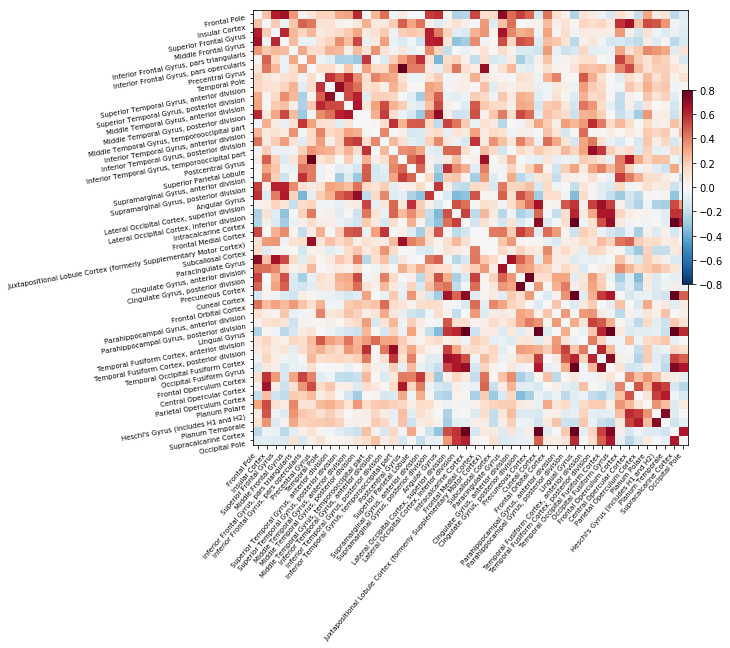

In [34]:
import numpy as np
from nilearn import plotting
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=False)

plotting.show()
